# Projet EMS & Analyse de données

In [1]:
options(repr.plot.width=12, repr.plot.height=10) #Pour les graphiques

# Introdution au jeu de données 

Notre projet consiste à analyser un jeu de données issue du référentiel de données de l’Observatoire mondial de la santé (GHO) de l’Organisation mondiale de la santé (OMS). On dispose pour 133 pays de l’espérance de vie, de facteurs de vaccination, de facteurs de mortalité, de facteurs économiques, de facteurs sociaux, collectés de 2000 à 2014. Notre jeu de données LifeExpectationData-Etudiants.csv est composé des 19 colonnes suivantes :

| Nom de la variable      | Signification |
| ----------- | ----------- |
| Country      | Pays       |
| Year   | Année considérée        |
| Status   | Statut du pays (Developed or Developing)        |
| **Life.expectancy**   | **Espérance de vie en année**        |
| Adult mortality   | Taux de mortalité des adultes des deux sexes (probabilité de mourir entre 15 et 60 ans pour 1000 habitants)        |
| Infant deaths   | Nombre de décès infantiles pour 1000 habitants        |
| under.five.deaths   | Nombre de décès d’enfants de moins de cinq ans pour 1000 habitants        |
| Alcohol   | Consommation d’alcool enregistrée par habitant (15+) (en litres d’alcool pur)        |
| BMI   | Indice de masse corporelle moyen de l’ensemble de la population        |
| thinness..1.19.years   | Prévalence de la maigreur chez les enfants et adolescents de 10 à 19 ans (%)        |
| thinness..5.9.years   | Prévalence de la maigreur chez les enfants et adolescents de 5 à 9 ans (%)        |
| Measles   | Nombre de cas de rougeole signalés ~pour 1000 habitants~        |
| Total.expenditure   | Dépenses publiques générales de santé en pourcentage des dépenses publiques totales (%)        |
| Hepatitis.B   | Couverture vaccinale contre l’hépatite B chez les enfants de 1 an (%)        |
| Polio   | Couverture vaccinale contre la polio chez les enfants de 1 an (%)        |
| Diphtheria   | Couverture vaccinale contre l’anatoxine diphtérique, le tétanos et la coqueluche chez les enfants de 1 an (%)        |
| GDP (PIB)   | Produit Intérieur Brut par habitant (en USD)        |
| Schooling   | Nombre d’années de scolarité (années)        |
| Population   | Population du pays        |

In [2]:
#Libraries à importer pour pouvoir run la suite du code --> ne pas afficher dans le Rmarkdown
library(corrplot)
library(ggplot2)
library(ellipse)
library(leaps)
library(MASS)
library(corrplot)
library(glmnet)
# library(coefplot)
library(gridExtra)
library(ggfortify)
# library(plotly)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(leaps)
library(mclust)
library(cowplot)

corrplot 0.90 loaded


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


Loading required package: Matrix

Loaded glmnet 4.1-3

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.



In [3]:
#Importation du jeu de données --> ne pas afficher dans le RMarkdown
data = read.table("/work/ProjetEMSAD/LifeExpectationData-Etudiants-V2.csv")
attach(data)

Le jeu de données contient 1647 individus. Ci-dessous nous en affichons les 6 premières lignes. 

In [4]:
#Ne pas afficher dans le RMarkdown
data$Country = as.factor(data$Country)
data$Status = as.factor(data$Status)
head(data)
summary(data)

Country     Year Status     Life.expectancy Adult.Mortality infant.deaths
1 Afghanistan 2014 Developing 59.9            271             64           
2 Afghanistan 2013 Developing 59.9            268             66           
3 Afghanistan 2012 Developing 59.5            272             69           
4 Afghanistan 2011 Developing 59.2            275             71           
5 Afghanistan 2010 Developing 58.8            279             74           
6 Afghanistan 2009 Developing 58.6            281             77           
  Alcohol Hepatitis.B Measles BMI  under.five.deaths Polio Total.expenditure
1 0.01    62           492    18.6  86               58    8.18             
2 0.01    64           430    18.1  89               62    8.13             
3 0.01    67          2787    17.6  93               67    8.52             
4 0.01    68          3013    17.2  97               68    7.87             
5 0.01    66          1989    16.7 102               66    9.20             
6 0.01    63          2861    16.2 106               63    9.42             
  Diphtheria GDP      Population thinness..1.19.years thinness.5.9.years
1 62         612.6965 33.37      17.5                 17.5              
2 64         631.7450 32.27      17.7                 17.7              
3 67         669.9590 31.16      17.9                 18.0              
4 68         635.3723 30.12      18.2                 18.2              
5 66         553.3289 29.19      18.4                 18.4              
6 63         445.8933 28.39      18.6                 18.7              
  Schooling
1 10.0     
2  9.9     
3  9.8     
4  9.5     
5  9.2     
6  8.9

        Country          Year             Status     Life.expectancy
 Afghanistan:  15   Min.   :2000   Developed : 284   Min.   :44.00  
 Albania    :  15   1st Qu.:2005   Developing:1362   1st Qu.:64.40  
 Armenia    :  15   Median :2008                     Median :71.70  
 Austria    :  15   Mean   :2008                     Mean   :69.31  
 Belarus    :  15   3rd Qu.:2011                     3rd Qu.:75.00  
 Belgium    :  15   Max.   :2014                     Max.   :89.00  
 (Other)    :1556                                                   
 Adult.Mortality infant.deaths        Alcohol        Hepatitis.B
 Min.   : 53.0   Min.   :   0.00   Min.   : 0.010   Min.   : 5  
 1st Qu.:123.0   1st Qu.:   1.00   1st Qu.: 1.323   1st Qu.:78  
 Median :174.0   Median :   3.00   Median : 4.160   Median :90  
 Mean   :200.4   Mean   :  32.57   Mean   : 4.859   Mean   :84  
 3rd Qu.:247.8   3rd Qu.:  22.00   3rd Qu.: 7.558   3rd Qu.:96  
 Max.   :730.0   Max.   :1600.00   Max.   :17.870   Max.  

In [5]:
#Préparation de certaines lignes de données --> Ne pas afficher dans le RMarkdown
data2014=data[which(data$Year=="2014"),]
dataAfg=data[which(data$Country=="Afghanistan"),]
dataFr=data[which(data$Country=="France"),]
dataCh=data[which(data$Country=="China"),]
dataInd=data[which(data$Country=="India"),]

# Analyse descriptive

### Analyse Unidimensionnelle

## Signalement des données aberrantes

Après analyse plus en détail du jeu de données nous avons remarqué que certaines données étaient aberrantes.

**Adult mortality** : Quelques années pour certains pays qui ont des facteurs 10 de différence avec les autres.

**under.five.deaths** : Problème avec l'Inde qui à des décès d'enfants supérieurs à 1000 alors qu'on regarde les décès d'enfants pour 1000 habitants.

**Measle** : Pour tous les pays, le nombre donné est le nombre de cas signalés total et non celui rapporté à 1000 habitants.

**Infant deaths** : De même, pour certains pays le nombre donné est le nombre de cas signalés total et non rapporté à 1000 naissances.

**Population** :  
- La population de la Chine est complétement fausse, le maximum est inférieur à 2000. #(oscille entre 1000 et 100 000 000).
- La population du Niger en 2005 et en 2010 est 10 fois trop grande (~140 000 000 au lieu de 14 000 000).


Tableau présentant le nombre de décès pour les enfants de moins de cinq ans en Inde pour chaque années.

 [1] 1200 1300 1400 1500 1600 1700 1800 1900 2000 2000 2100


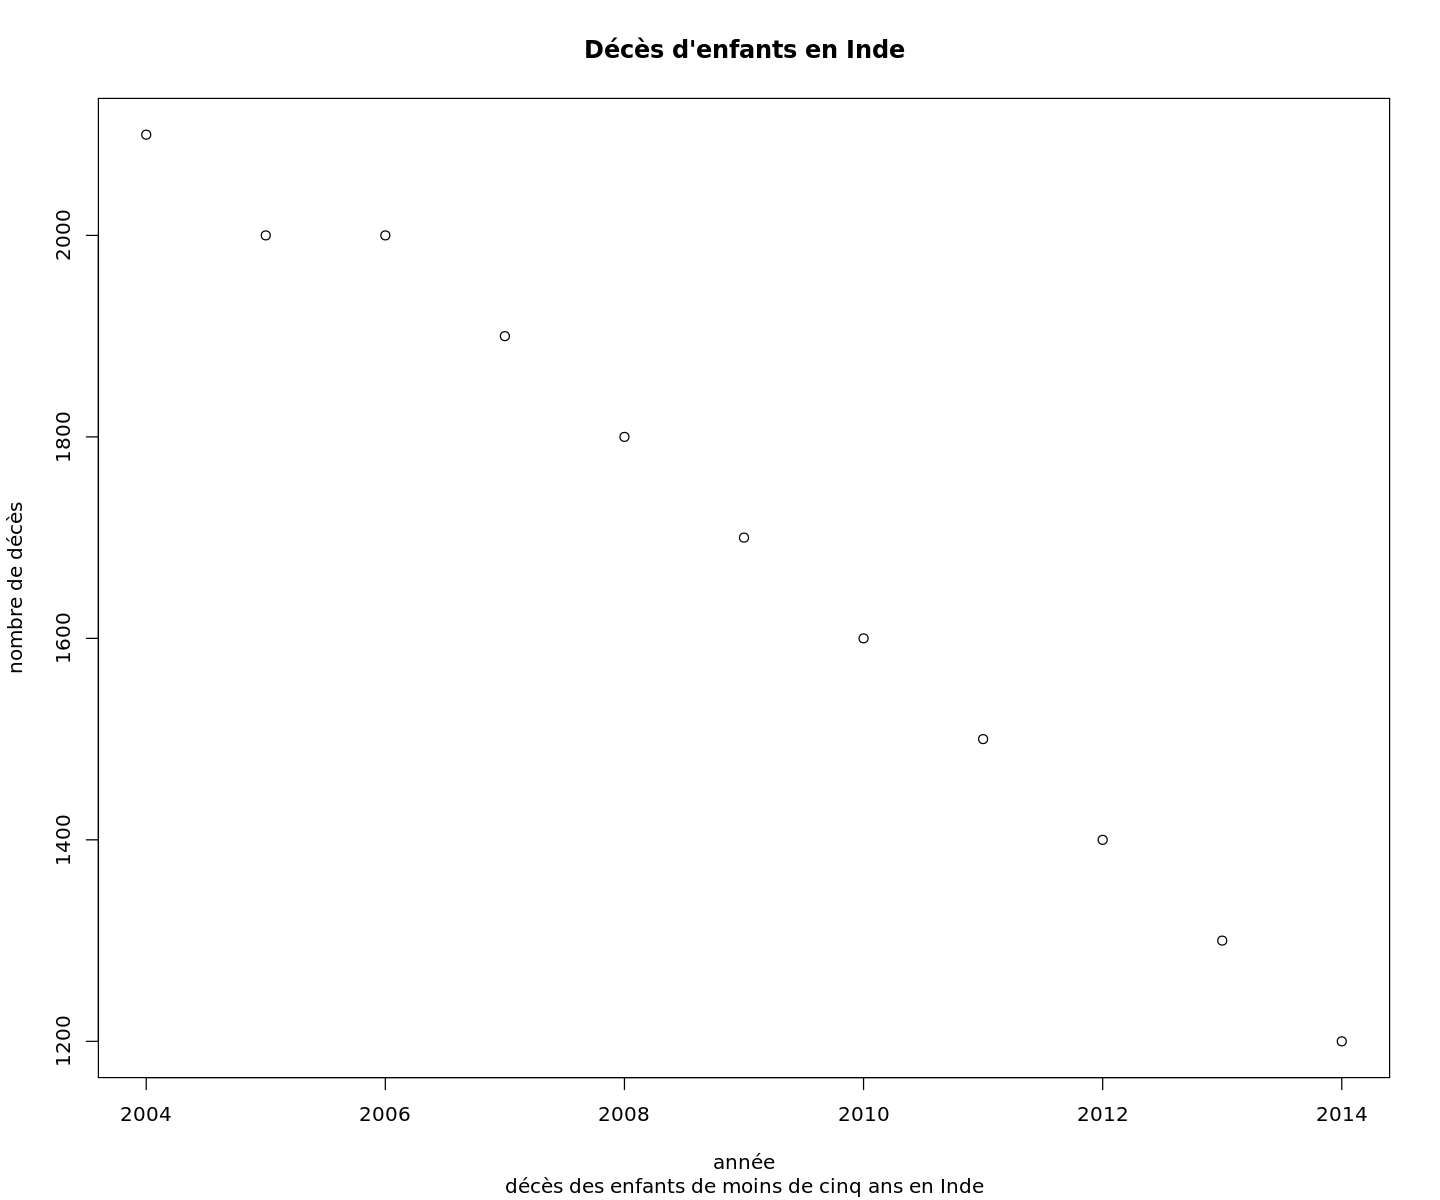

In [6]:
#Ne pas afficher dans le Rmarkdown
pays <- "India"
plot(data$Year[data$Country == pays], data$under.five.deaths[data$Country == pays], sub = "décès des enfants de moins de cinq ans en Inde",
 main = "Décès d'enfants en Inde", xlab = "année", ylab= "nombre de décès")
show(data$under.five.deaths[data$Country == pays])


Comme on peut le remarquer, cela ne fait pas de sens d'avoir un nombre de décès supérieur au nombre de naissances. Après vérification des données réelles sur https://data.worldbank.org/indicator/SH.DYN.MORT?end=2014&locations=IN&start=2004&view=chart, nous avons décidé de divisé le nombre de mort des enfants par 27 afin de pallier à ce soucis.

In [7]:
#Afficher dans le Rmarkdown
data[data$Country == "India",]$infant.deaths <- data[data$Country == "India",]$infant.deaths / 27
data[data$Country == "India",]$under.five.deaths <- data[data$Country == "India",]$under.five.deaths / 27

On peut voir dans le tableau suivant que beaucoup d'autres pays ont ce problème. 
On voit également que la variable Measles n'est pas telle que décrite dans le jeu de données. Nous avons décidé de la garder telle quelle car les données semblent correspondre au nombre de cas total à chaque fois. (Pourquoi ? Commment justifier cela ?)

In [8]:
data[data$under.five.deaths > 150,]

Country    Year Status     Life.expectancy Adult.Mortality infant.deaths
124  Bangladesh 2010 Developing 69.9            142             126          
125  Bangladesh 2009 Developing 69.5            144             135          
126  Bangladesh 2008 Developing 69.1            147             144          
127  Bangladesh 2007 Developing 68.6            151             154          
128  Bangladesh 2006 Developing 68.2            152             164          
129  Bangladesh 2005 Developing 67.8            155             174          
130  Bangladesh 2004 Developing 67.3            158             185          
131  Bangladesh 2003 Developing 66.8            161             196          
347  China      2014 Developing 75.8             86             171          
348  China      2013 Developing 75.6             88             185          
349  China      2012 Developing 75.4             89             201          
350  China      2011 Developing 75.2             91             215          
351  China      2010 Developing 75.0             92             231          
352  China      2009 Developing 74.9             93             248          
353  China      2008 Developing 74.5             97             266          
354  China      2007 Developing 74.4             96             285          
355  China      2006 Developing 74.2             98             307          
356  China      2005 Developing 73.9             99             332          
357  China      2004 Developing 73.5            101             360          
358  China      2003 Developing 73.1            103             391          
359  China      2002 Developing 72.7            106             422          
360  China      2001 Developing 72.2            110             457          
361  China      2000 Developing 71.7            115             490          
501  Ethiopia   2014 Developing 64.2            234             140          
502  Ethiopia   2013 Developing 63.7            237             145          
503  Ethiopia   2012 Developing 63.3            241             150          
504  Ethiopia   2011 Developing 62.6            249             156          
505  Ethiopia   2010 Developing 61.8            261             162          
506  Ethiopia   2009 Developing 68.0            274             169          
507  Ethiopia   2008 Developing 59.8            289             177          
⋮    ⋮          ⋮    ⋮          ⋮               ⋮               ⋮            
684  Indonesia  2003 Developing 66.9            189             173          
685  Indonesia  2002 Developing 66.7            189             177          
686  Indonesia  2001 Developing 66.5            188             182          
687  Indonesia  2000 Developing 66.3            188             187          
1110 Nigeria    2014 Developing 53.6            362             490          
1111 Nigeria    2013 Developing 53.2            367             498          
1112 Nigeria    2012 Developing 52.7            374             505          
1113 Nigeria    2011 Developing 52.3            375             513          
1114 Nigeria    2010 Developing 52.0            374             521          
1115 Nigeria    2009 Developing 51.6            376             527          
1116 Nigeria    2008 Developing 59.0            386             536          
1117 Nigeria    2007 Developing 55.0            388             542          
1118 Nigeria    2006 Developing 49.8            396             549          
1119 Nigeria    2005 Developing 49.2            400             556          
1120 Pakistan   2014 Developing 66.2            162             359          
1121 Pakistan   2013 Developing 66.0            163             365          
1122 Pakistan   2012 Developing 65.7            165             369          
1123 Pakistan   2011 Developing 65.5            167             371          
1124 Pakistan   2010 Developing 65.1            172             372          
1125 Pakistan   2009 Develo

### Statistiques descriptives unidimensionnelle

Commençons par regarder la proportion de pays développés contre pays dits "en développement".

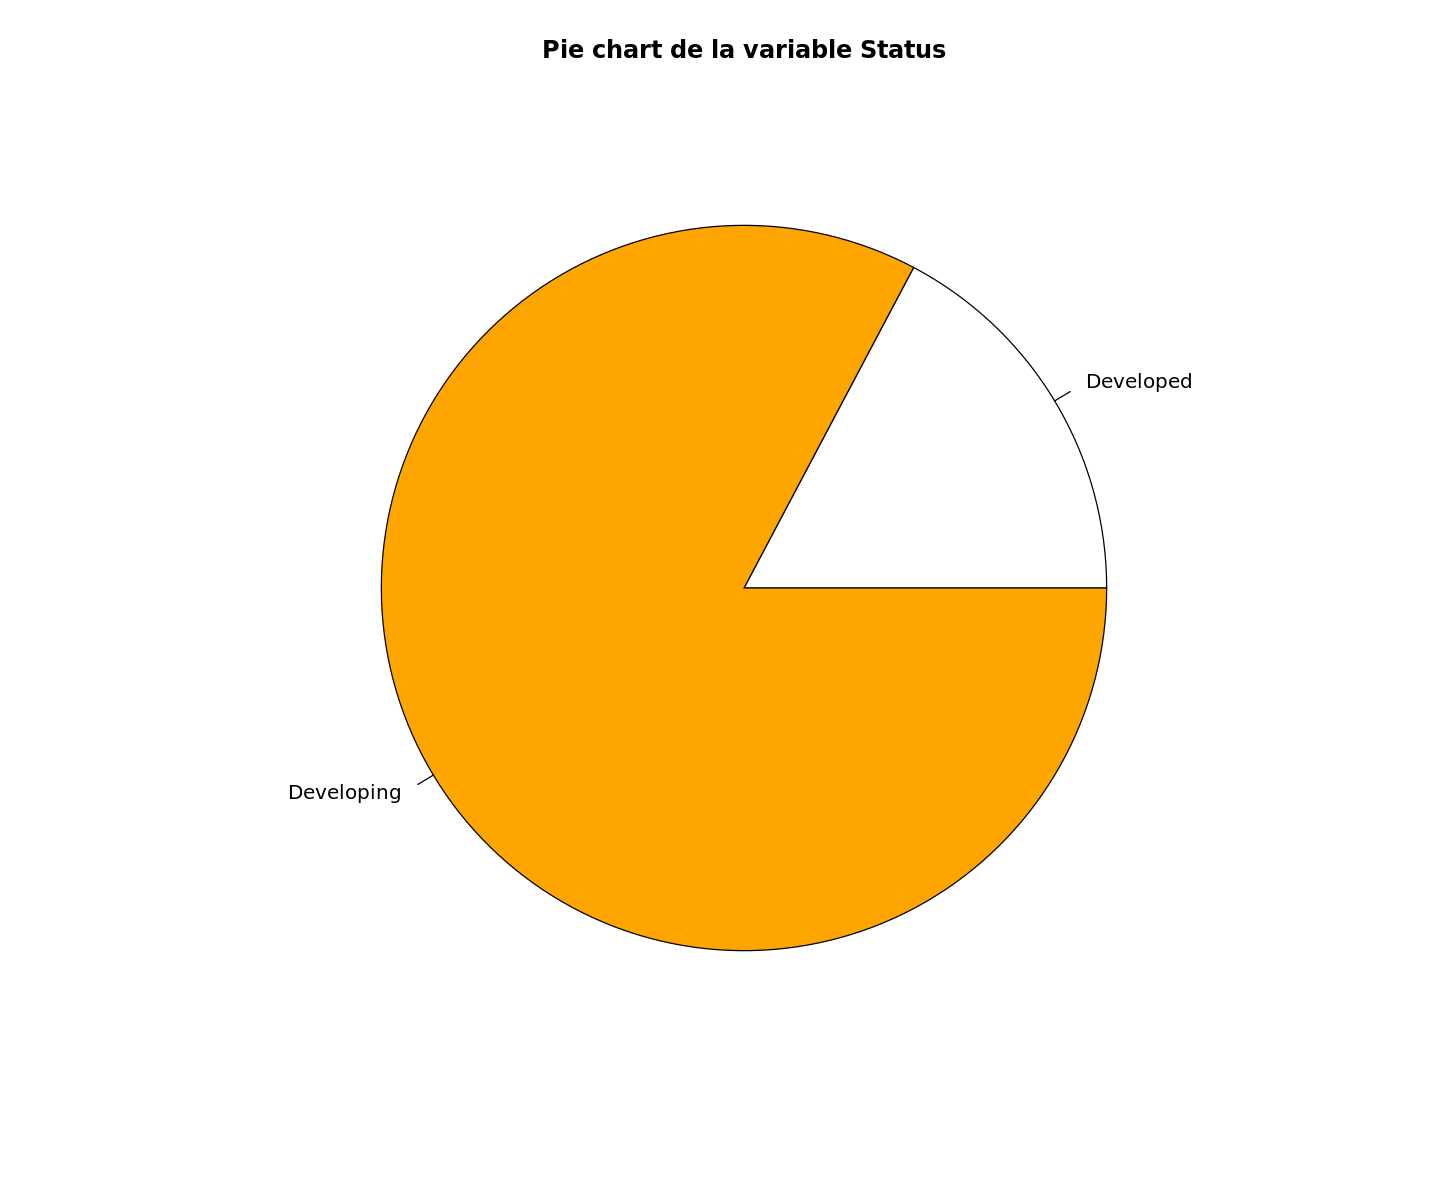

In [9]:
# Analyse des variables qualitatives nominales: Country, Status Trouver comment rétrécir la figure 
# Ne pas afficher code dans Rmarkdown
pie(table(data$Status),main="Pie chart de la variable Status", col=c("white", "orange"))

Ci-après quelques analyses des variables "année","espérance de vie" et "alcool". On peut y voir par exemple que les années les plus représentées sont les années 2011, 2013 et 2014. Que 75% des gens vivent moins de 72 ans et que 75% des gens consomment moins de 4% d'alcool (interprétation correcte ?)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2000    2005    2008    2008    2011    2014 

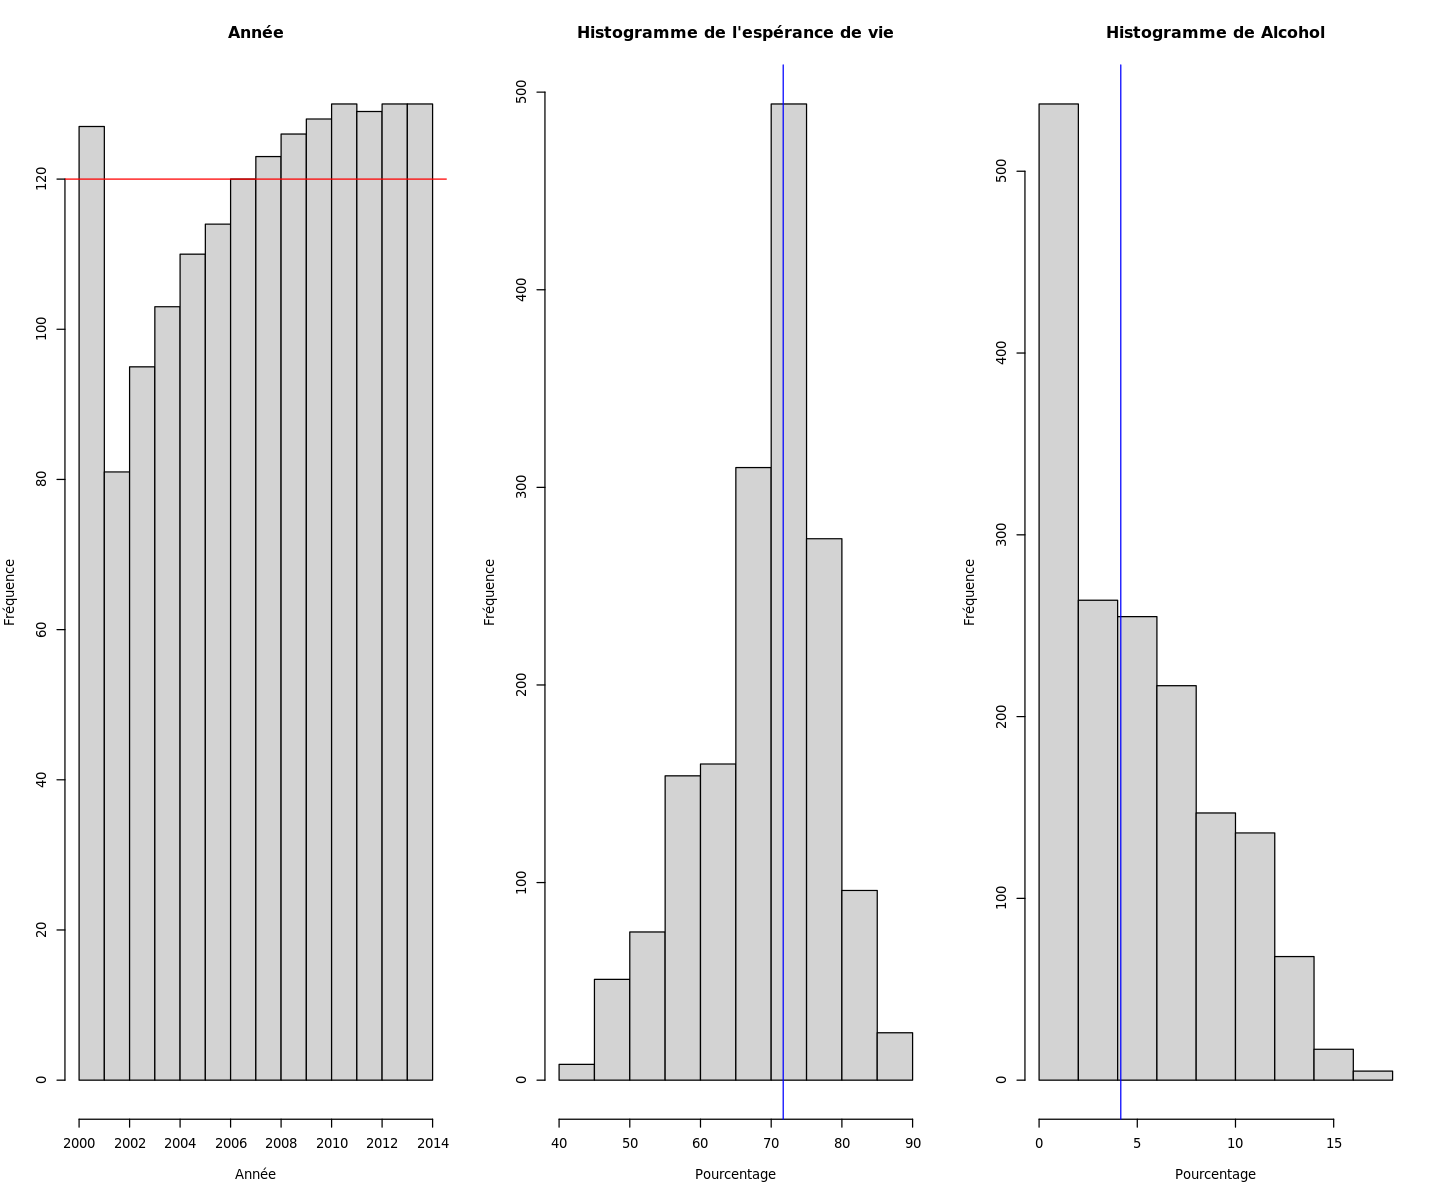

In [10]:
# Analyse des variables quantitatives discrètes
summary(data$Year)
par(mfrow=c(1,3))
hist(data$Year, main="Année",xlab="Année", ylab="Fréquence", breaks=10)
abline(h=120, col="red")

# Analyse des variables quantitatives continues

hist(data$Life.expectancy, main="Histogramme de l'espérance de vie", xlab="Pourcentage", ylab="Fréquence")
abline(v=quantile(data$Life.expectancy)[3], col="blue")
hist(data$Alcohol, main="Histogramme de Alcohol", xlab="Pourcentage", ylab="Fréquence")
abline(v=quantile(data$Alcohol)[3], col="blue")


Nous avons egalement essayer de comparé l'espérance de vie en France, en Afghanistant en en Inde ainsi que la mortalité adulte et infantile dans ces même pays.

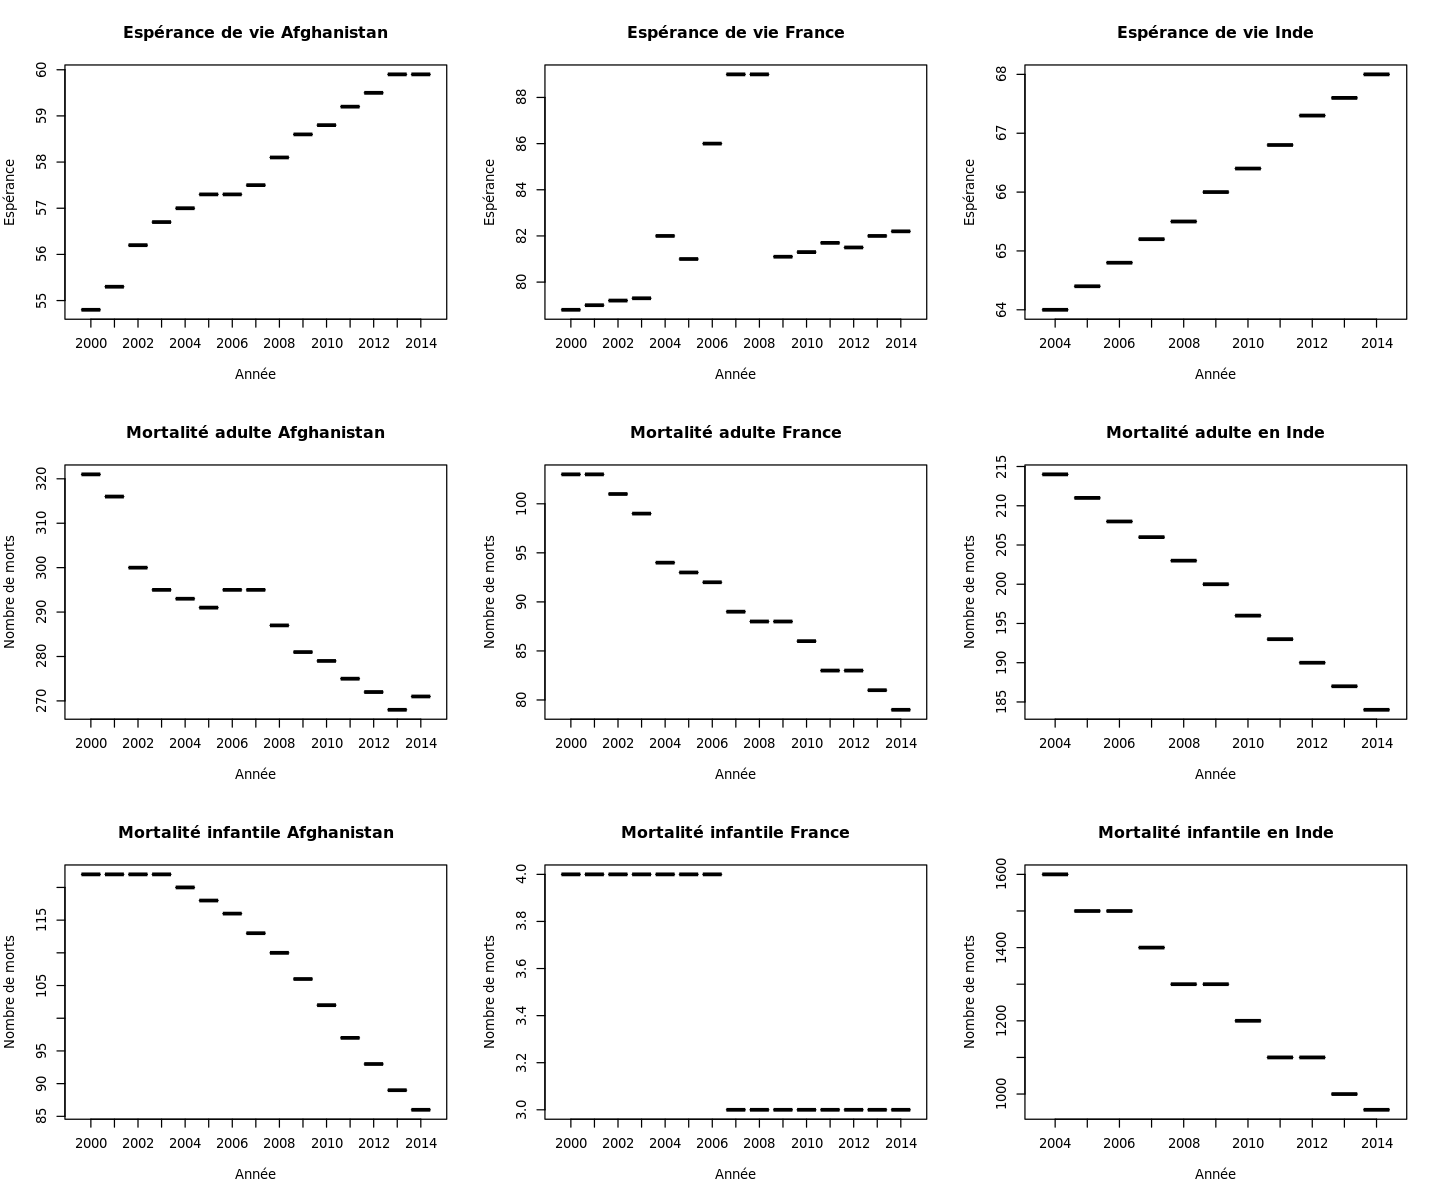

In [11]:
#quel évènement en 2003 en Afg?
#pourquoi une baisse de l'espérance de vie en France?
#quel évènement en 2007 en France ?
#pq la mortalité infantile en Inde n'a pas baissé après la transformation effectuée plus haut ?

par(mfrow=c(3,3))
boxplot(dataAfg$Life.expectancy~dataAfg$Year, main="Espérance de vie Afghanistan", xlab="Année", ylab="Espérance")
boxplot(dataFr$Life.expectancy~dataFr$Year, main="Espérance de vie France", xlab="Année", ylab="Espérance")
boxplot(dataInd$Life.expectancy~dataInd$Year, main="Espérance de vie Inde", xlab="Année", ylab="Espérance")
boxplot(dataAfg$Adult.Mortality~dataAfg$Year, main="Mortalité adulte Afghanistan", xlab="Année", ylab="Nombre de morts")
boxplot(dataFr$Adult.Mortality~dataFr$Year, main="Mortalité adulte France", xlab="Année", ylab="Nombre de morts")
boxplot(dataInd$Adult.Mortality~dataInd$Year, main="Mortalité adulte en Inde", xlab="Année", ylab="Nombre de morts")
boxplot(dataAfg$under.five.deaths~dataAfg$Year, main="Mortalité infantile Afghanistan", xlab="Année", ylab="Nombre de morts")
boxplot(dataFr$under.five.deaths~dataFr$Year, main="Mortalité infantile France", xlab="Année", ylab="Nombre de morts")
boxplot(dataInd$infant.deaths~dataInd$Year, main="Mortalité infantile en Inde", xlab="Année", ylab="Nombre de morts")

On peut remarquer que l'espérance de vie augmente linéairement dans les trois pays avec un taux de croissance nettement inféreieur pour la France car partant d'une espérance de vie élevée au départ. De même, on observe une baisse linéaire du taux de mortalité adulte et enfant pour les trois pays. 

Ci-dessous nous comparons le taux d'enfants à l'école en Afghanistan et en France pour les années que l'on a de disponibles. * problème avec les taux en France non ? pas possible que seuls 16% des enfants en France aillent à l'école.

 [1] 10.0  9.9  9.8  9.5  9.2  8.9  8.7  8.4  8.1  7.9  6.8  6.5  6.2  5.9  5.5
 [1] 16.2 16.2 16.1 16.1 16.0 16.0 16.1 16.1 16.1 15.5 15.5 15.4 15.5 15.6 15.7


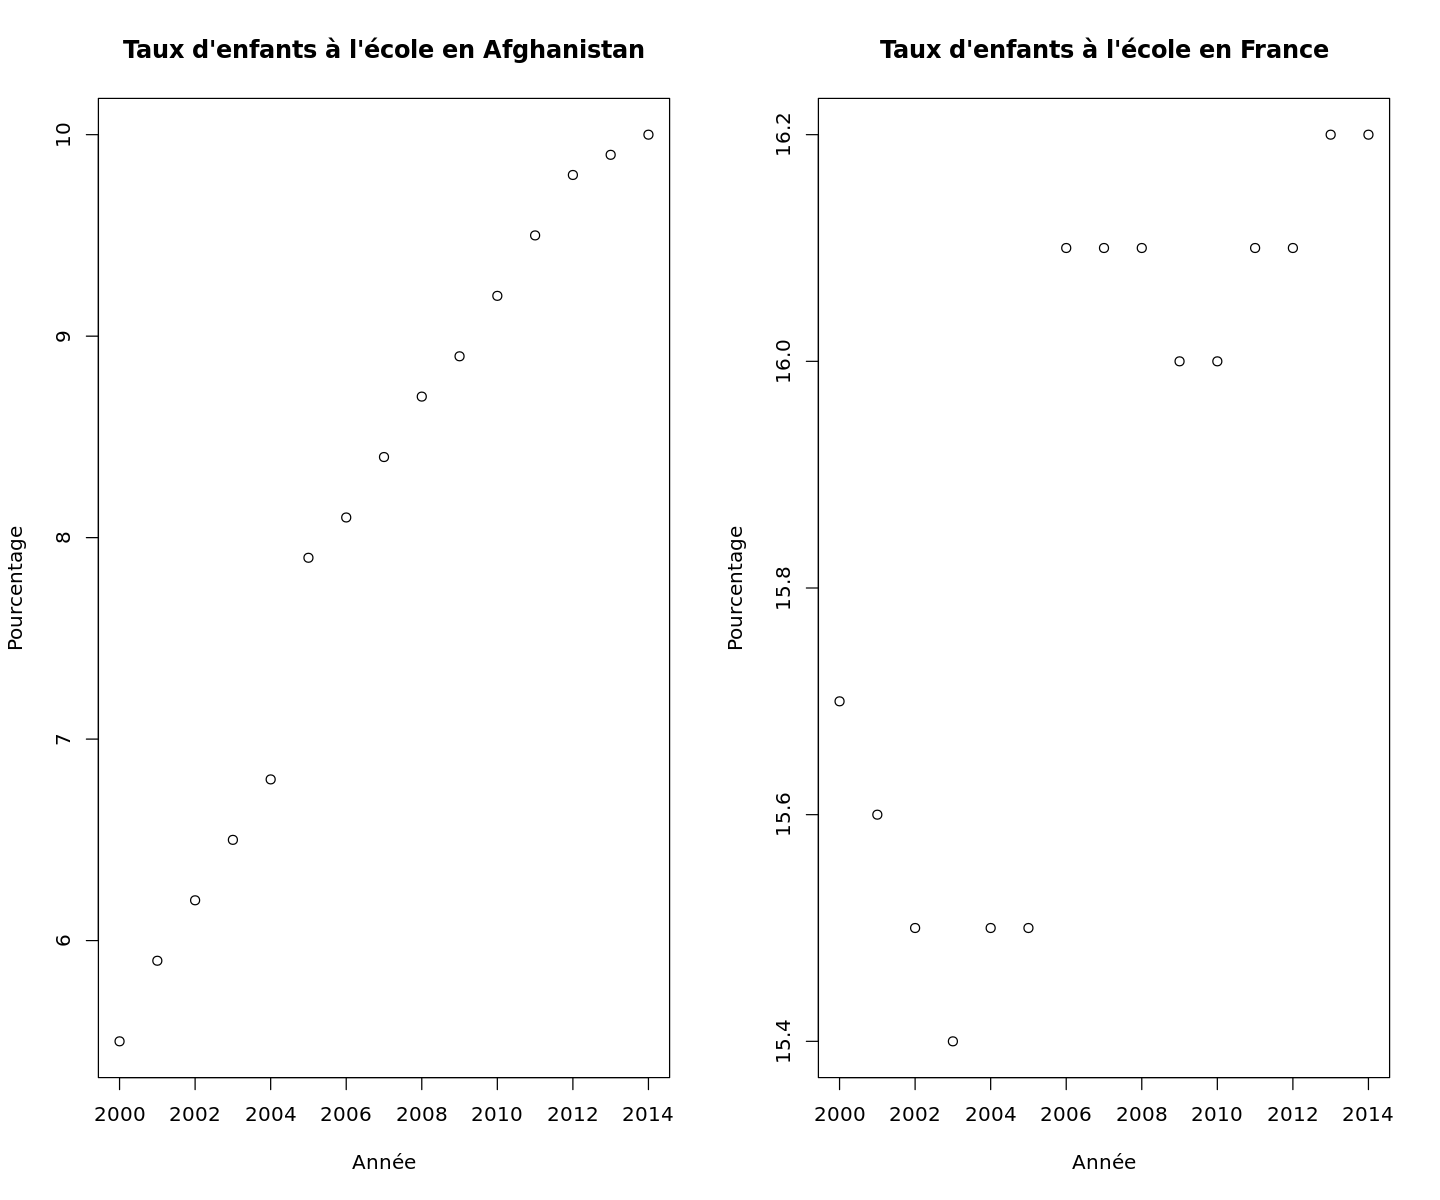

In [12]:
pays1 = "Afghanistan"
par(mfrow=c(1,2))
plot(data$Year[data$Country == pays1], data$Schooling[data$Country == pays1], main = "Taux d'enfants à l'école en Afghanistan", xlab= "Année", ylab= "Pourcentage")
show(data$Schooling[data$Country == pays1])
pays2 = "France"
plot(data$Year[data$Country == pays2], data$Schooling[data$Country == pays2], main = "Taux d'enfants à l'école en France", xlab= "Année", ylab= "Pourcentage")
show(data$Schooling[data$Country == pays2])

Ci-après nous avons décidé de garder un sous-ensemble des données : seulement les données des variables quantitatives de l'année 2014. Nous avons ensuite afficher le tableau des corrélations entre les différentes variables.

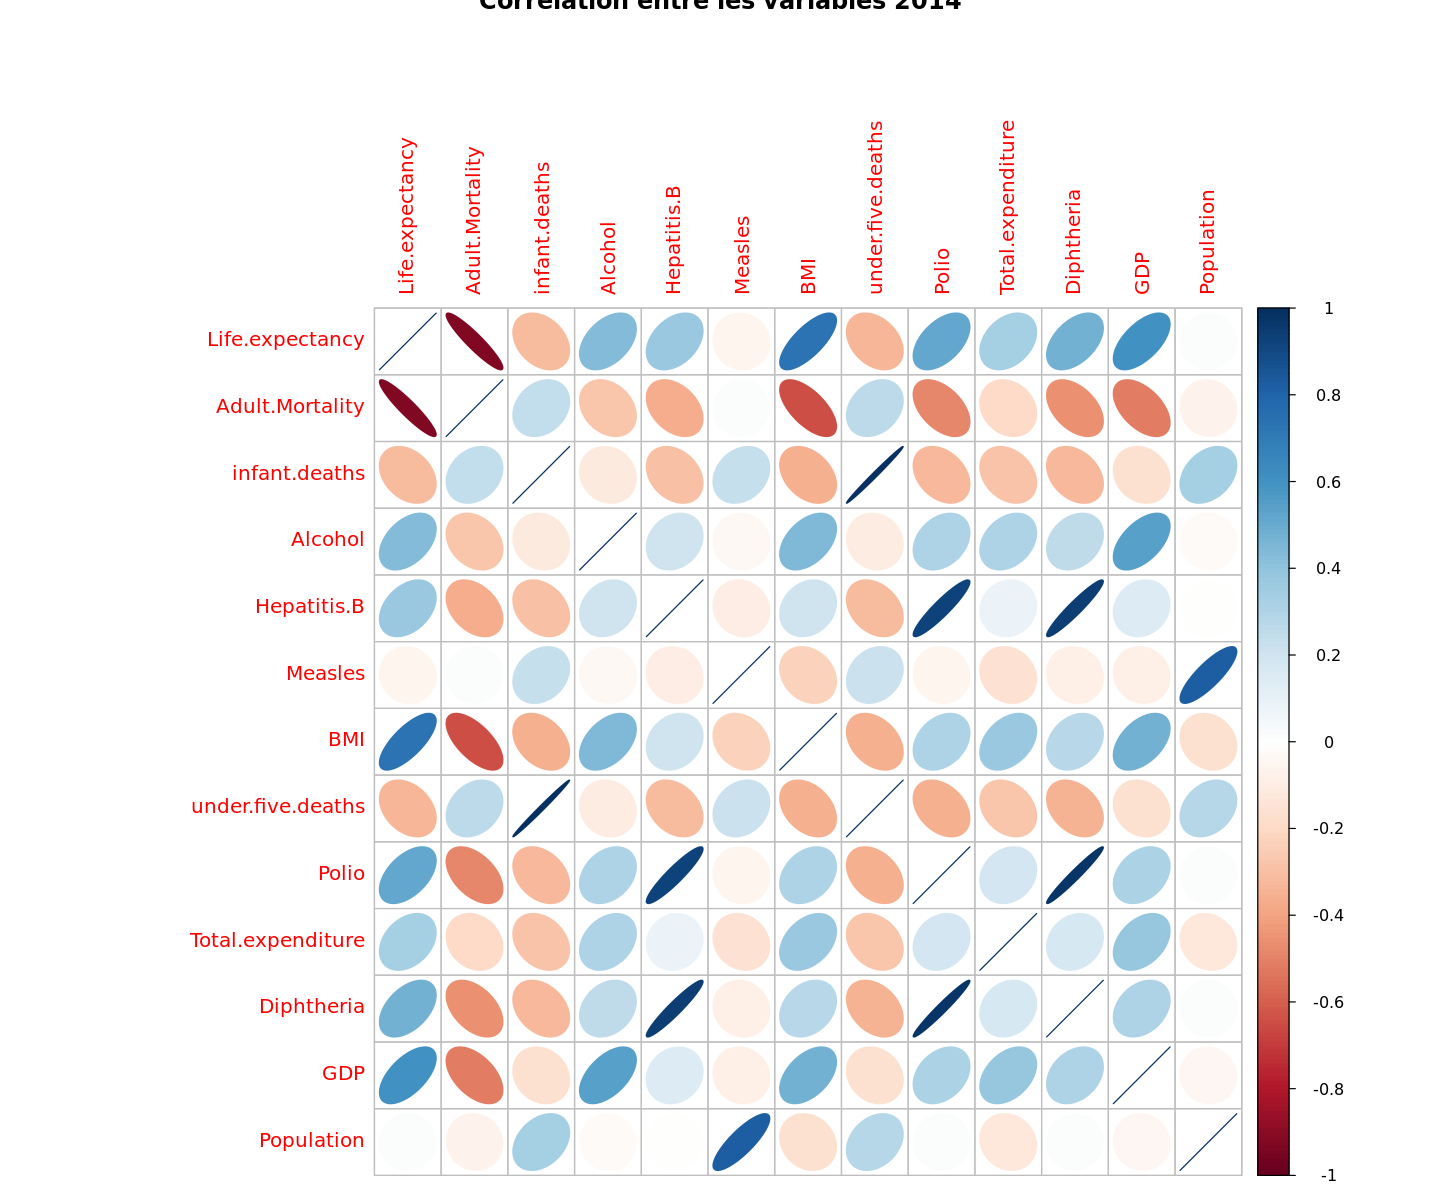

In [13]:
#Ne pas afficher dans Rmarkdown
data2014=data[data$Year==2014,]
#str(data2014)
dataQuanti=data2014[,4:16]
#pairs(dataQuanti)
#boxplot(scale(dataQuanti))
corrplot(cor(dataQuanti),method="ellipse", main = "Corrélation entre les variables 2014")

On voit dans le tableau que :
- Adult.Mortality et Life.expectancy sont fortement correlées négativement 
- Hepatitis.B, Diphtheria et Polio sont fortement correlées positivement 
- Infant.death et Under.five.death sont fortement correlées positivement.
On retrouve bien des corrélations logiques. En effet, il est tout à fait normal que l'espérance de vie et la mortalité adulte soient corrélées tout comme le fait que les données sur les trois maladies dont on dispose dans le jeu de données soient corrélées ou que le taux de mortalité des enfants de moins de 5 ans et des bébés soient corrélées.

In [14]:
data2014num <-data2014
rownames(data2014num) <- as.vector(data2014num$Country)
data2014num$Country <- c()
data2014num$Status <- c()
data2014num$Year <- c()

data2014numL <- data2014num 

# data2014Numfine$Population <- c()
# data2014Numfine$under.five.deaths <- c()
# data2014Numfine$infant.deaths <- c()
# data2014Numfine$GDP <- c()
# data2014Numfine$Measles <- c()

data2014numL$Measles <- data2014numL$Measles / (data2014numL$Population * 1000)

data2014numL$Measles <- log10(data2014numL$Measles + 1)
data2014numL$infant.deaths <- log10(data2014numL$infant.deaths + 1)
data2014numL$GDP <- log10(data2014numL$GDP)
data2014numL$Population <- log10(data2014numL$Population)
data2014numL$under.five.deaths <- log10(data2014numL$under.five.deaths + 1)
data2014numL$Hepatitis.B <- log10(100-data2014numL$Hepatitis.B)
data2014numL$Diphtheria <- log10(100-data2014numL$Diphtheria)
data2014numL$Polio <- log10(100-data2014numL$Polio)

head(data2014numL)

Life.expectancy Adult.Mortality infant.deaths Alcohol Hepatitis.B
Afghanistan 59.9            271             1.8129134     0.01    1.5797836  
Albania     77.5             80             0.0000000     4.51    0.3010300  
Algeria     75.4            110             1.3424227     0.51    0.6989700  
Angola      51.7            348             1.8325089     8.33    1.5563025  
Argentina   76.2            118             0.9542425     7.93    0.7781513  
Armenia     74.6            120             0.3010300     3.91    0.8450980  
            Measles      BMI  under.five.deaths Polio    Total.expenditure
Afghanistan 6.356399e-03 18.6 1.939519          1.623249 8.18             
Albania     0.000000e+00 57.2 0.301030          0.301030 5.88             
Algeria     0.000000e+00 58.4 1.397940          0.698970 7.21             
Angola      1.566283e-01 22.7 2.008600          1.505150 3.31             
Argentina   1.017786e-05 62.2 1.000000          0.903090 4.79             
Armenia     1.934500e-03 54.1 0.301030          0.698970 4.48             
            Diphtheria GDP      Population thinness..1.19.years
Afghanistan 1.5797836  2.787245 1.5233562  17.5                
Albania     0.3010300  3.660464 0.4611983   1.2                
Algeria     0.6989700  3.738663 1.5901728   6.0                
Angola      1.5563025  3.680619 1.4303976   8.5                
Argentina   0.7781513  4.087968 1.6301226   1.0                
Armenia     0.8450980  3.601486 0.4641914   2.1                
            thinness.5.9.years Schooling
Afghanistan 17.5               10.0     
Albania      1.3               14.2     
Algeria      5.8               14.4     
Angola       8.3               11.4     
Argentina    0.9               17.3     
Armenia      2.1               12.7

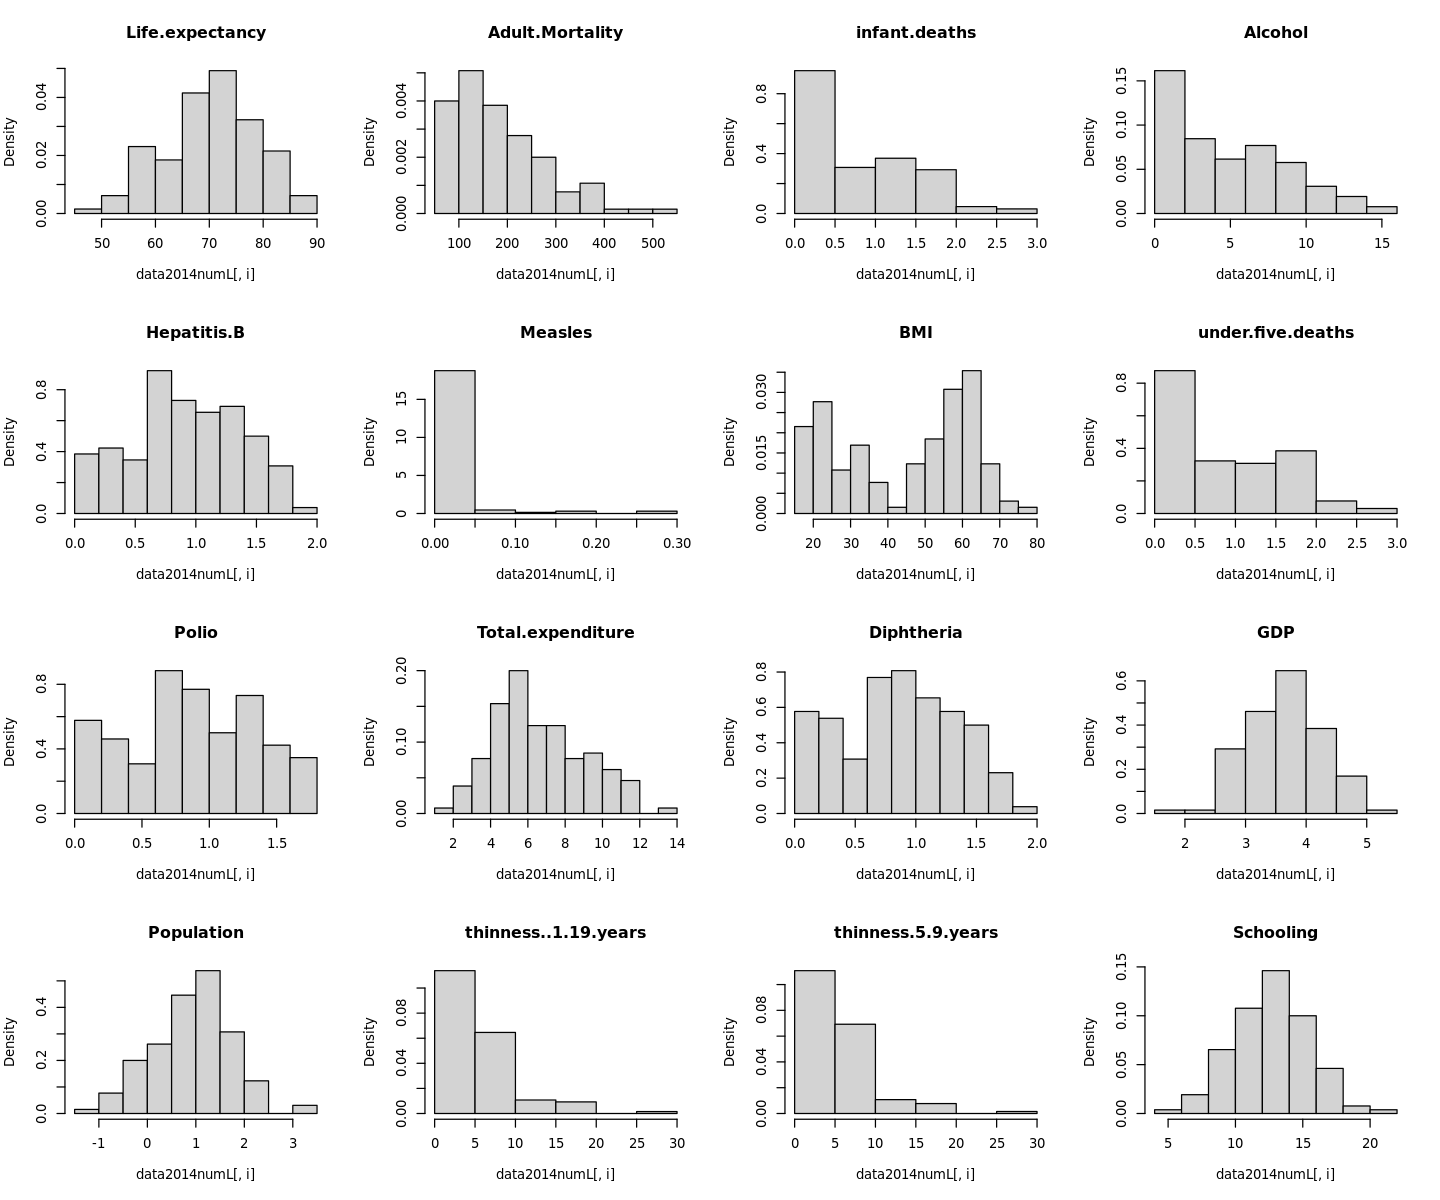

In [15]:
# pairs(data2014num)
par(mfrow=c(4,4))
for(i in 1:ncol(data2014numL)){
    hist(data2014numL[,i], freq = FALSE, main=names(data2014numL)[i])
}

# hist(log10(data2014$Measles + 1), main="Measles in 2014")

# hist(log10(data2014$infant.deaths + 1) , main="infant.deaths in 2014")

# hist(log10(data2014$GDP), main="GDP in 2014")

# hist(log10(data2014$Population), main="Population in 2014")

# hist(log10(data2014$under.five.deaths + 1), main="under.five.deaths in 2014")

# hist(log10(100-data2014$Hepatitis.B), main="under.five.deaths in 2014")

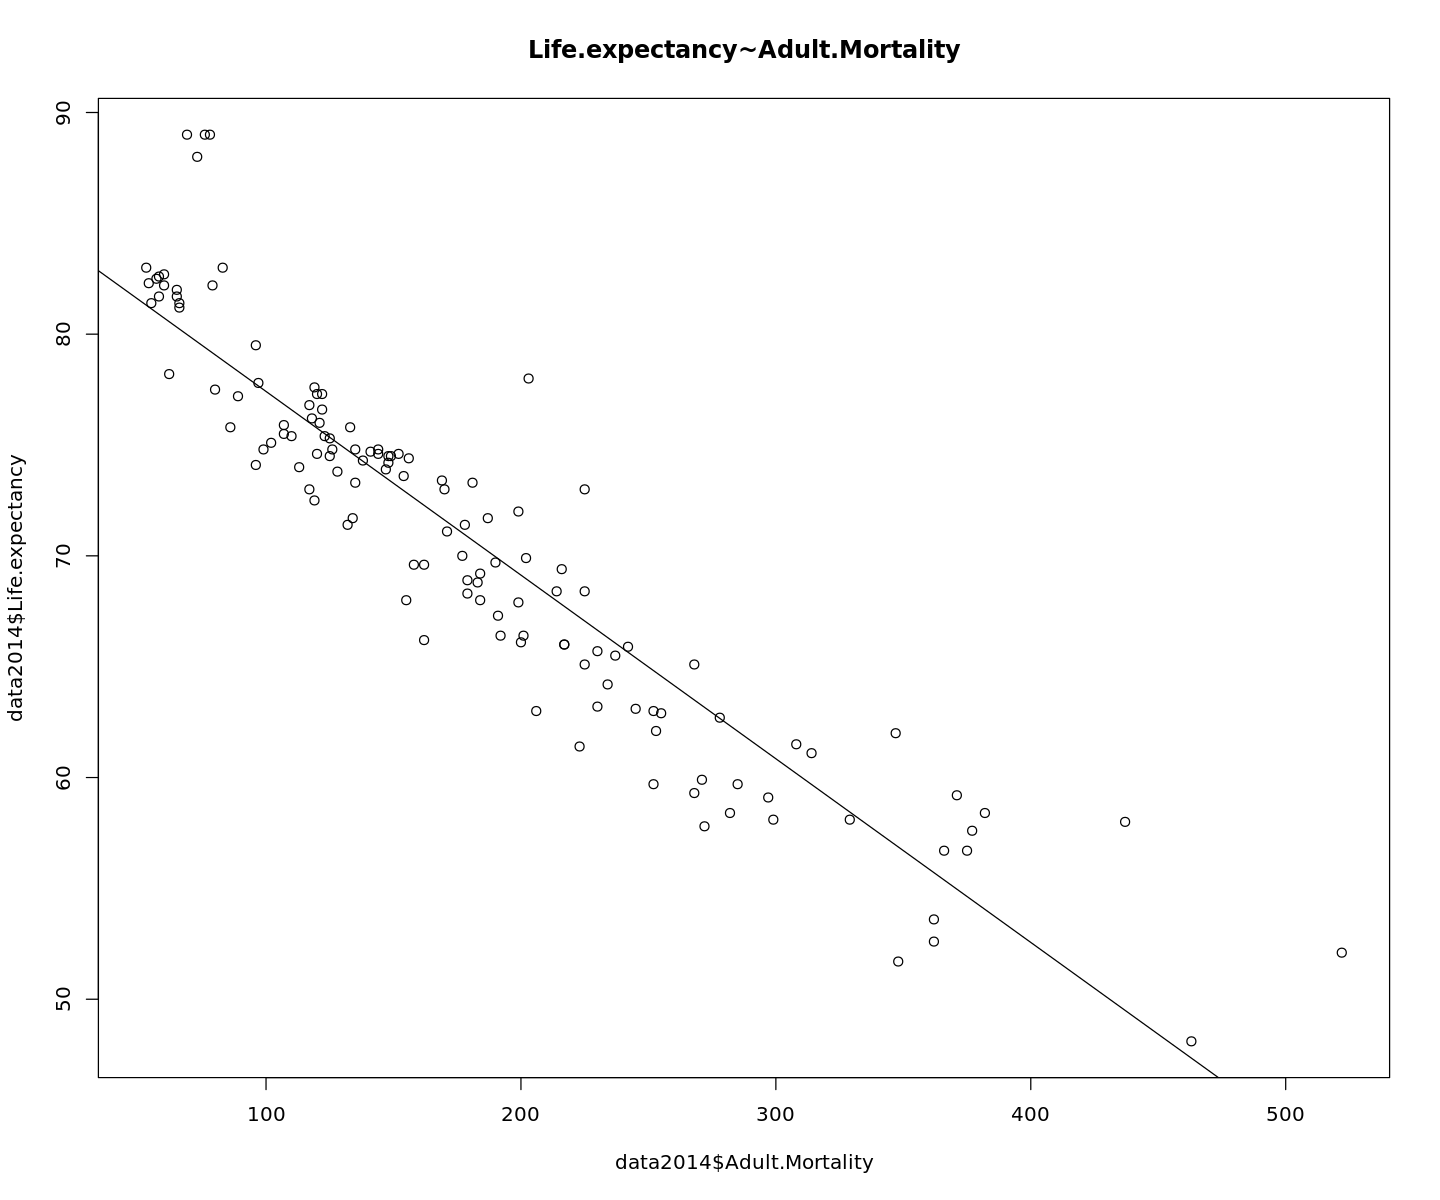

In [16]:
plot(data2014$Life.expectancy~data2014$Adult.Mortality, main="Life.expectancy~Adult.Mortality")
abline(lm(data2014$Life.expectancy~data2014$Adult.Mortality))

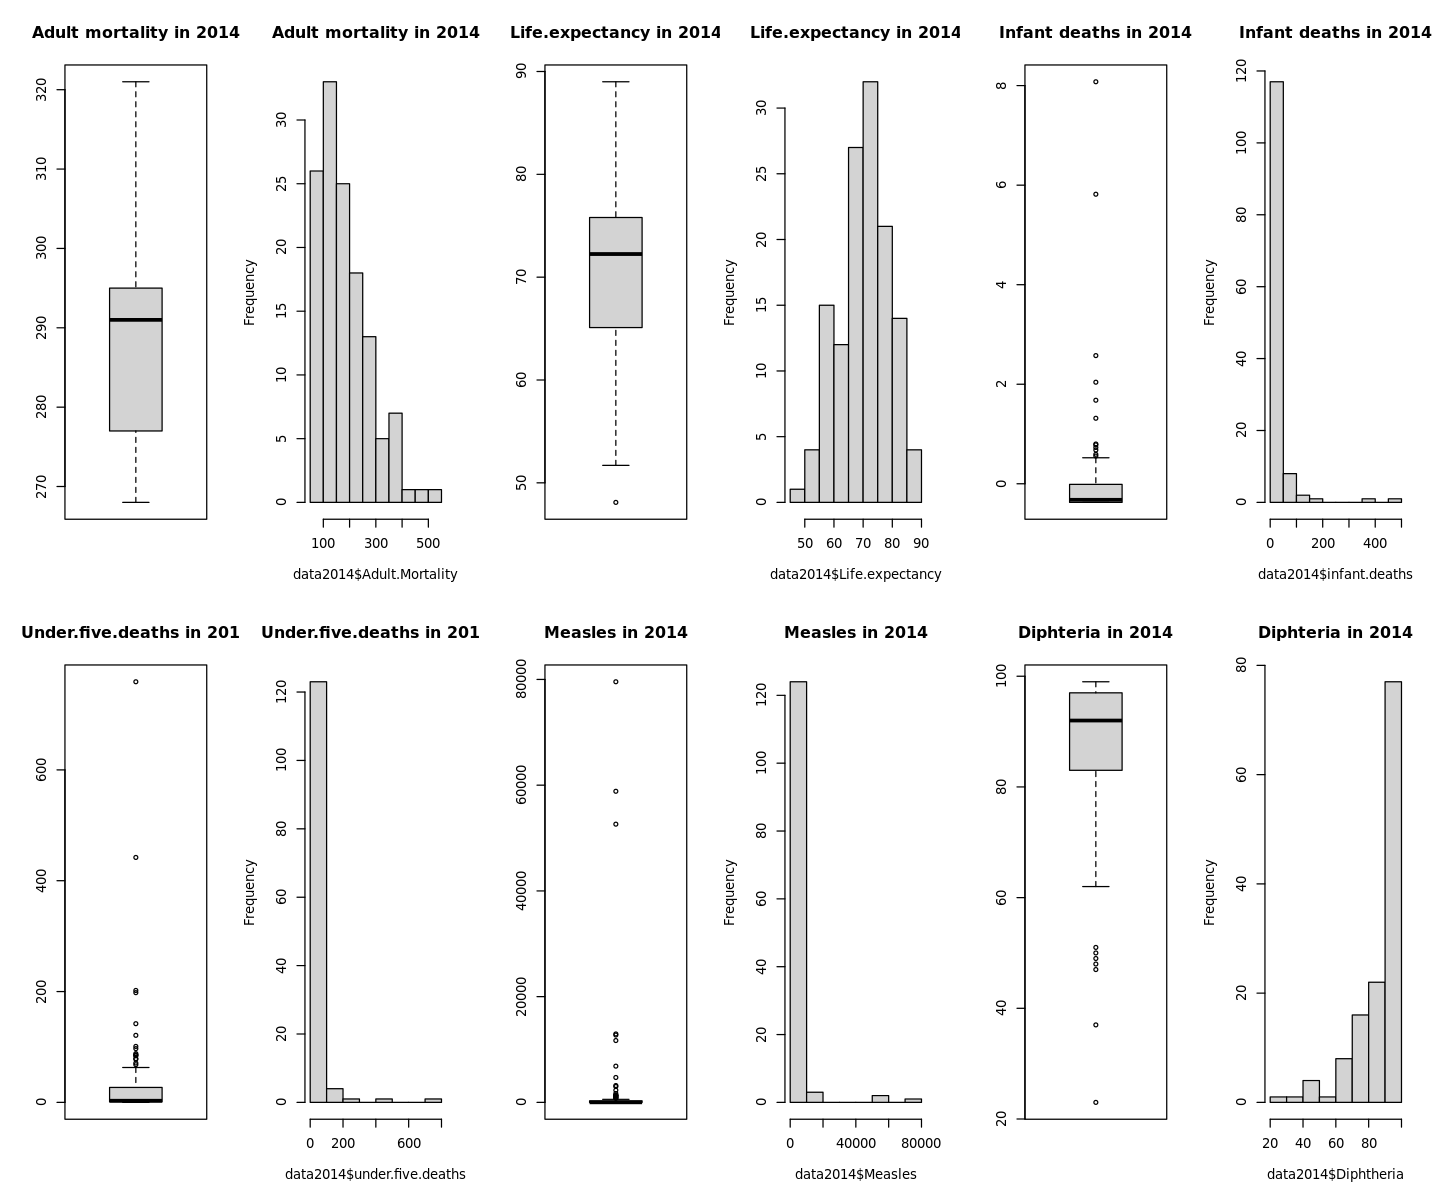

In [17]:
#Visualiser la répartition de chaque variable en 2014
#par(mfrow=c(4,4))
#for (i in 1:ncol(dataQuanti)){
#    hist(dataQuanti[,i],freq=FALSE, main = names(dataQuanti)[i])
#}

par(mfrow=c(2,6))
boxplot(dataAfg$Adult.Mortality, main="Adult mortality in 2014")
hist(data2014$Adult.Mortality, main="Adult mortality in 2014")

boxplot(data2014$Life.expectancy, main="Life.expectancy in 2014") #outlier en bas
hist(data2014$Life.expectancy, main="Life.expectancy in 2014")

boxplot(scale(data2014$infant.deaths), main="Infant deaths in 2014")
hist(data2014$infant.deaths, main="Infant deaths in 2014")

boxplot(data2014$under.five.deaths, main="Under.five.deaths in 2014") #outlier en bas
hist(data2014$under.five.deaths, main="Under.five.deaths in 2014")

boxplot(data2014$Measles, main="Measles in 2014")
hist(data2014$Measles, main="Measles in 2014")

boxplot(data2014$Diphtheria, main="Diphteria in 2014")
hist(data2014$Diphtheria, main="Diphteria in 2014")

In [18]:
#Scatter plot


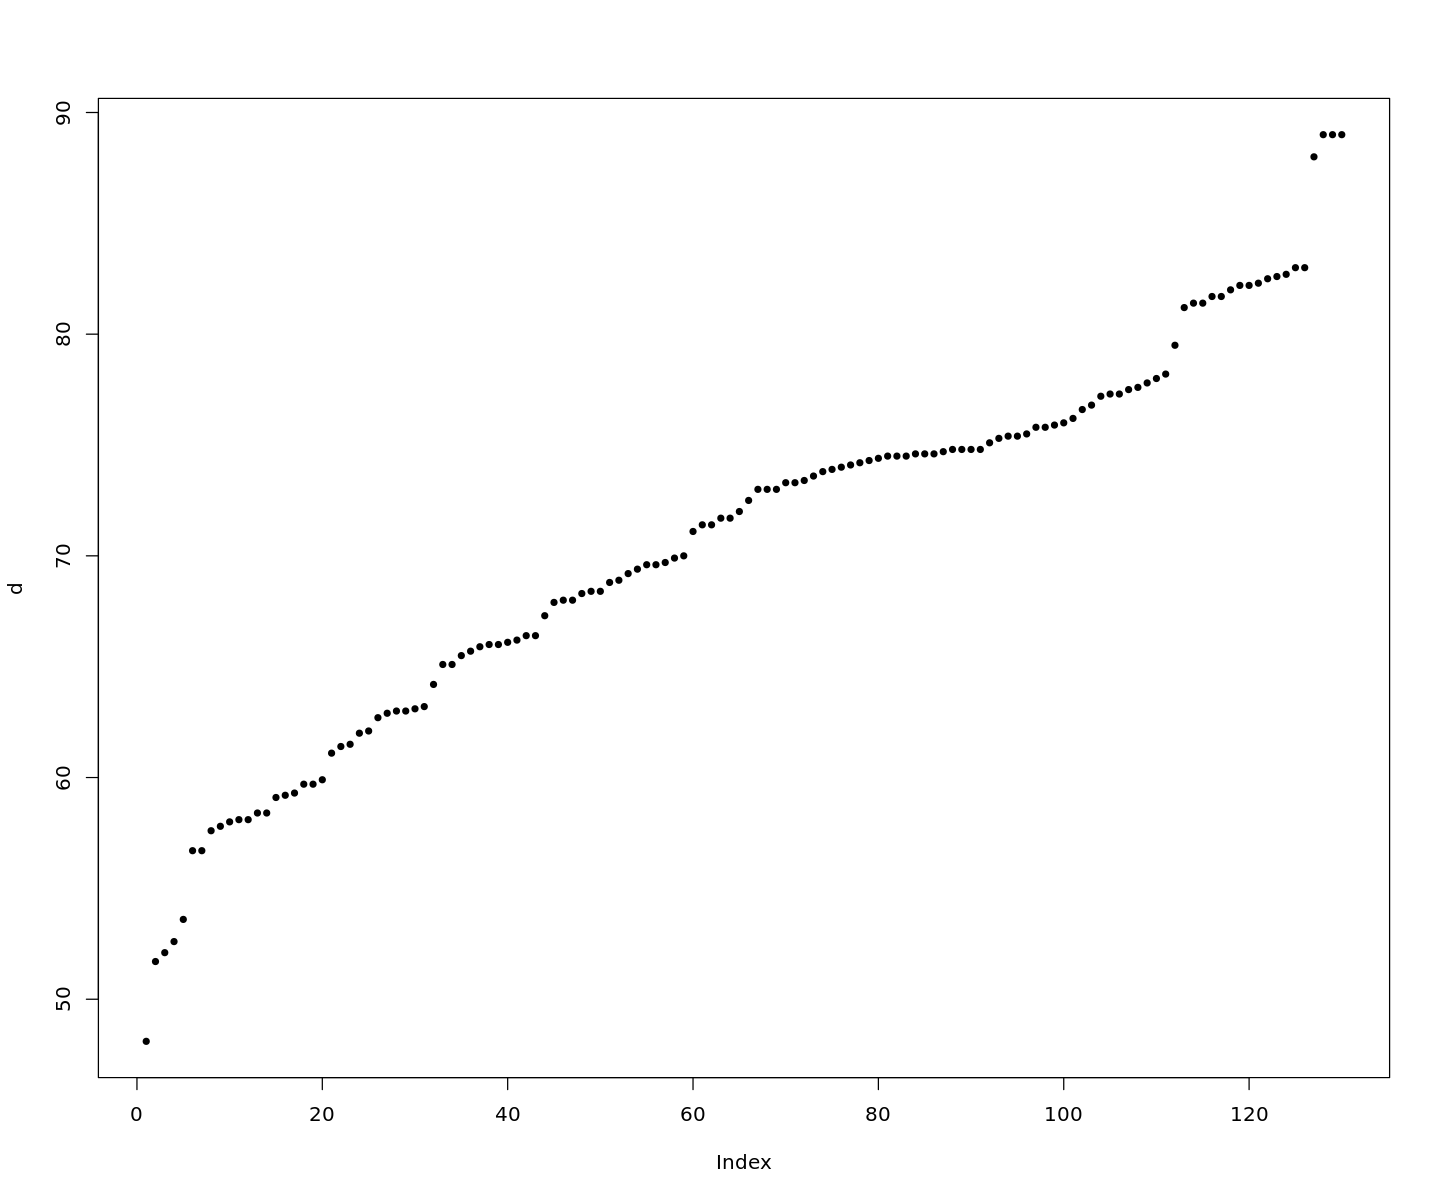

In [19]:
newdata <- data[order(Life.expectancy),]
d = newdata[newdata$Year == 2014,]$Life.expectancy
plot(d, pch = 20)

No id variables; using all as measure variables



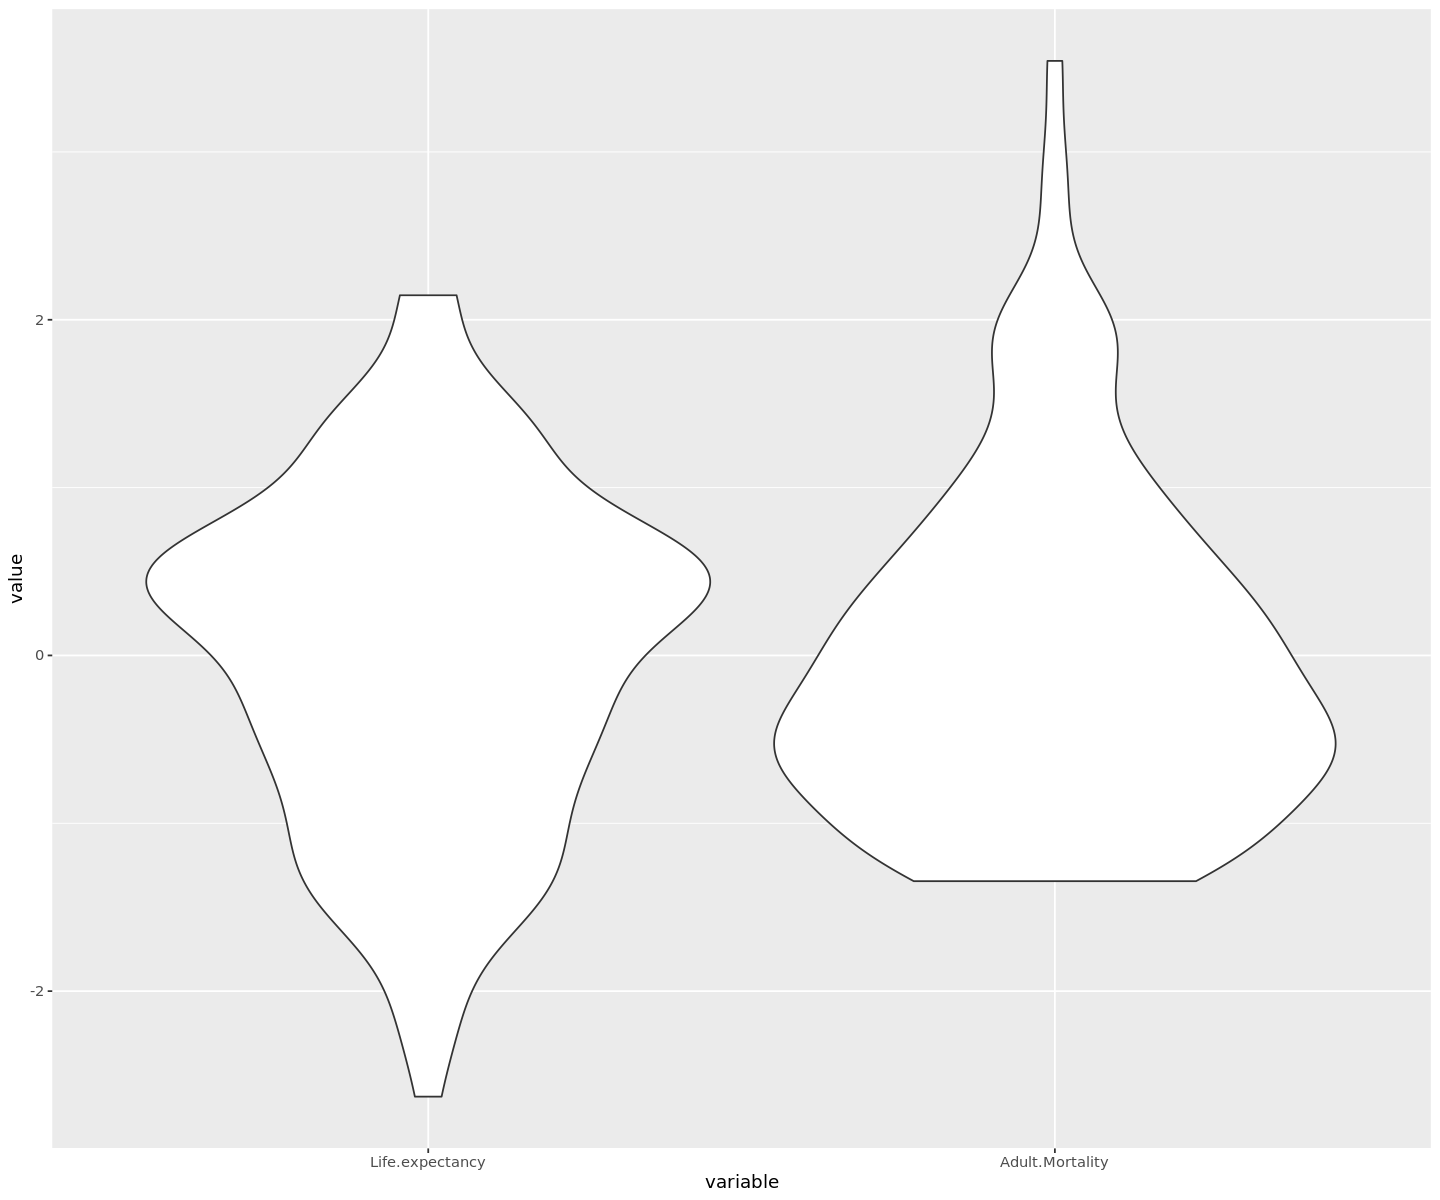

In [20]:
#Violin Plot

ggplot(melt(as.data.frame(scale(data2014[, 4:5]))), aes(x = variable, y = value)) + geom_violin()
#ggplot(melt(as.data.frame(scale(data2014[, 5]))), aes(x = variable, y = value)) + geom_violin()

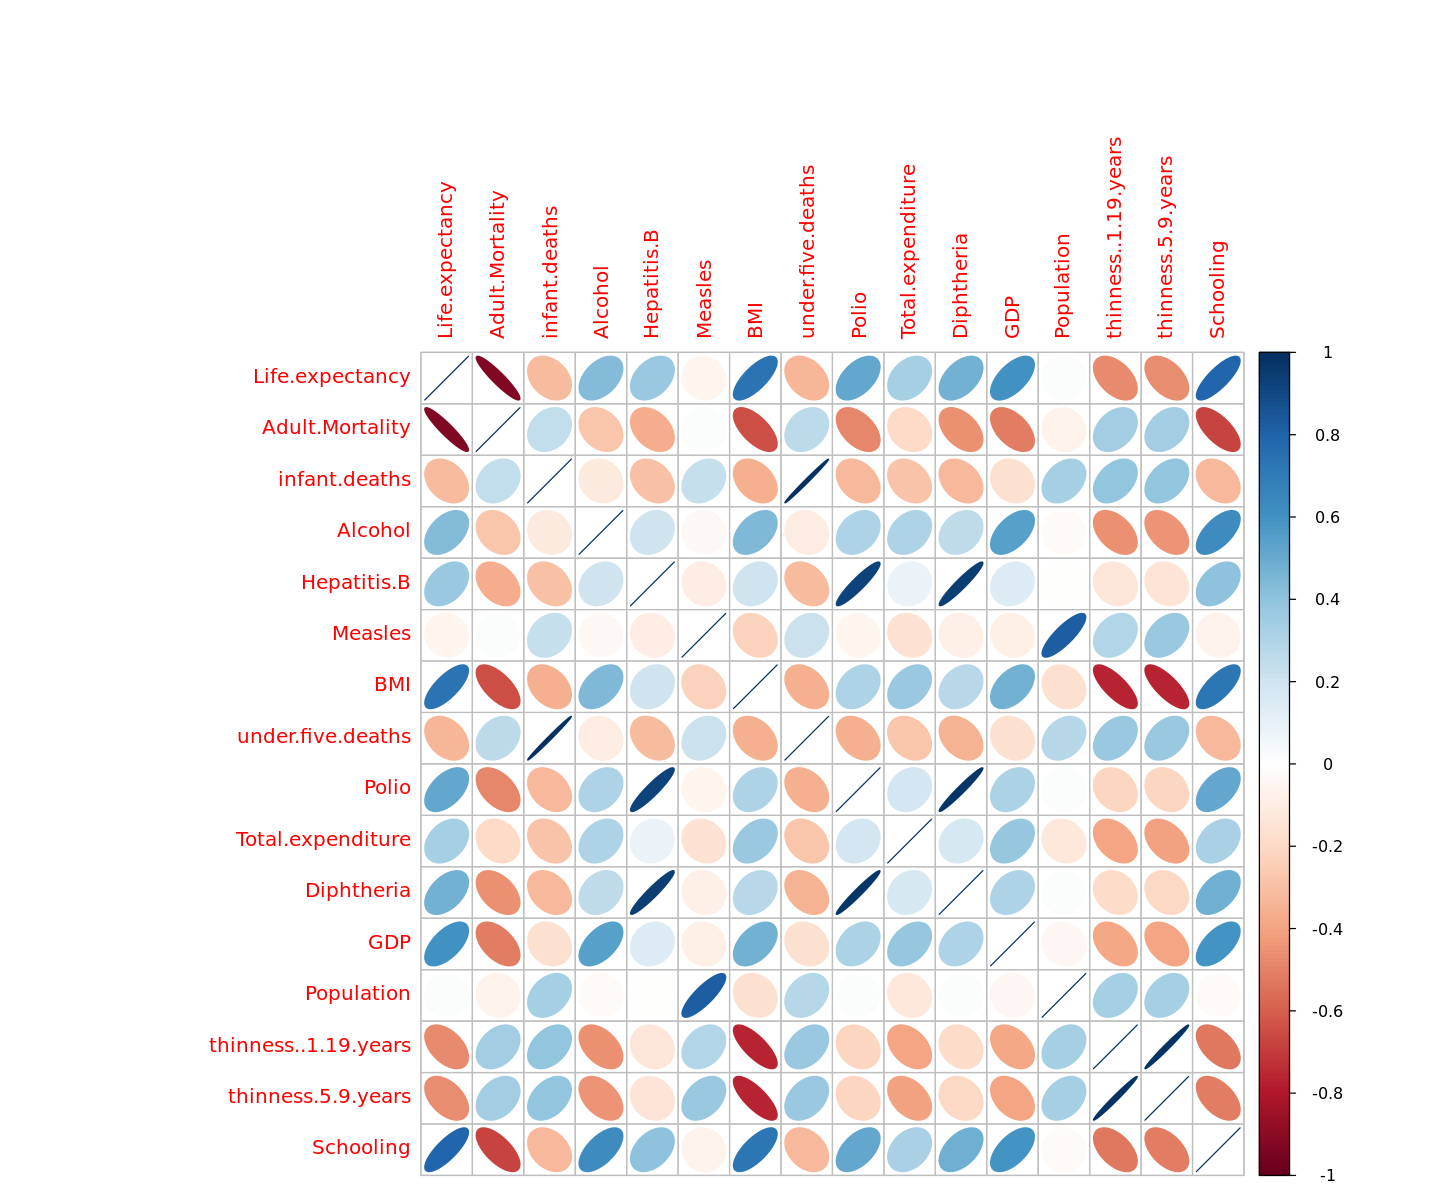

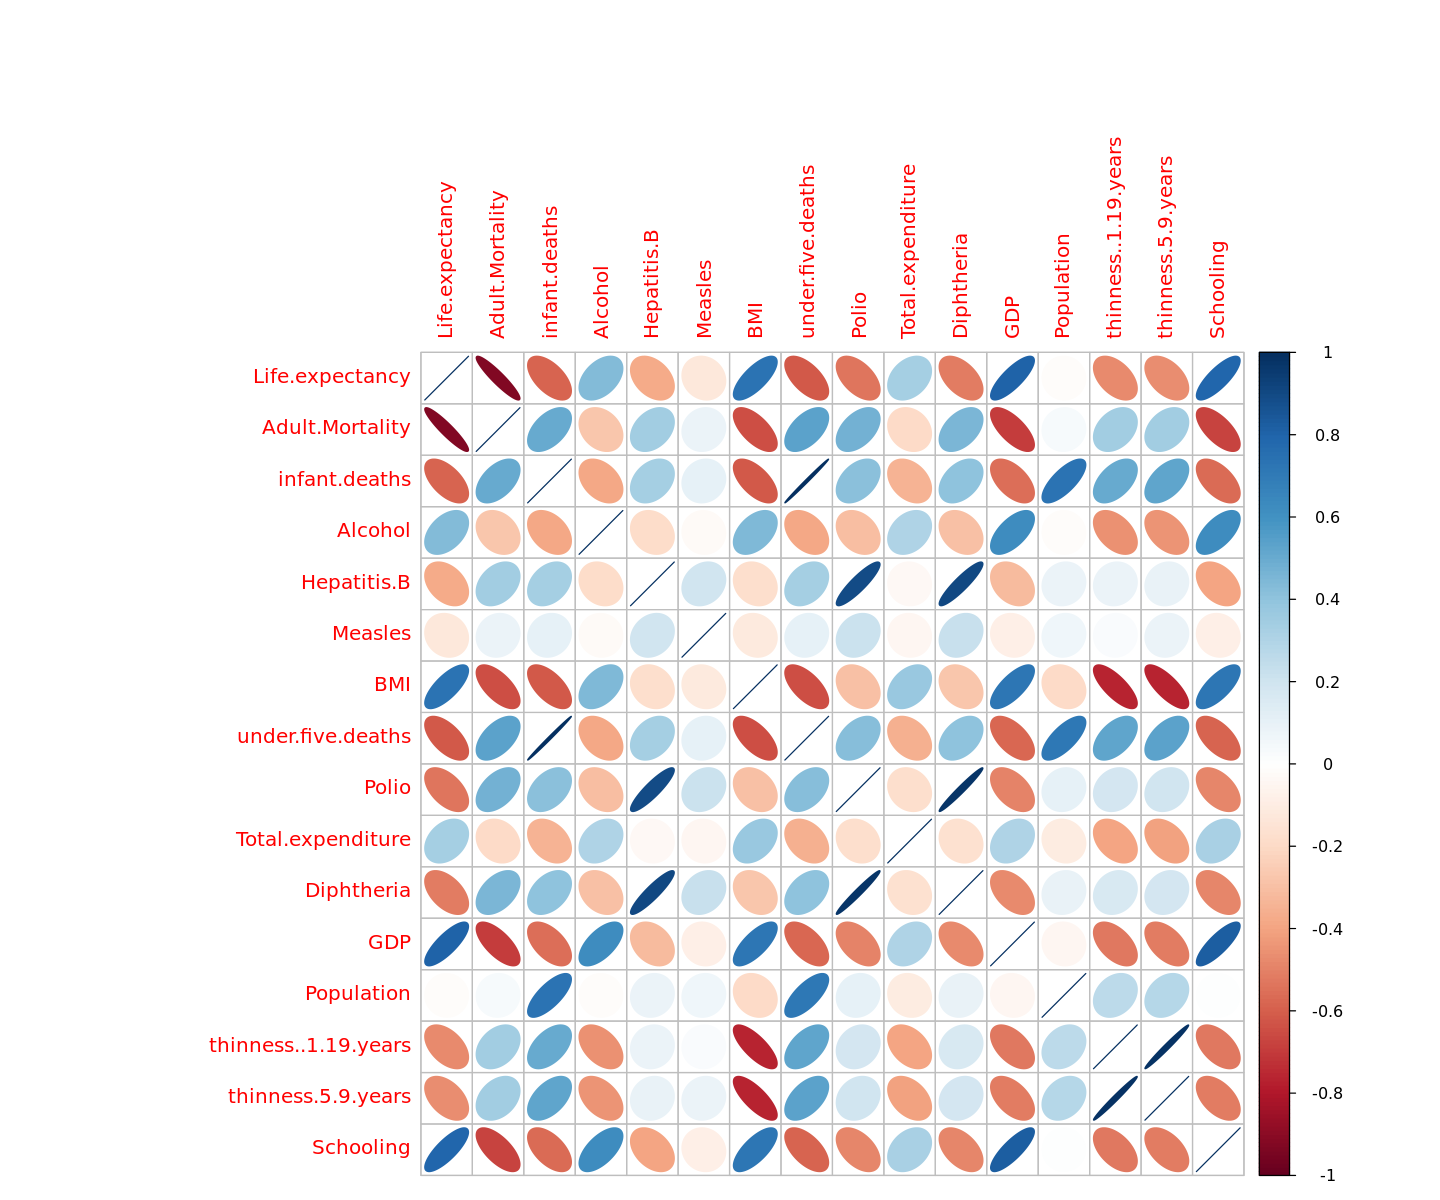

In [21]:
#coorplot pour les corrélation linéaire

corrplot(cor(data2014num[, 1:16]), method = "ellipse")
corrplot(cor(data2014numL[, 1:16]), method = "ellipse")

In [22]:
# data.acp <-prcomp(data2014numL[,], center=TRUE, scale.=TRUE)
# summary(data.acp)
# plot(data.acp)
# barplot(data.acp[,"cumulative percentage of variance"], main="Cumul du pourcentage d'inertie porté par chaque valeur propre" )
# abline(h=80, col="red")
# data.acp
#data.acp1<- PCA(data2014numL[,],center=TRUE scale.=TRUE)
#autoplot(data.acp1)



Call:
PCA(X = data2014numL, scale.unit = TRUE, graph = F) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               7.496   2.430   1.760   1.064   0.940   0.771   0.719
% of var.             46.852  15.185  11.000   6.649   5.872   4.821   4.491
Cumulative % of var.  46.852  62.037  73.037  79.686  85.558  90.379  94.871
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.243   0.202   0.146   0.082   0.077   0.033   0.022
% of var.              1.520   1.261   0.914   0.514   0.484   0.207   0.137
Cumulative % of var.  96.391  97.651  98.565  99.079  99.563  99.770  99.907
                      Dim.15  Dim.16
Variance               0.012   0.003
% of var.              0.073   0.020
Cumulative % of var.  99.980 100.000

Individuals (the 10 first)
                         Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Afghanistan          |  6.034 |  5.367  2.956  0.791 | -

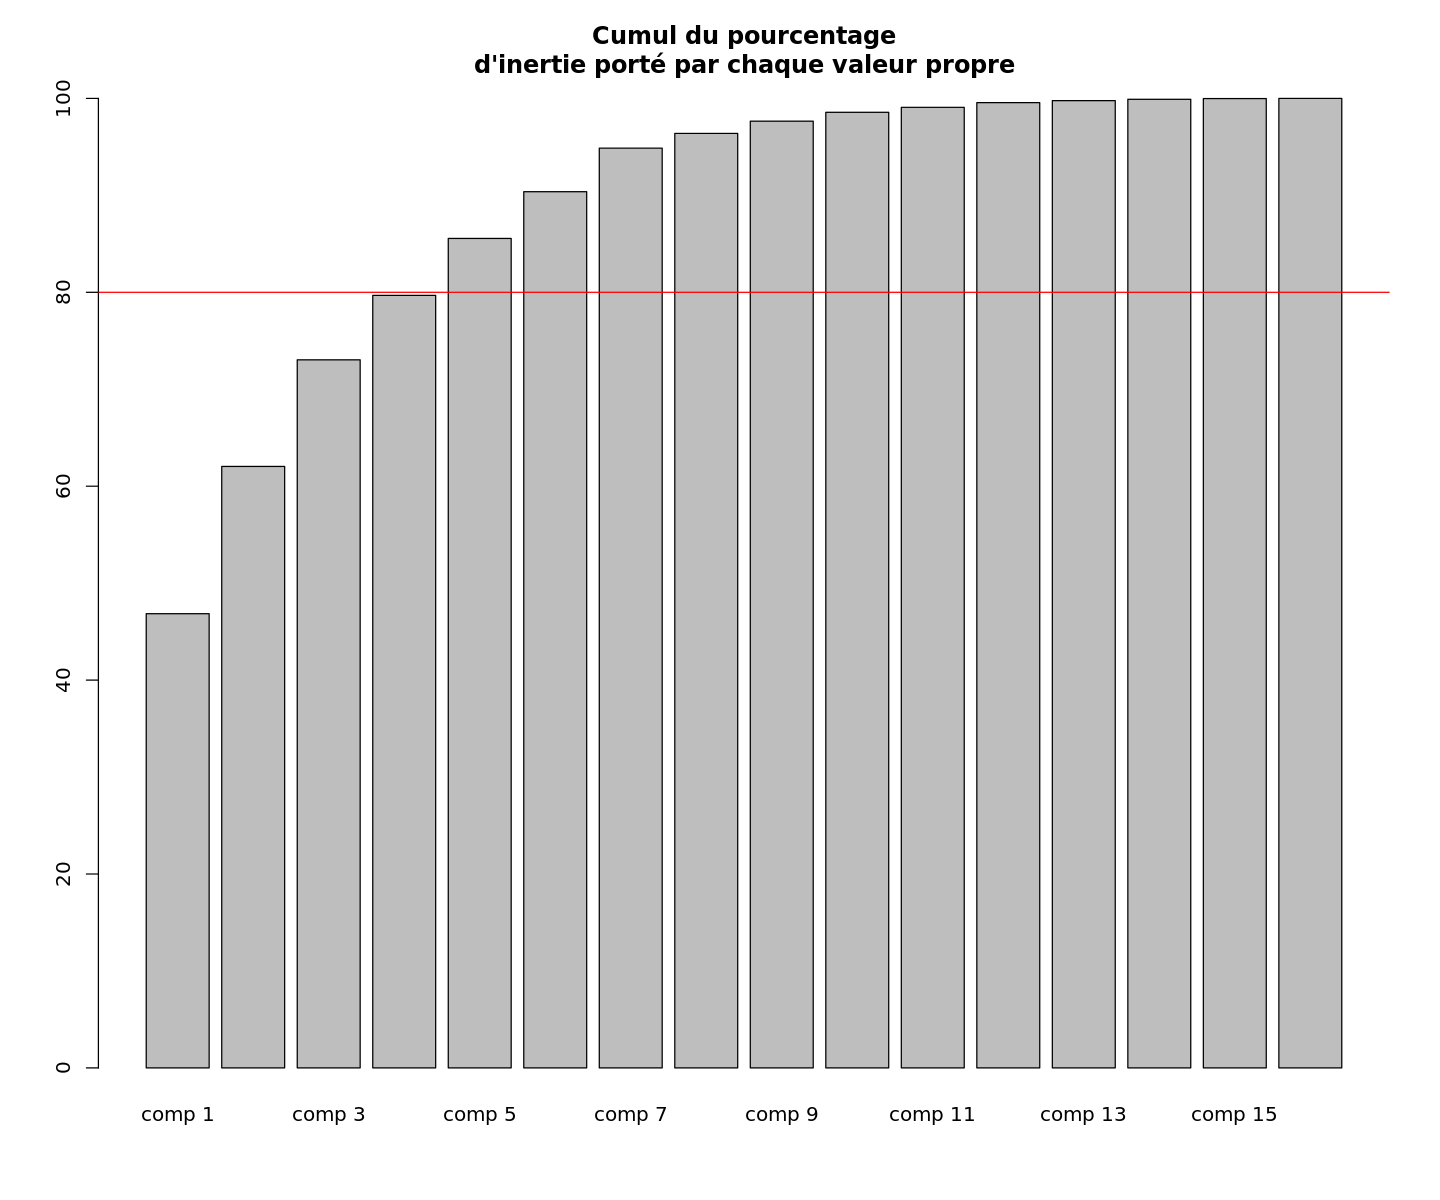

In [23]:
data.acp <-PCA(data2014numL, scale.unit=TRUE,graph=F)
summary(data.acp)
barplot(data.acp$eig[,"cumulative percentage of variance"], main="Cumul du pourcentage
d'inertie porté par chaque valeur propre" )
abline(h=80, col="red")

In [24]:
attributes(data.acp)
# plot(data.acp$ind)
data.acp$ind

$names
[1] "eig"  "var"  "ind"  "svd"  "call"

$class
[1] "PCA"  "list"

$coord
                               Dim.1        Dim.2       Dim.3        Dim.4
Afghanistan               5.36689515 -0.404377256  0.42750392  0.920455386
Albania                  -2.70450234 -0.882235865 -0.86989566  0.005451860
Algeria                  -0.23807891 -1.002024464  1.28411544  0.169799456
Angola                    4.20088454  1.241218074  1.39716361  0.740587431
Argentina                -1.79313248  0.150338044  1.82794783 -0.165305357
Armenia                  -1.21456547  0.268507748 -0.75489452  0.445071754
Australia                -3.89336969  1.070956939  1.99909681  0.395288605
Austria                  -4.38519065 -0.546166972  0.53139808 -0.430605412
Azerbaijan               -0.78904019 -0.363776586  0.04565577 -0.085281427
Bangladesh                3.48832508 -4.452988345  1.06191646  1.503370295
Belarus                  -2.79199468 -0.192882966 -0.09632048 -0.734435936
Belgium                  -4.99805965 -1.048731233  0.92437451 -0.614211022
Belize                   -1.47170837  0.273478412 -1.97654630  0.106190714
Benin                     3.35769163  0.601518851 -0.06007847  0.132422483
Bhutan                    0.59470475 -3.860839325 -2.93604171  1.630840702
Bosnia and Herzegovina   -1.36519718  2.394150241  0.23717143  3.185914377
Botswana                  0.01081324 -0.660773156 -1.27542197 -0.252316255
Brazil                   -0.80553350 -0.652215525  2.71290549 -1.147462345
Bulgaria                 -2.18385802  1.161846559  0.44613082 -0.392312117
Burkina Faso              3.42535141 -0.831196356 -0.20759316 -0.933300310
Burundi                   2.57037409 -1.178533069 -0.81473907 -1.618576930
Cabo Verde               -0.95711552 -0.874401717 -1.99284327  1.077796002
Cambodia                  2.34246402 -0.852758626 -0.16514588  0.862654258
Cameroon                  3.21266290  0.119734375  0.33671221 -1.415479392
Canada                   -2.81074986  1.864570118  2.05596798  0.273000225
Central African Republic  4.99810563  1.673045800 -1.27632248 -0.316762699
Chad                      5.46861404  1.466526930 -0.13605288  0.044021512
Chile                    -2.89015103  0.219152961  1.10601982  0.026231881
China                    -0.20490253 -3.516535783  3.19342106 -1.423731596
Colombia                 -0.55246675  0.563551397  1.42894525 -0.360597617
Comoros                   1.55731676  0.470132402 -2.31343712  0.268182074
Costa Rica               -2.00410433  1.032461551  0.03889583  0.300167996
Croatia                  -3.20647115  0.558995265  0.07477392 -0.068705774
Cyprus                   -4.13573442 -0.765835659 -0.60239623  0.081002121
Djibouti                  1.68466734  1.772755392 -2.34510163 -0.337529312
Dominican Republic       -0.44869895  0.464131909  0.56680861  0.206516779
Ecuador                  -0.75615361  1.529304041  1.01874482 -0.171606430
El Salvador              -0.96662939  0.479062241 -0.41349705 -0.289140860
Estonia                  -3.19650315  0.953208487 -0.03135176  0.193314349
Ethiopia                  4.77443345 -0.331693341  1.34366867  0.386982232
Fiji                     -2.42562828 -1.868427788 -2.07796882 -0.149254627
France                   -3.58255208  0.239000168  2.17372824 -0.812353696
Gabon                     0.93244161  1.590726906 -0.47754544  0.808470801
Georgia                  -0.94566619  1.753087168  0.33100737  2.785753249
Germany                  -3.56152567  0.716253130  2.52489709 -0.118782978
Ghana                     1.96972765 -2.102677807  0.01768300 -1.021772798
Greece                   -4.57735045 -0.858498656  0.50352141 -0.049052005
Guatemala                 0.98260395  1.964912916  0.62351540 -0.160939130
Guinea                    4.45658147  1.490307720 -0.28512678 -0.181156949
Guinea-Bissau             2.45452776  0.330932727 -1.86474362 -0.406015625
Guyana                   -0.90807073 -1.077653460 -2.20163988 -0.453051795
Haiti                     2.90572989  2.483086358 -0.14363814 -0.908991564
Honduras          

In [25]:
# install.packages("factoextra")

data.acp$coord

NULL

In [26]:
p <- fviz_pca_ind(data.acp, label="none", habillage=data.acp$coord,addEllipses=TRUE, ellipse.level=0.95)
p + scale_color_brewer(palette="Dark2") + theme_minimal()
print(p)


ERROR: Error in .add_ind_groups(X, df, habillage): The number of active individuals is different from the length of the factor habillage. Please, remove the supplementary individuals in the variable habillage.


# Sélection des variables explicatives

On effectue une procédure de sélection de variables du type `backward`. On puisse compare les modèles selon trois critères Cp de Mallow, R2 ajusté at BIC. 
| Critère | Modèle simplifié |
| ------------- | ----------------- |
| `BIC`      | `Life.expecntancy` $= \mu_0+$ $\mu_1 \cdot$ `Adult.Mortality` $+\mu_2 \cdot$ `Total.expenditure` $+ \mu_3 \cdot$ `Schooling` |
| `Cp`      | `Life.expecntancy` $= \mu_0+$ $\mu_1 \cdot$ `Adult.Mortality`  $+\mu_2 \cdot$ `Total.expenditure` $+ \mu_3 \cdot$ `Schooling` $+\mu_4 \cdot$ `infant.death`$+\mu_5 \cdot$ `Alcohol` $+\mu_6 \cdot$ `under.five.death` $+ \mu_7 \cdot$ `thinness.1.19.years` |
|`adjr2` | `Life.expecntancy` $= \mu_0+$ $\mu_1 \cdot$ `Adult.Mortality`  $+\mu_2 \cdot$ `Total.expenditure` $+ \mu_3 \cdot$ `Schooling` $+\mu_4 \cdot$ `infant.death`$+\mu_5 \cdot$ `Alcohol` $+\mu_6 \cdot$ `under.five.death` $+ \mu_7 \cdot$ `thinness.1.19.years` $+ \mu_8 \cdot$ `Measles` $+ \mu_9 \cdot$ `Population` $+ \mu_{10} \cdot$ `thinness.5.9.years`|

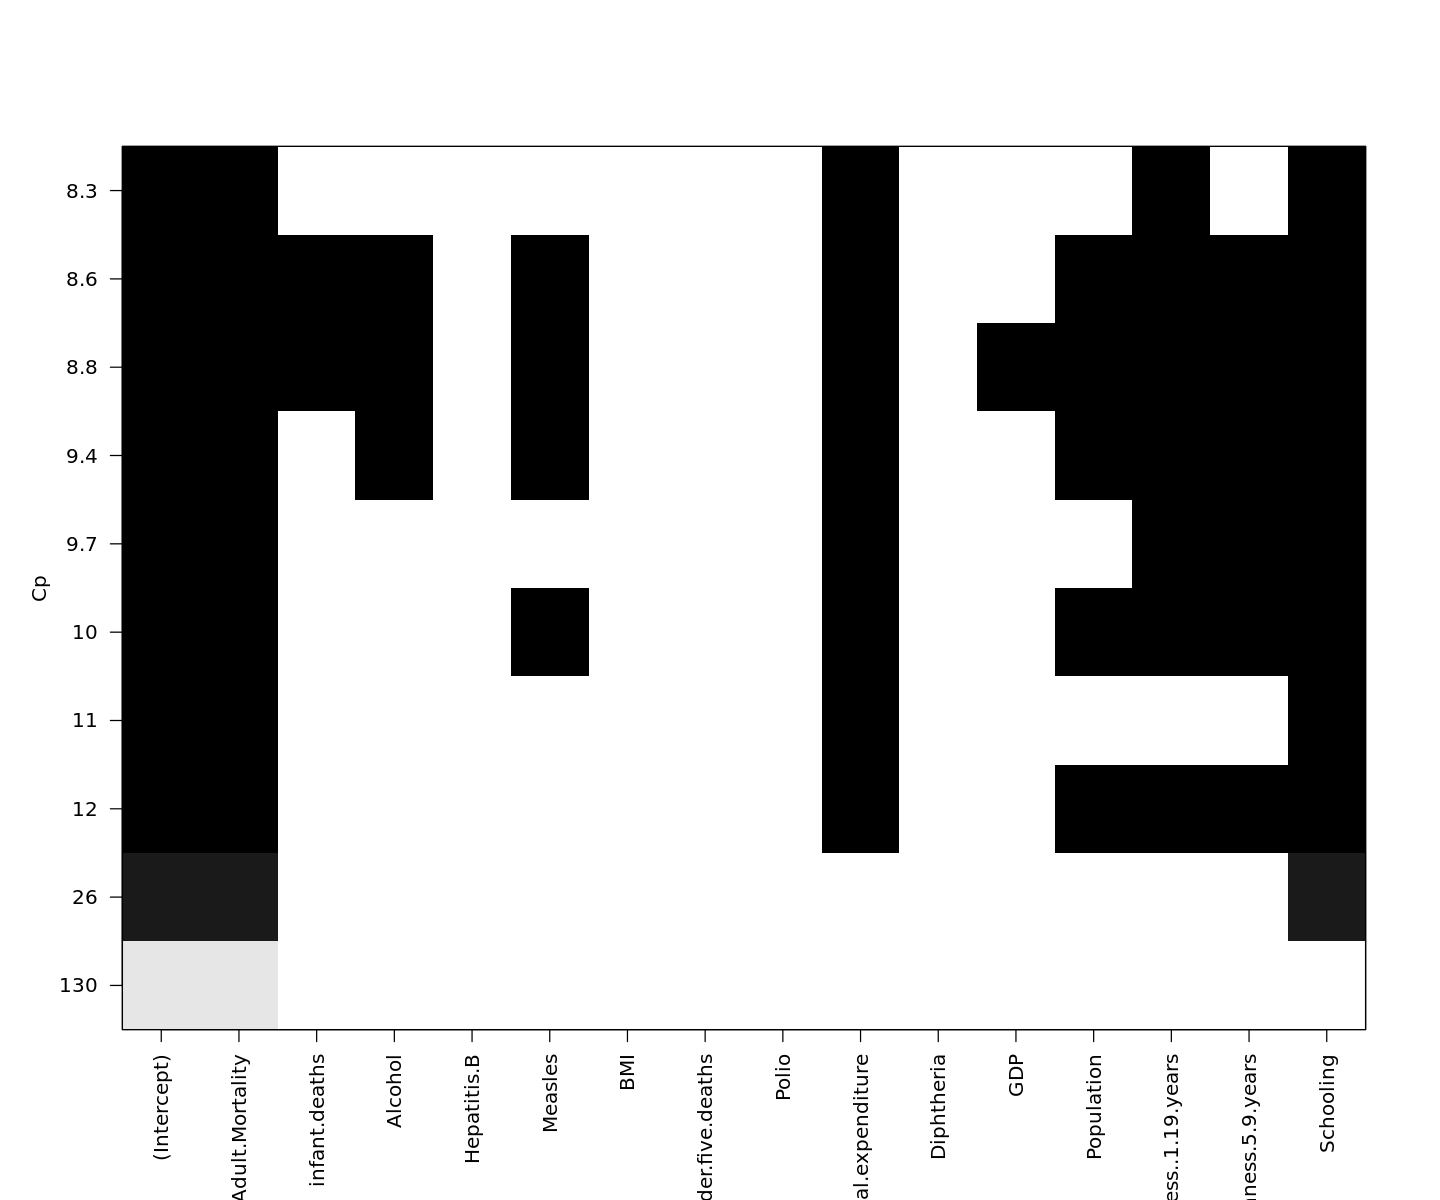

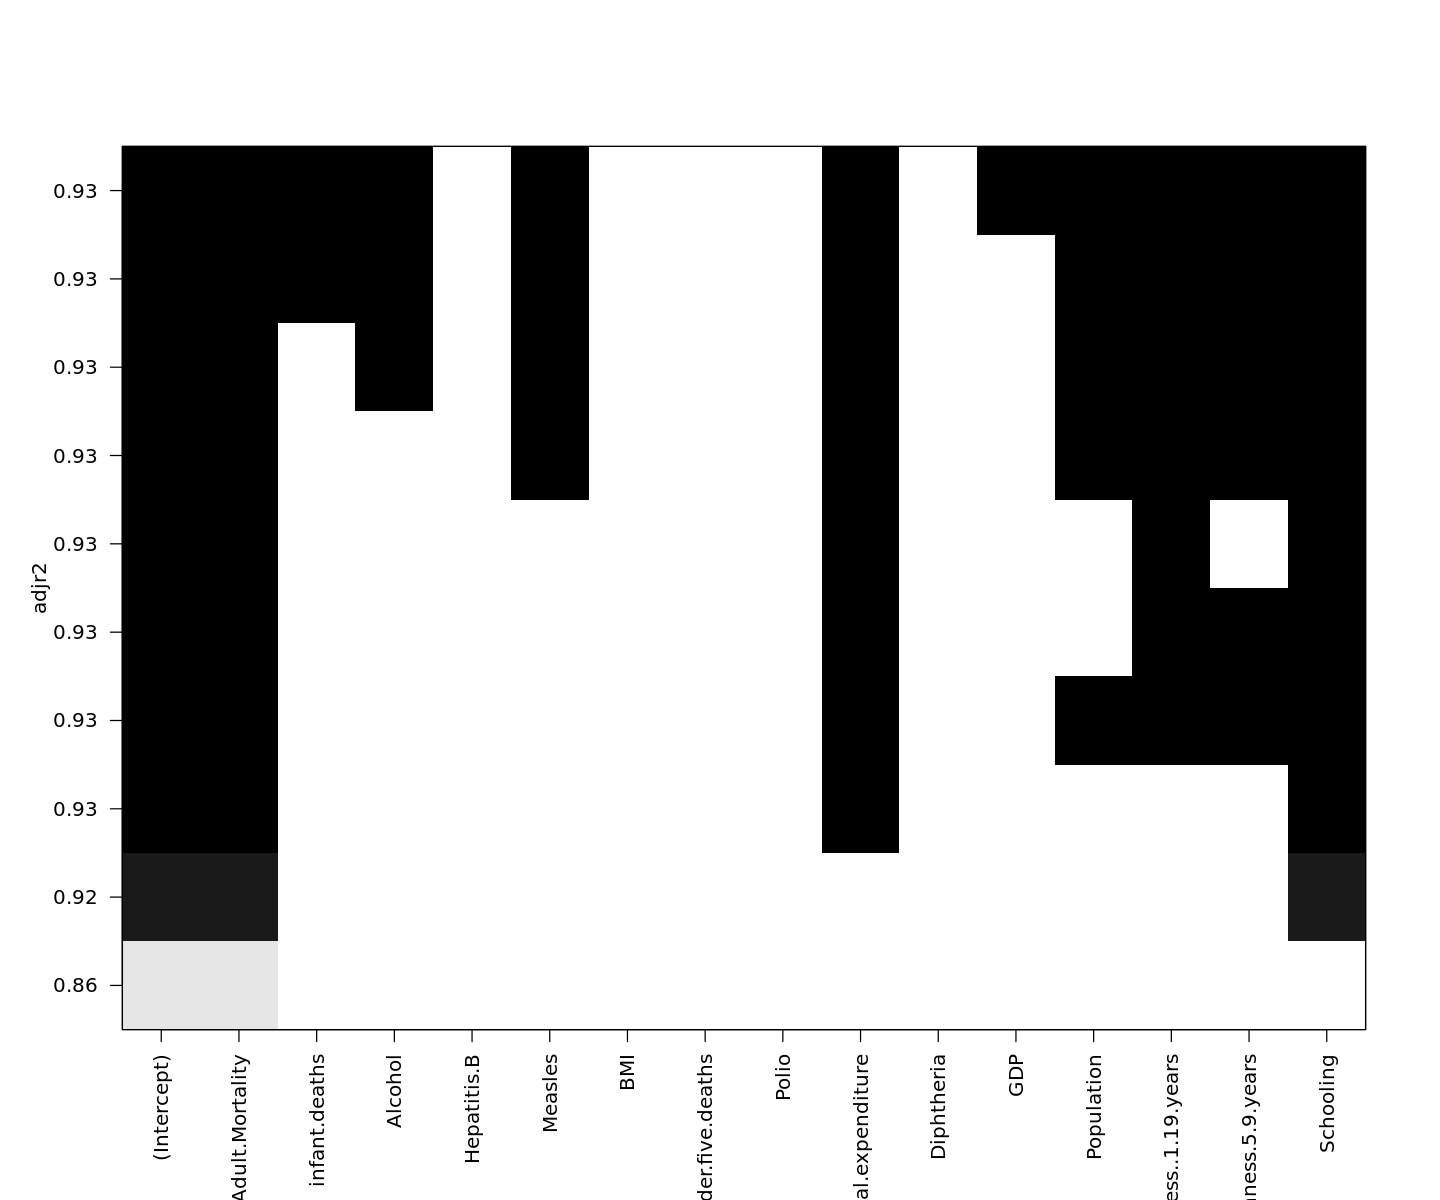

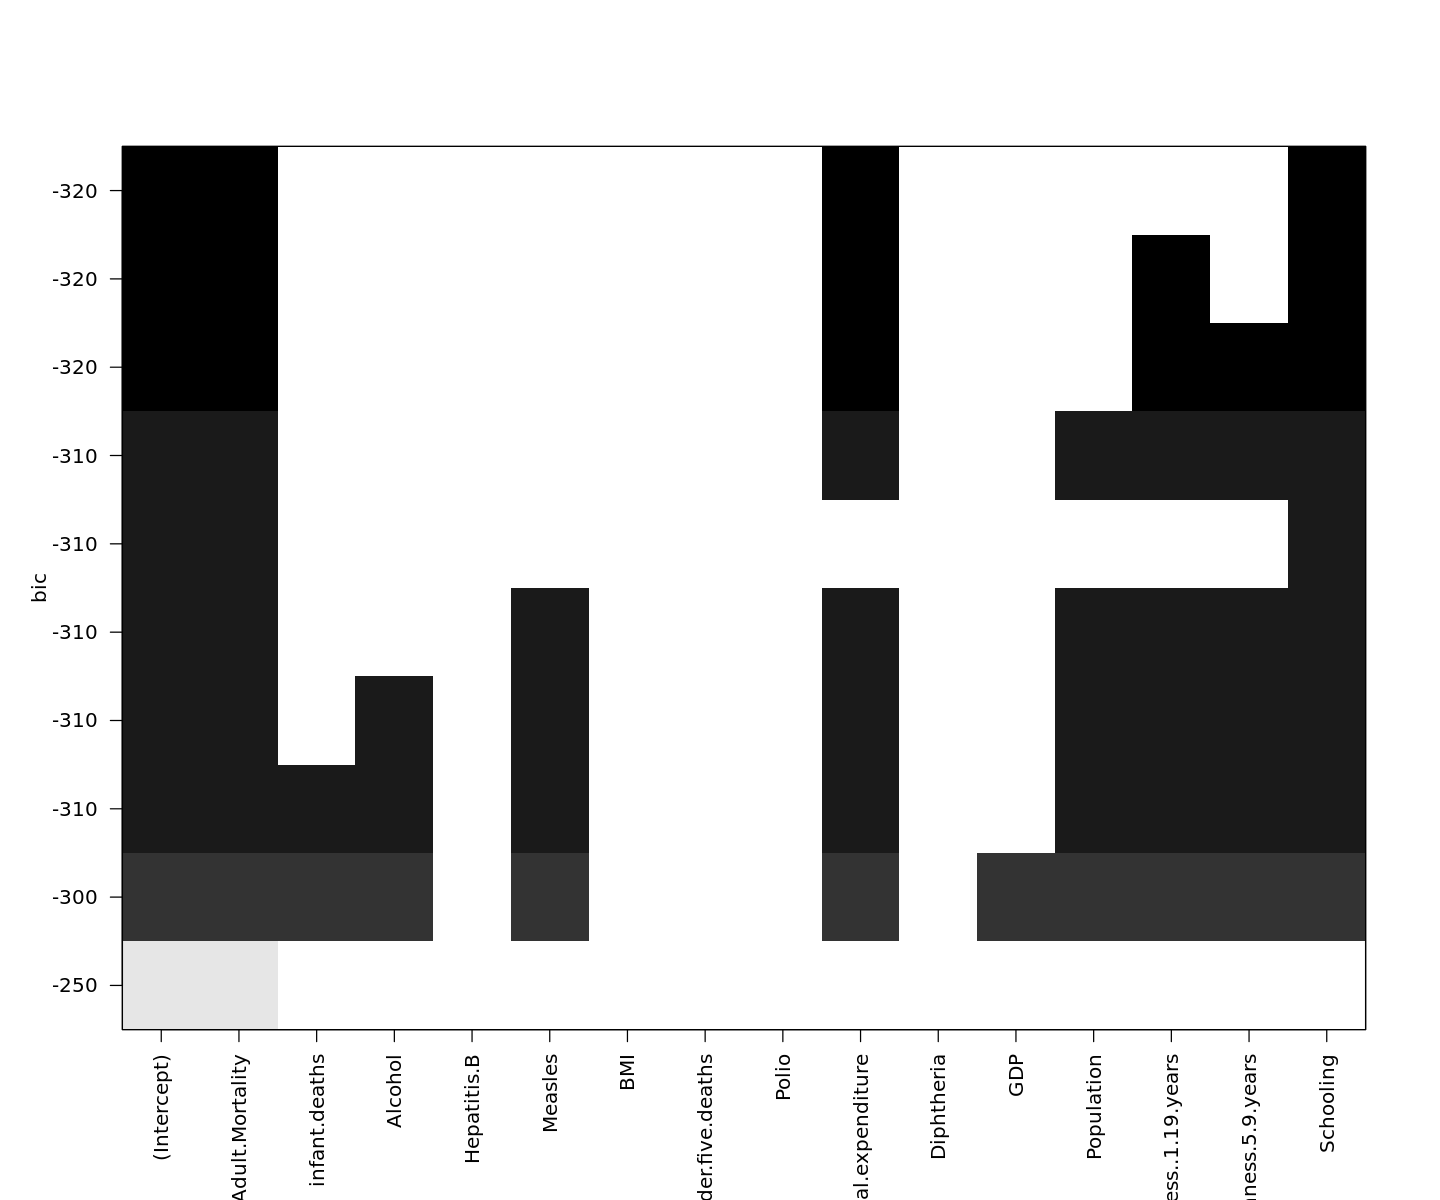

In [27]:
choixb<-regsubsets(Life.expectancy~., data=data2014num, nbest=1, nvmax=10,method="backward")
# summary(choixb)
# choixf<-regsubsets(Life.expectancy~., data=data2014num, nbest=1, nvmax=10,method="forward")
plot(choixb,scale="Cp")
plot(choixb,scale="adjr2")
plot(choixb,scale="bic")

On remarque que selon BIC, on retient le modèle le plus simple composé des trois variables. On valide ensuite cette proposition de sous-modèle par un test de Fisher adapté:

In [42]:
reg.multi <-lm(Life.expectancy~., data=data2014num)
reg.adjr2 <-lm(Life.expectancy~Adult.Mortality +Total.expenditure +Schooling+infant.deaths+Schooling+under.five.deaths+thinness..1.19.years+Measles+Population+thinness.5.9.years, data=data2014num)
anova(reg.adjr2,reg.multi)

reg.cp <-lm(Life.expectancy~Adult.Mortality +Total.expenditure +Schooling+infant.deaths+Schooling+under.five.deaths+thinness..1.19.years, data=data2014num)
anova(reg.cp,reg.multi)

reg.bic <-lm(Life.expectancy~Adult.Mortality +Total.expenditure +Schooling, data=data2014num)
anova(reg.bic,reg.multi)

Res.Df RSS      Df Sum of Sq F       Pr(>F)   
1 120    631.1999 NA       NA       NA        NA
2 114    588.1890  6 43.01087  1.38936 0.2248628

Res.Df RSS      Df Sum of Sq F        Pr(>F)   
1 123    653.6524 NA       NA        NA        NA
2 114    588.1890  9 65.46336  1.409755 0.1920323

Res.Df RSS      Df Sum of Sq F        Pr(>F)   
1 126    685.5167 NA       NA        NA        NA
2 114    588.1890 12 97.32766  1.571965 0.1096198

In [41]:
res = anova(reg.bic,reg.adjr2)
res$RSS

[1] 685.5167 631.1999

On décide de prendre le modèle obtenu par le critère de `Cp` qui est à la fois performant () et économique.  

In [ ]:
reduced_data2014 = data2014numL[c('Life.expectancy','Adult.Mortality','Alcohol','Hepatitis.B','Measles','BMI','Total.expenditure','GDP','Population','Schooling')]
reduced_without_life = data2014numL[c('Adult.Mortality','Alcohol','Hepatitis.B','Measles','BMI','Total.expenditure','GDP','Population','Schooling')]
reduced_data2014 = cbind(reduced_data2014, coord_thinness, coord_diseases, coord_infant_death)
reduced_without_life  = cbind(reduced_without_life, coord_thinness, coord_diseases, coord_infant_death)


# ACP de 2014

### 4.1 Nombre de composantes principales
On prend 6 premières variables avec 95% de pourcentage cumulé de variance.


Call:
PCA(X = data2014numL, scale.unit = TRUE, graph = F) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               7.515   2.452   1.788   1.029   0.940   0.755   0.709
% of var.             46.966  15.326  11.172   6.434   5.874   4.721   4.434
Cumulative % of var.  46.966  62.292  73.464  79.898  85.772  90.493  94.927
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.241   0.201   0.150   0.080   0.072   0.032   0.022
% of var.              1.505   1.256   0.935   0.498   0.449   0.202   0.137
Cumulative % of var.  96.432  97.688  98.623  99.121  99.570  99.772  99.909
                      Dim.15  Dim.16
Variance               0.012   0.003
% of var.              0.073   0.018
Cumulative % of var.  99.982 100.000

Individuals (the 10 first)
                         Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Afghanistan          |  6.003 |  5.346  2.925  0.793 | -

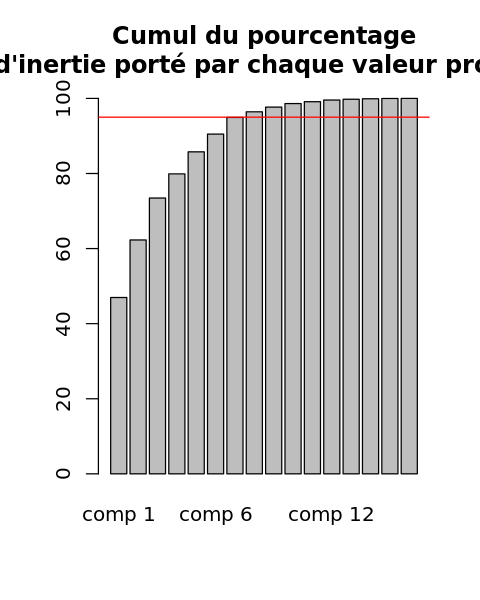

In [ ]:
acp2014 <-PCA(data2014numL, scale.unit=TRUE,graph=F)
summary(acp2014)
barplot(acp2014$eig[,"cumulative percentage of variance"], main="Cumul du pourcentage
d'inertie porté par chaque valeur propre" )
abline(h=95, col="red")

#### 4.2 Commentaires

!!! strong correlation of some variable pairs 

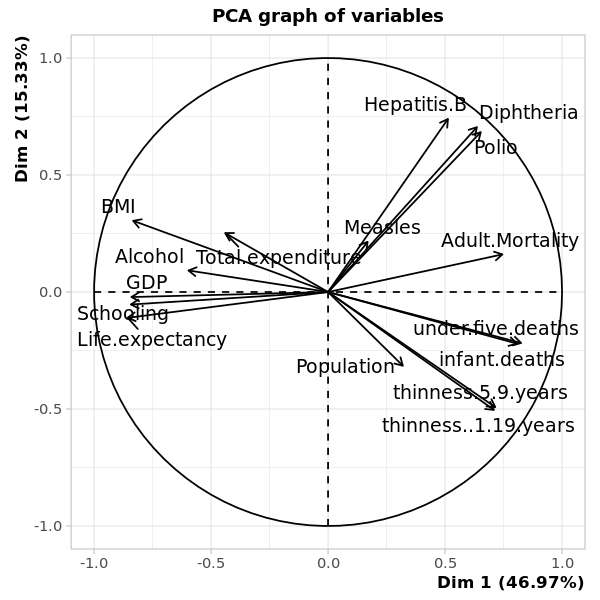

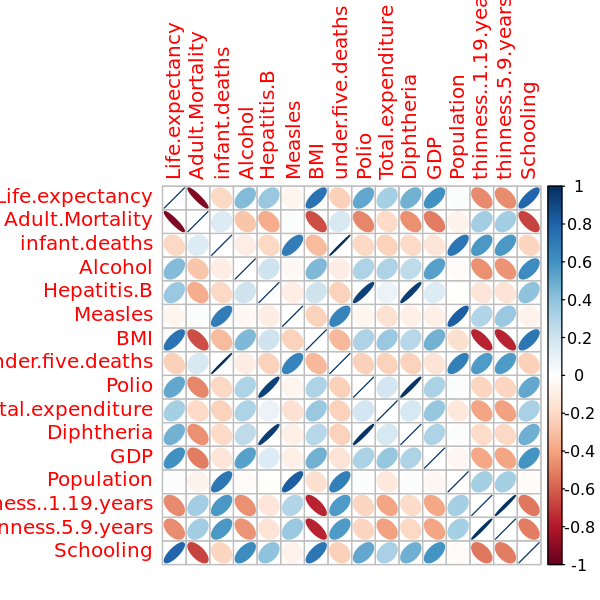

In [ ]:
plot(acp2014,choix="var")
corrplot(cor(data2014num[, 1:16]), method = "ellipse")

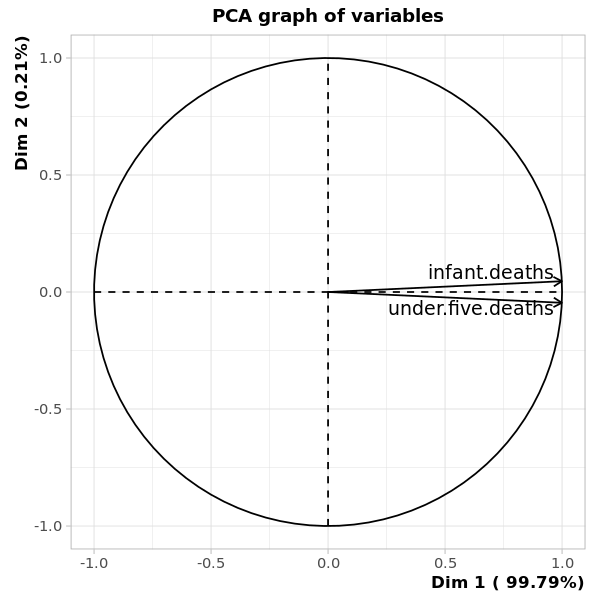

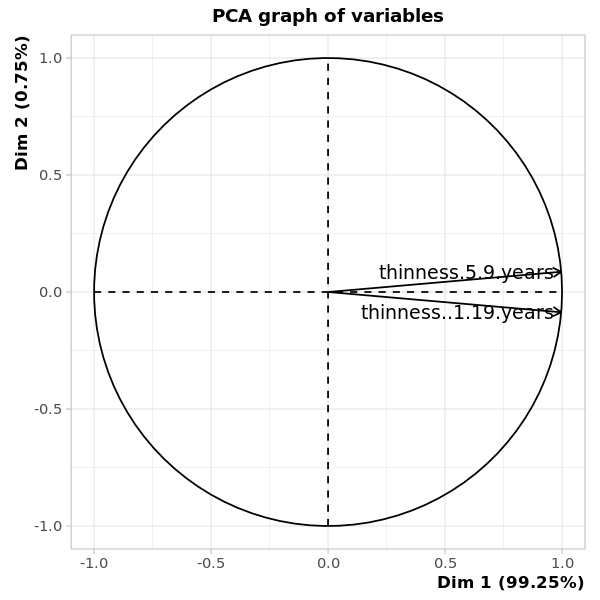

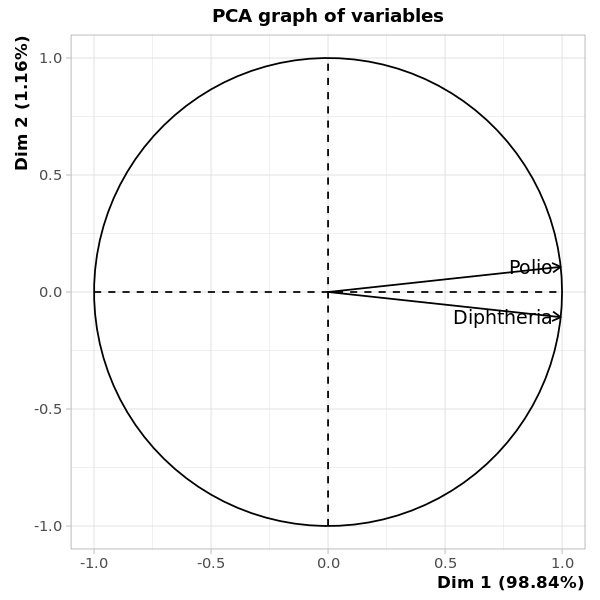

In [ ]:
par(mfrow=c(1,3))
infant_under5_death = data2014numL[c('infant.deaths','under.five.deaths')]
acp_infant_deaths = PCA(infant_under5_death, scale.unit=TRUE,ncp=2,graph=F)
plot(acp_infant_deaths,choix="var")
coord_infant_death = acp_infant_deaths$ind$coord[,1] 

thinness = data2014numL[c('thinness..1.19.years','thinness.5.9.years')]
acp_thinness = PCA(thinness, scale.unit=TRUE,ncp=2,graph=F)
plot(acp_thinness,choix="var")
coord_thinness = acp_thinness$ind$coord[,1] 

diseases = data2014numL[c('Diphtheria','Polio')]
acp_diseases = PCA(diseases, scale.unit=TRUE,ncp=2,graph=F)
plot(acp_diseases,choix="var")
coord_diseases = acp_diseases$ind$coord[,1]

### 5. Clustering

On effectue le clustering sur les données simplifiés (après la séléction de variable).

#### 5.1 Scaling the data

In [ ]:
mydata <- na.omit(reduced_without_life) # listwise deletion of missing
mydata <- scale(mydata) # standardize variables

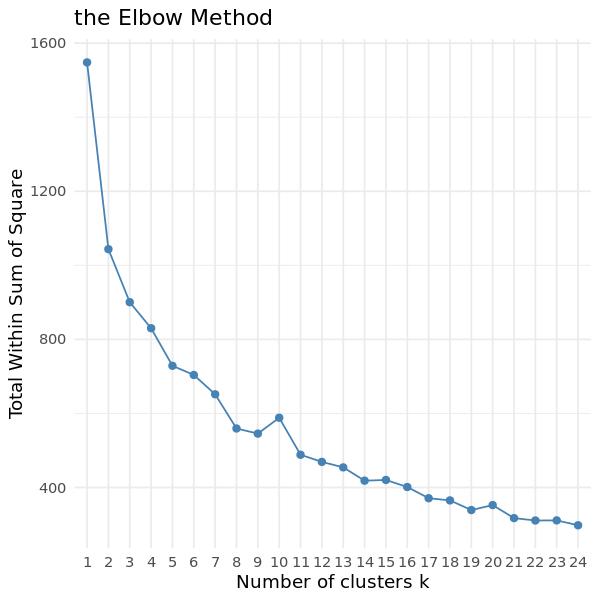

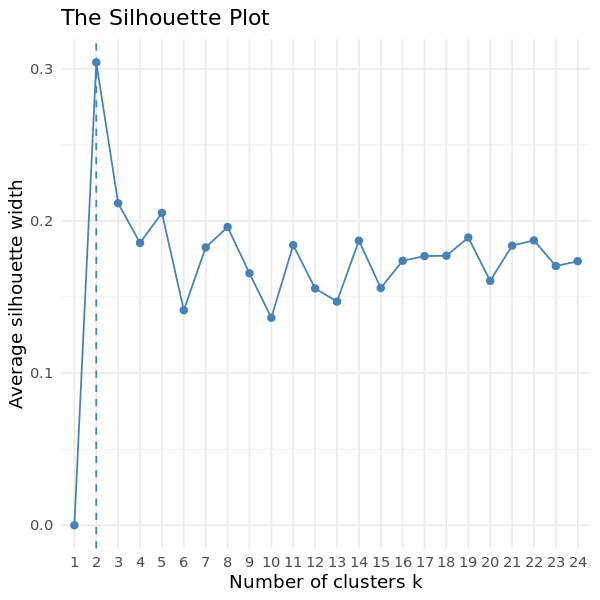

In [ ]:
fviz_nbclust(mydata, kmeans, method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method")
fviz_nbclust(mydata, kmeans, method = "silhouette", k.max = 24) + theme_minimal() + ggtitle("The Silhouette Plot")

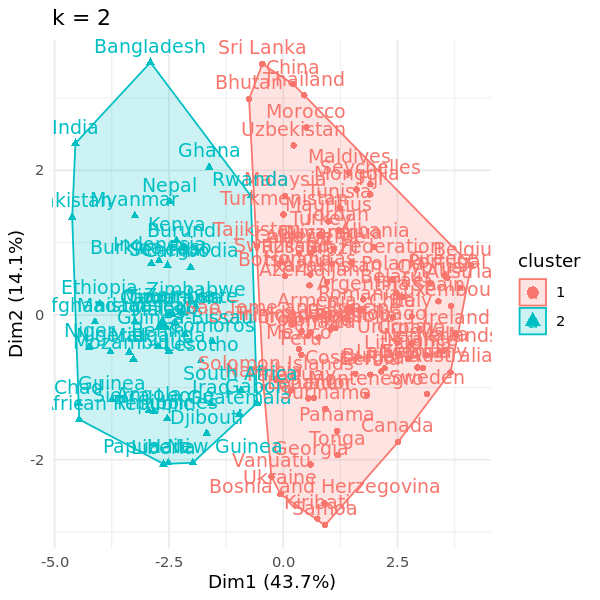

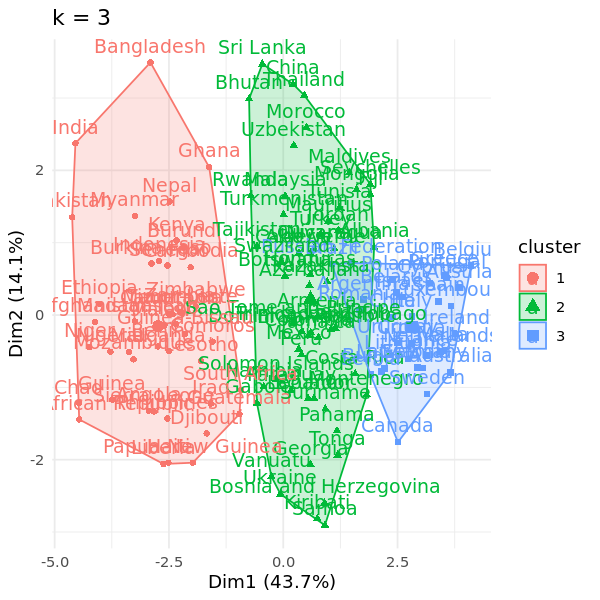

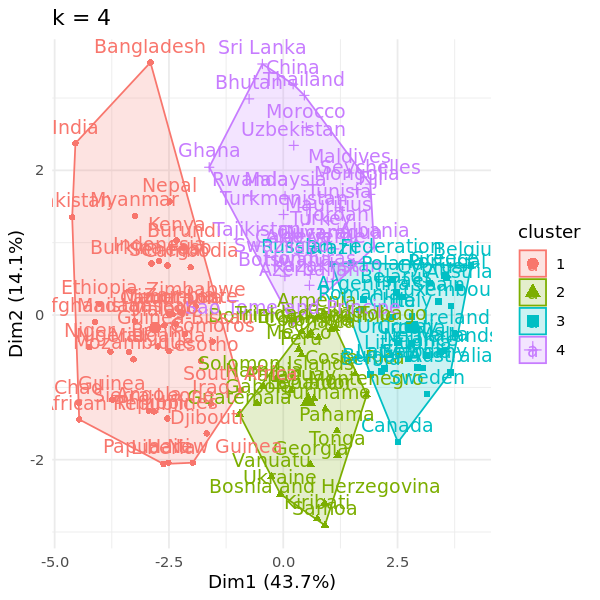

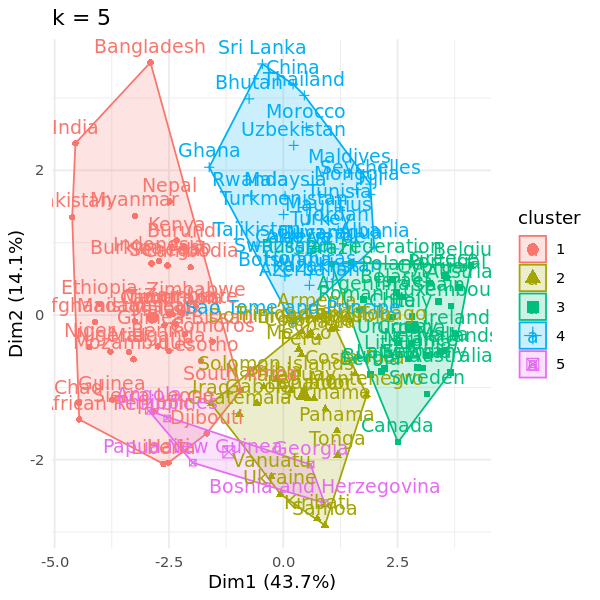

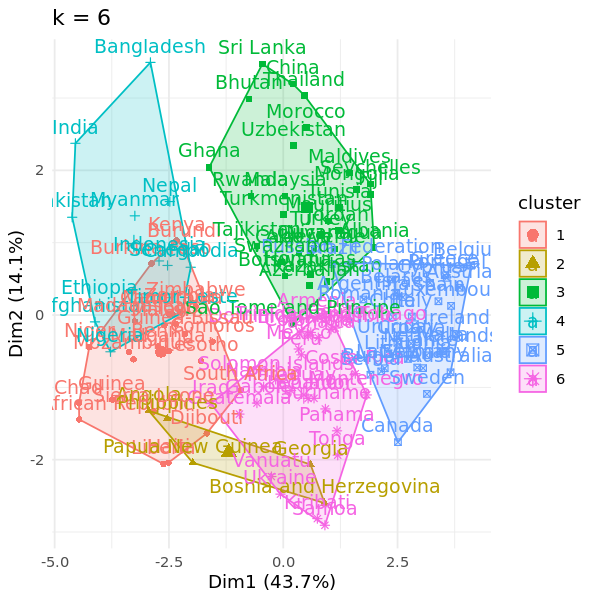

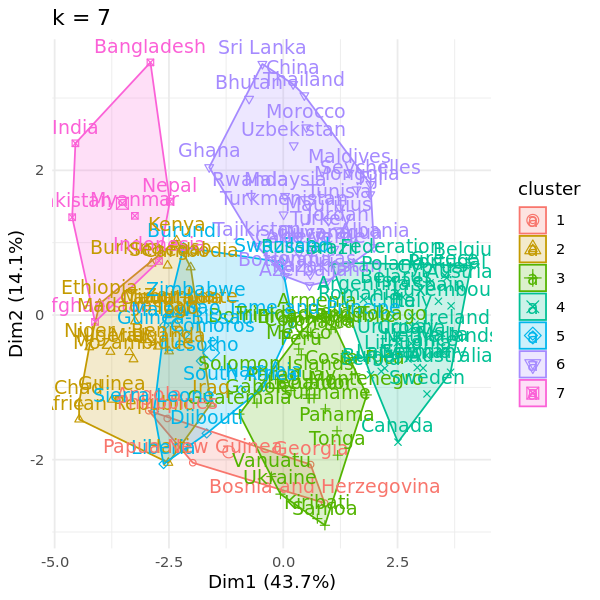

In [ ]:
km2 <- kmeans(mydata, 2)
km3 <- kmeans(mydata, 3)
km4 <- kmeans(mydata, 4)
km5 <- kmeans(mydata, 5)
km6 <- kmeans(mydata, 6)
km7 <- kmeans(mydata, 7)
km8 <- kmeans(mydata, 8)
km9 <- kmeans(mydata, 9)
km10 <- kmeans(mydata, 
km11 <- kmeans(mydata, 11)
p1 <- fviz_cluster(km2, data = mydata, ellipse.type = "convex") + theme_minimal() + ggtitle("k = 2") 
p2 <- fviz_cluster(km3, data = mydata, ellipse.type = "convex") + theme_minimal() + ggtitle("k = 3")
p3 <- fviz_cluster(km4, data = mydata, ellipse.type = "convex") + theme_minimal() + ggtitle("k = 4")
p4 <- fviz_cluster(km5, data = mydata, ellipse.type = "convex") + theme_minimal() + ggtitle("k = 5")
p5 <- fviz_cluster(km6, data = mydata, ellipse.type = "convex") + theme_minimal() + ggtitle("k = 6")
p6 <- fviz_cluster(km7, data = mydata, ellipse.type = "convex") + theme_minimal() + ggtitle("k = 7")
# plot_grid(p1, p2, p3, p4, p5, p6, labels = c("k2", "k3", "k4", "k5", "k6", "k7"))
p1
p2
p3
p4
p5
p6

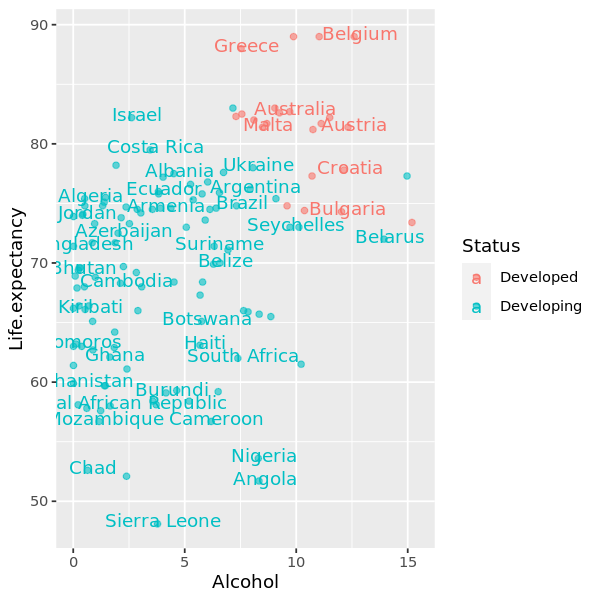

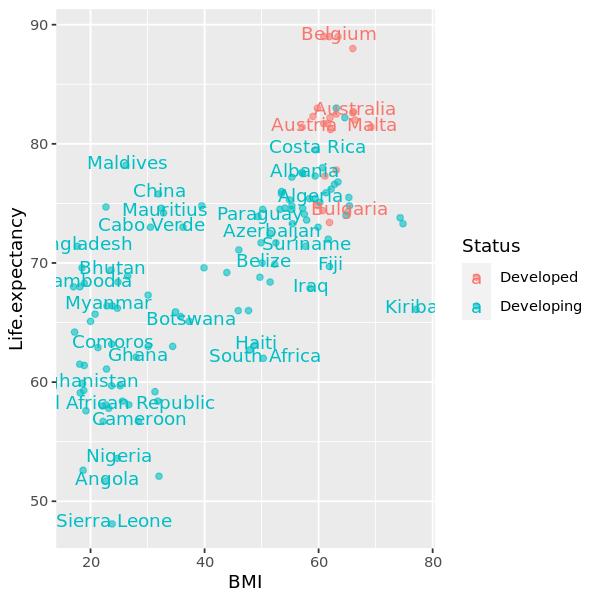

In [ ]:
ggplot(data2014, 
       aes(x = Alcohol, 
           y = Life.expectancy, 
           color = Status)) +
  geom_point(alpha = .6) +
geom_text(
    label=data2014$Country, 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T
  )

ggplot(data2014, 
       aes(x = BMI, 
           y = Life.expectancy, 
           color = Status)) +
  geom_point(alpha = .6) +
  geom_text(
    label=data2014$Country, 
    nudge_x = 0.25, nudge_y = 0.25, 
    check_overlap = T
  )

In [ ]:
table(data2014$Status,km4$cluster)
classError(km4$cluster,data2014$Status)$errorRate
adjustedRandIndex(data2014$Status,km4$cluster)


            
              1  2  3  4
  Developed   0  0 22  0
  Developing 42 27  9 30

[1] 0.5076923

[1] 0.1572316

## Draft

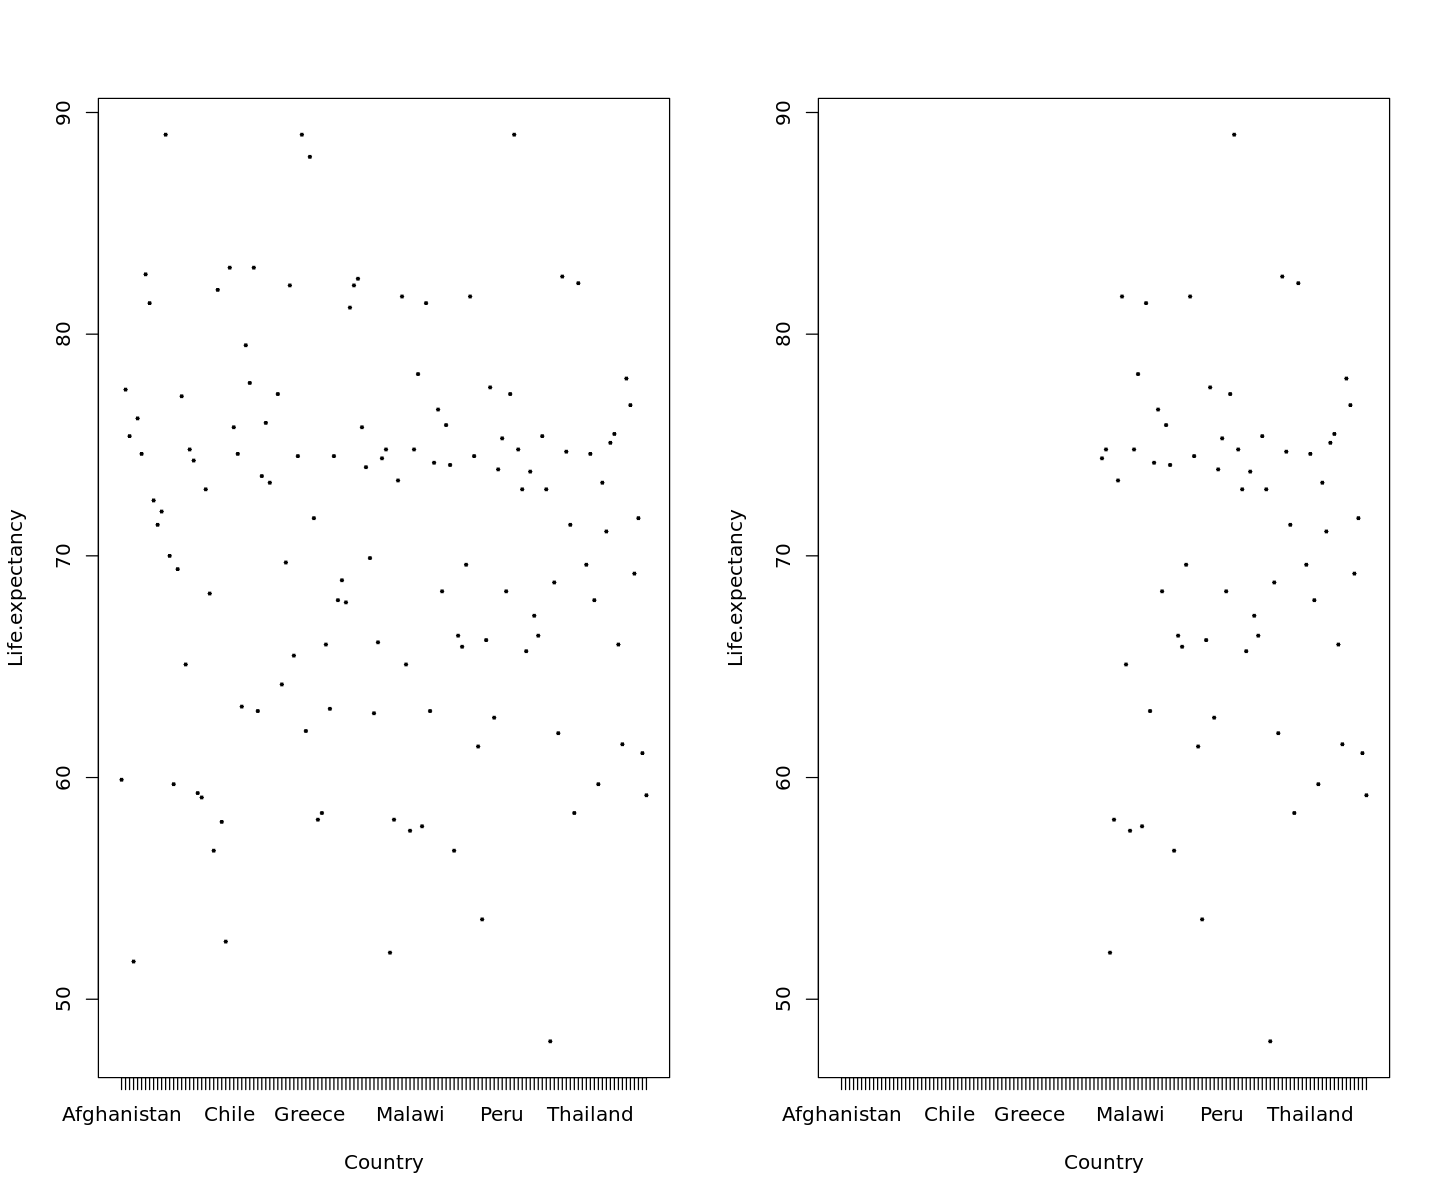

In [ ]:
#Analyse unidimensionnelle des données 
#Analyse de variable quantitative par une variable qualitative
half1=data2014[1:65,]
half2=data2014[65:130,]
par(mfrow=c(1,2))
boxplot(Life.expectancy~Country, data=data2014)
boxplot(Life.expectancy~Country, data=half2)

In [ ]:
percentage <- data$Total.expenditure/data$GDP * 100
summary(percentage)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005823 0.073179 0.173812 0.443844 0.475003 9.967308 

[1] "Afghanistan"
[1] "Albania"


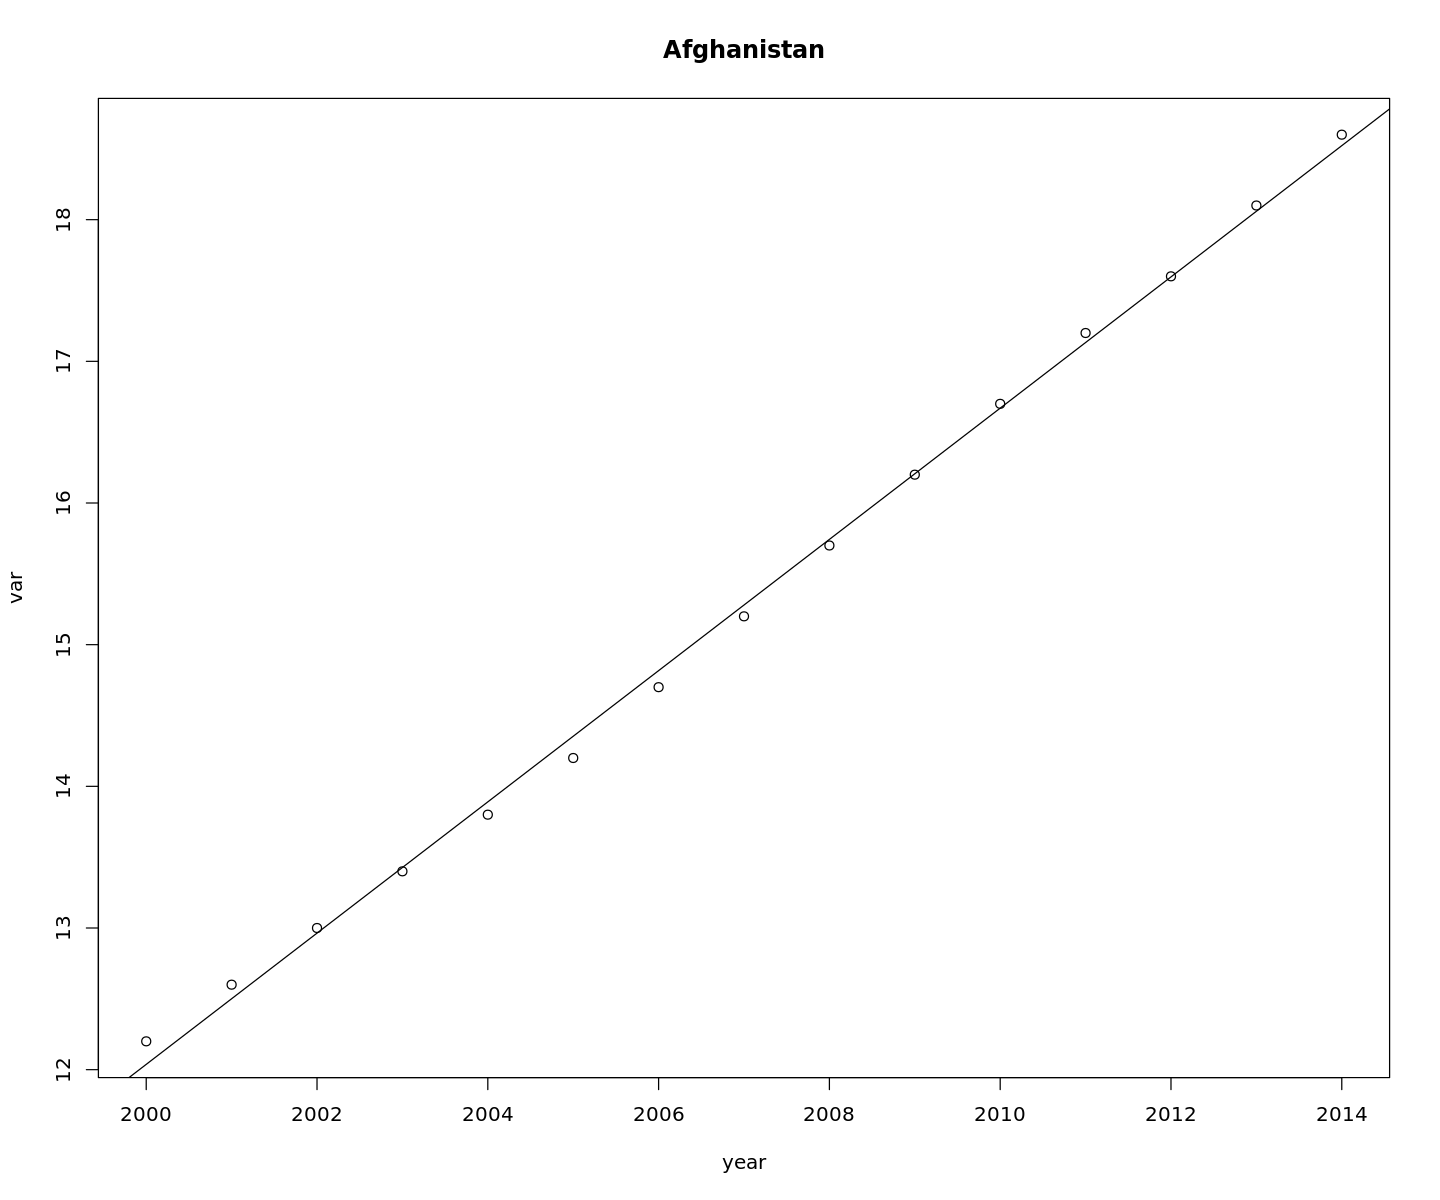

[1] "Algeria"


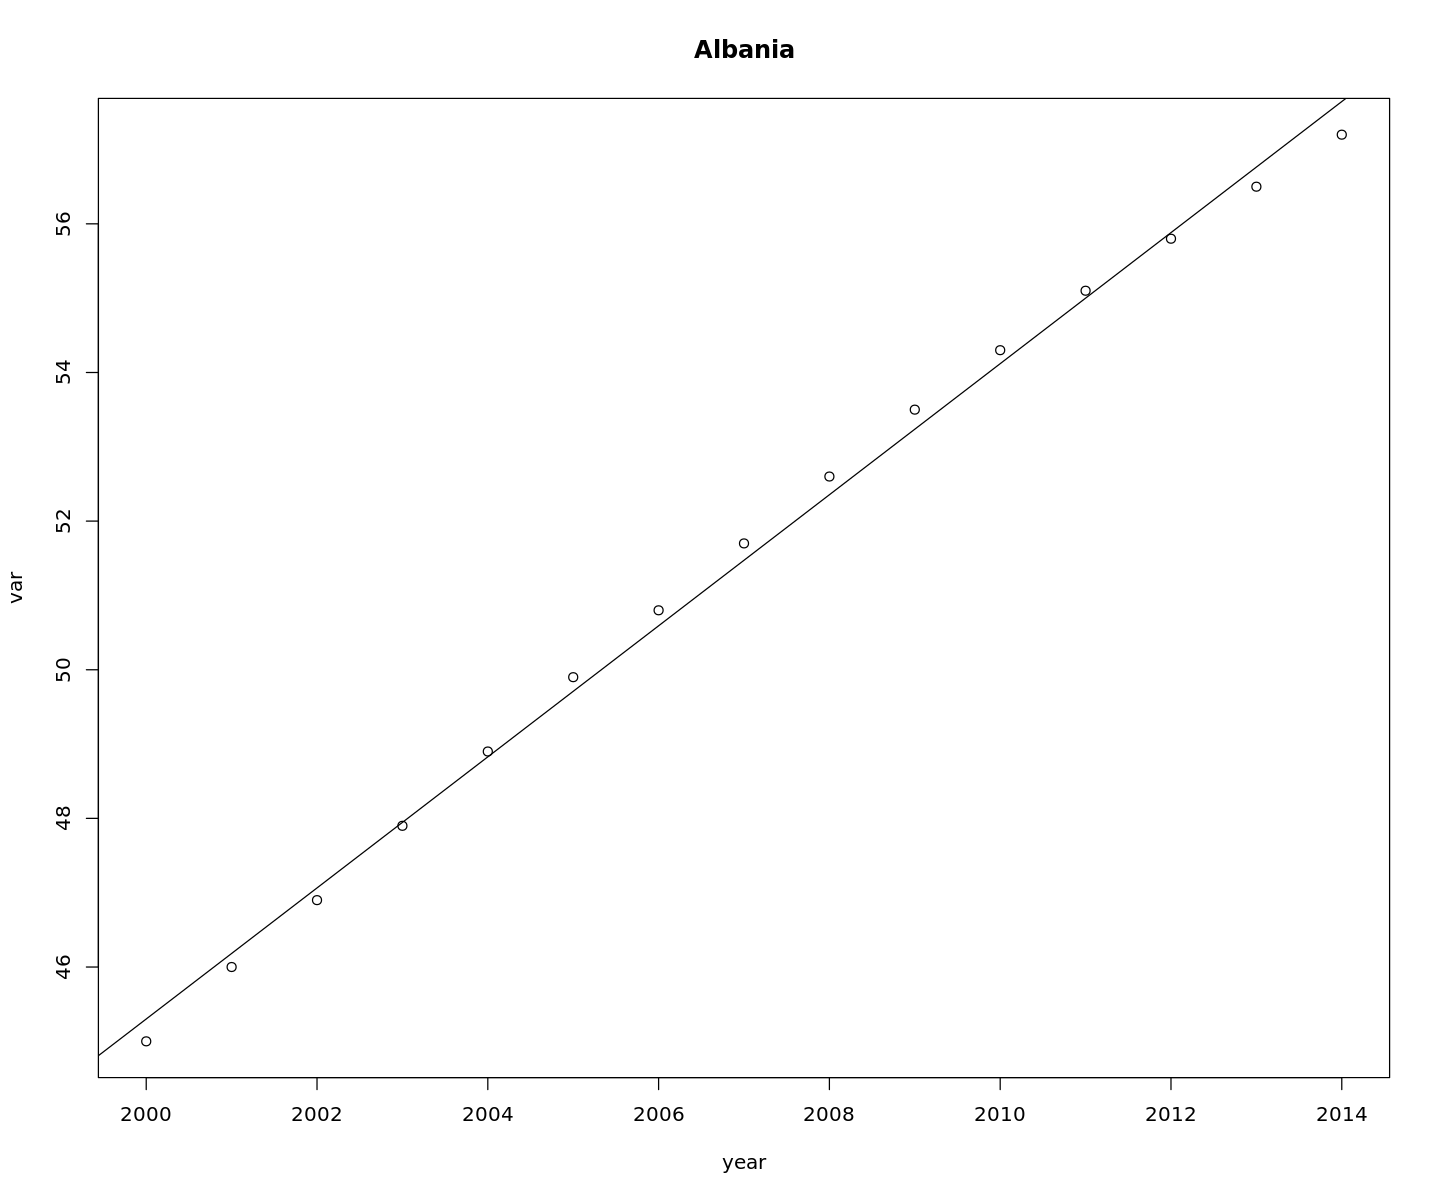

[1] "Angola"


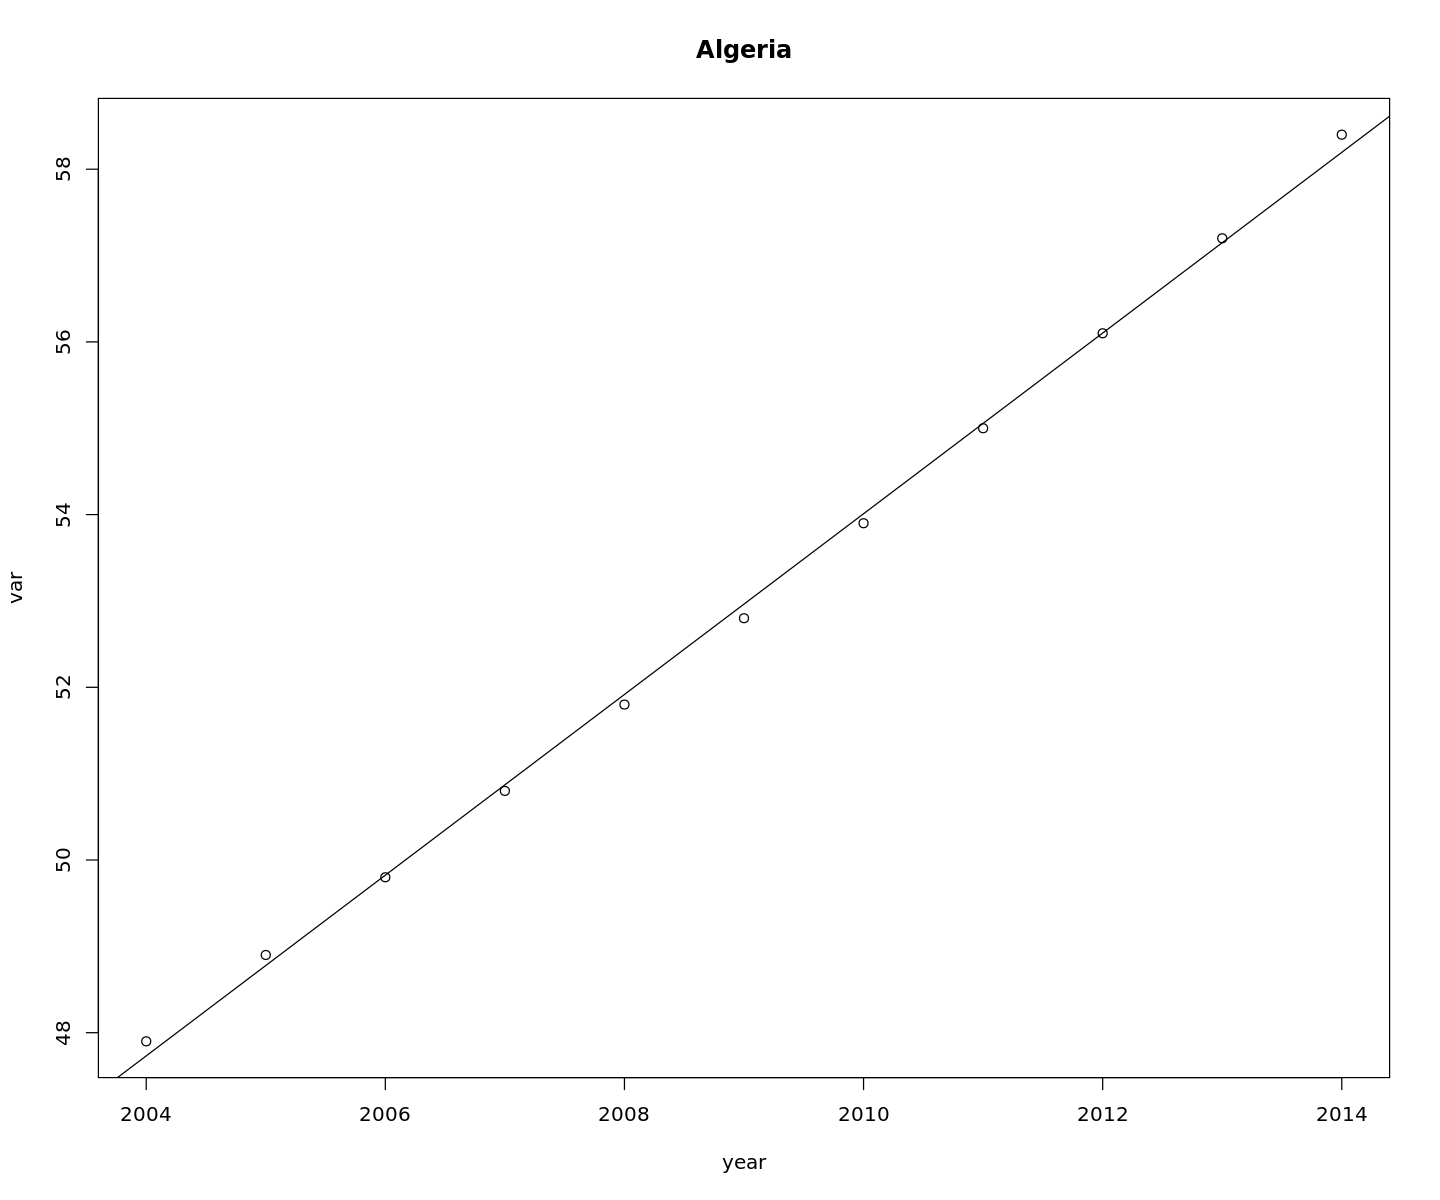

[1] "Argentina"


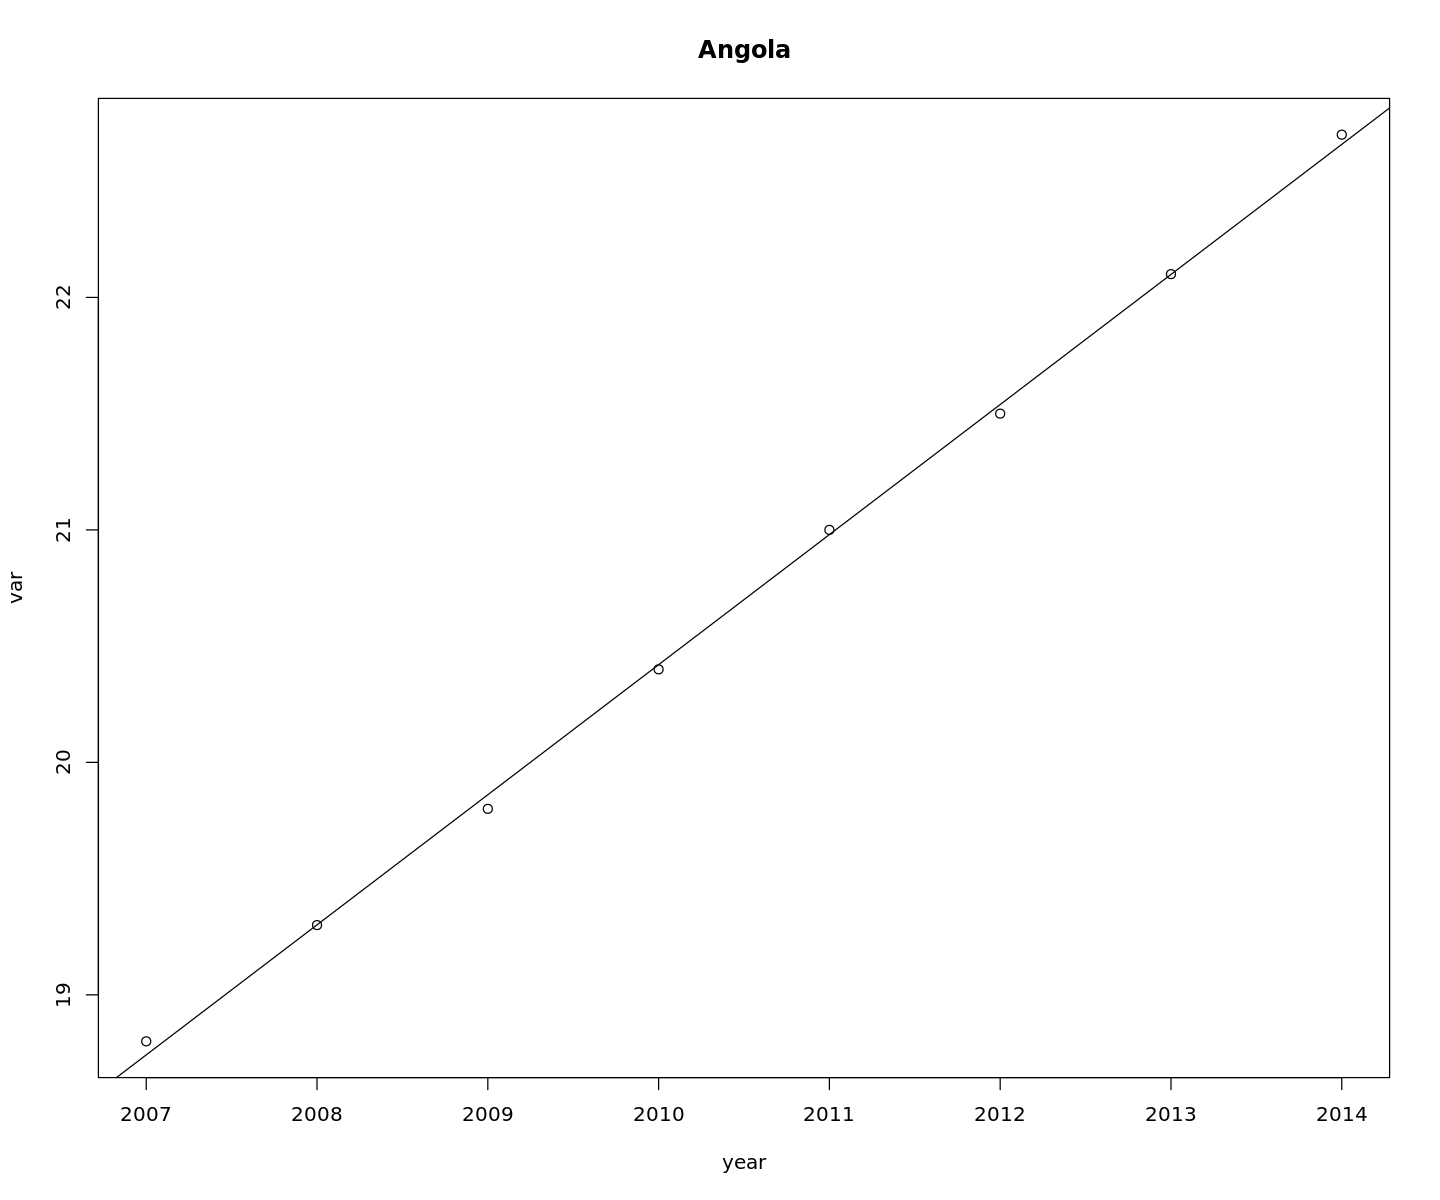

[1] "Armenia"


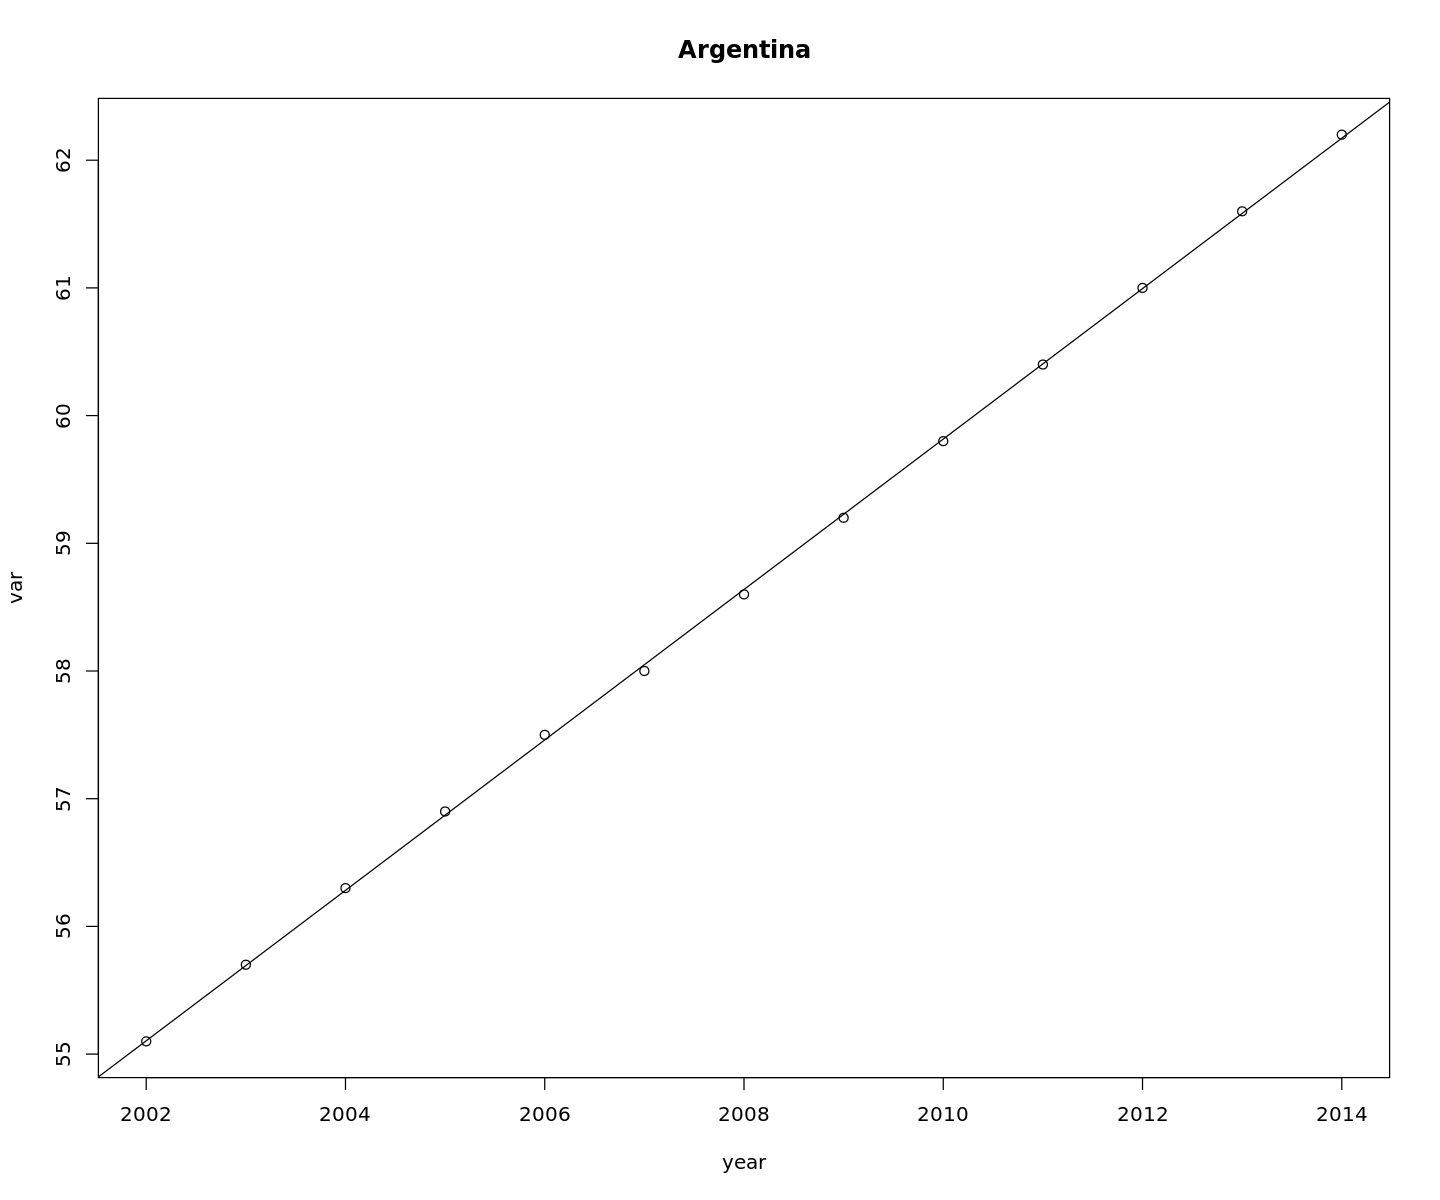

[1] "Australia"


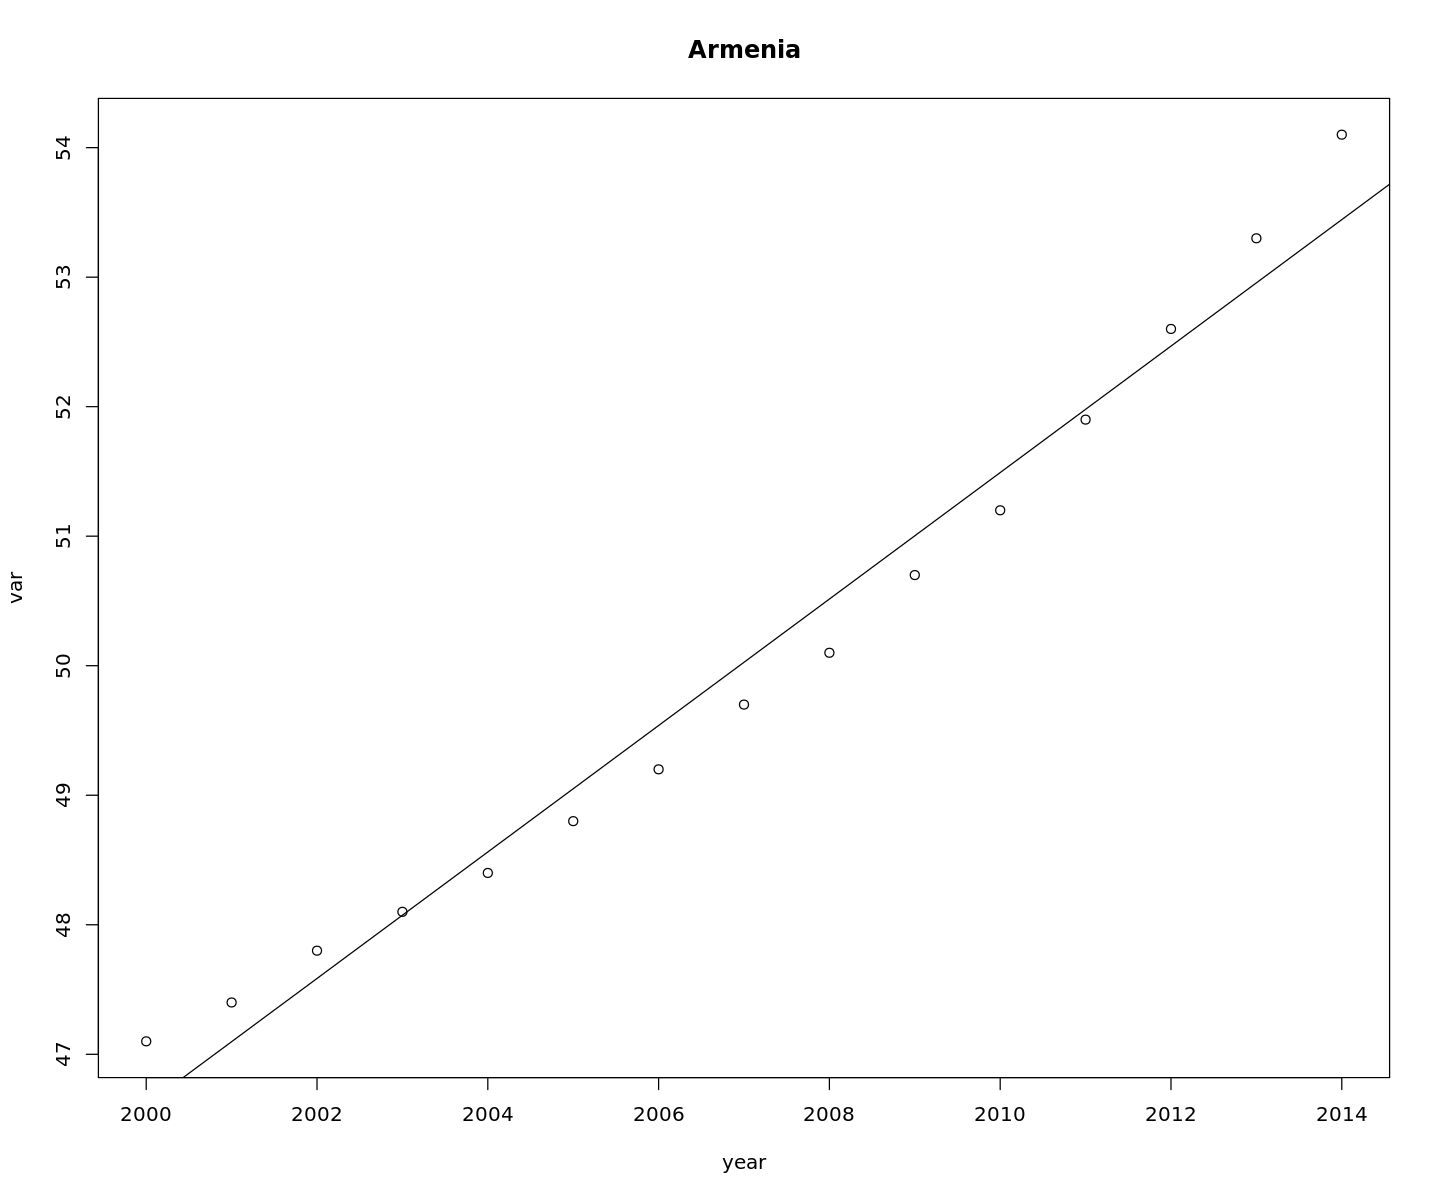

[1] "Austria"


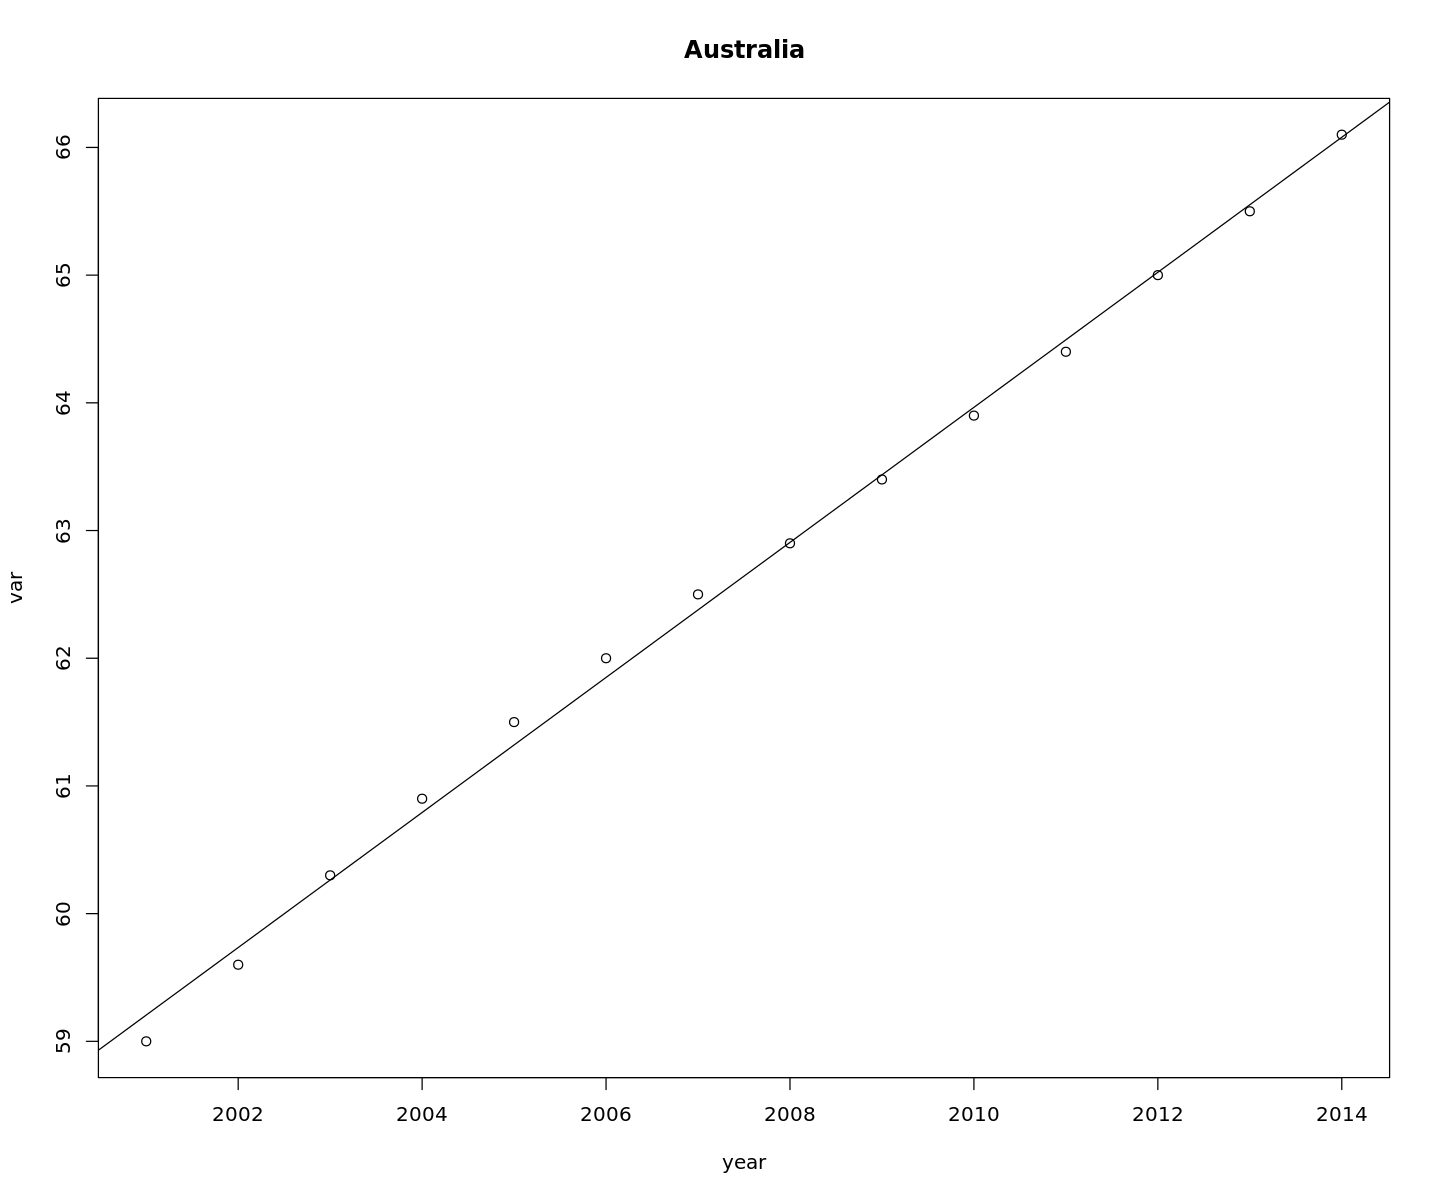

[1] "Azerbaijan"


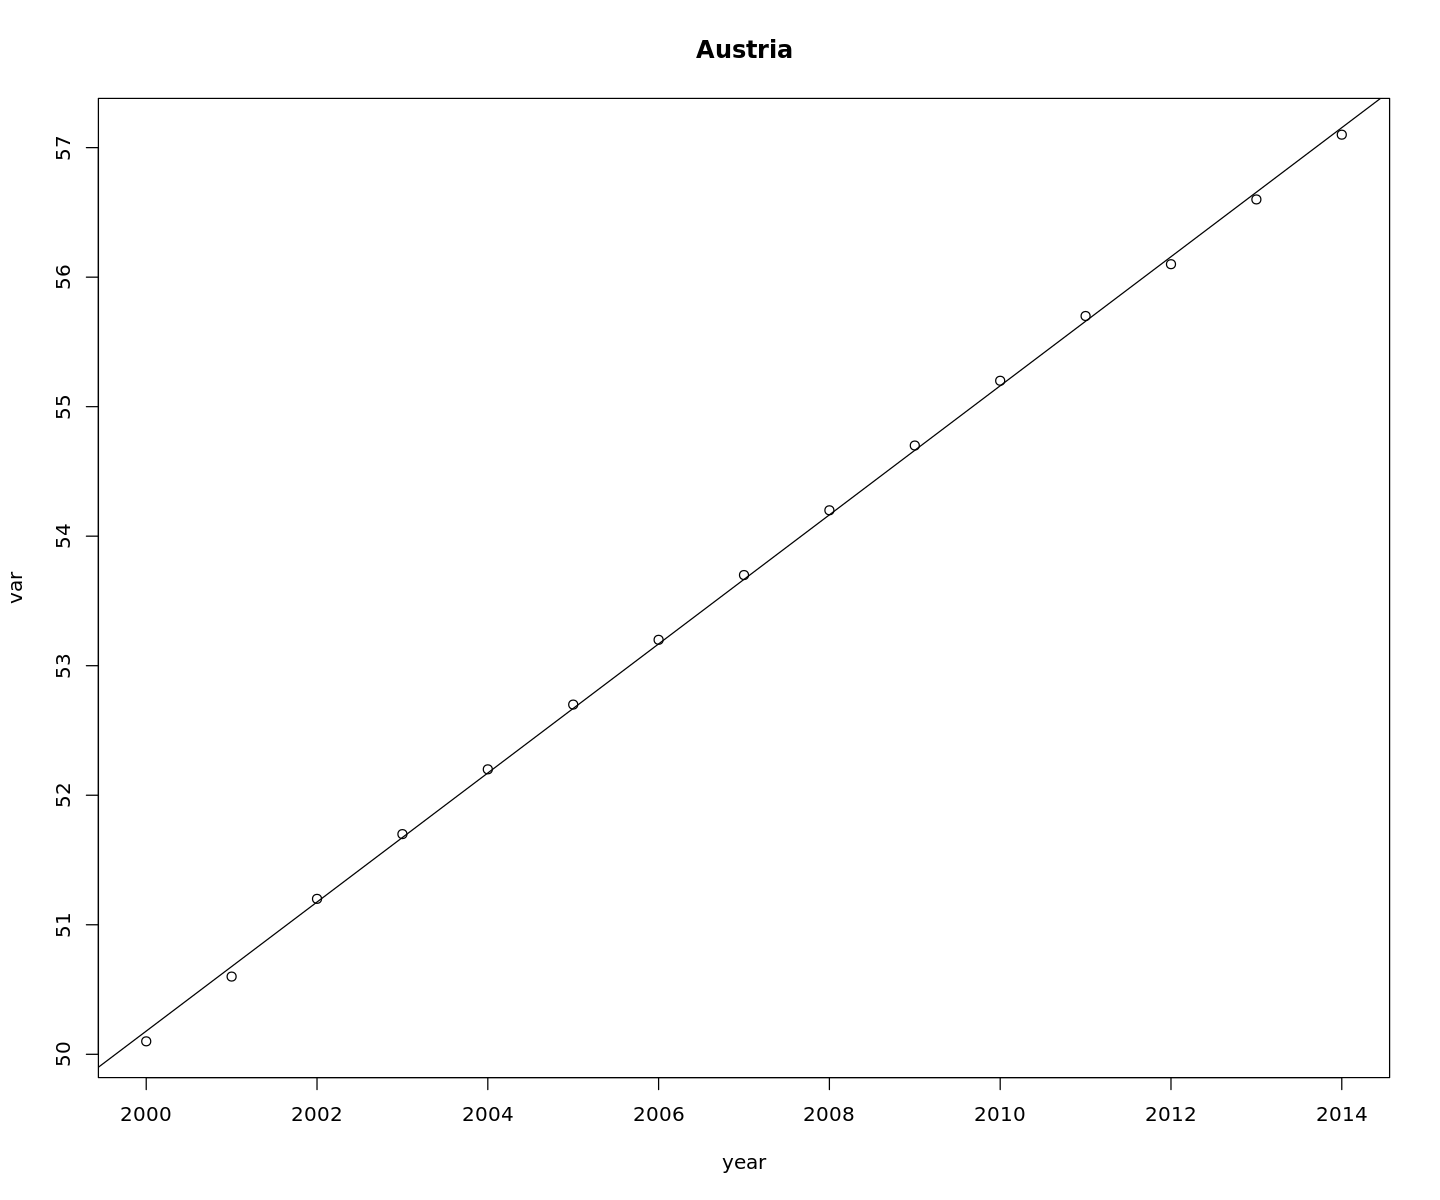

[1] "Bangladesh"


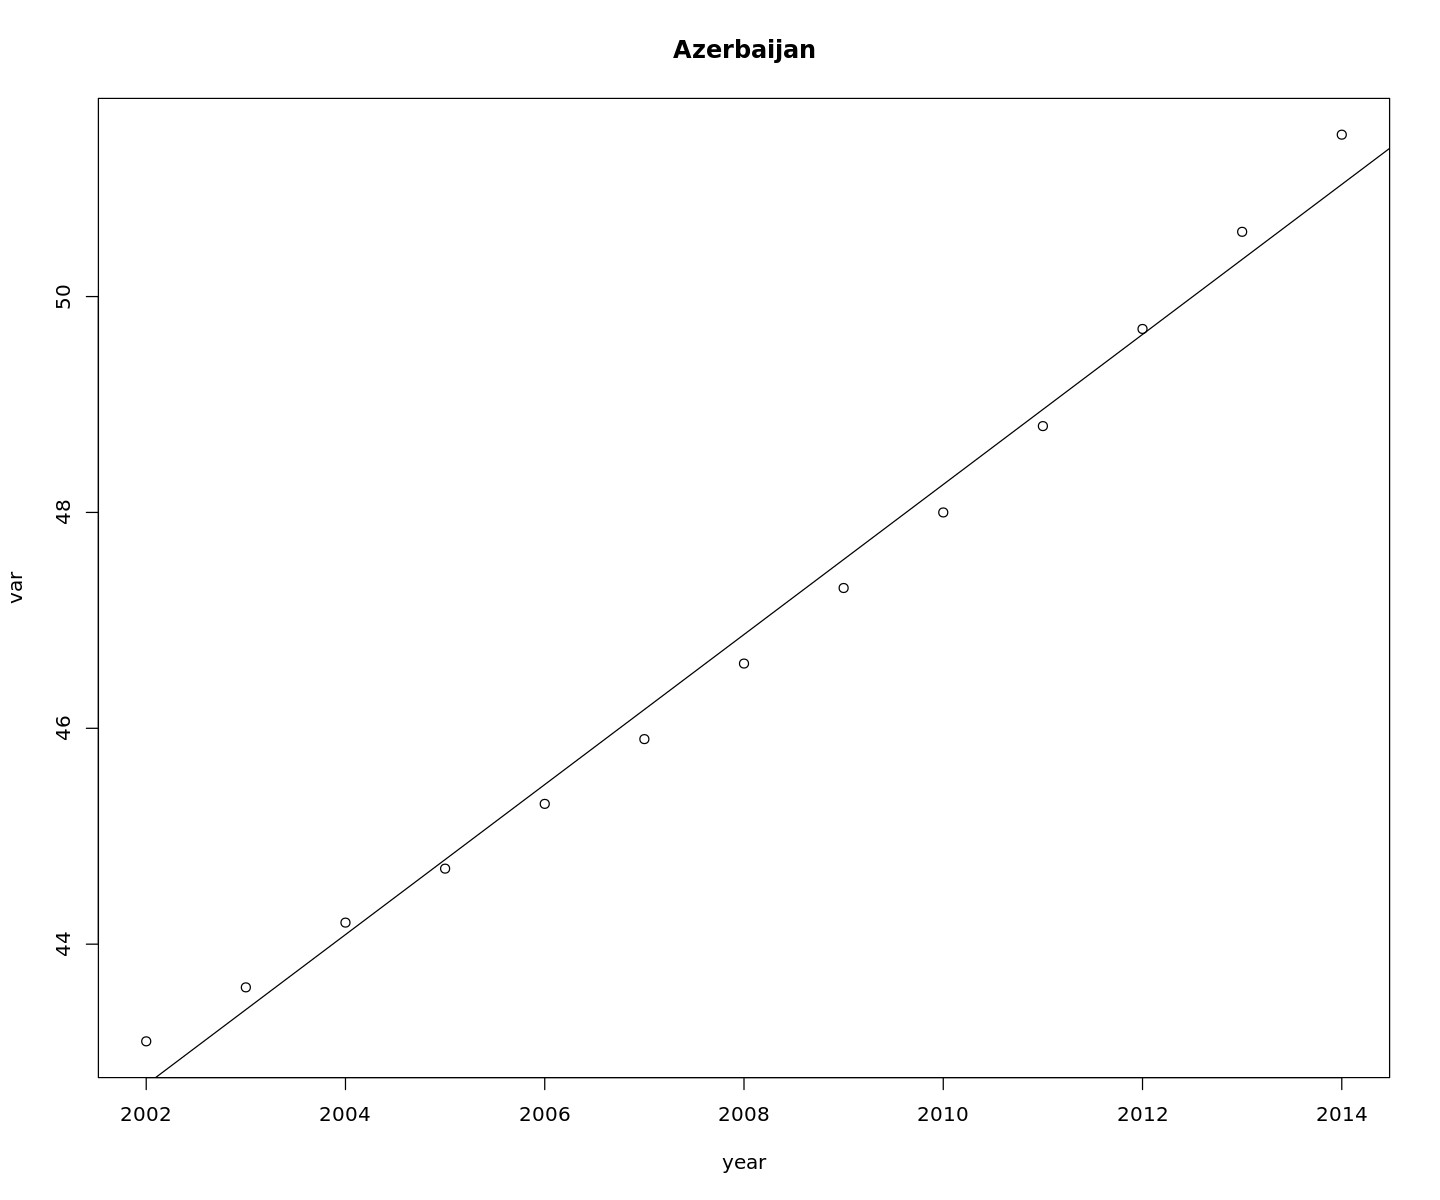

[1] "Belarus"


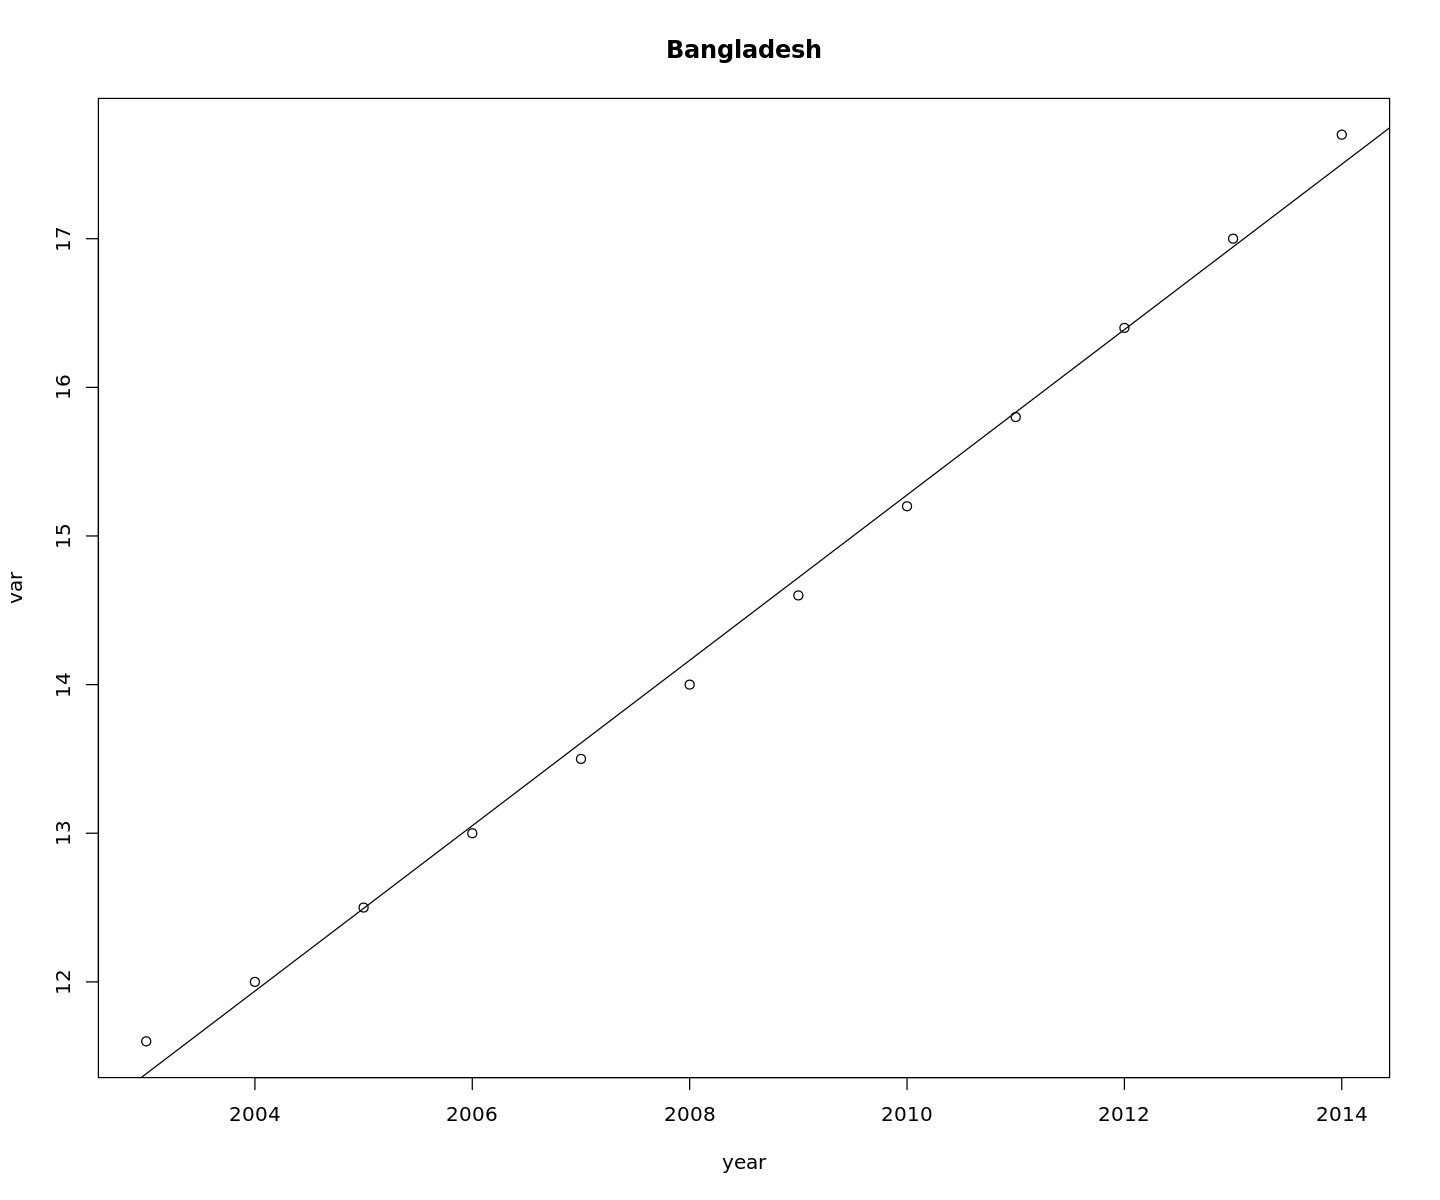

[1] "Belgium"


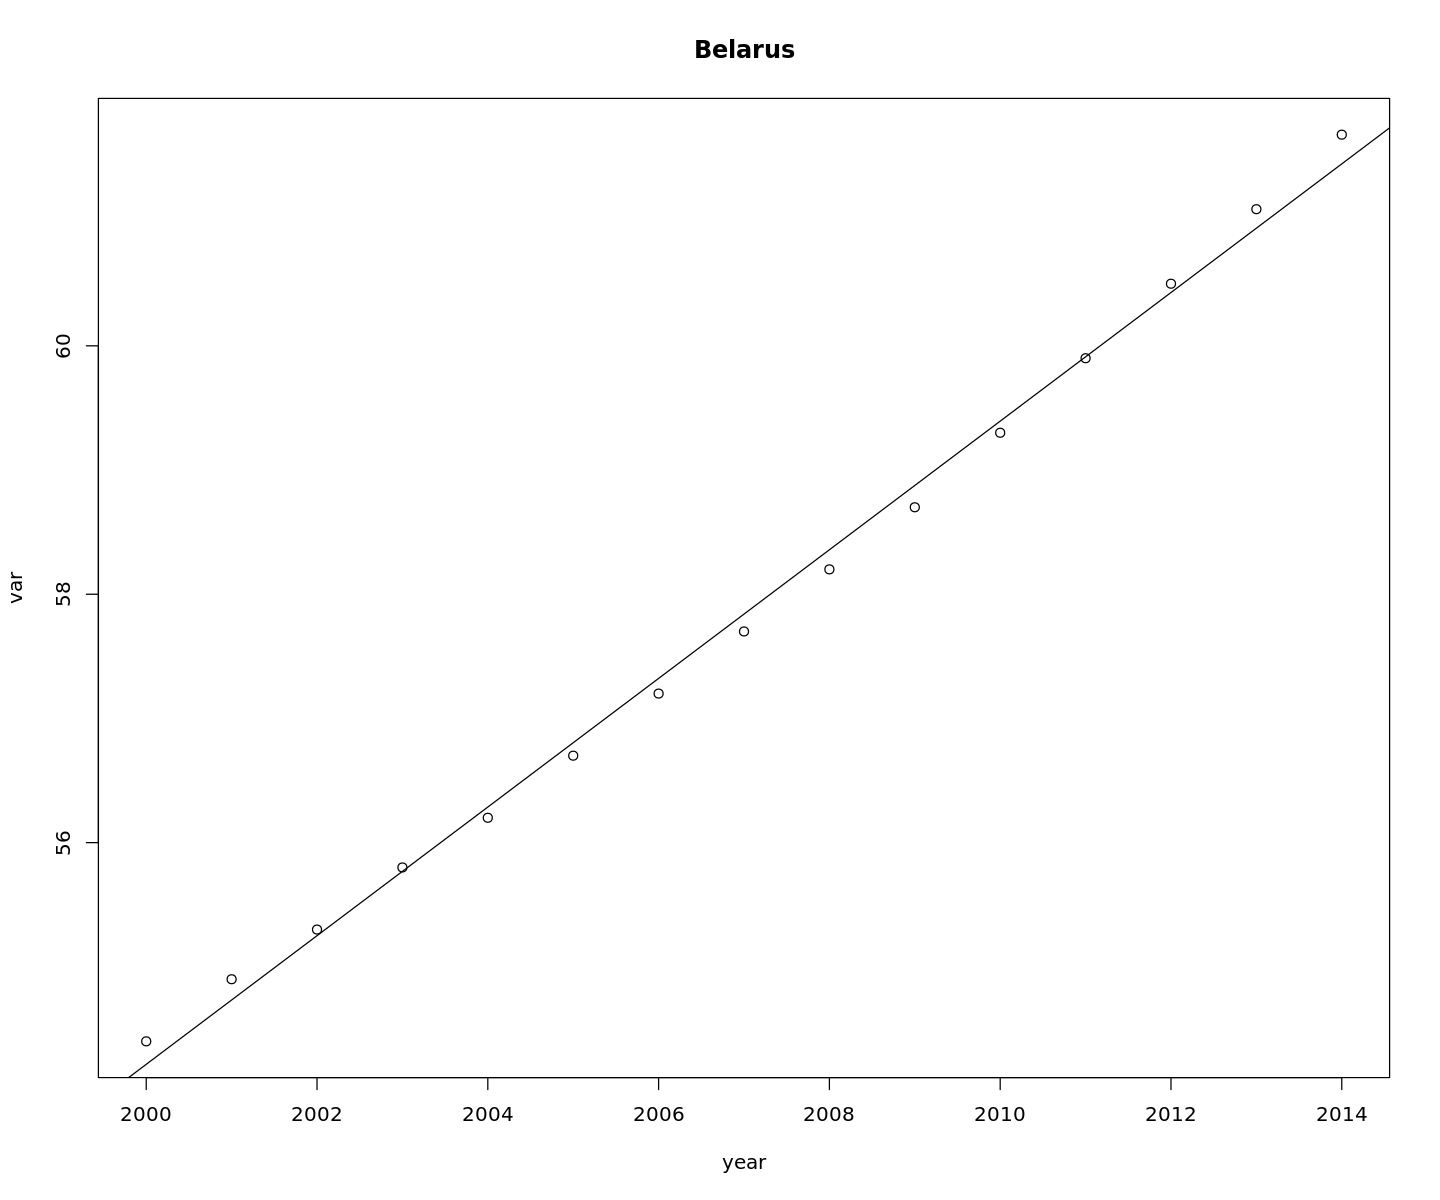

[1] "Belize"


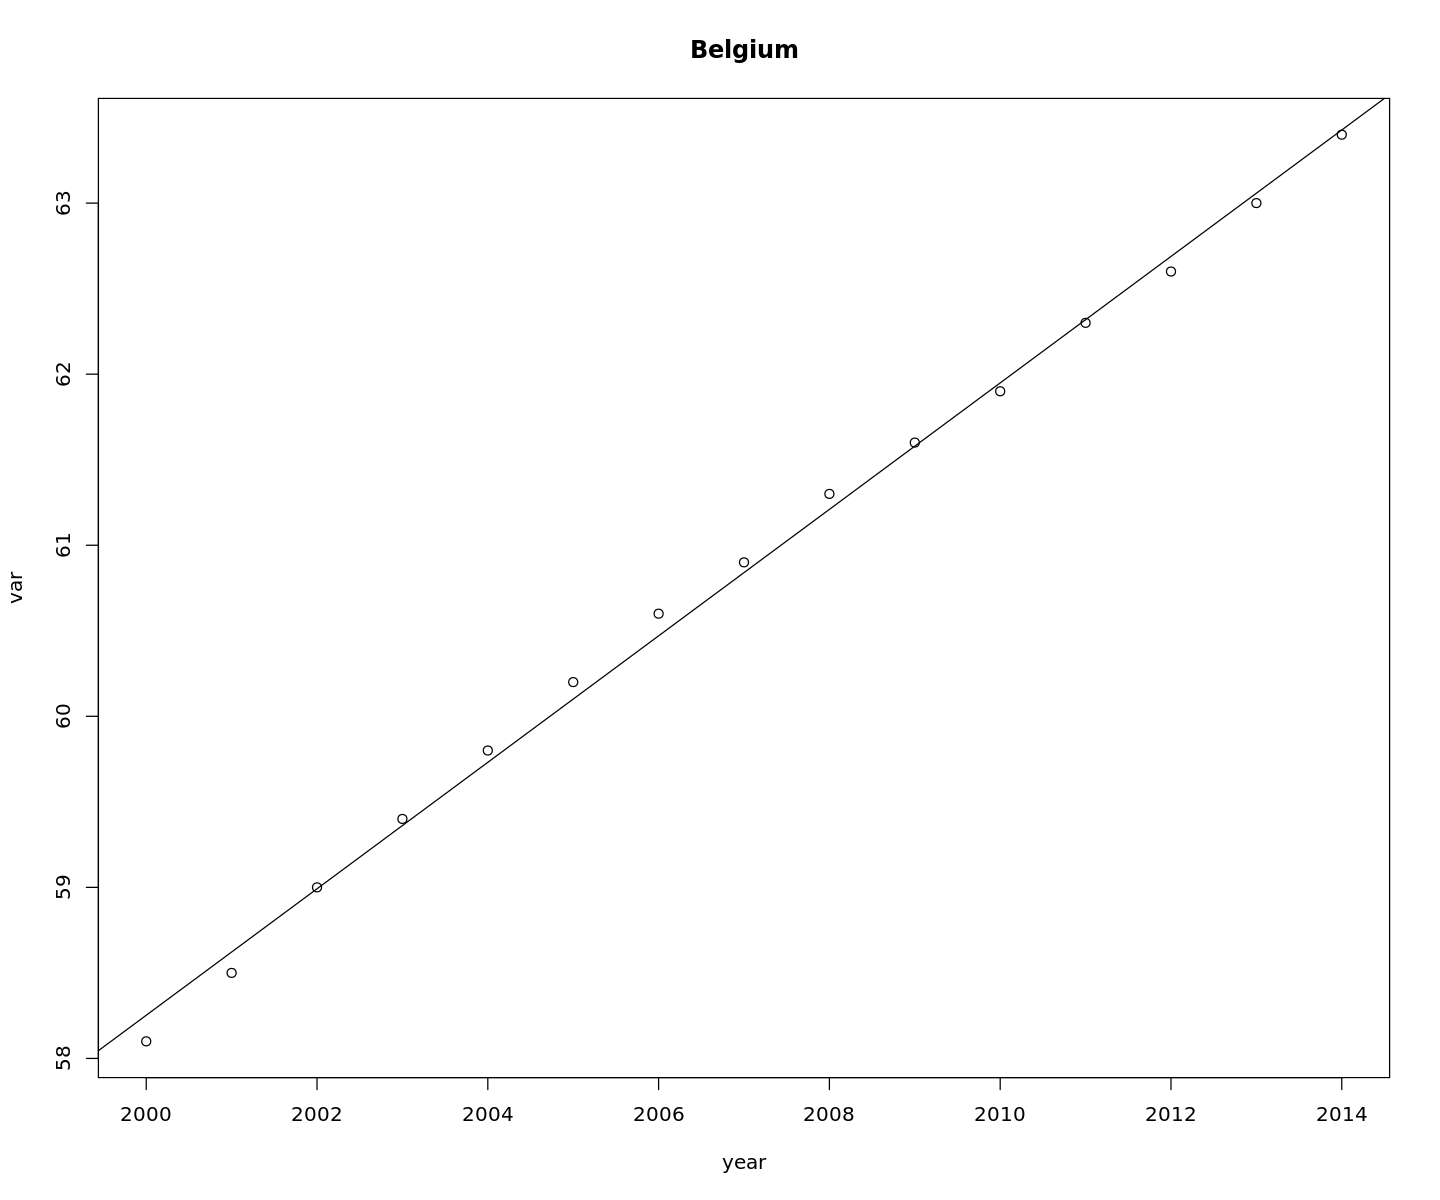

[1] "Benin"


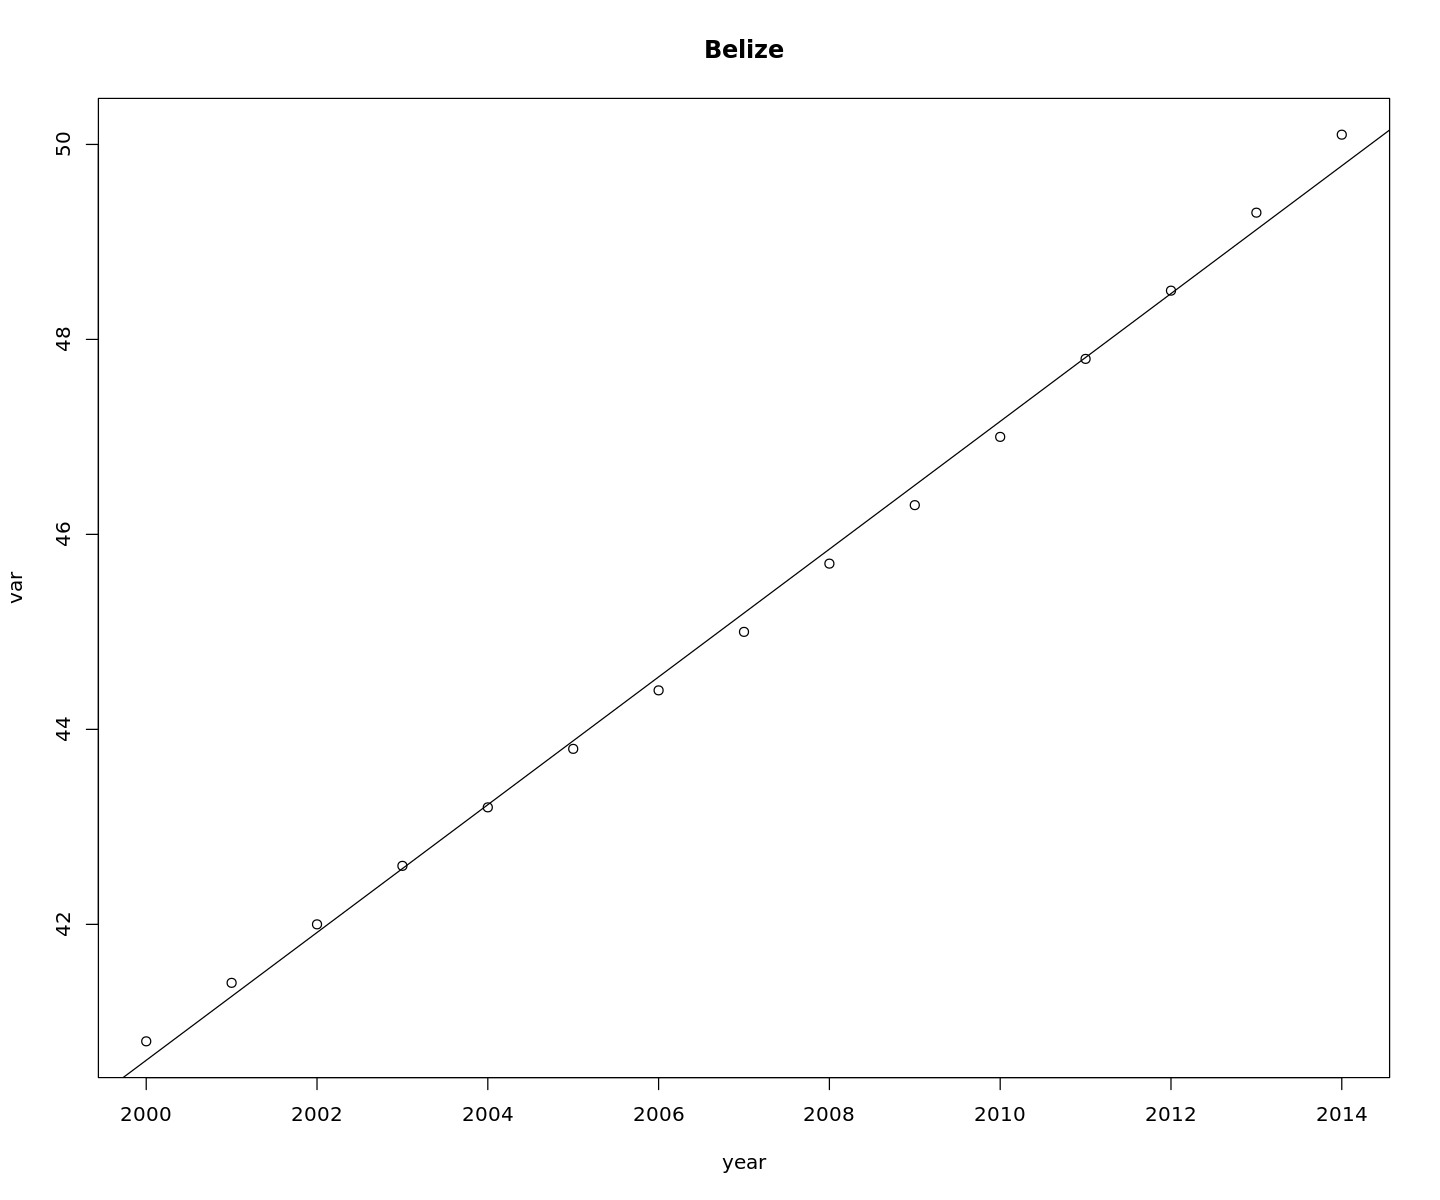

[1] "Bhutan"


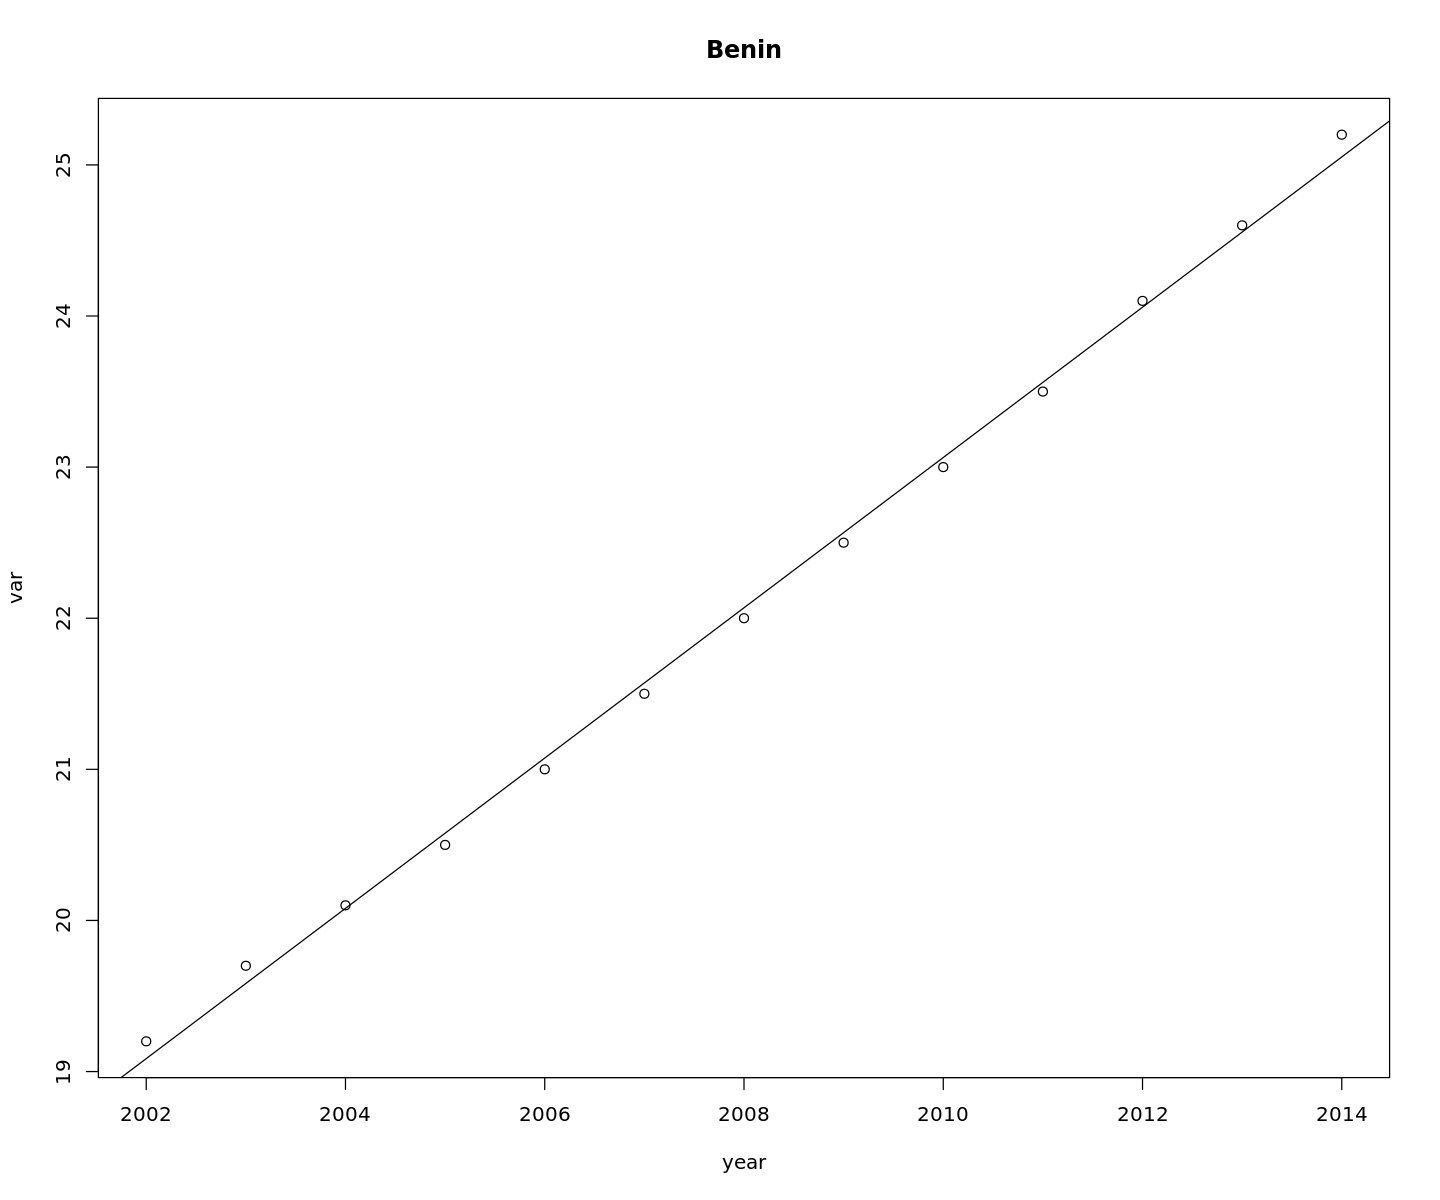

[1] "Bosnia and Herzegovina"


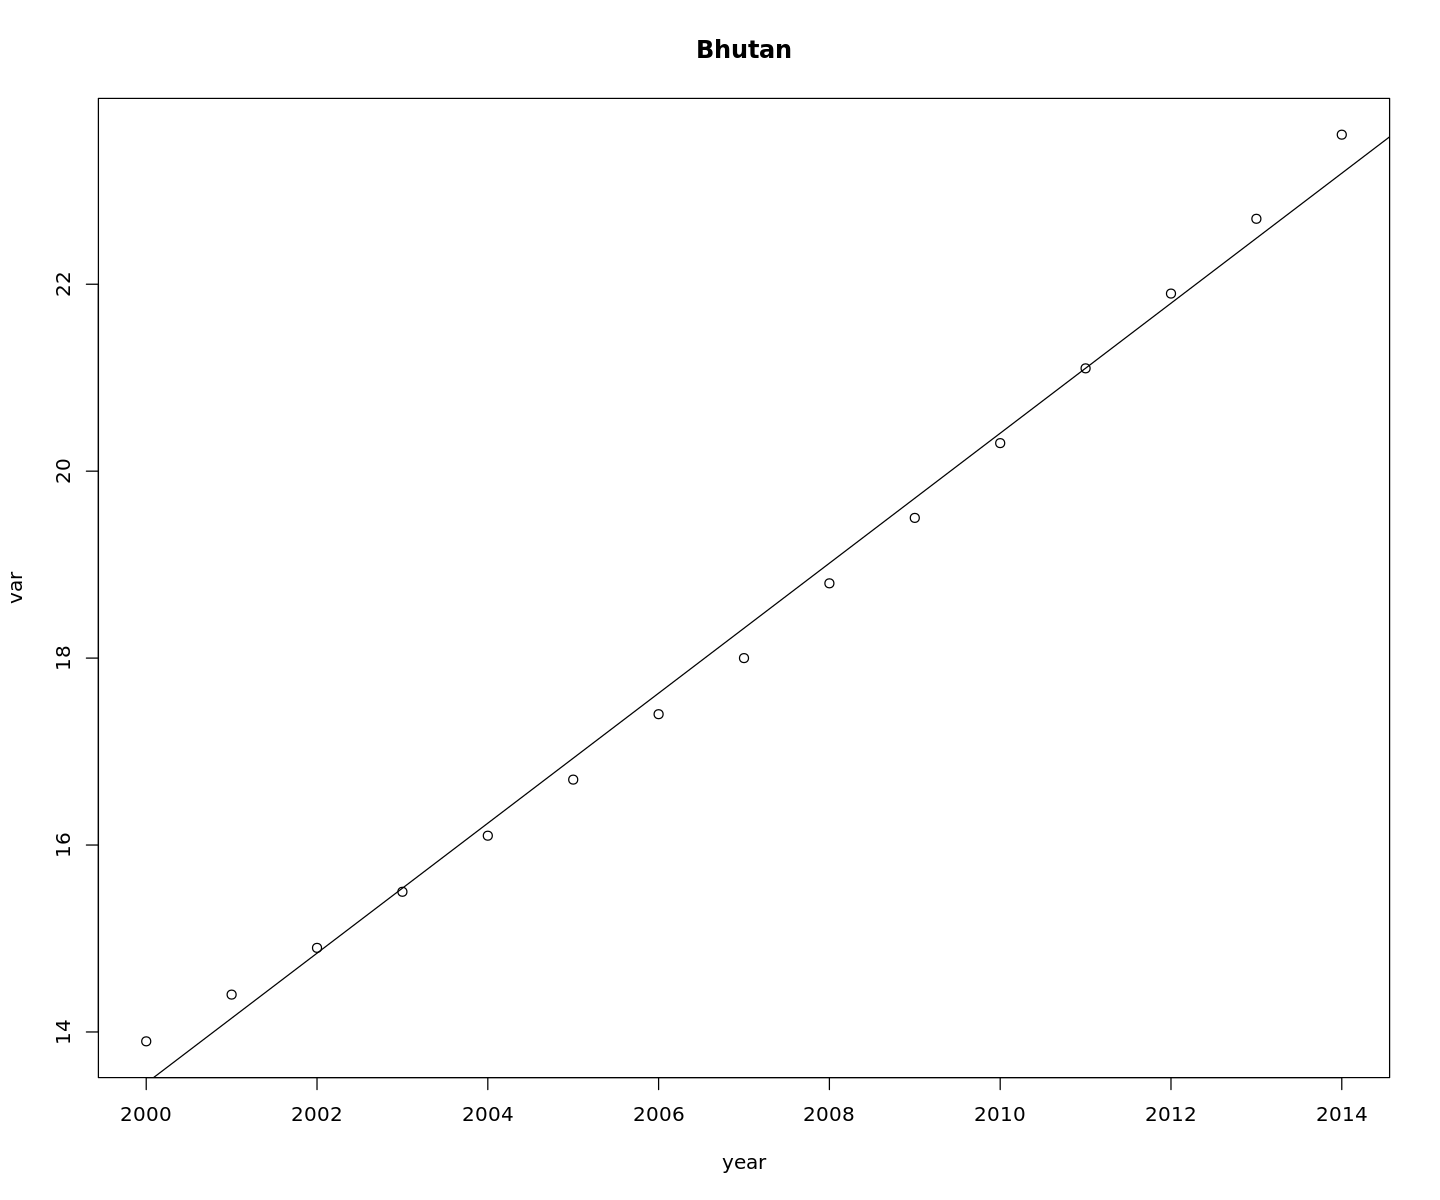

[1] "Botswana"


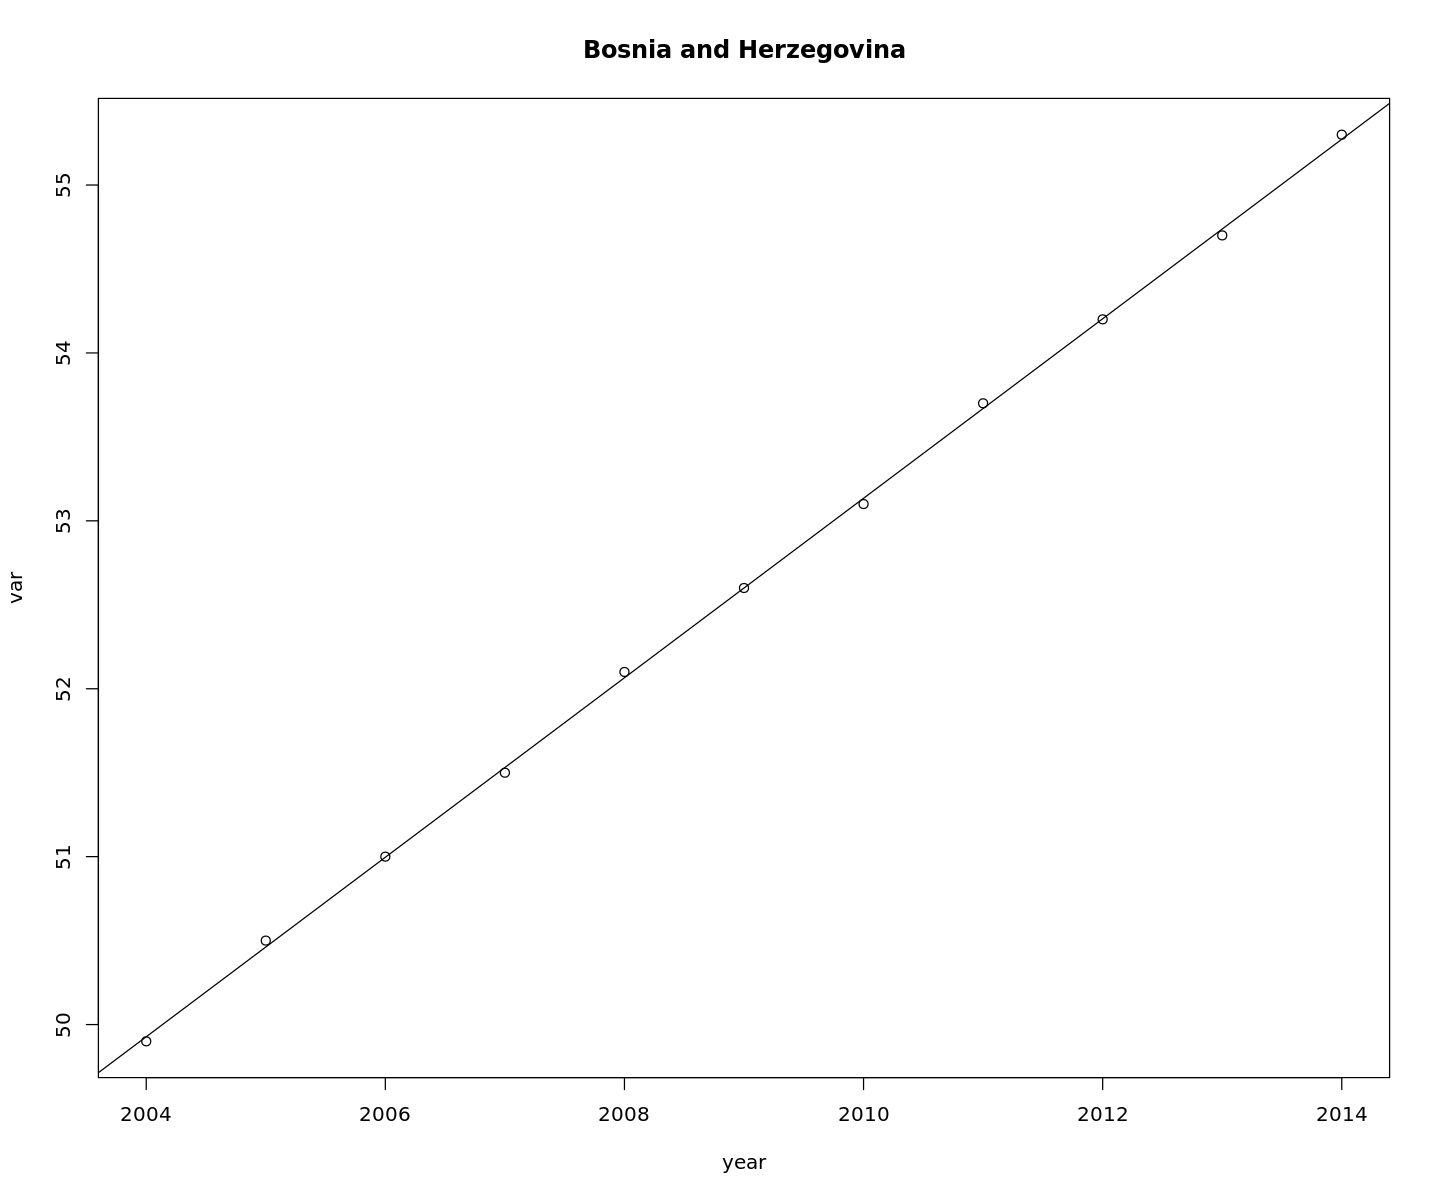

[1] "Brazil"


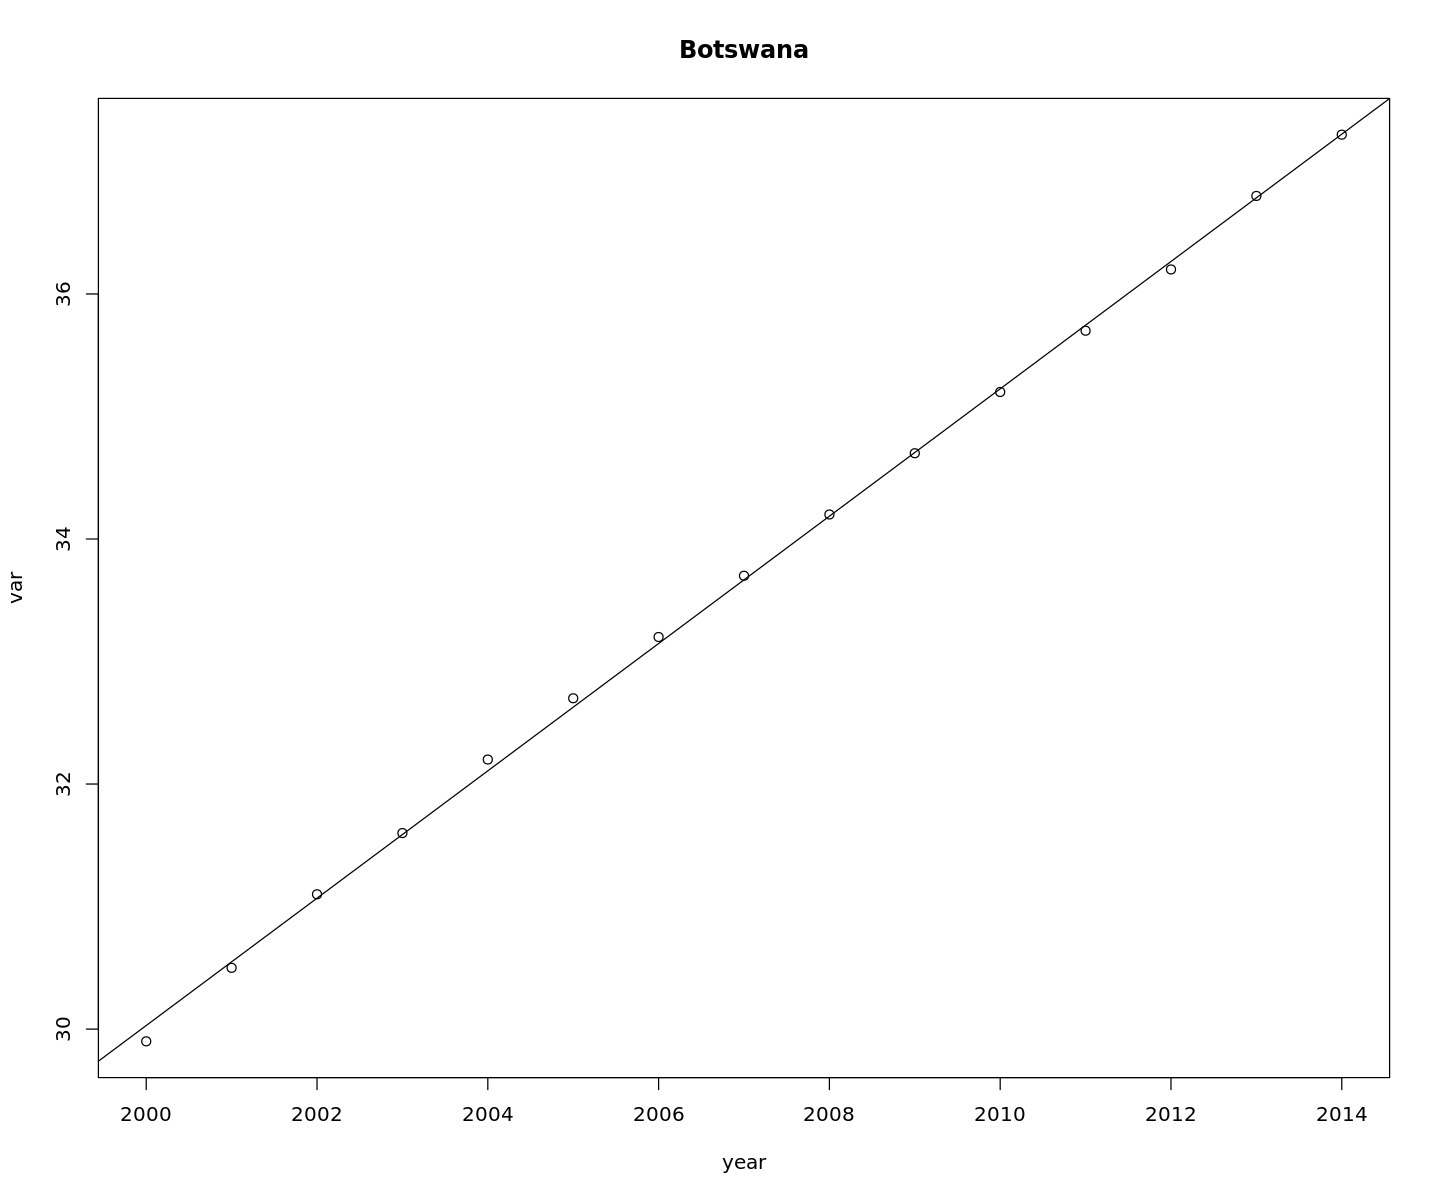

[1] "Bulgaria"


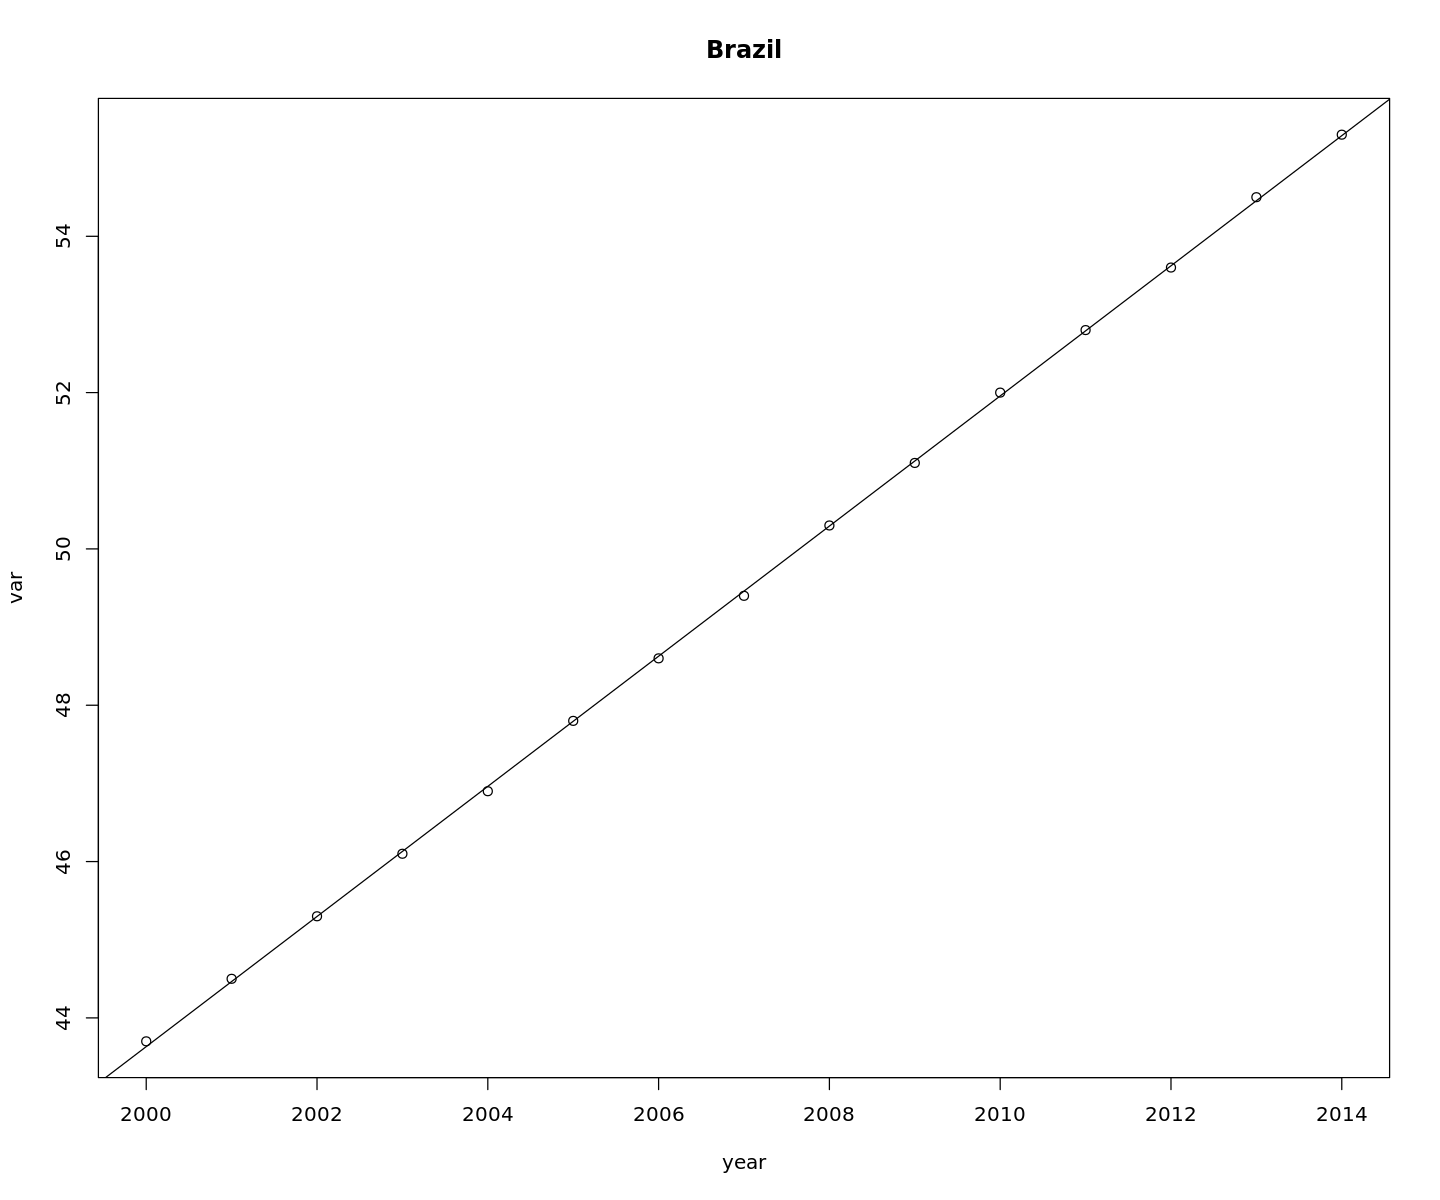

[1] "Burkina Faso"


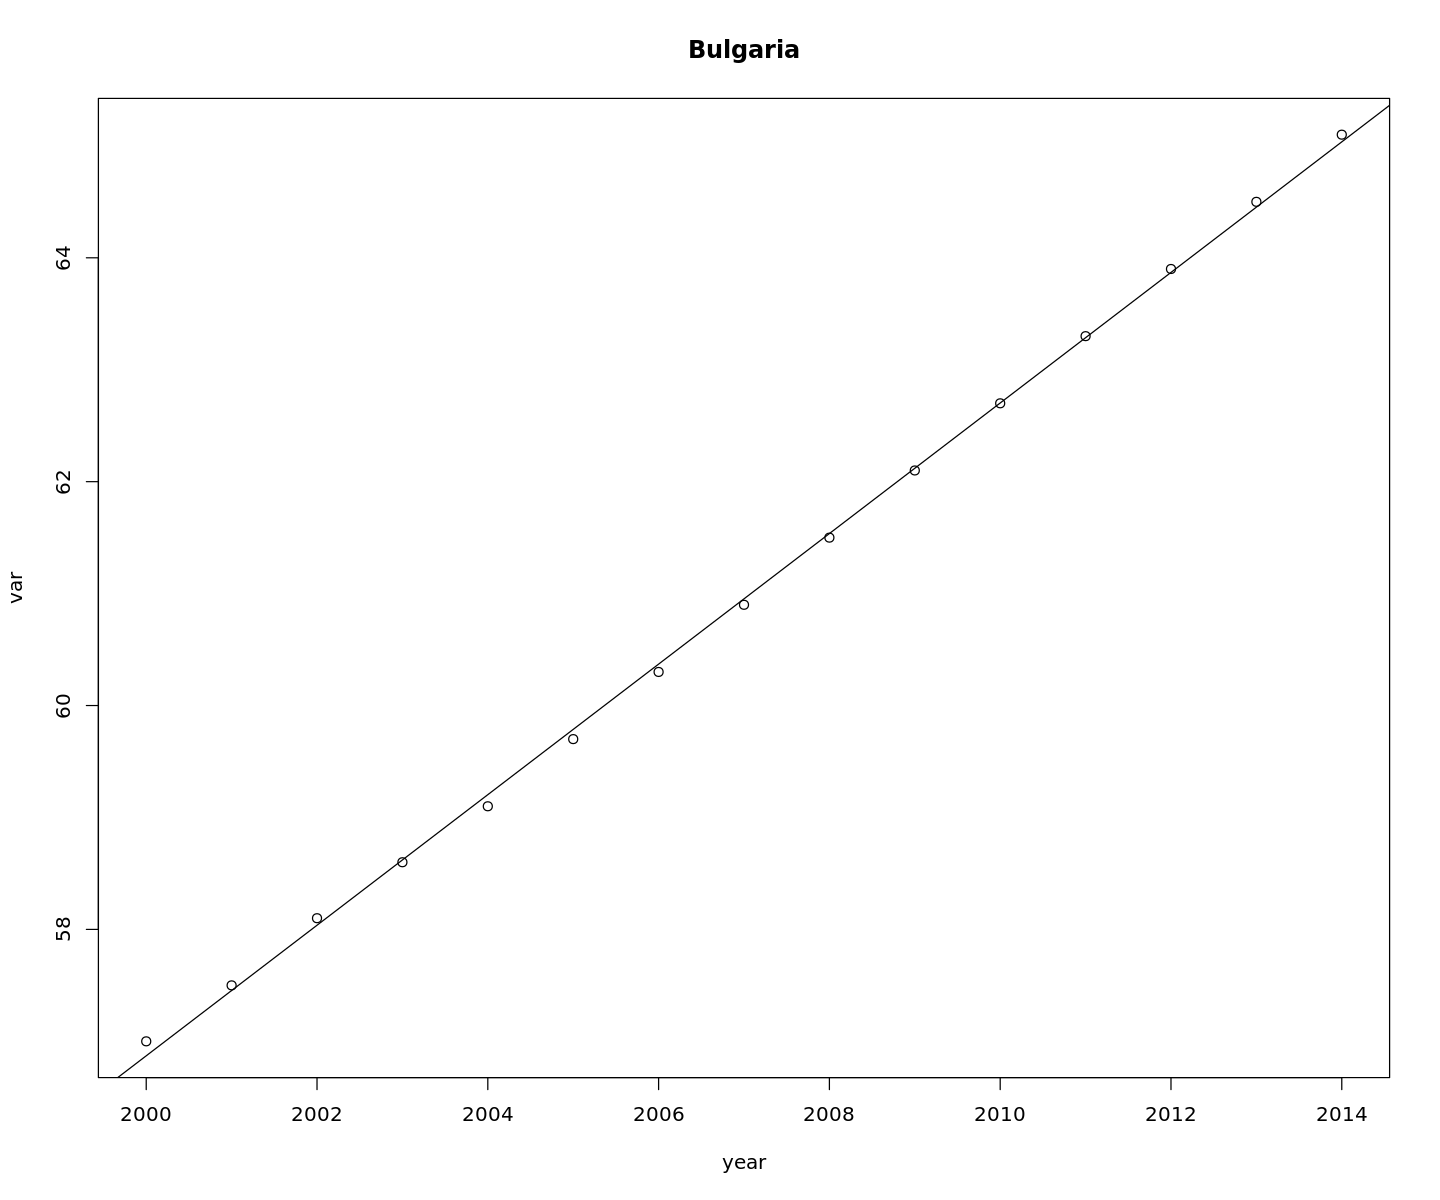

[1] "Burundi"


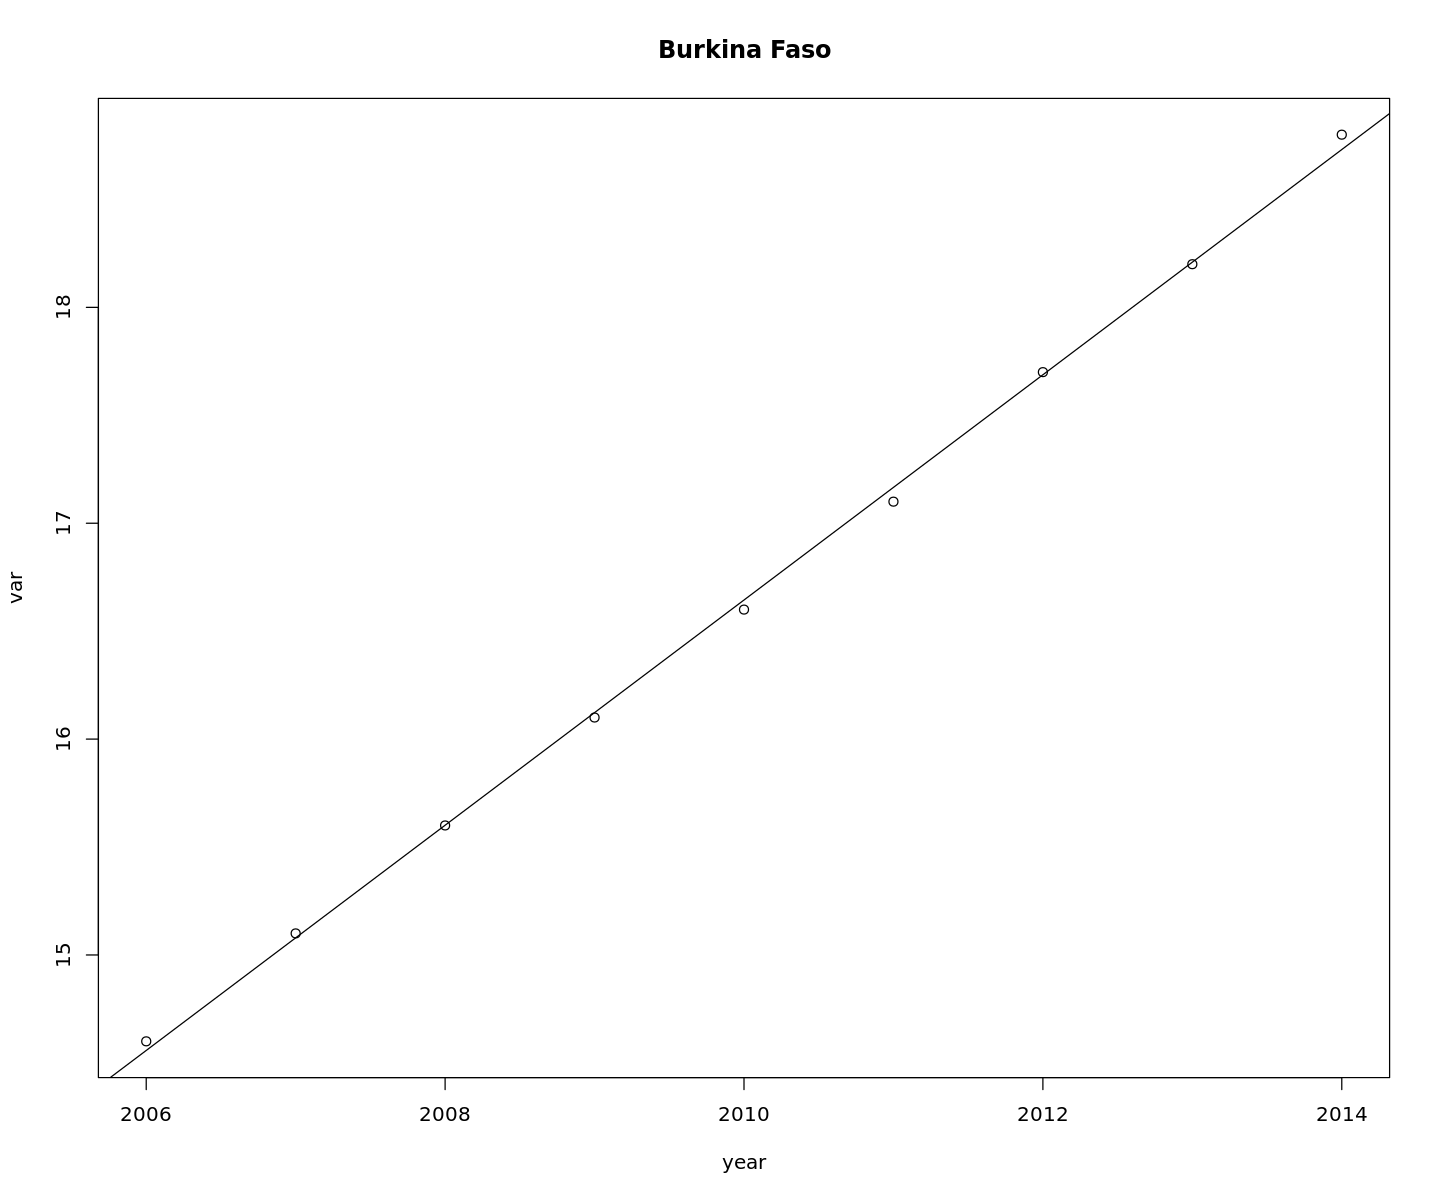

[1] "Cabo Verde"


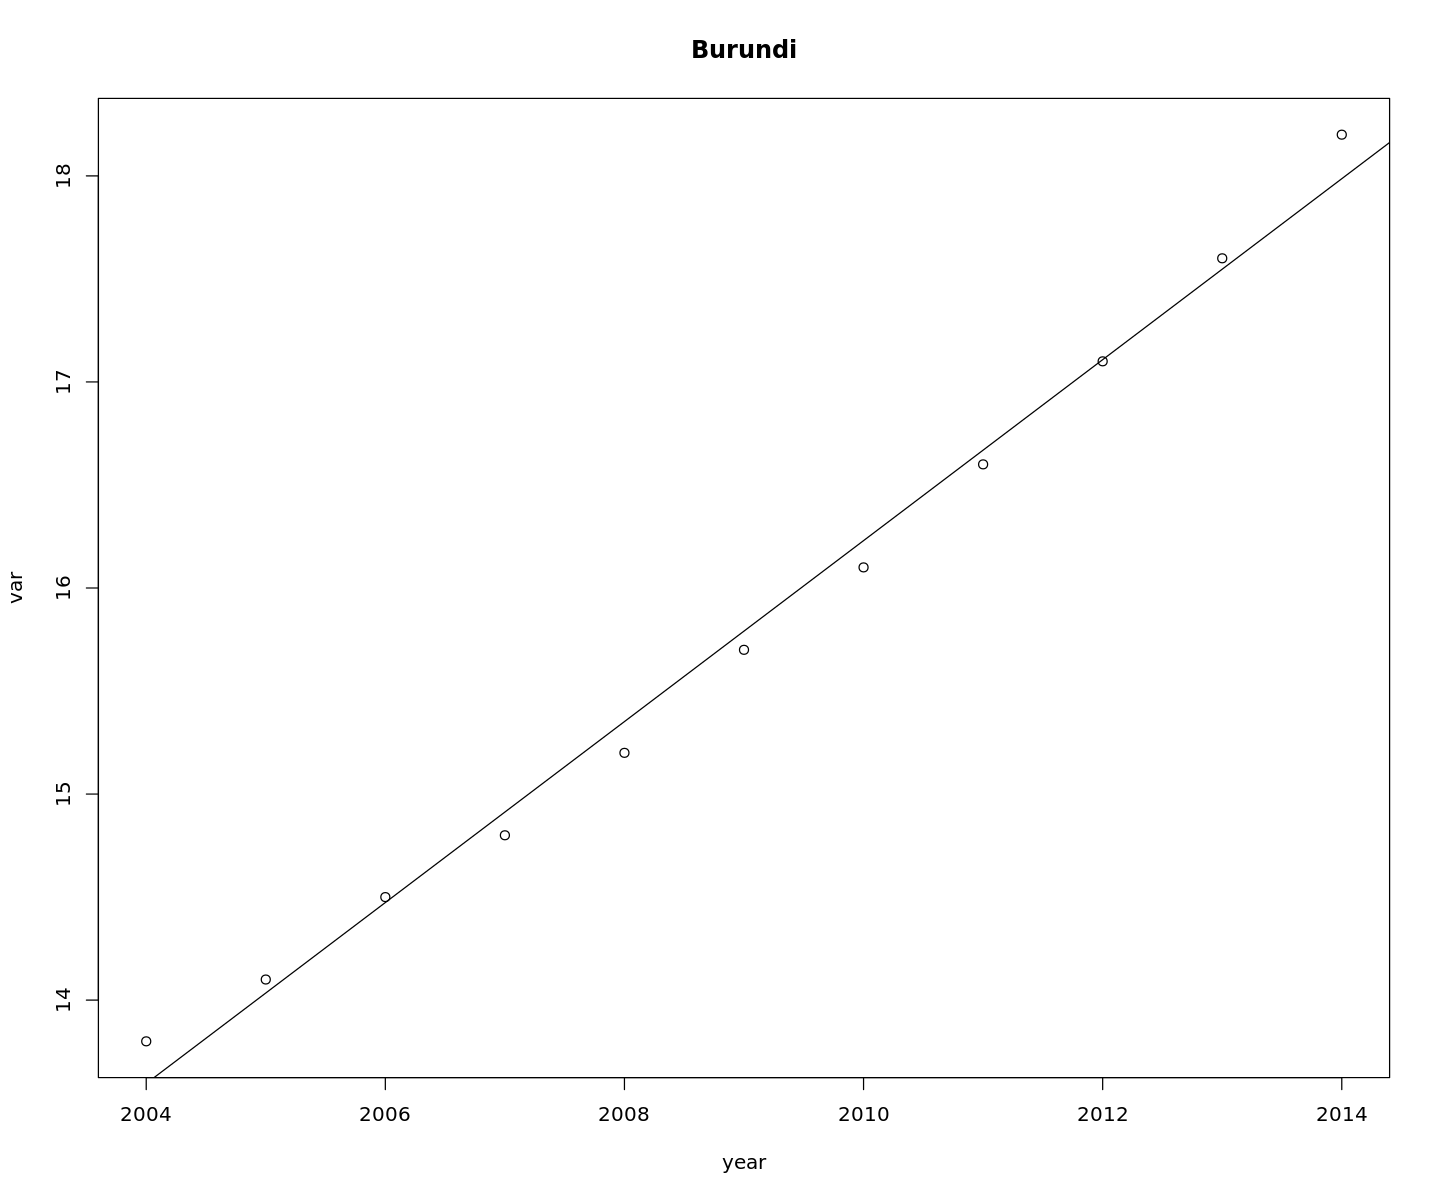

[1] "Cambodia"


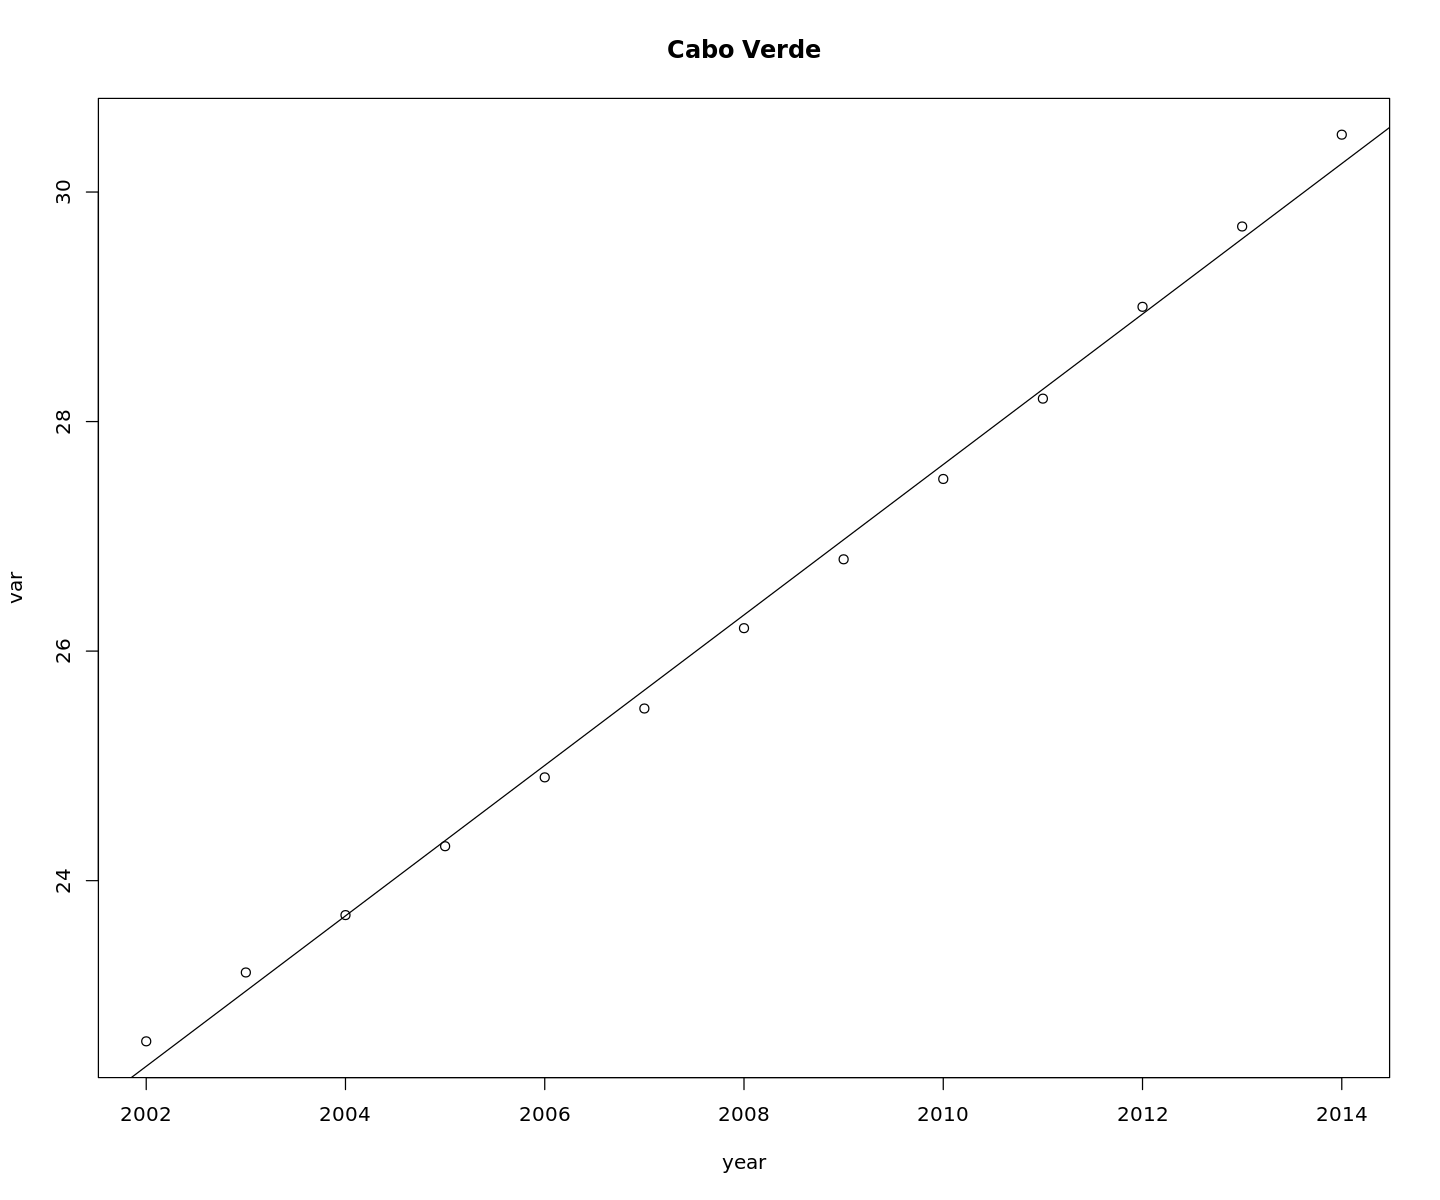

[1] "Cameroon"


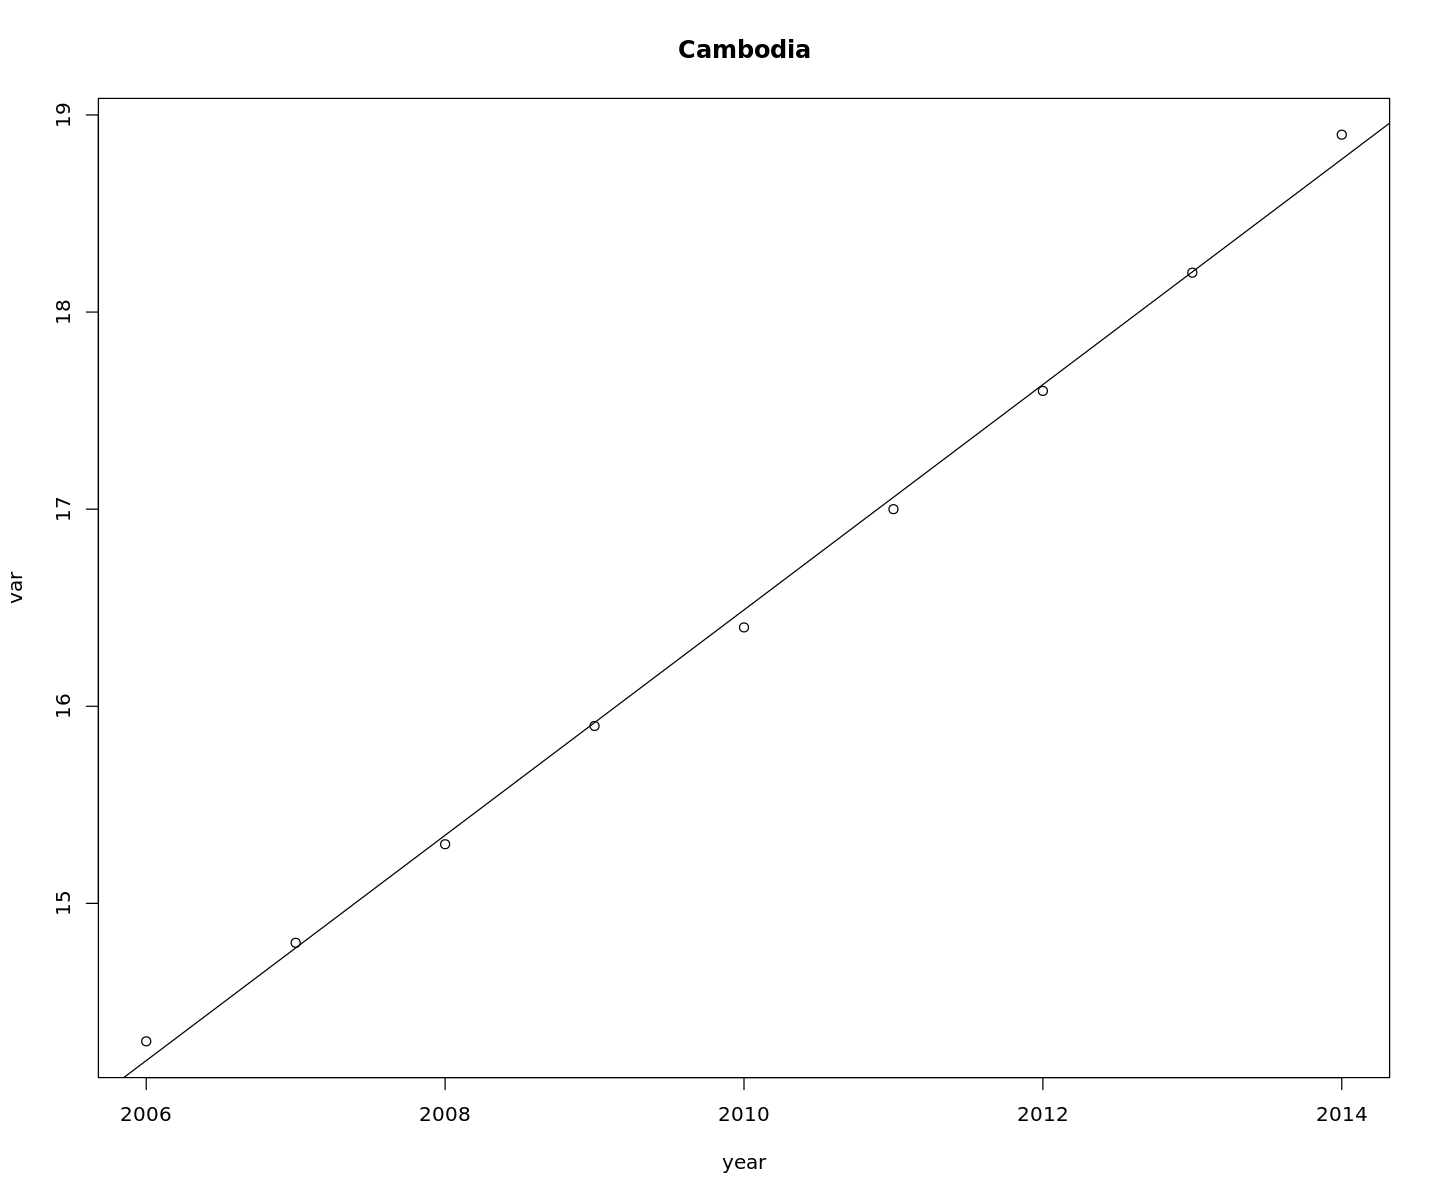

[1] "Canada"


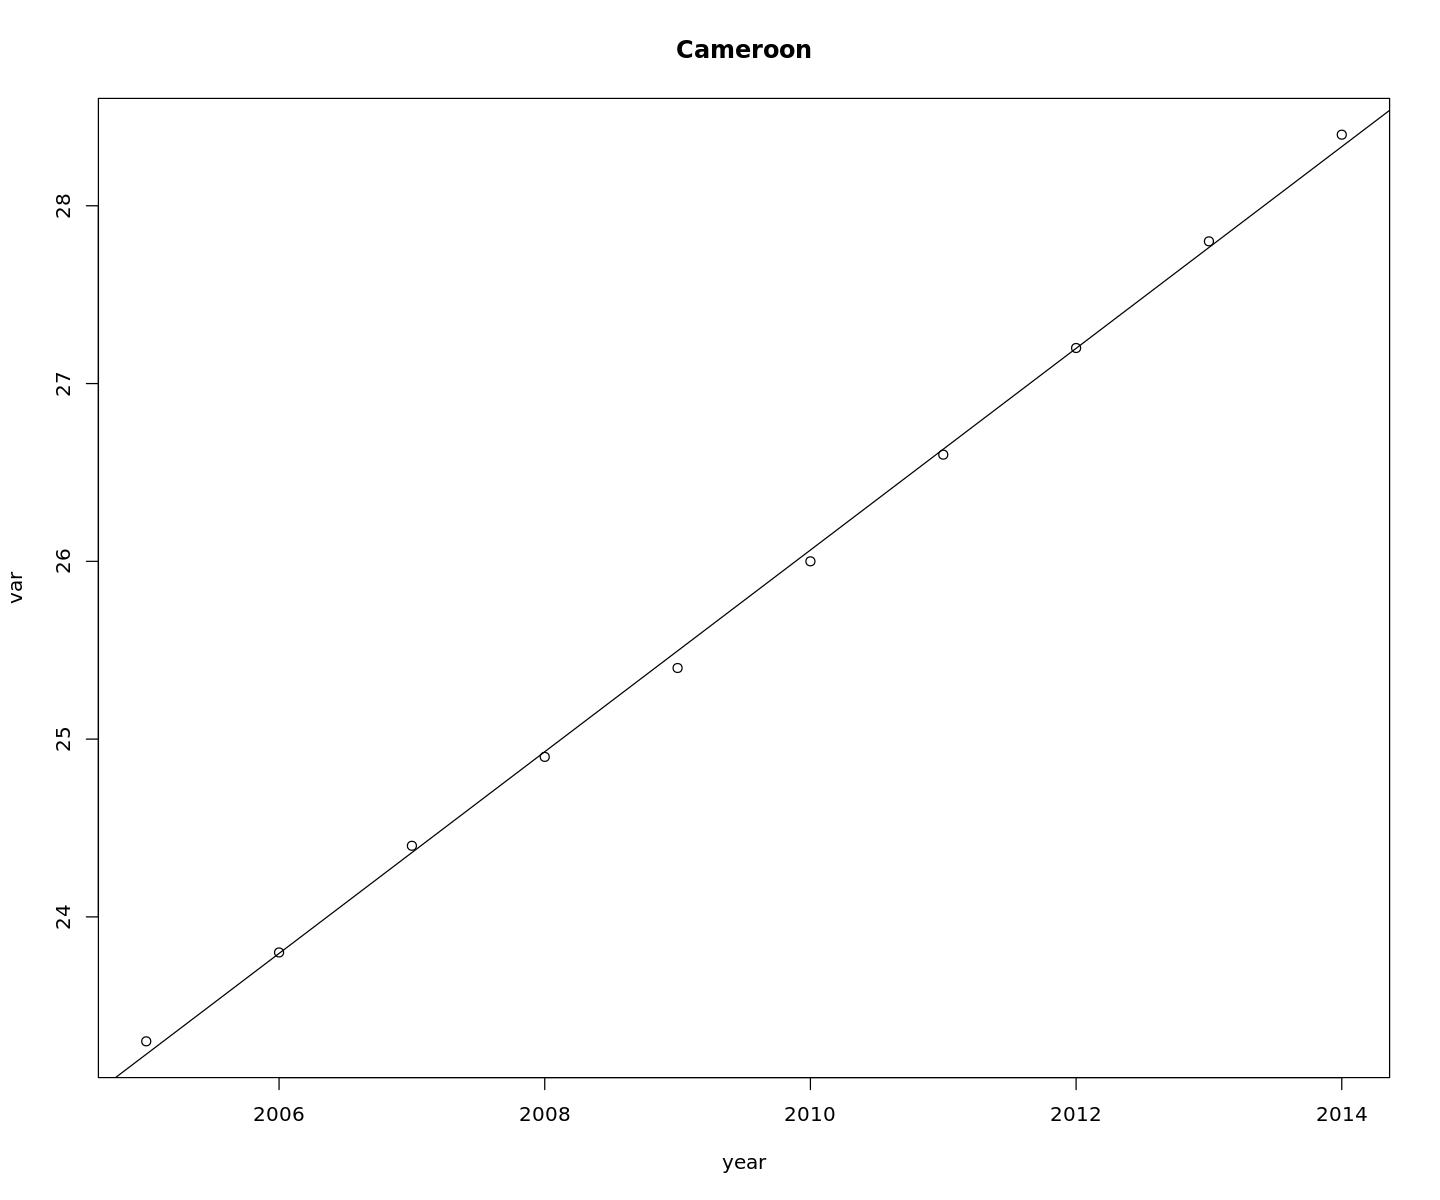

[1] "Central African Republic"


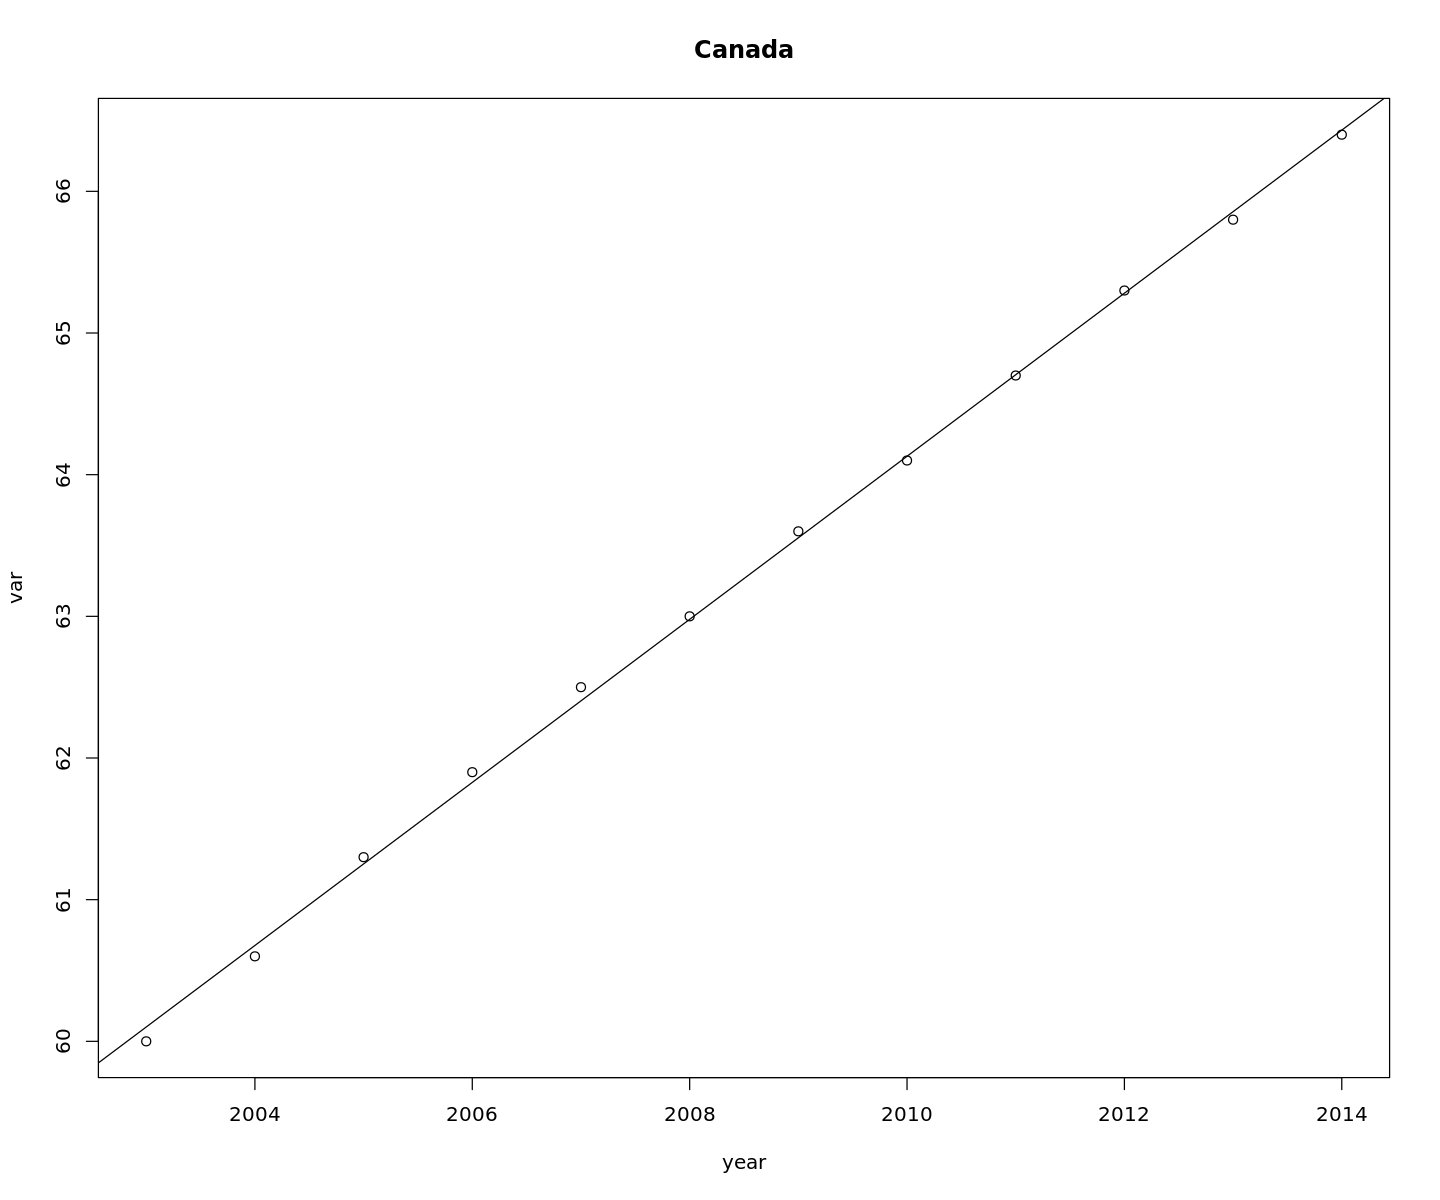

[1] "Chad"


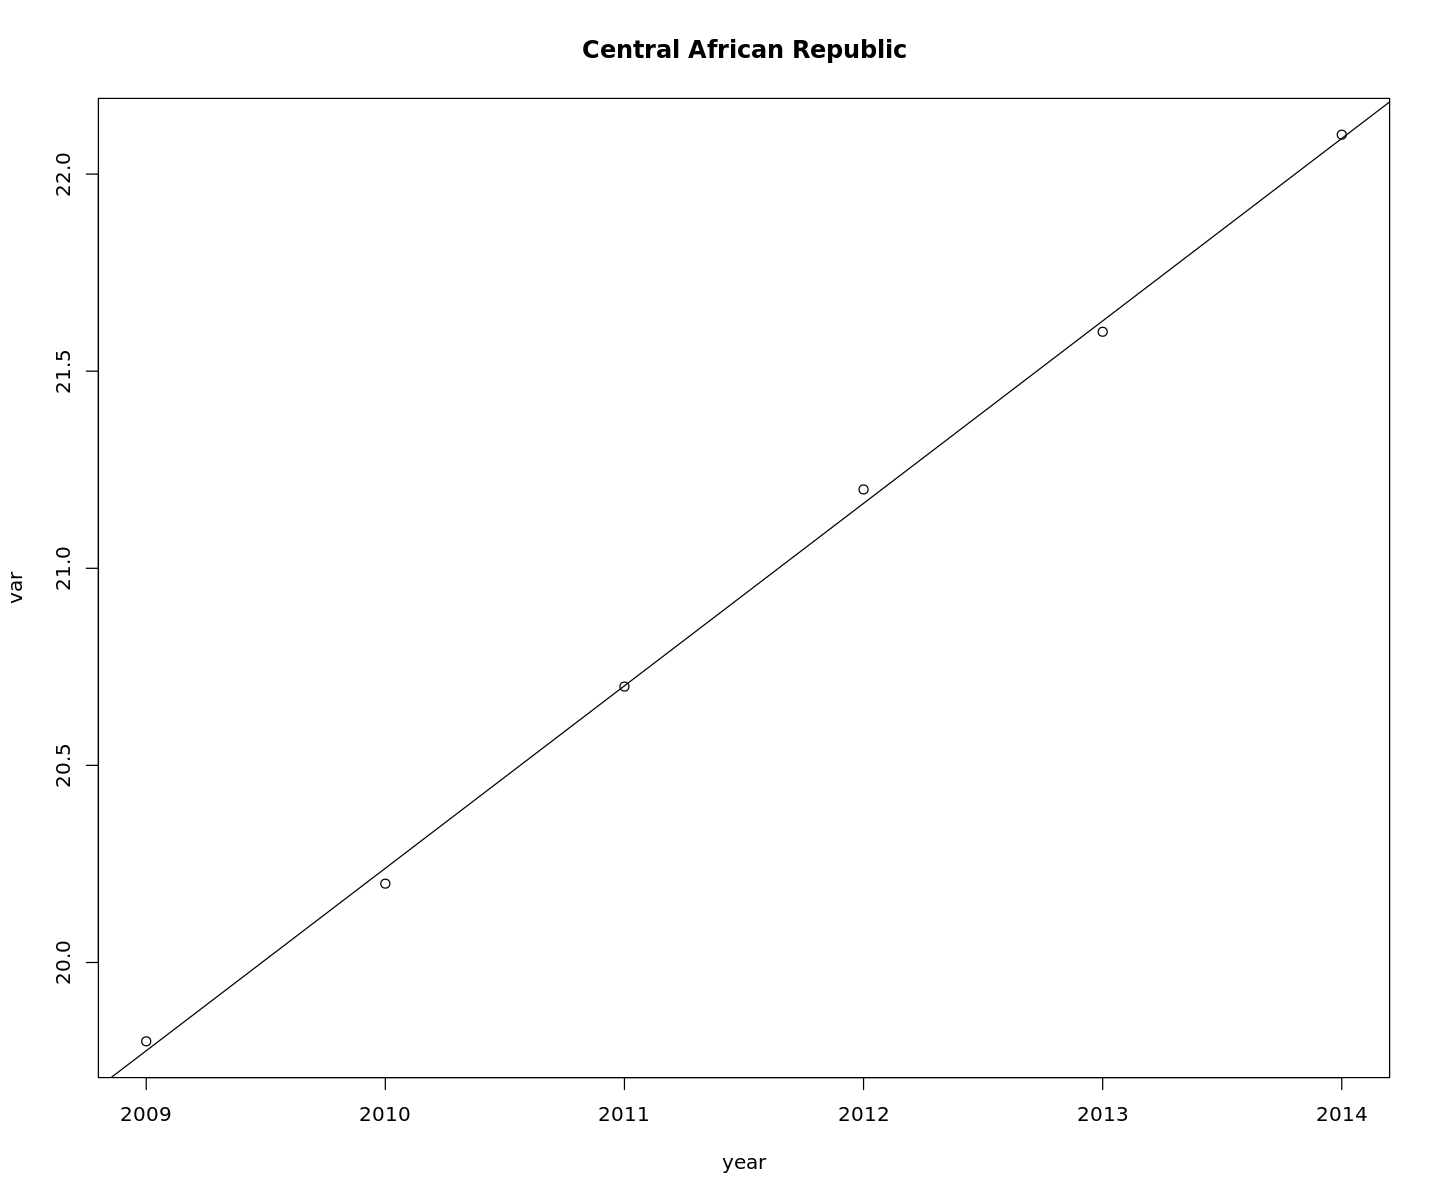

[1] "Chile"


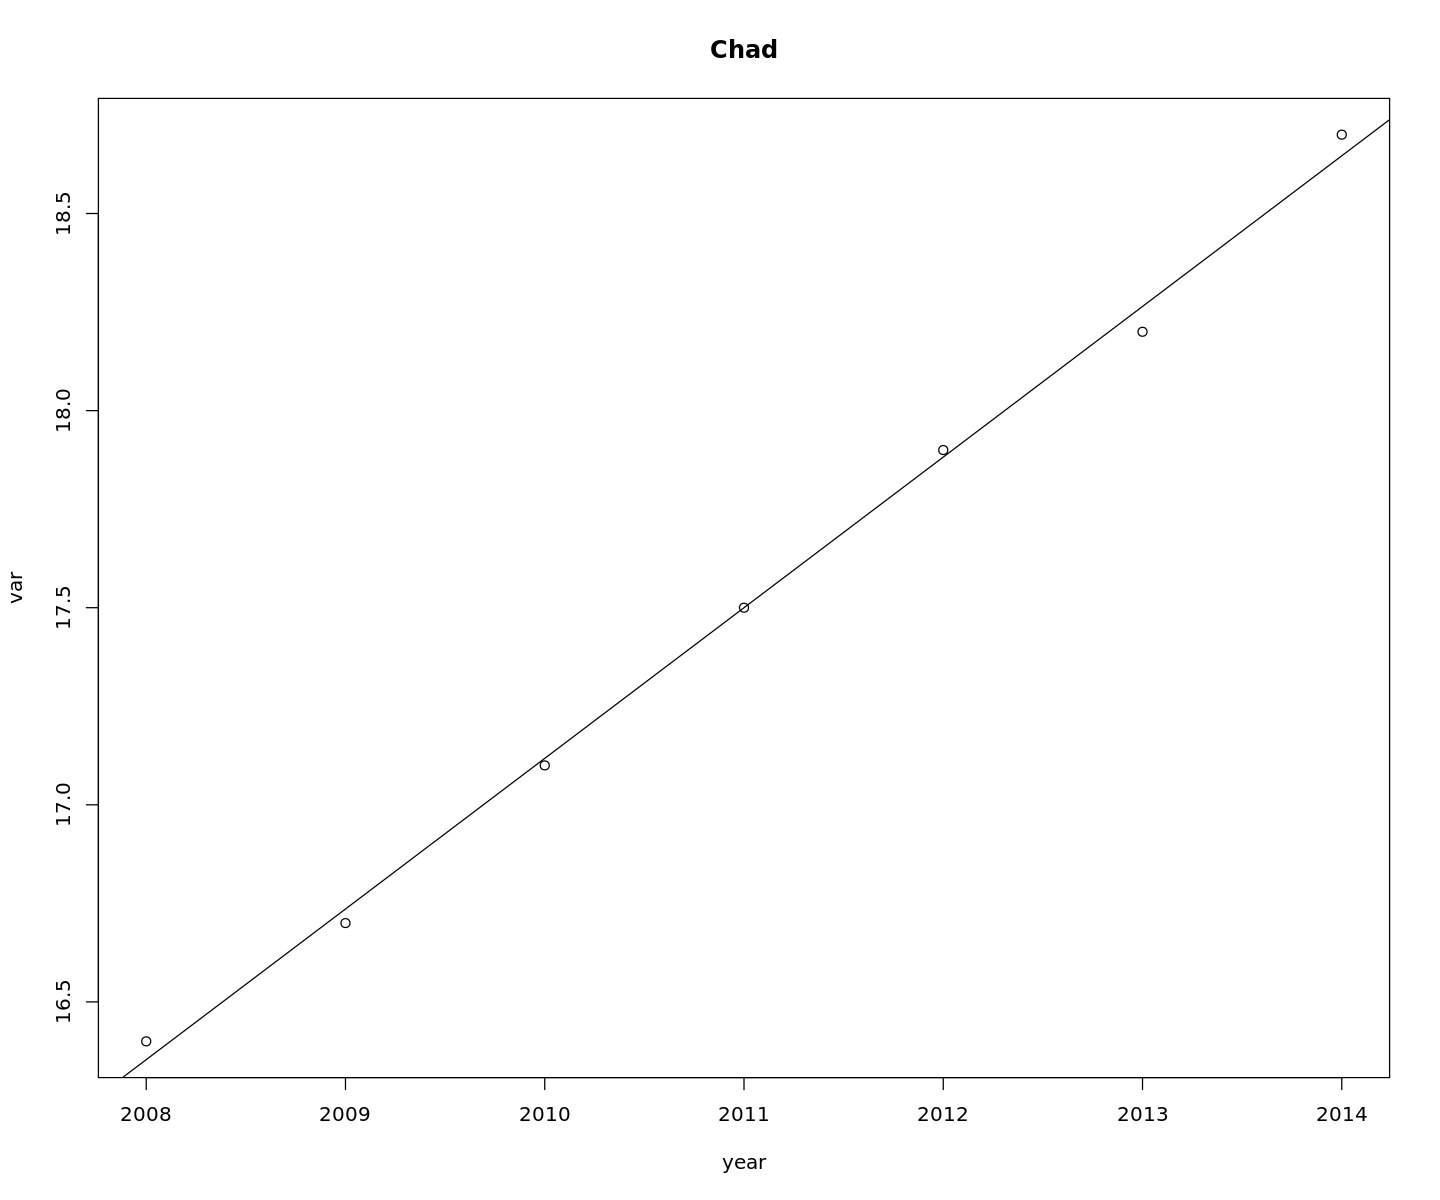

[1] "China"


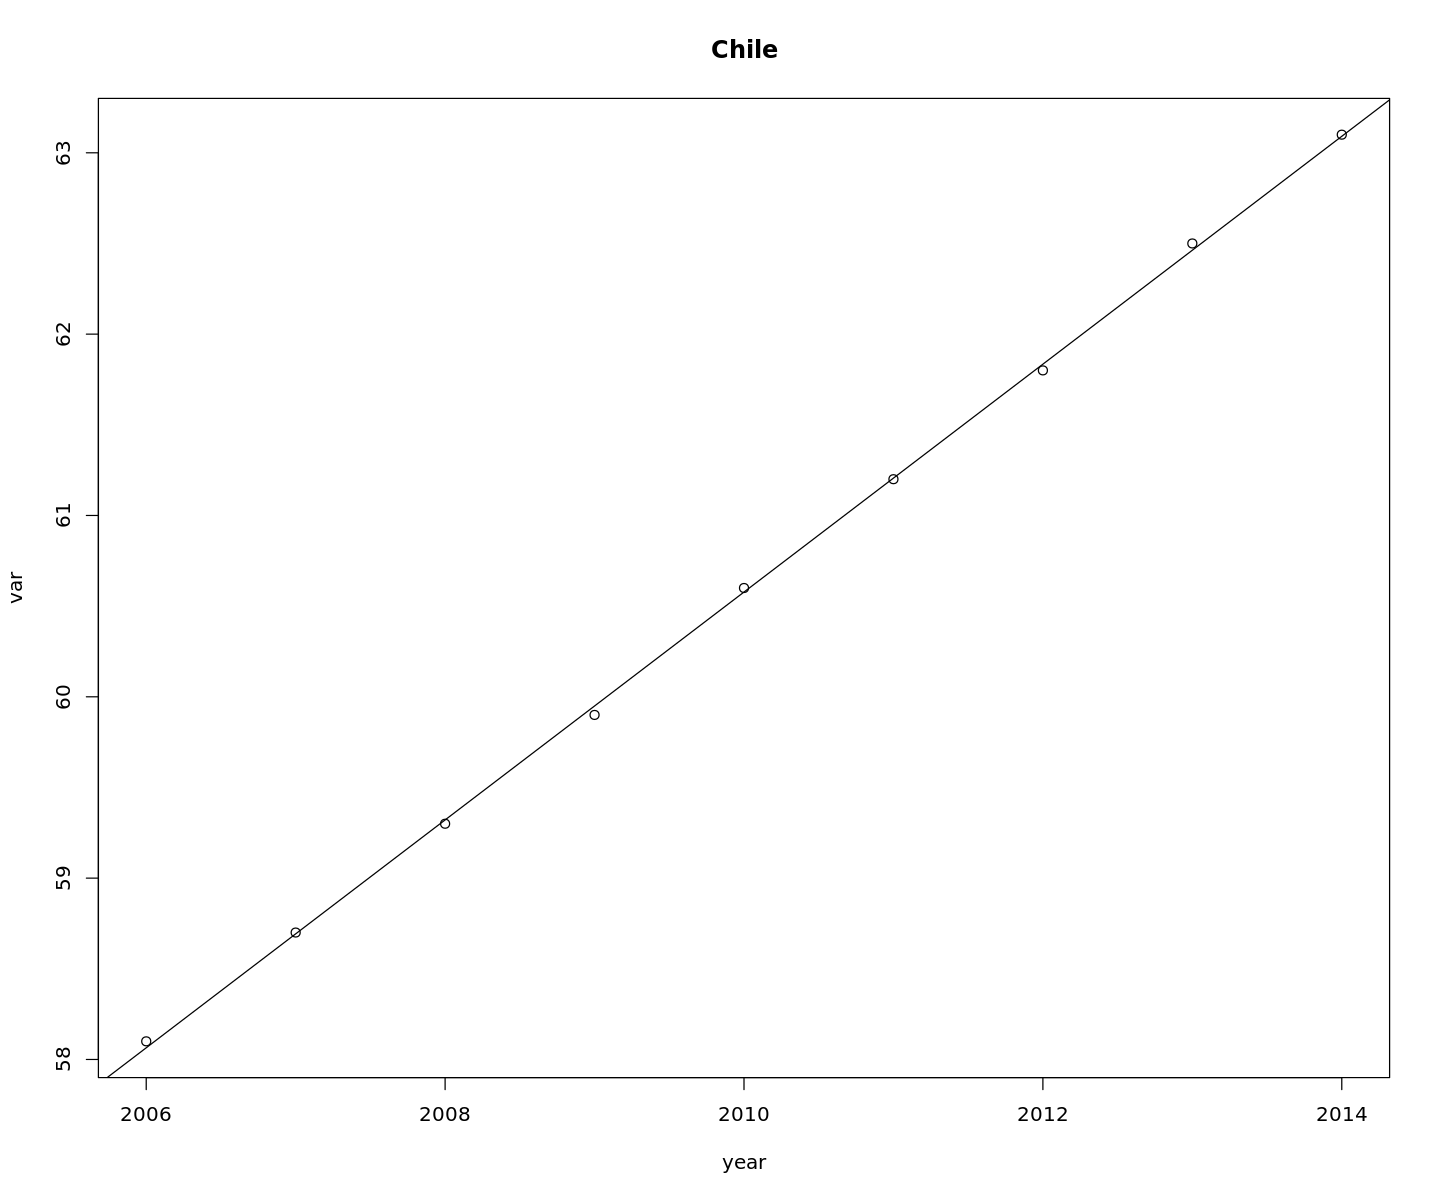

[1] "Colombia"


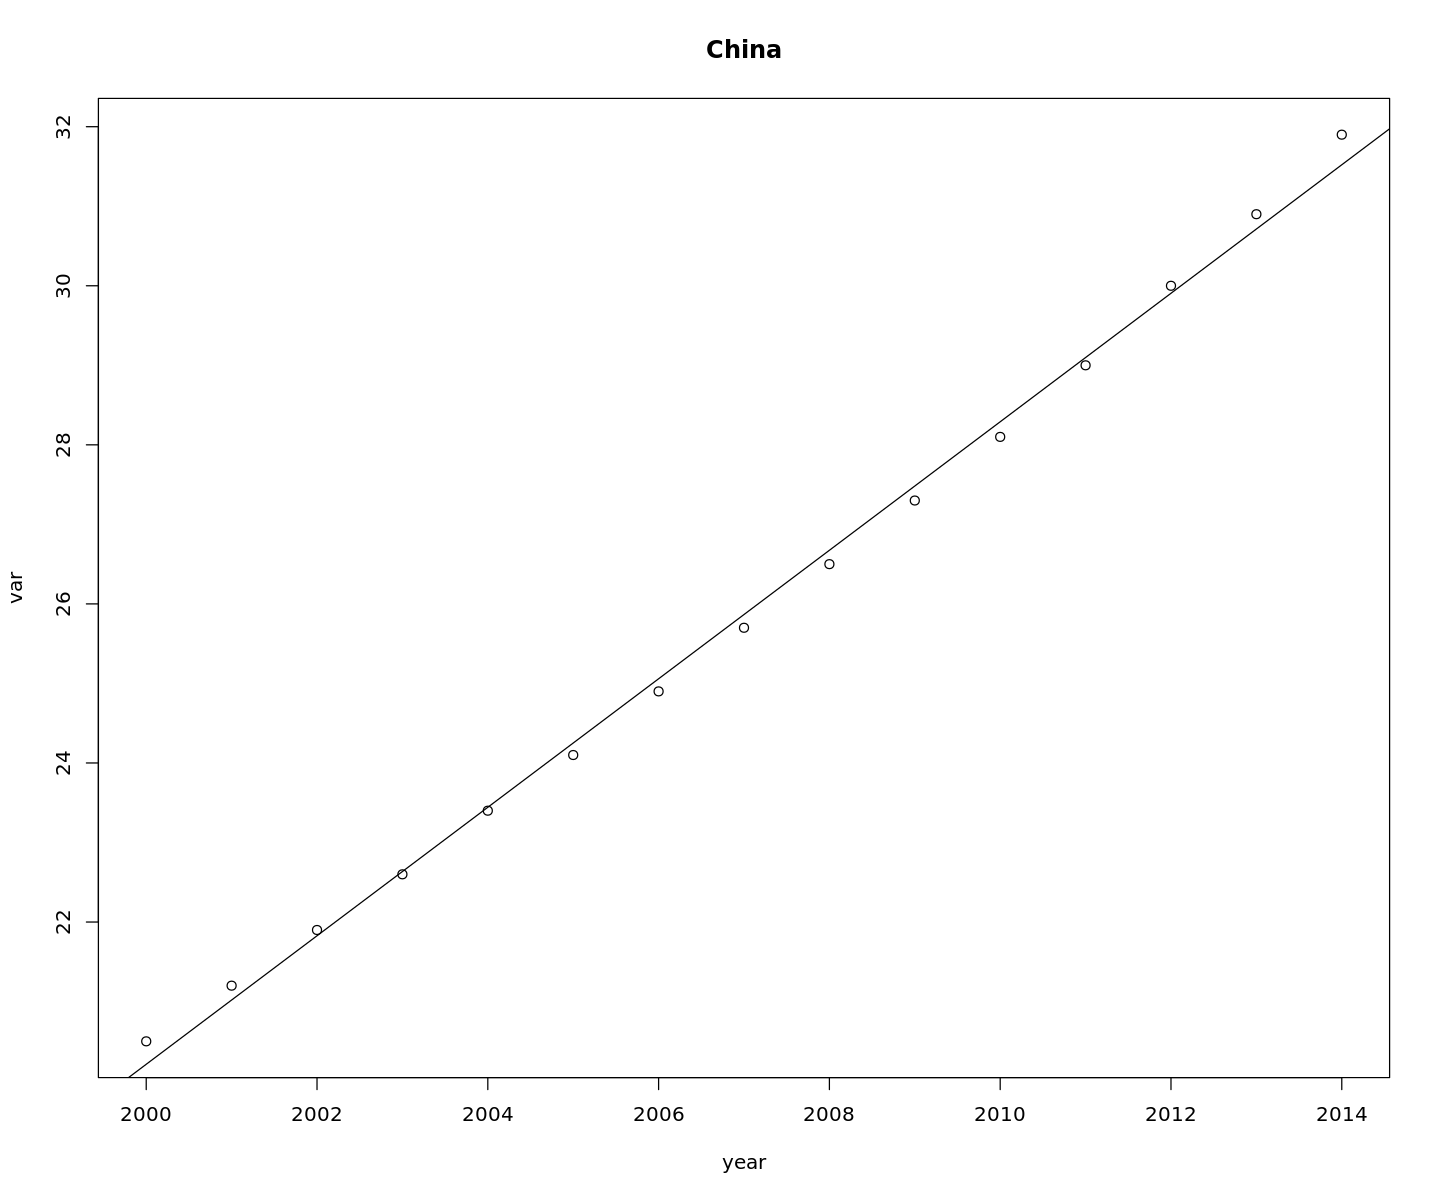

[1] "Comoros"


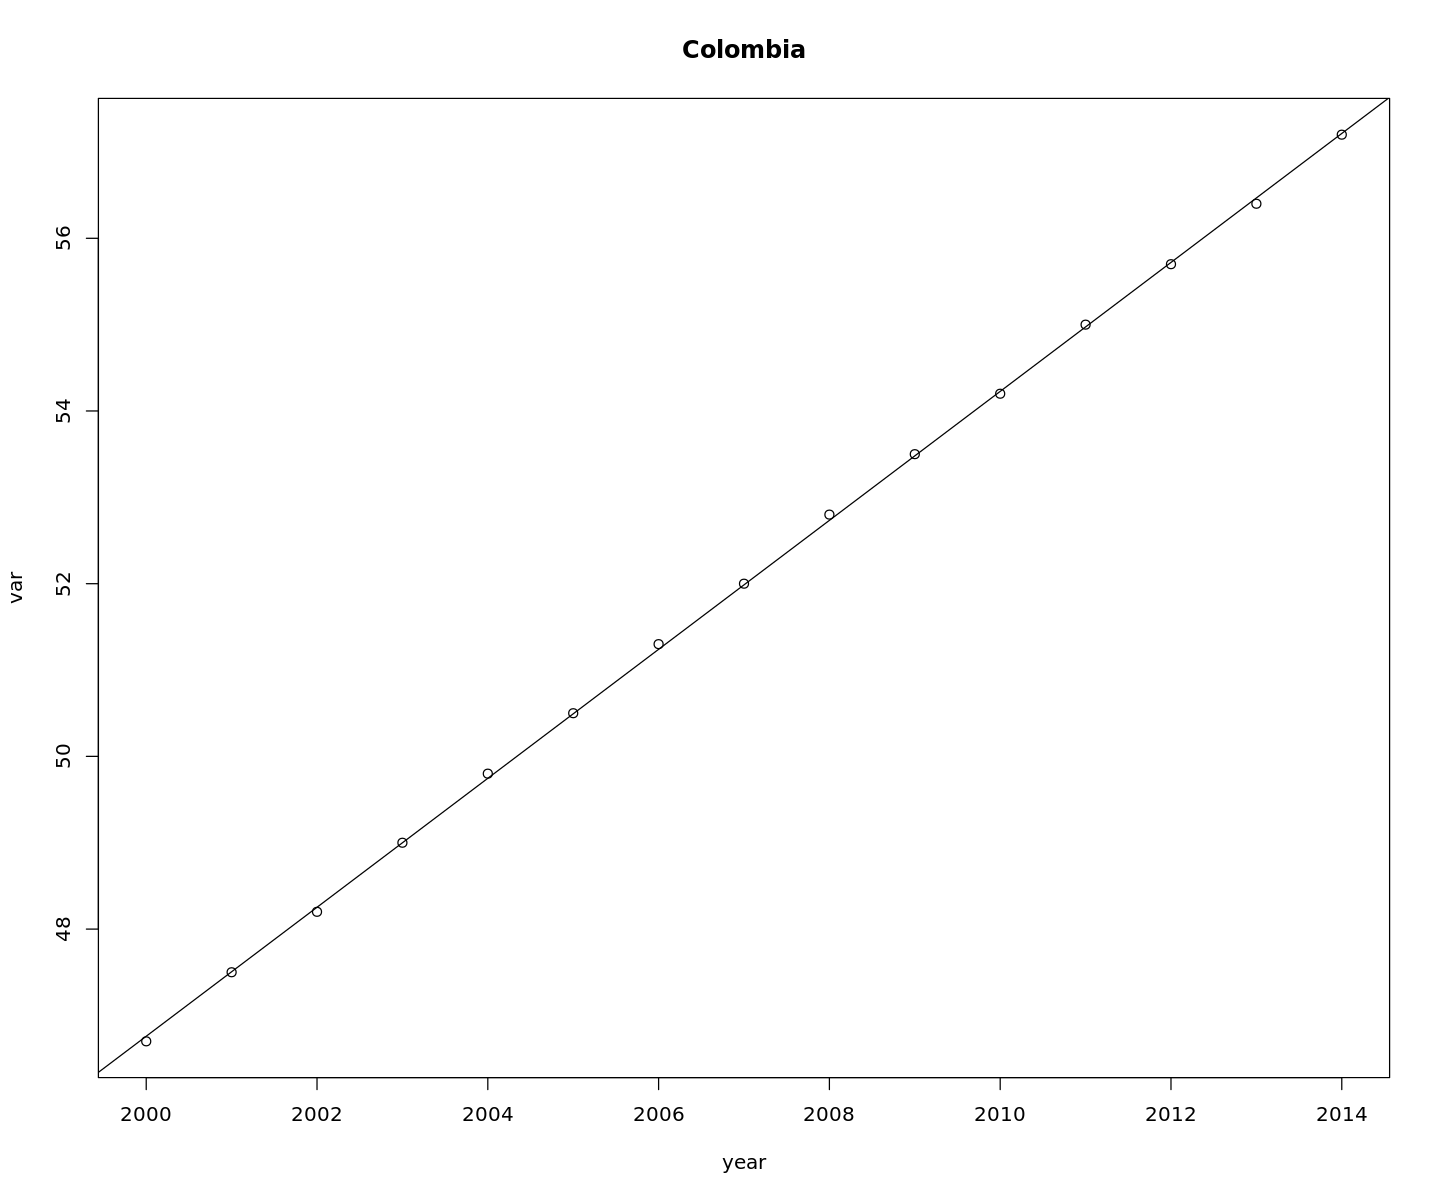

[1] "Costa Rica"


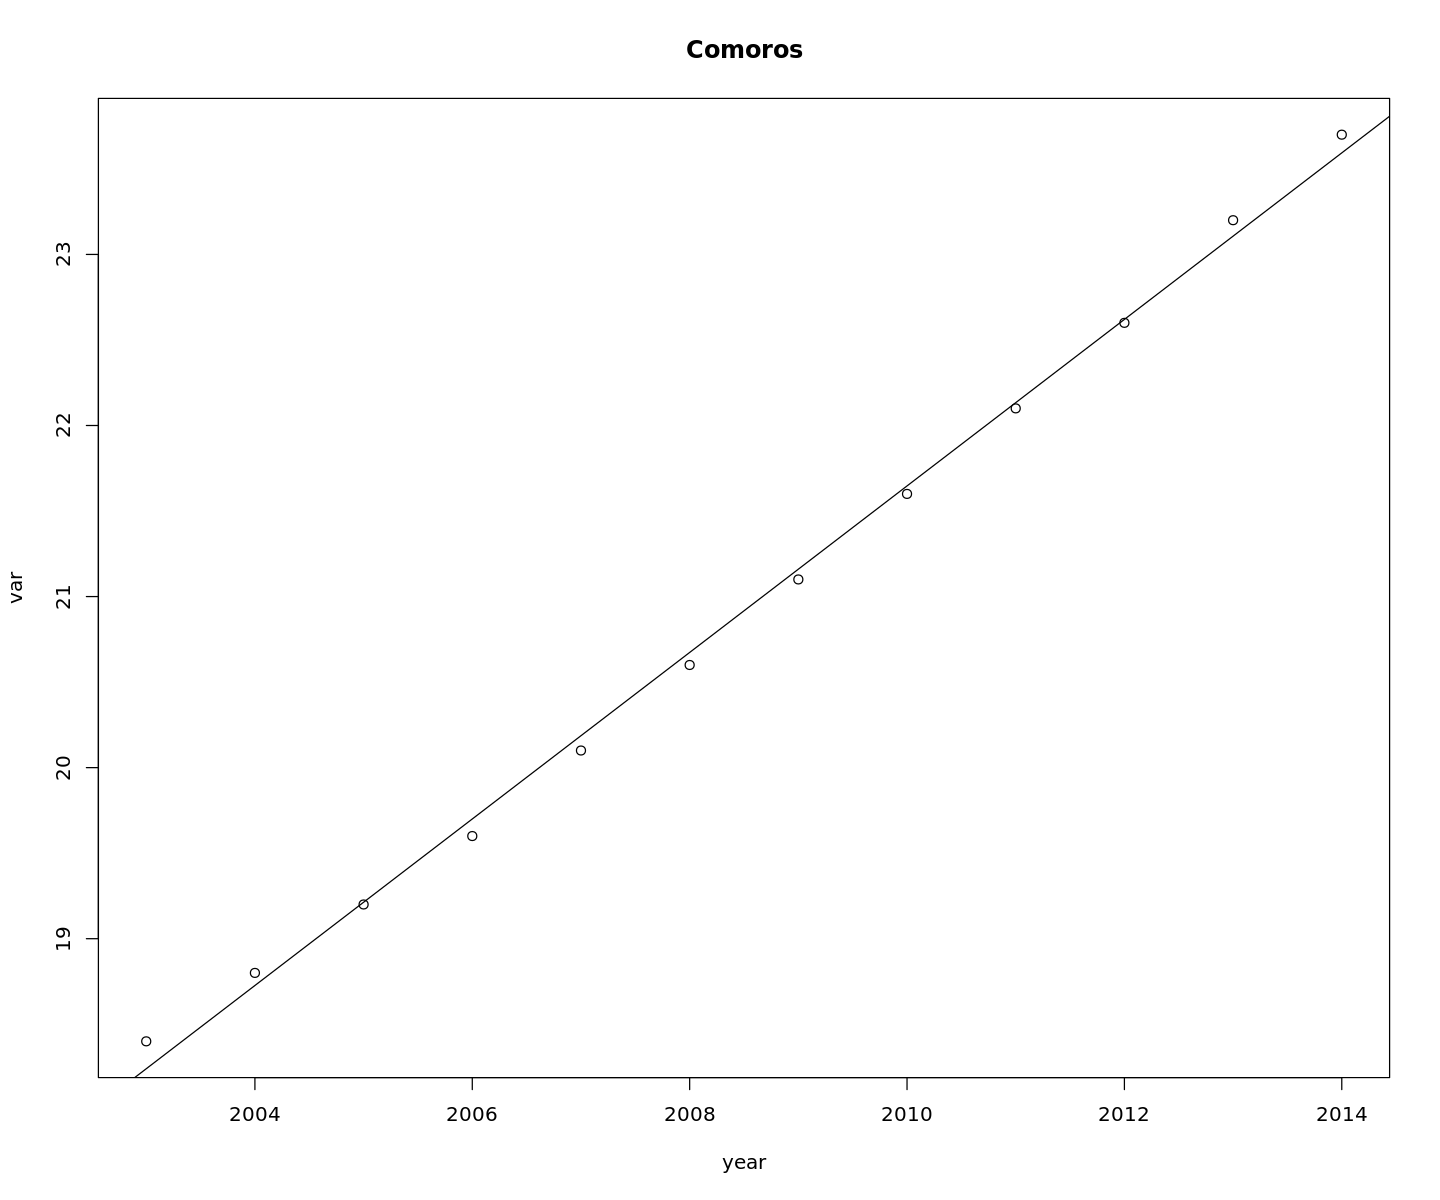

[1] "Croatia"


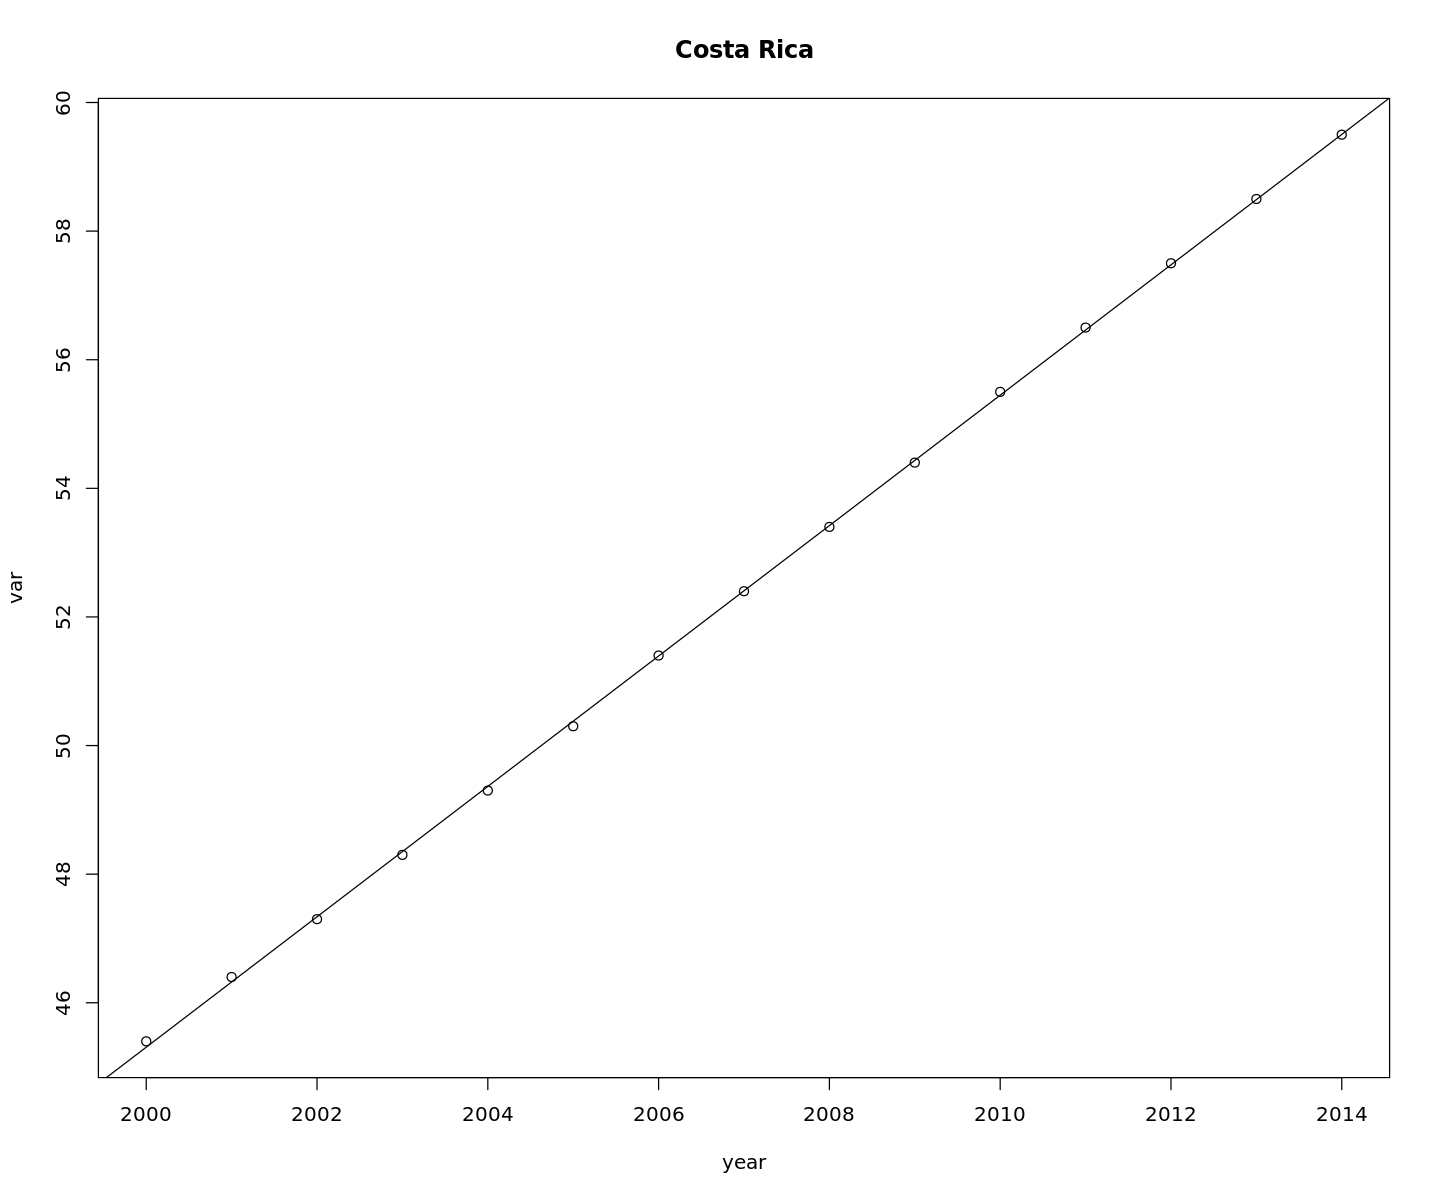

[1] "Cyprus"


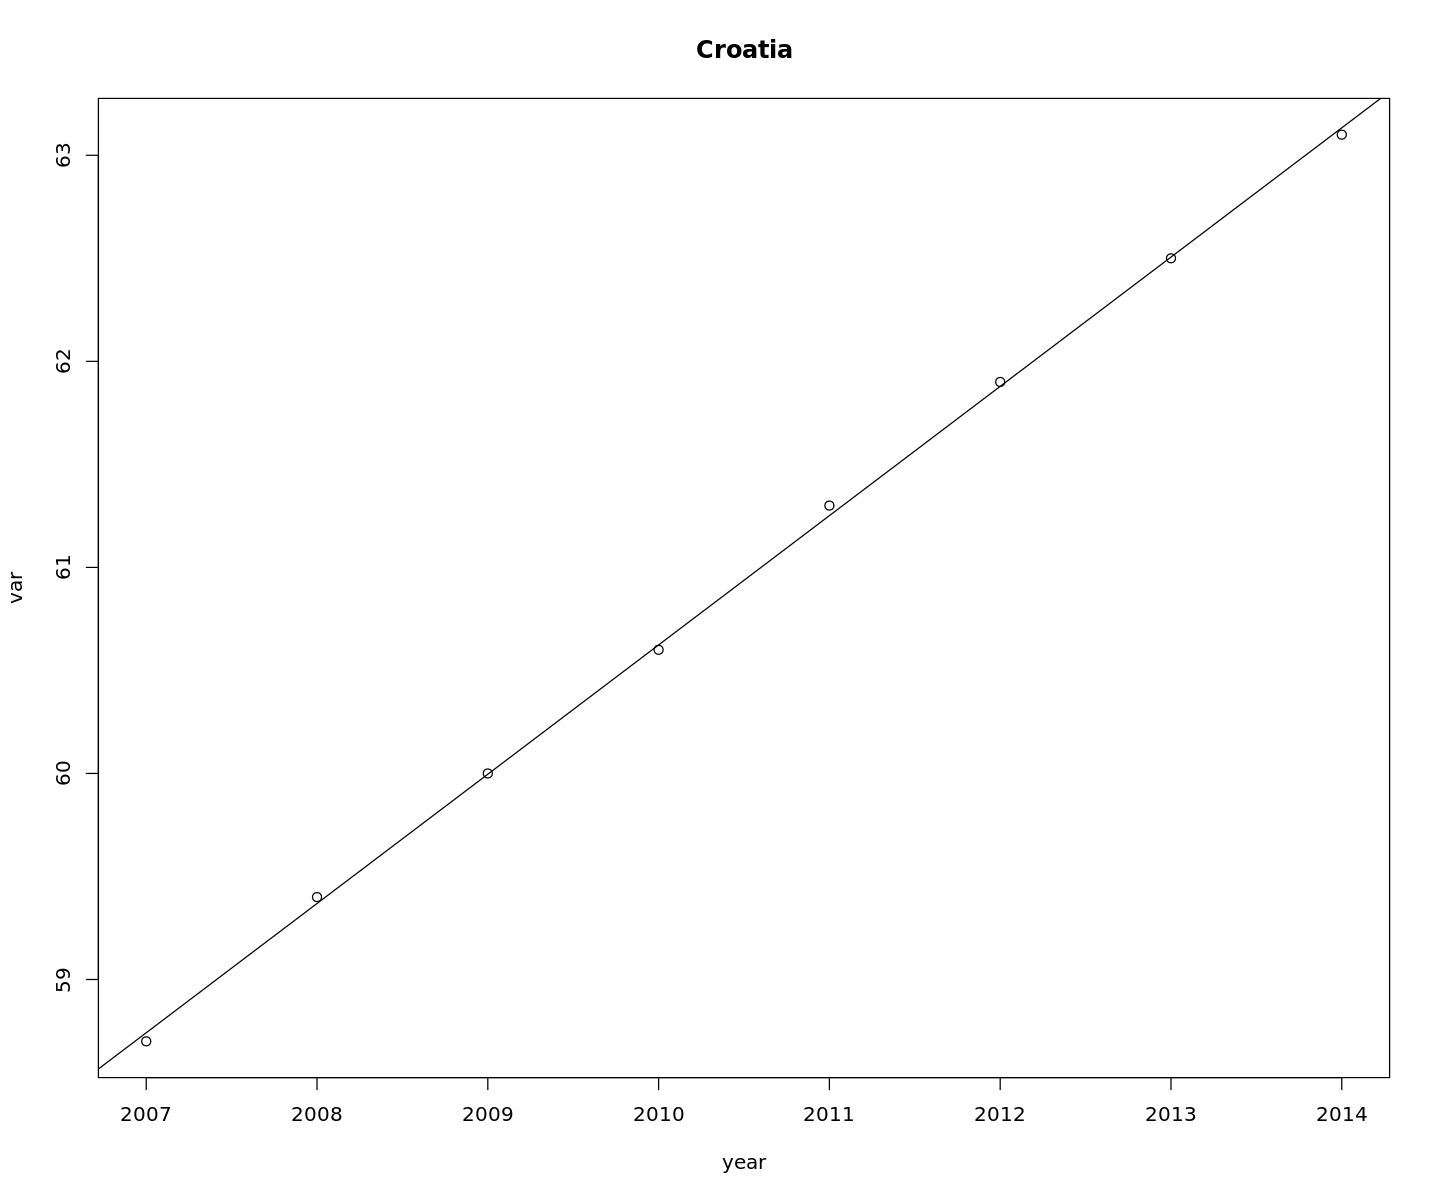

[1] "Djibouti"


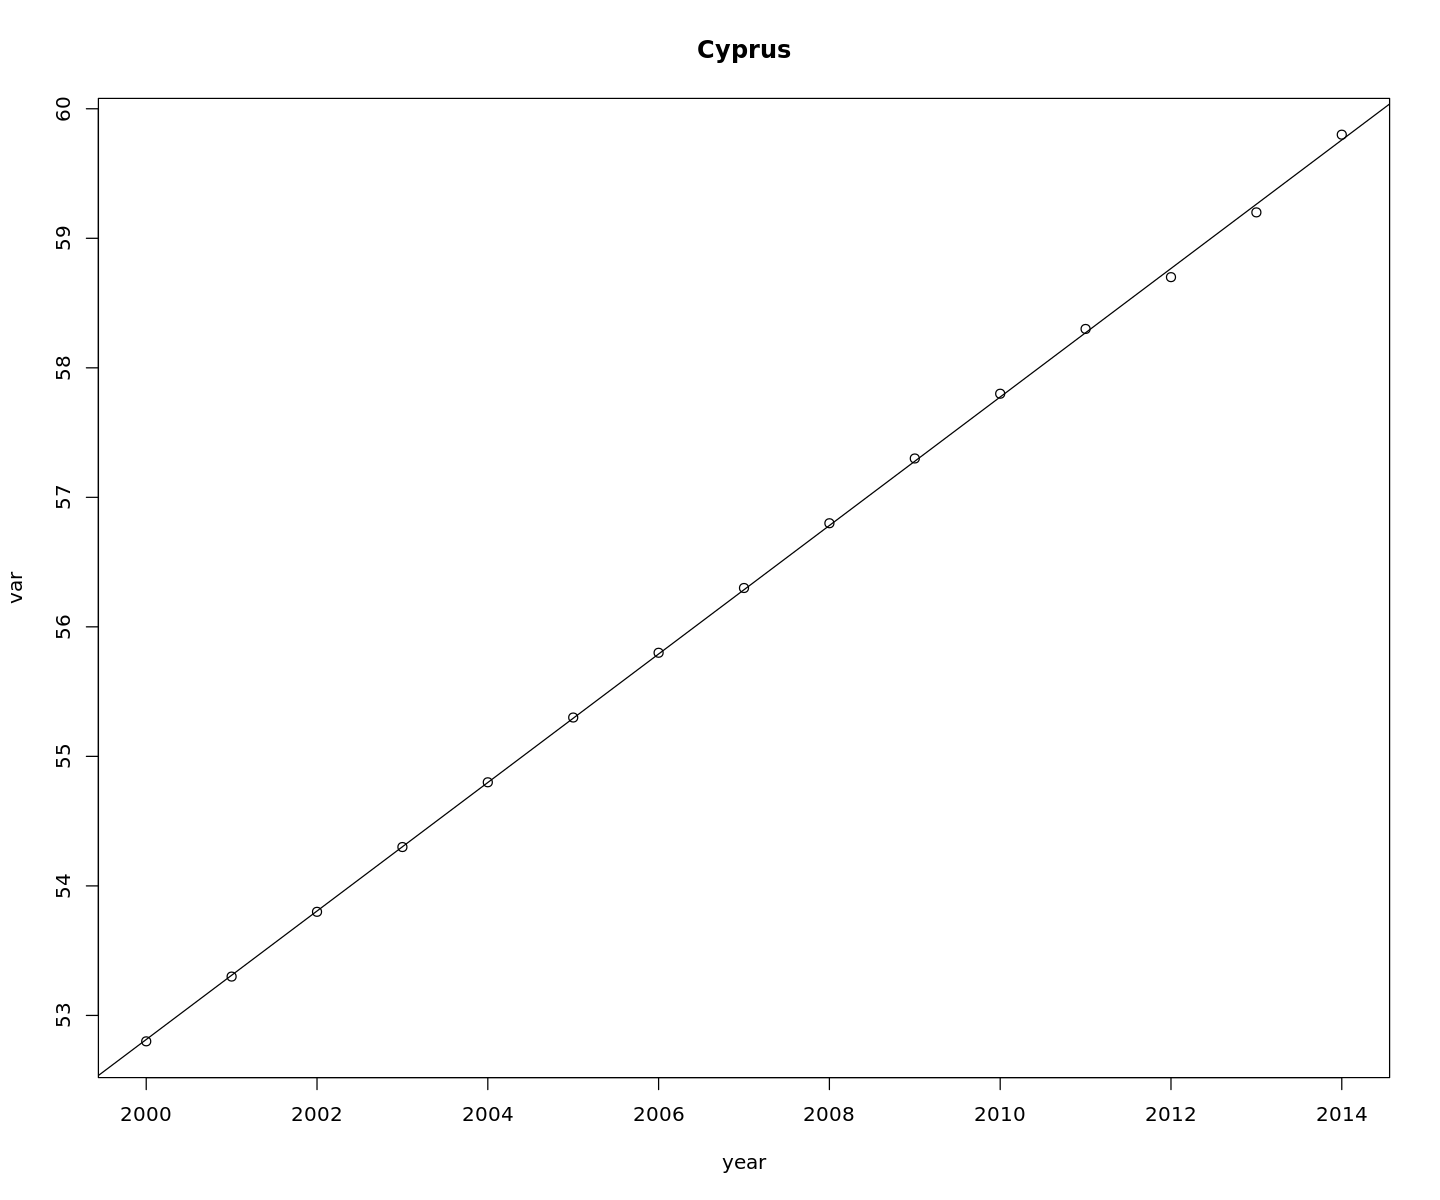

[1] "Dominican Republic"


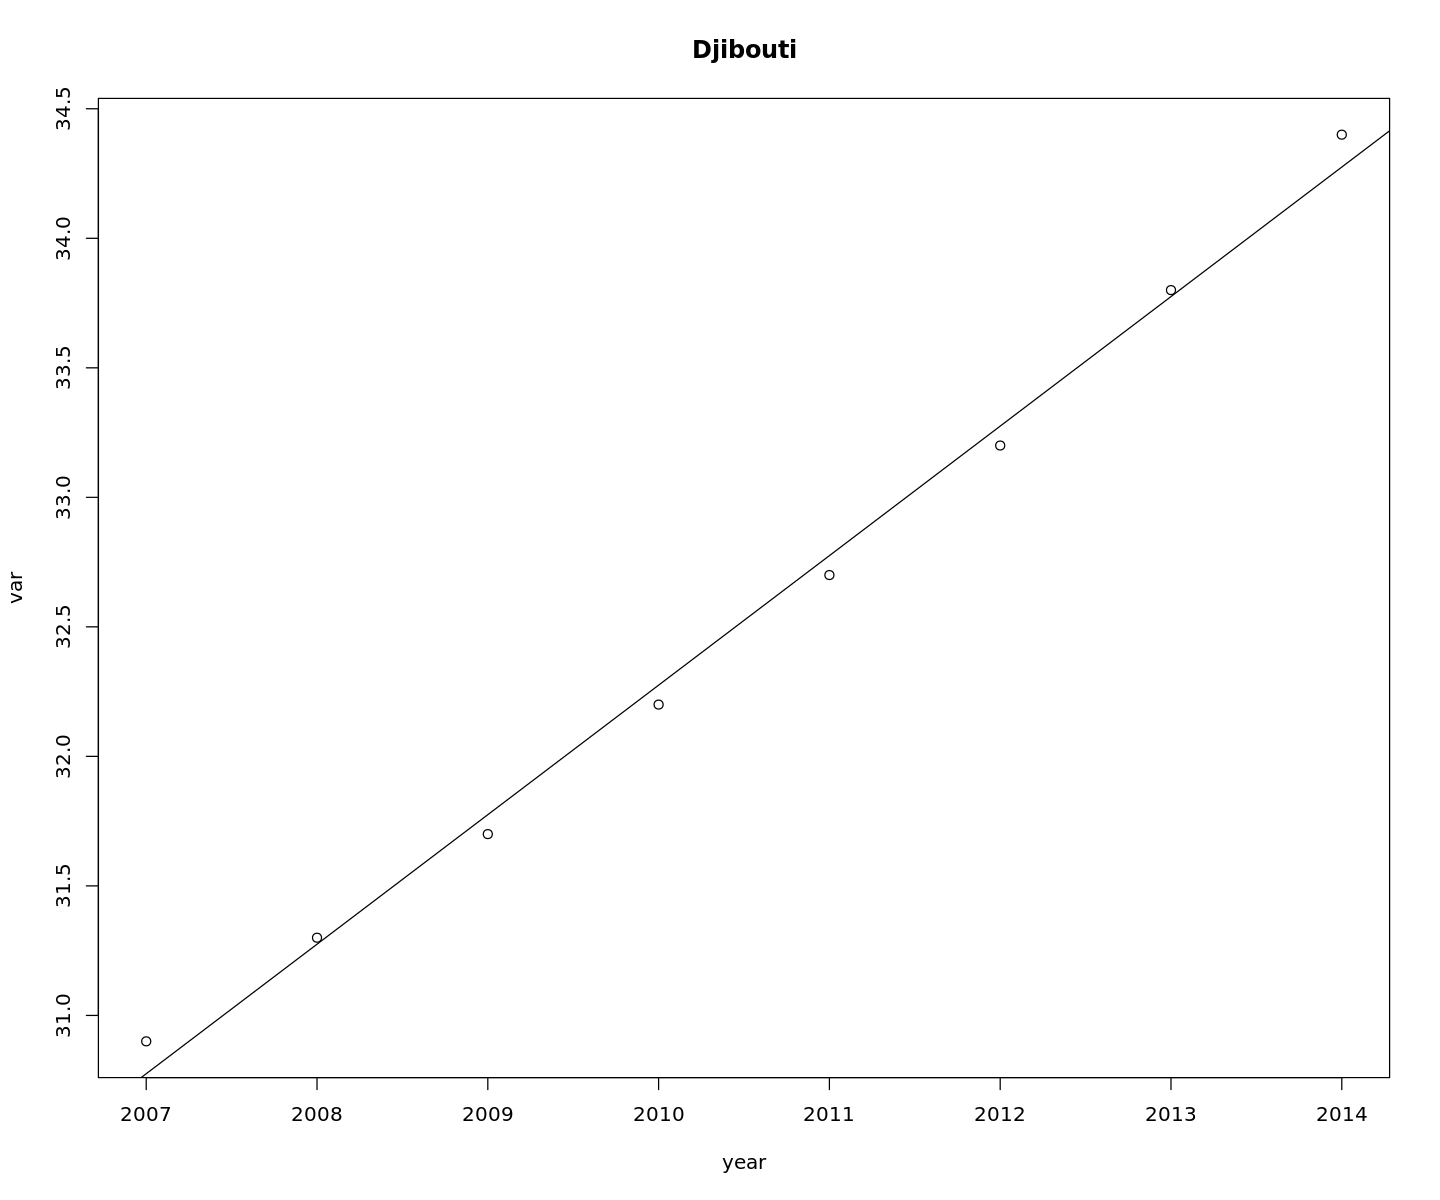

[1] "Ecuador"


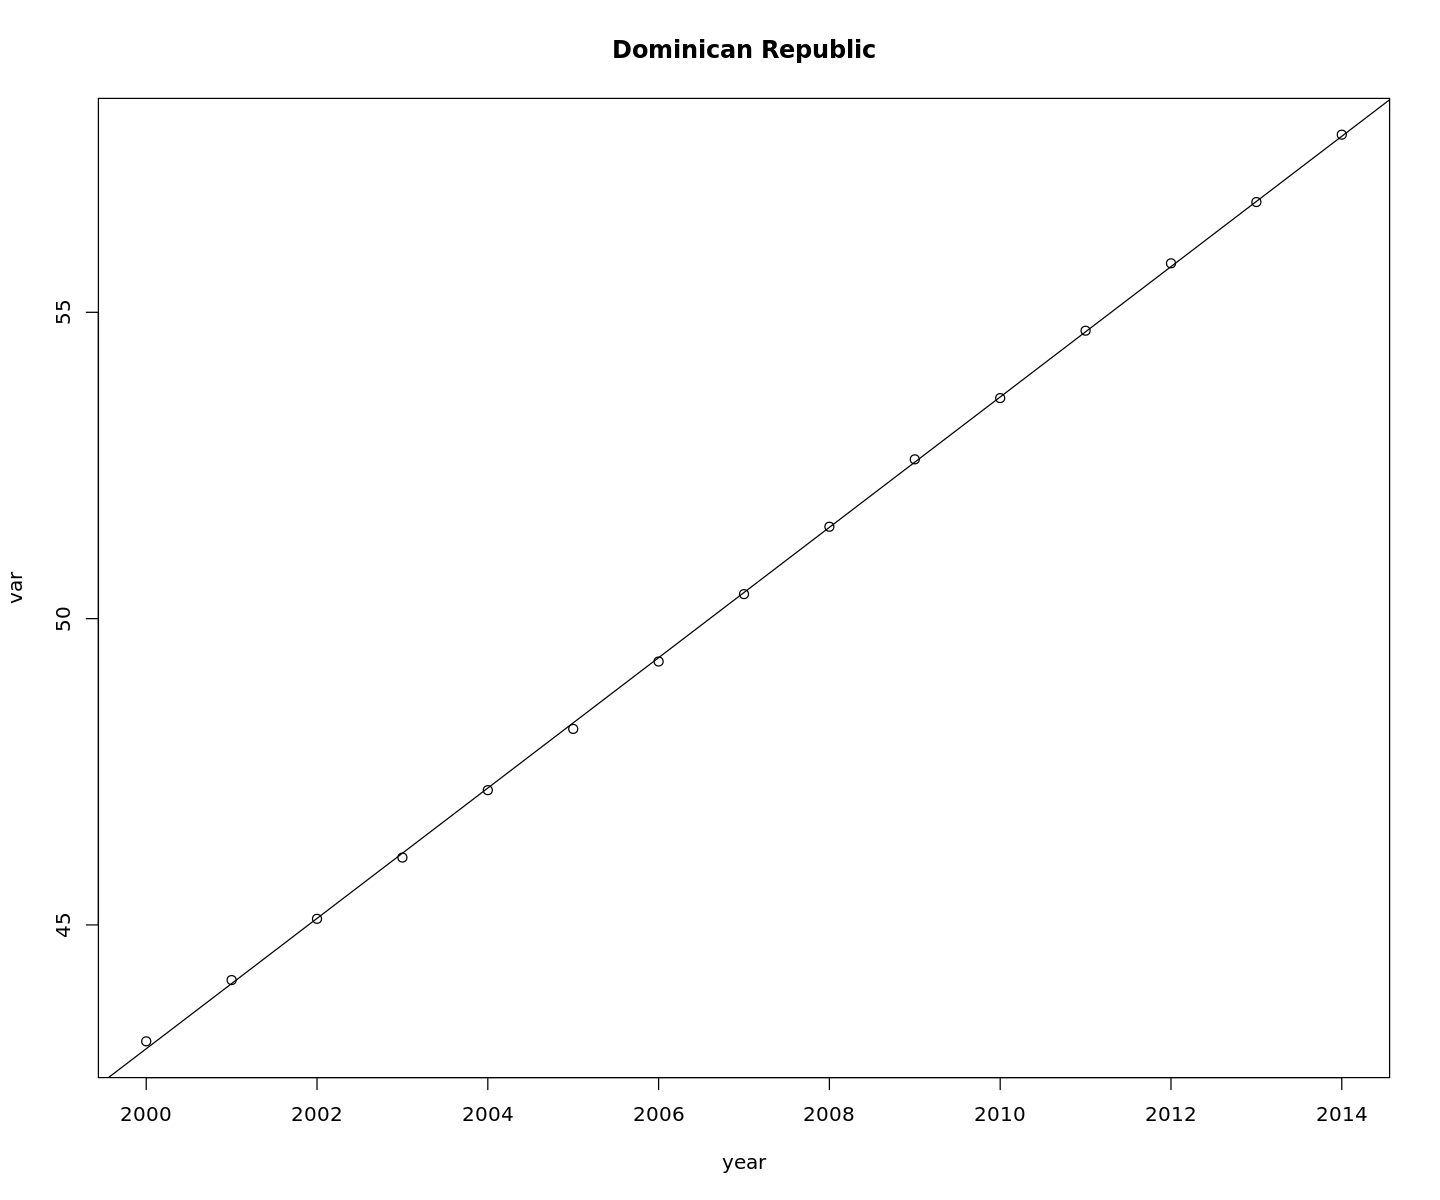

[1] "El Salvador"


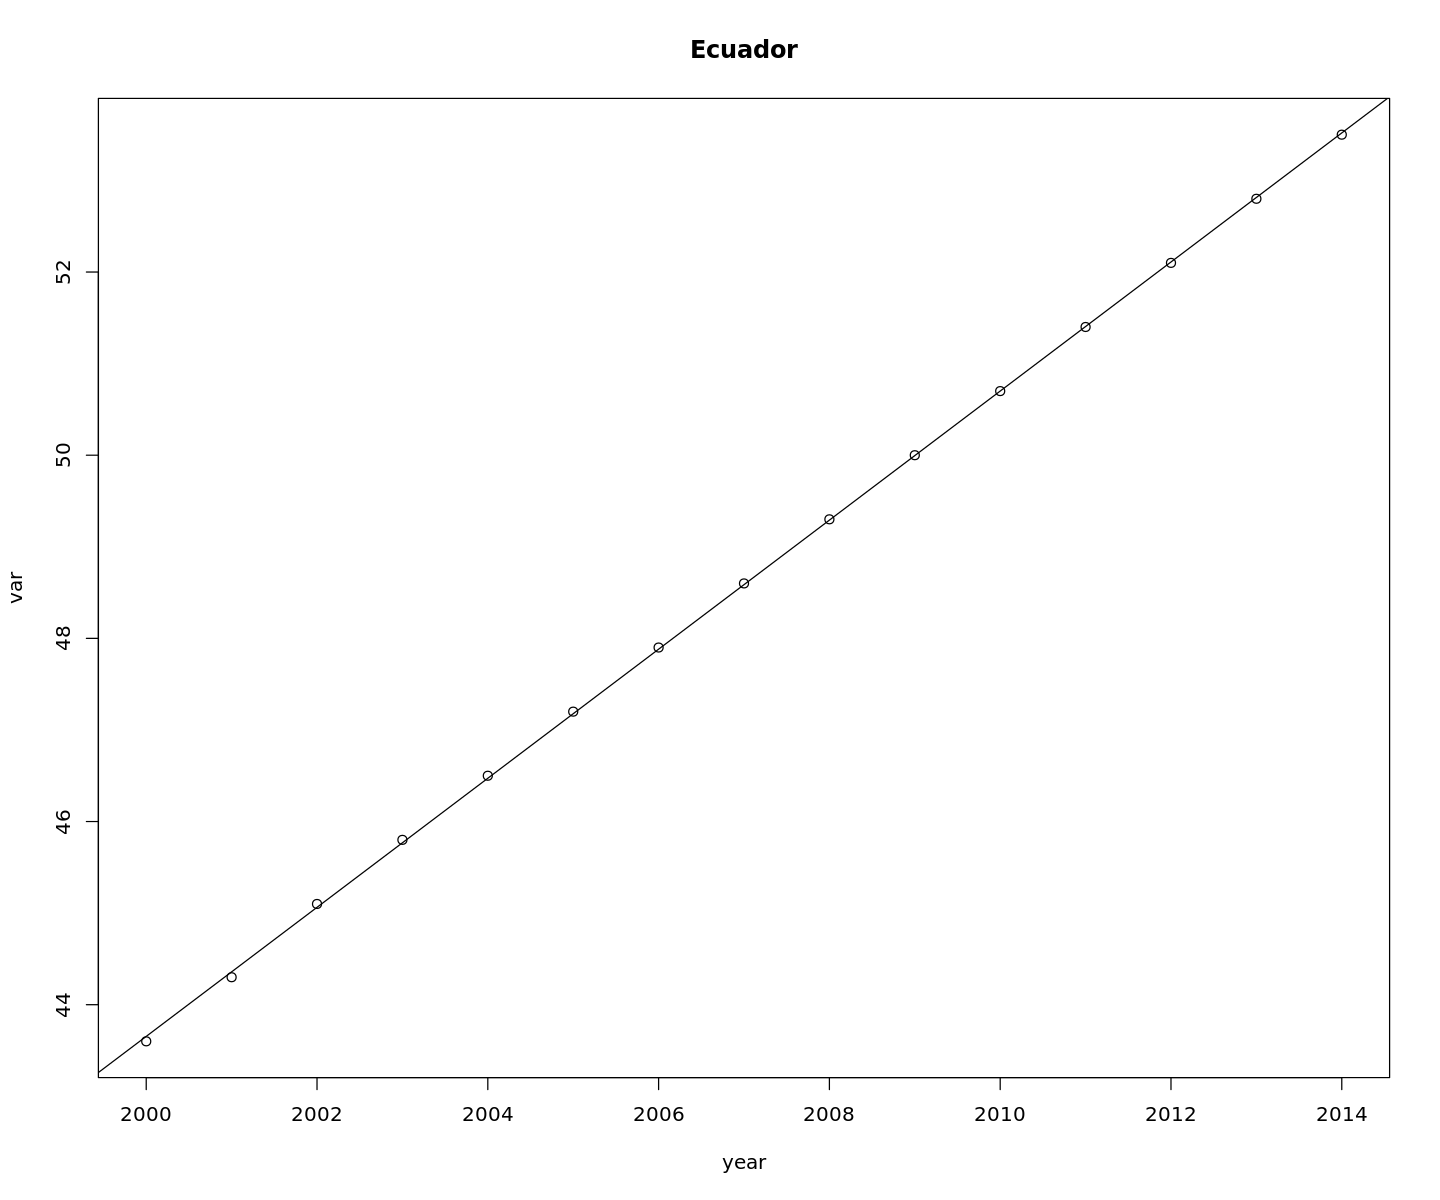

[1] "Eritrea"


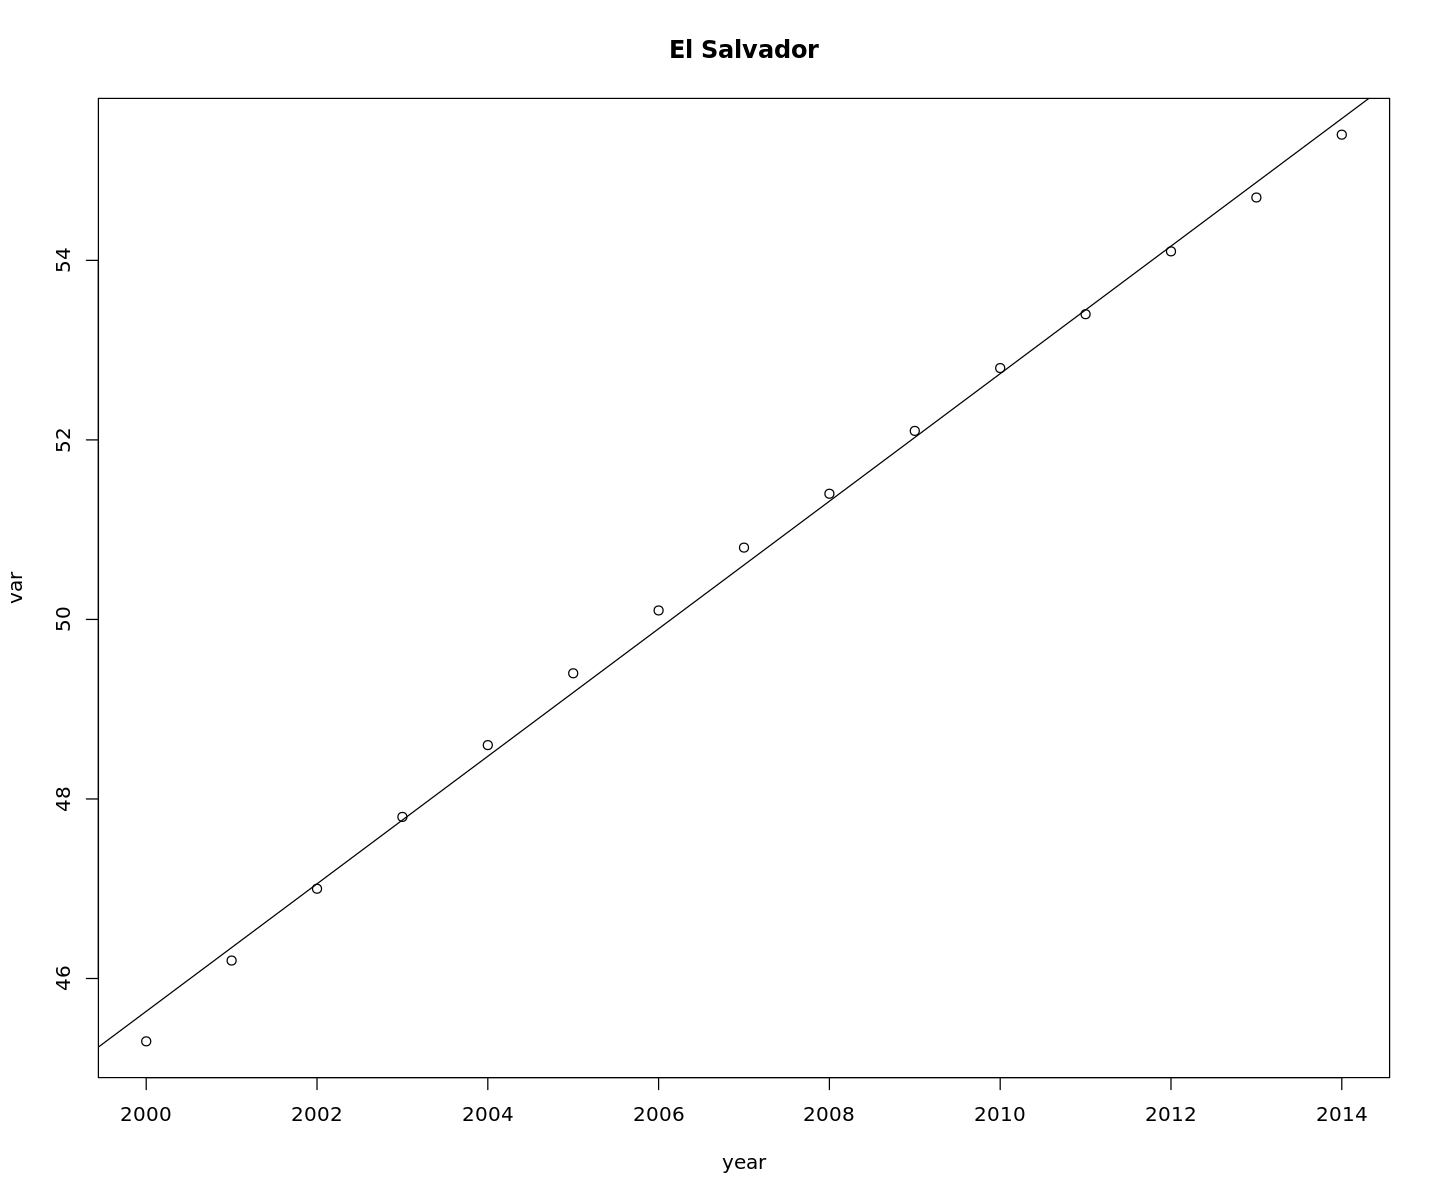

[1] "Estonia"


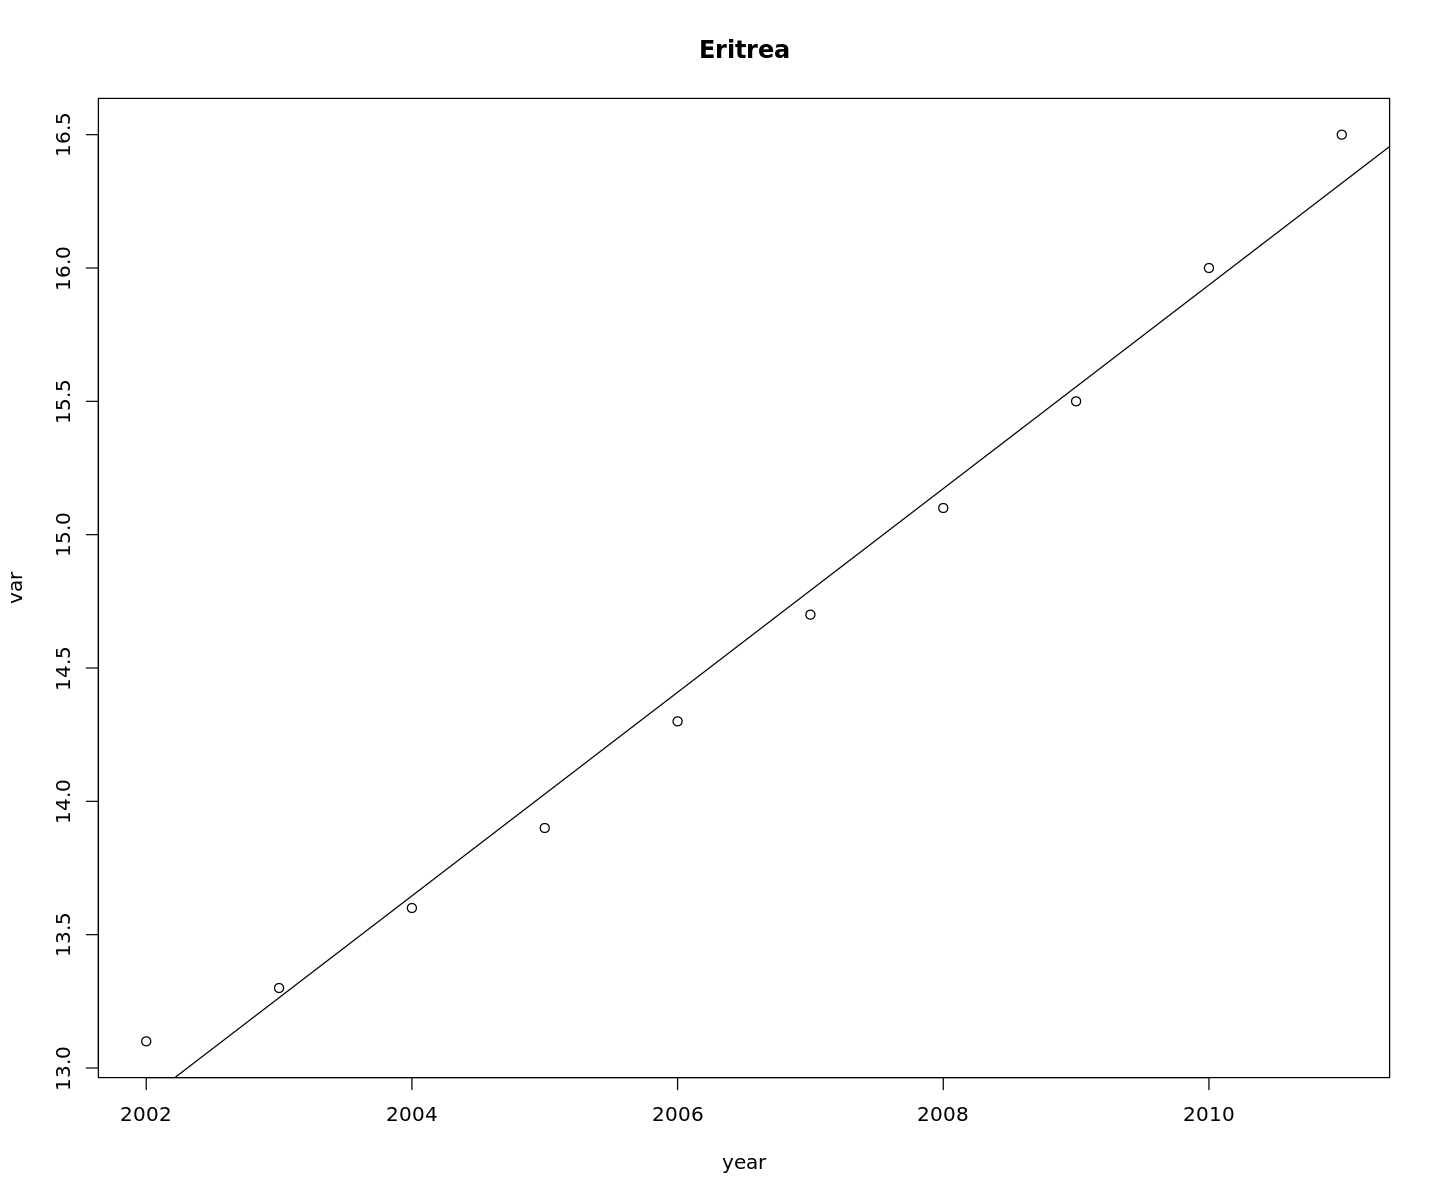

[1] "Ethiopia"


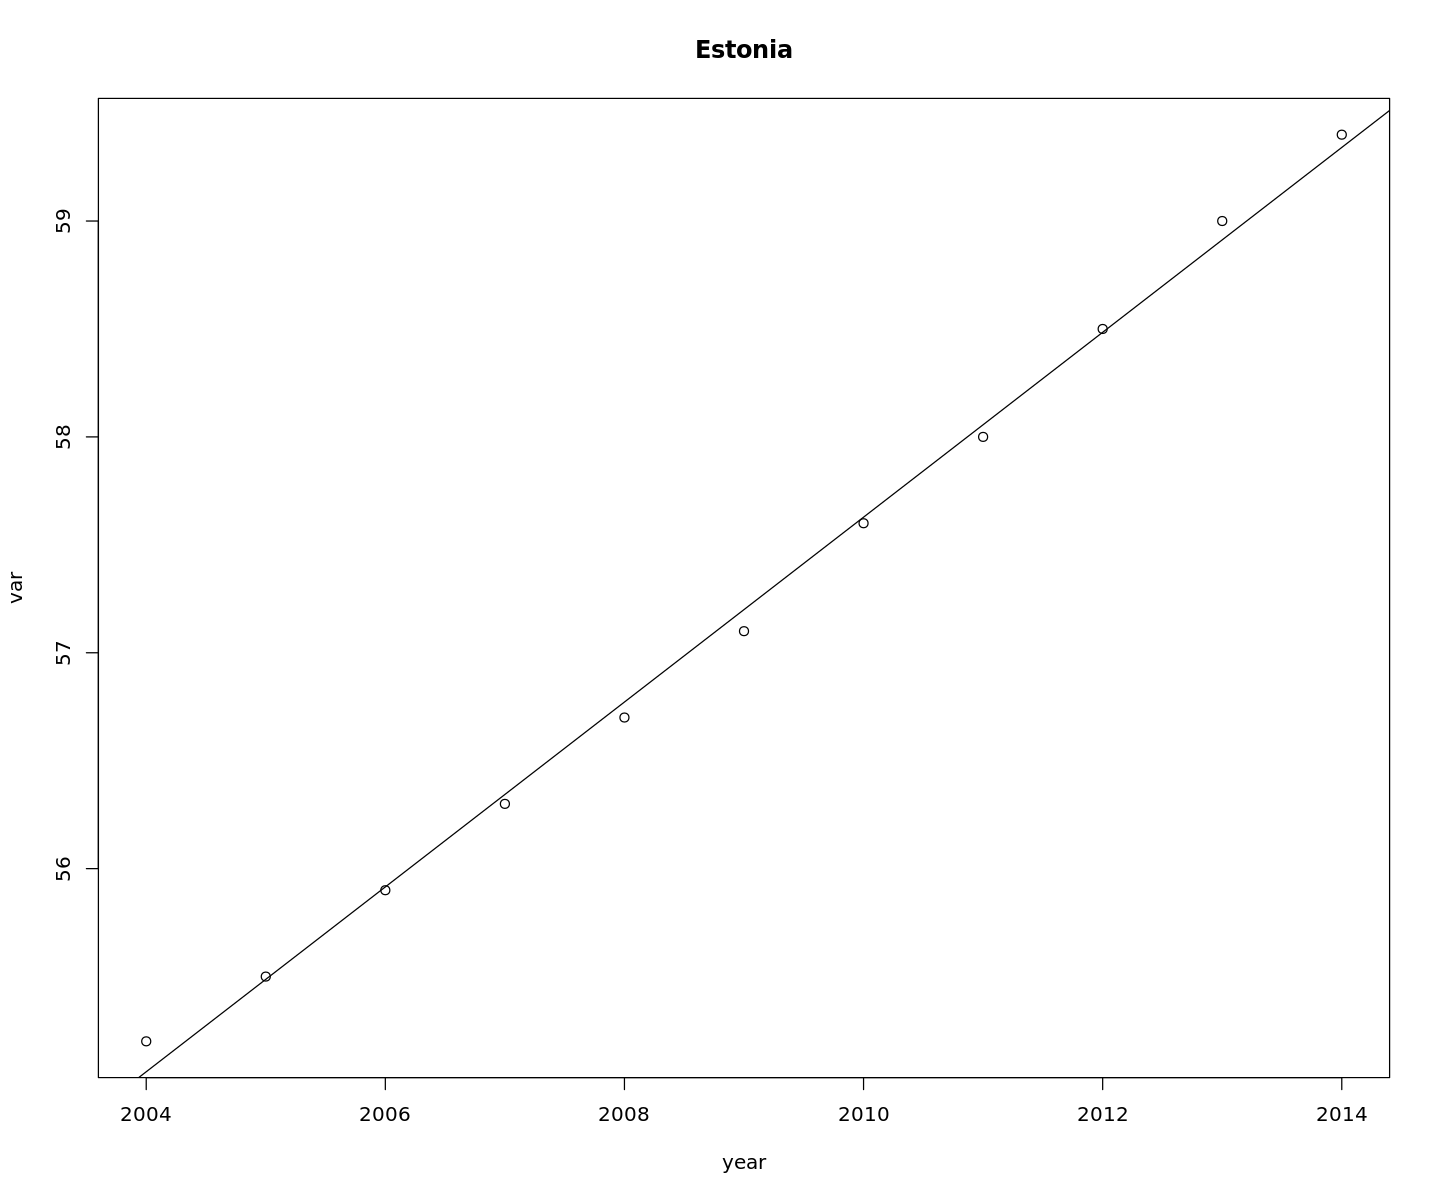

[1] "Fiji"


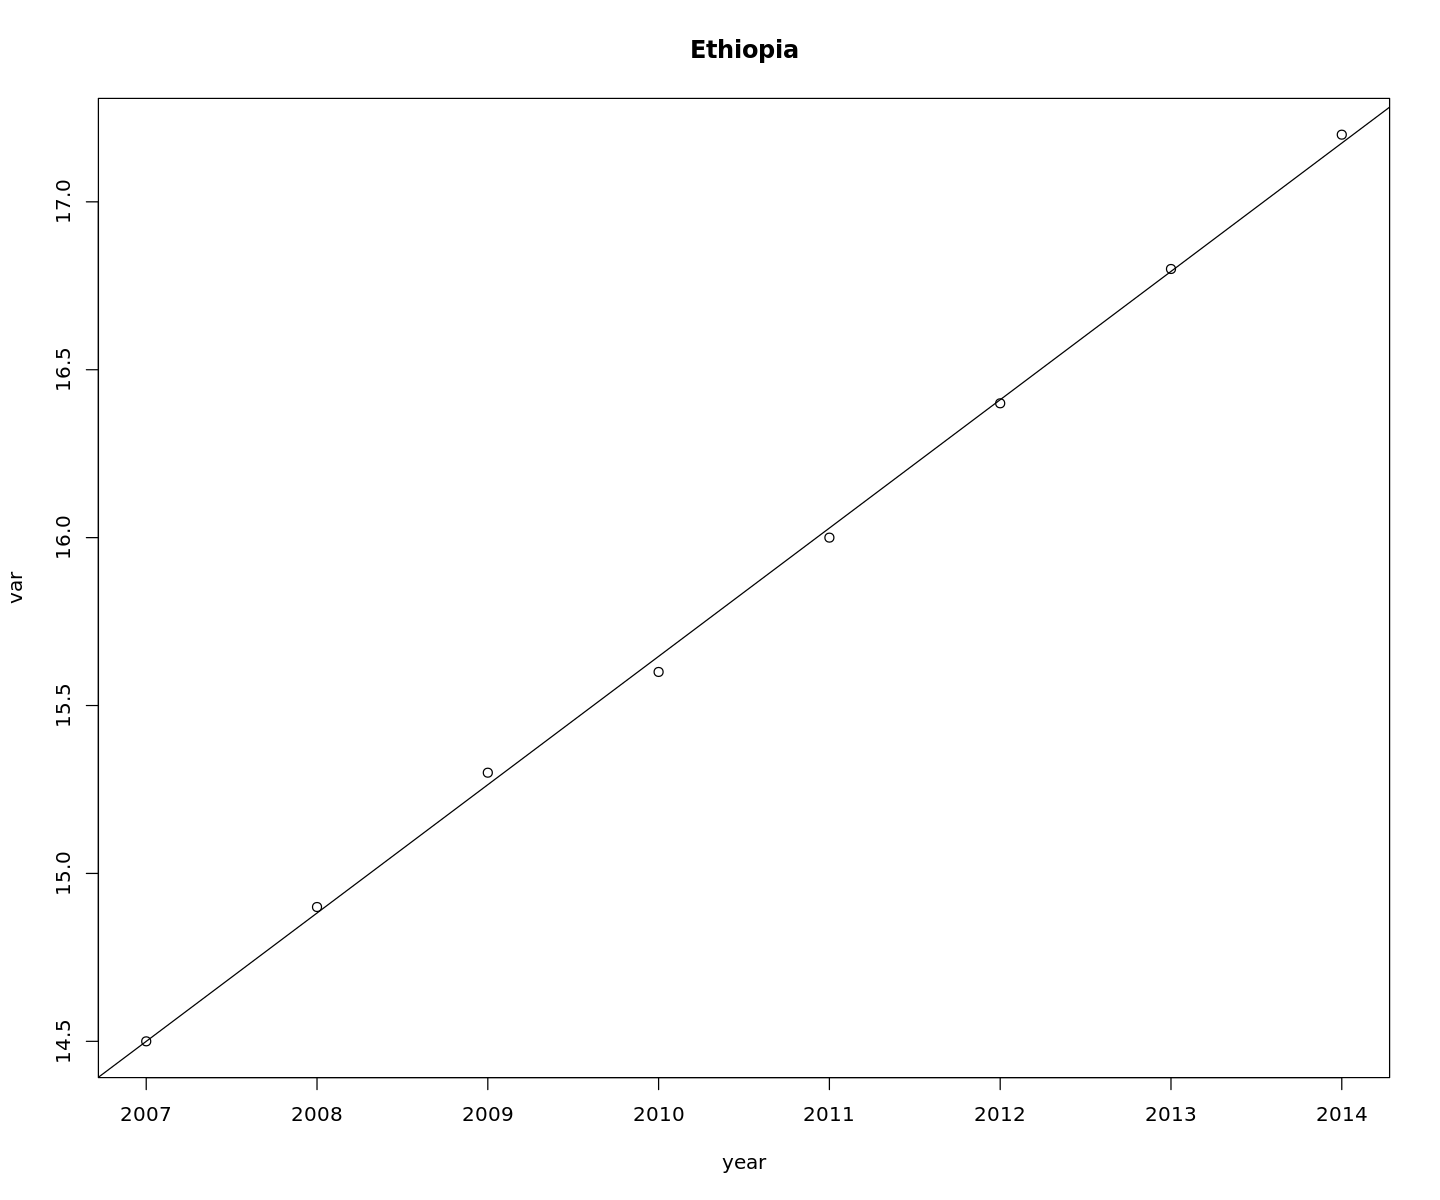

[1] "France"


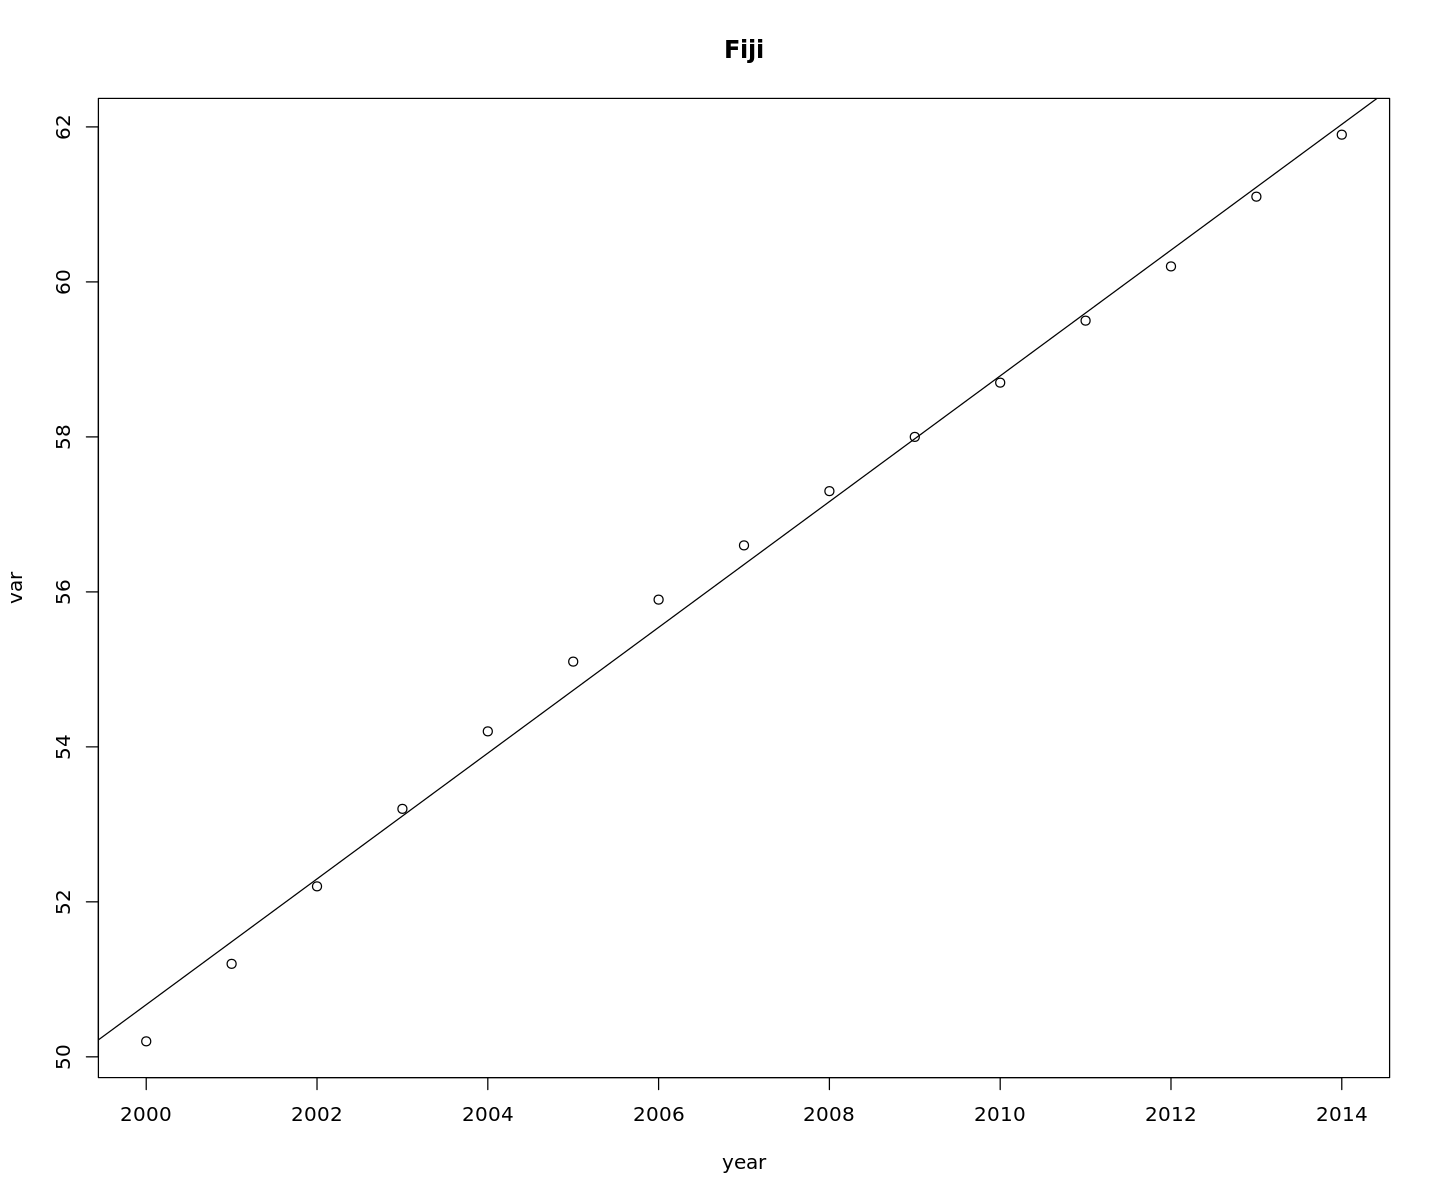

[1] "Gabon"


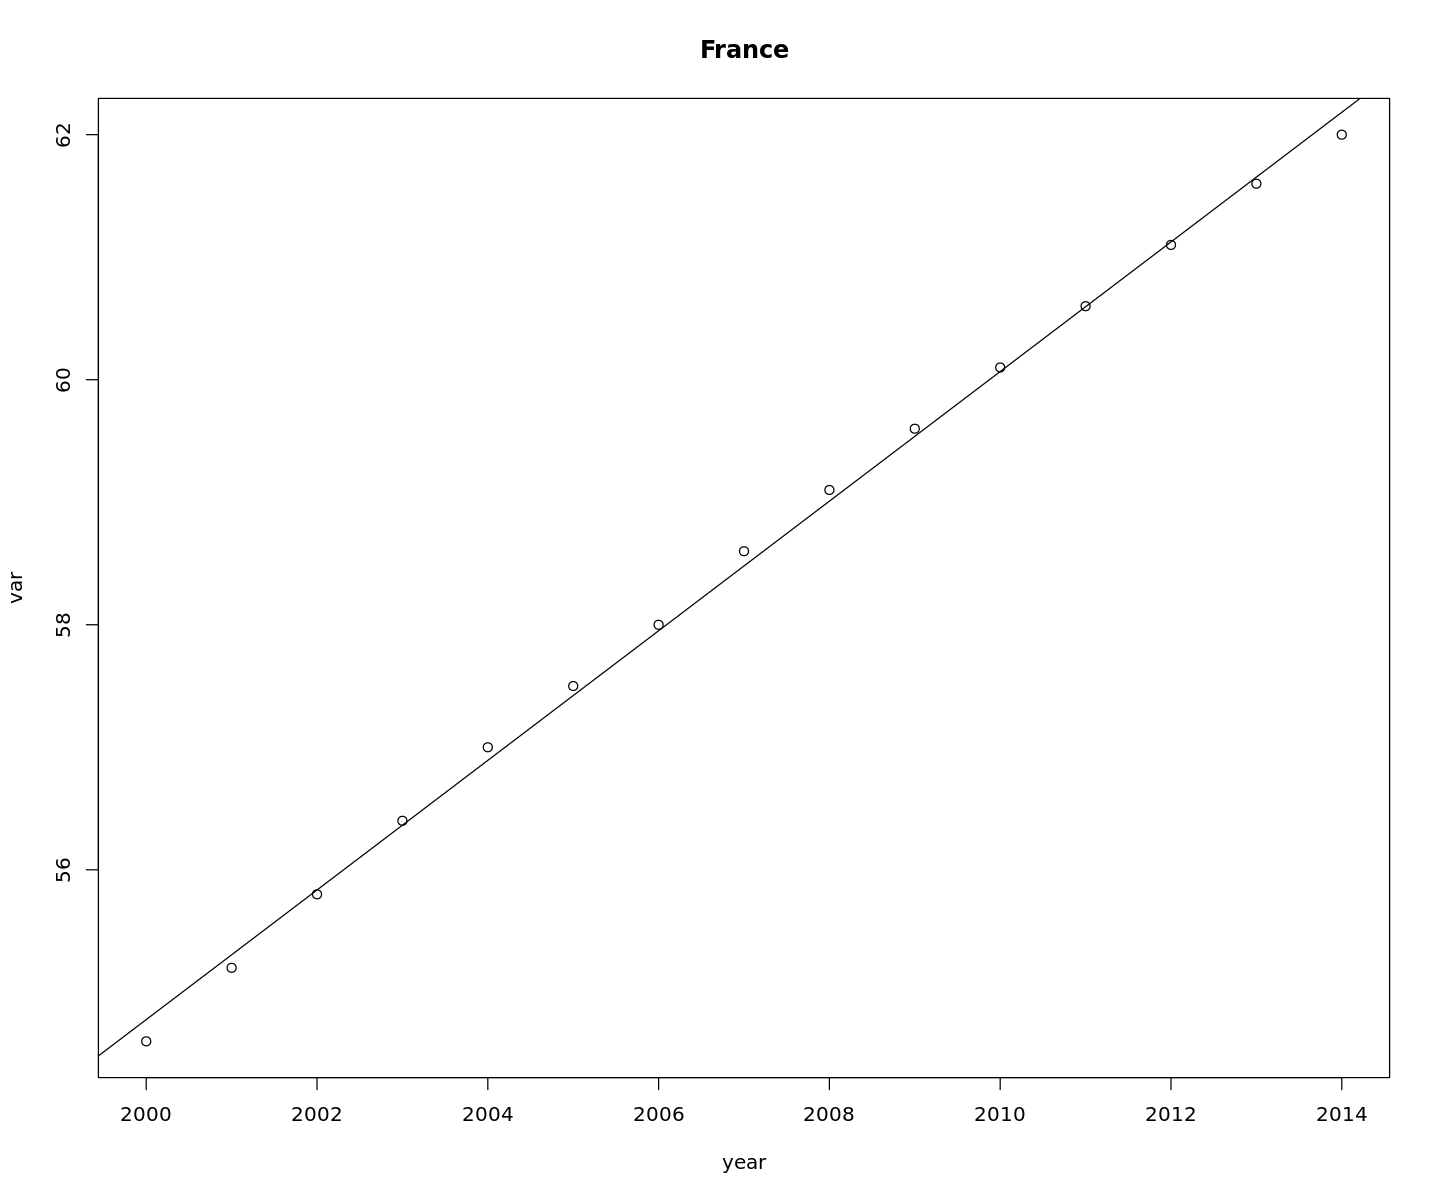

[1] "Georgia"


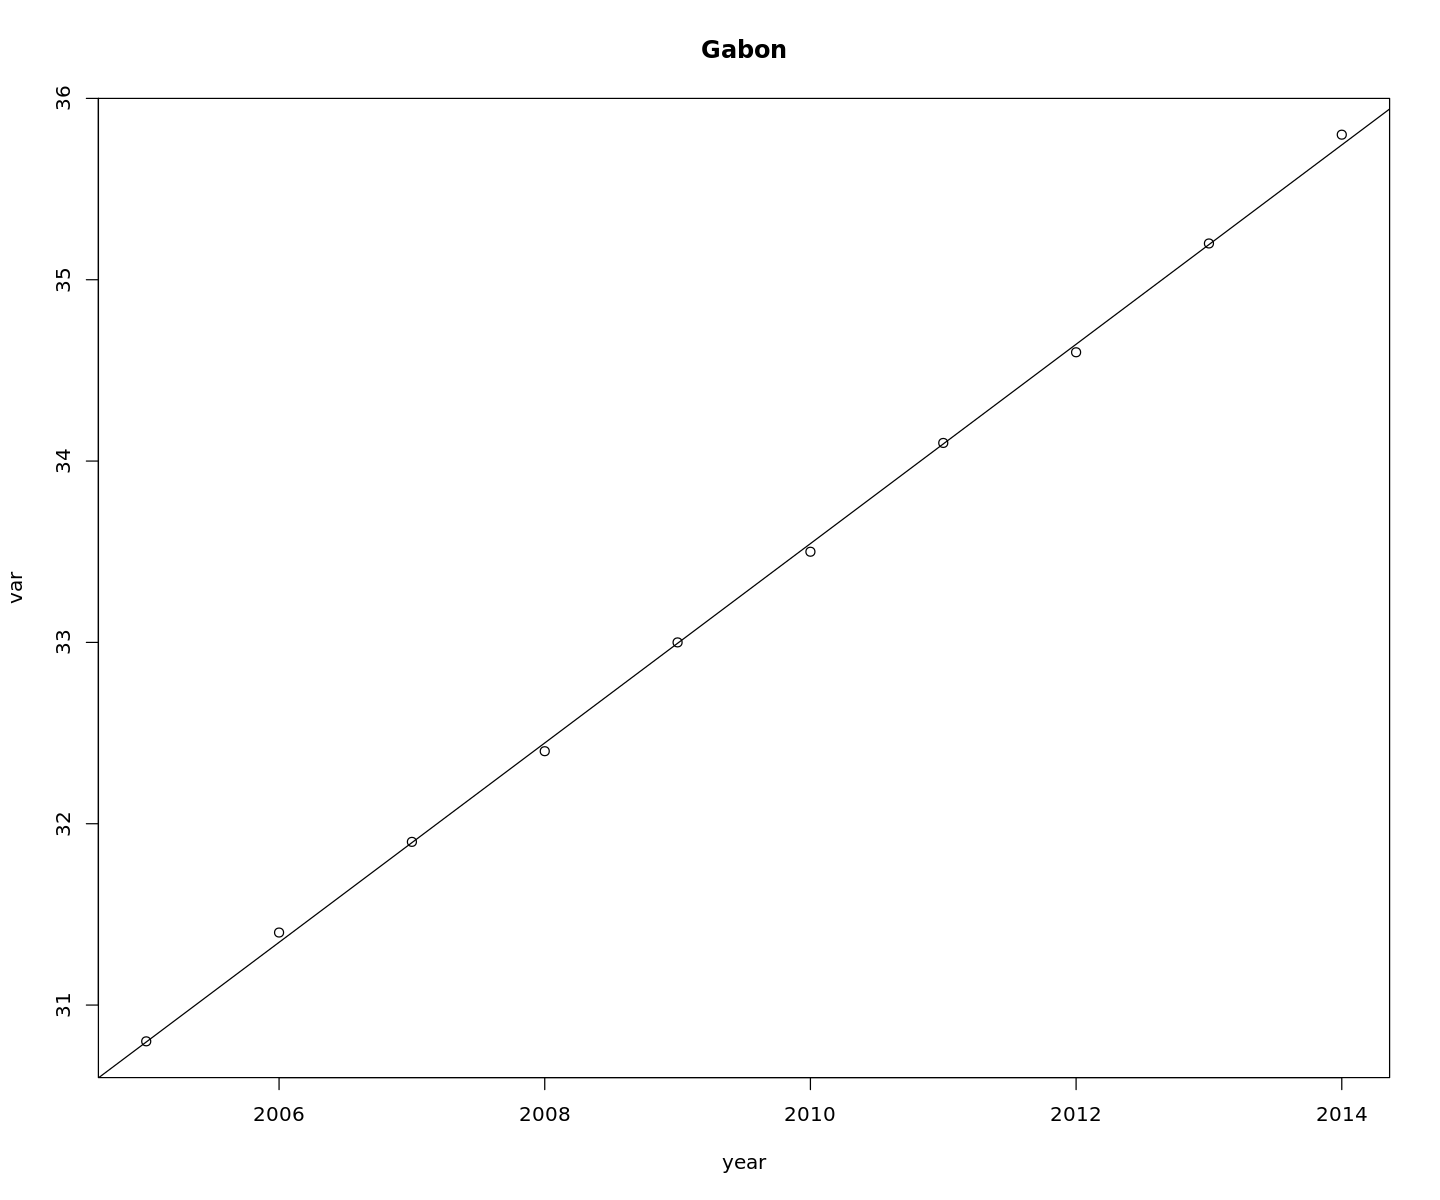

[1] "Germany"


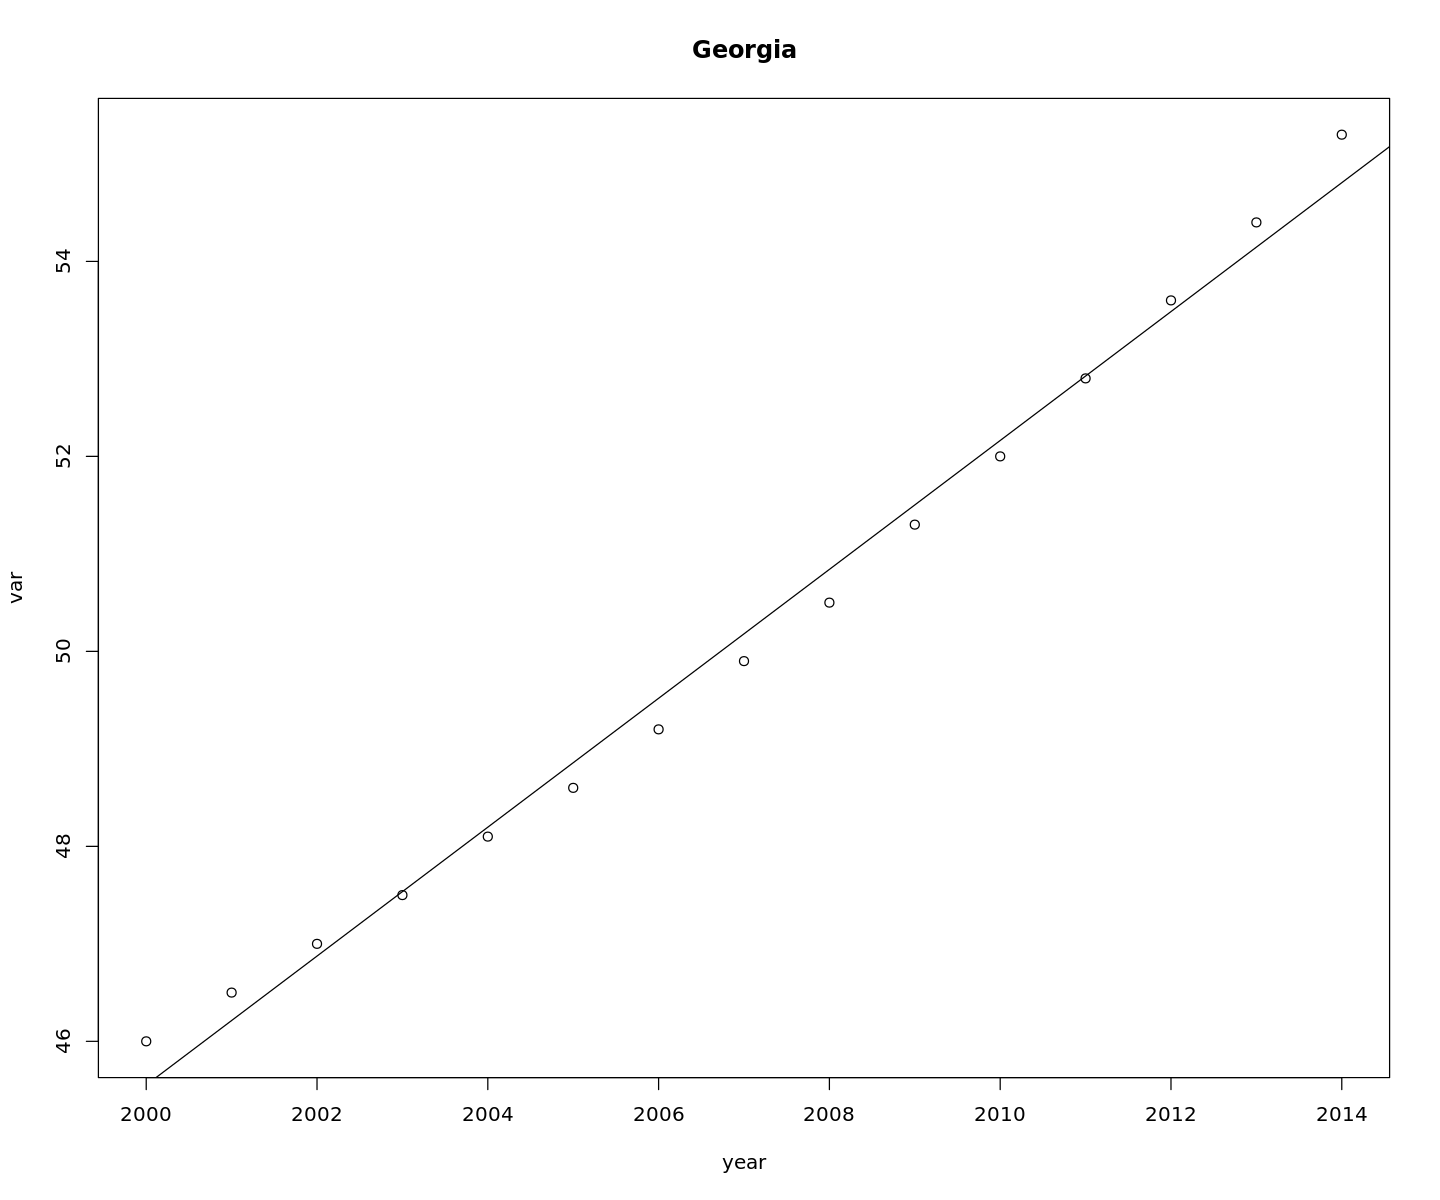

[1] "Ghana"


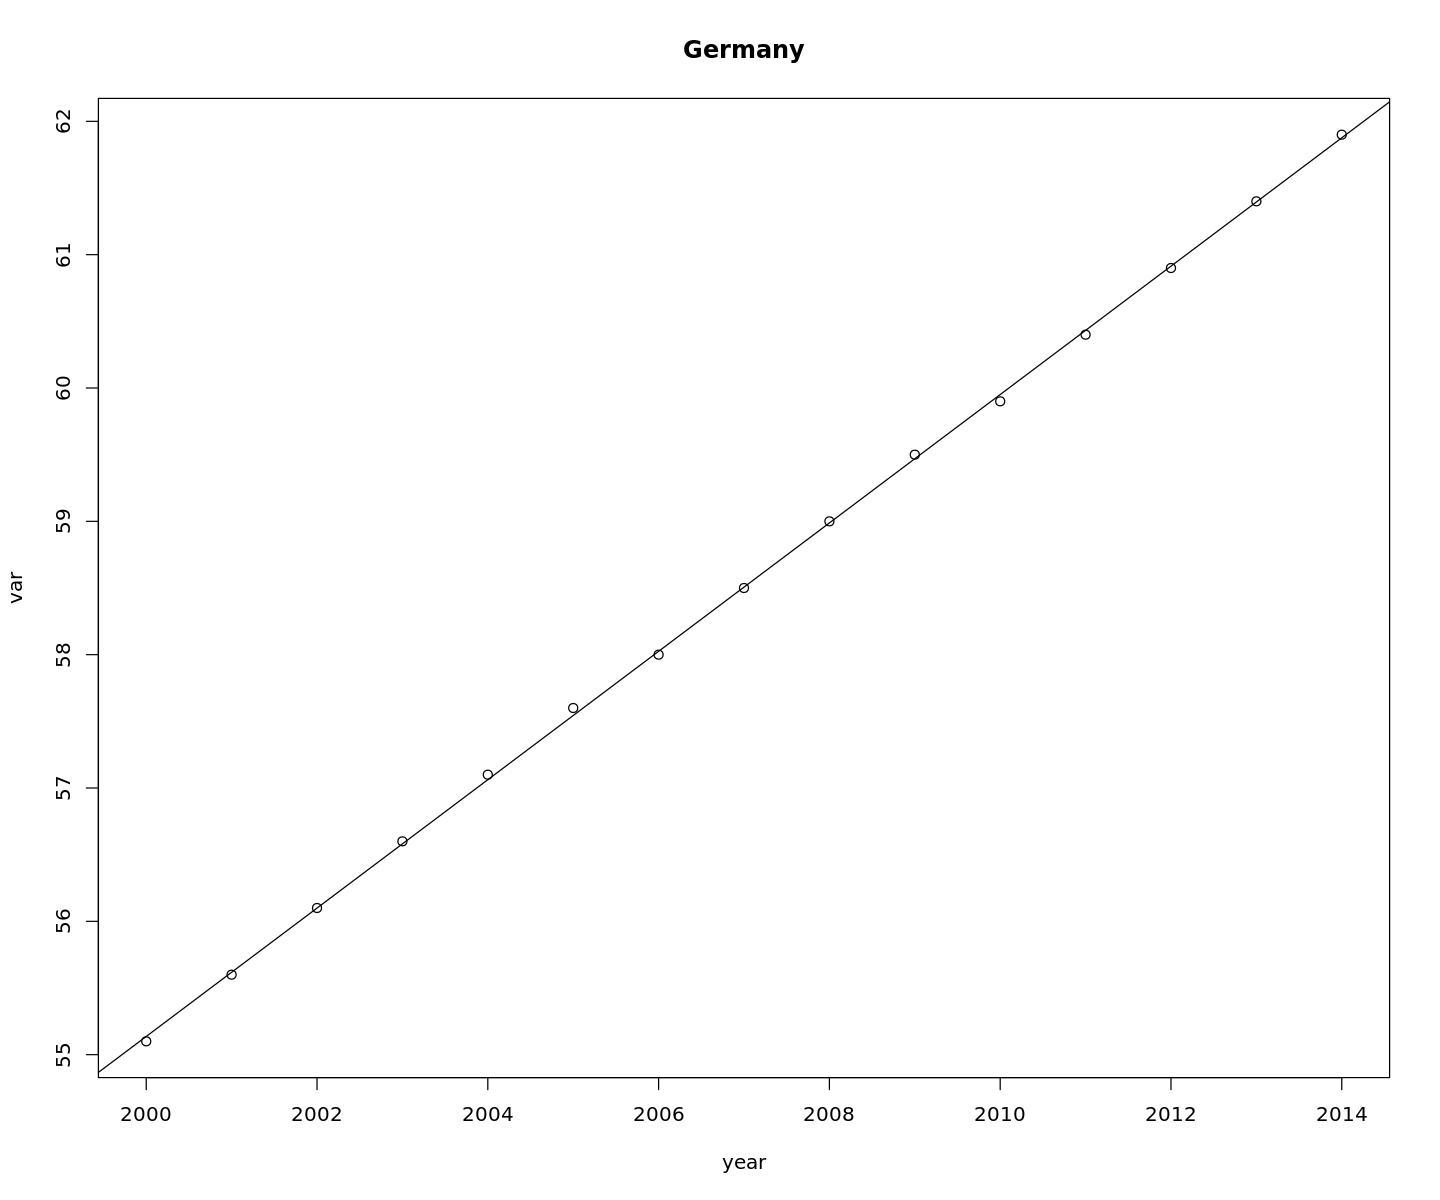

[1] "Greece"


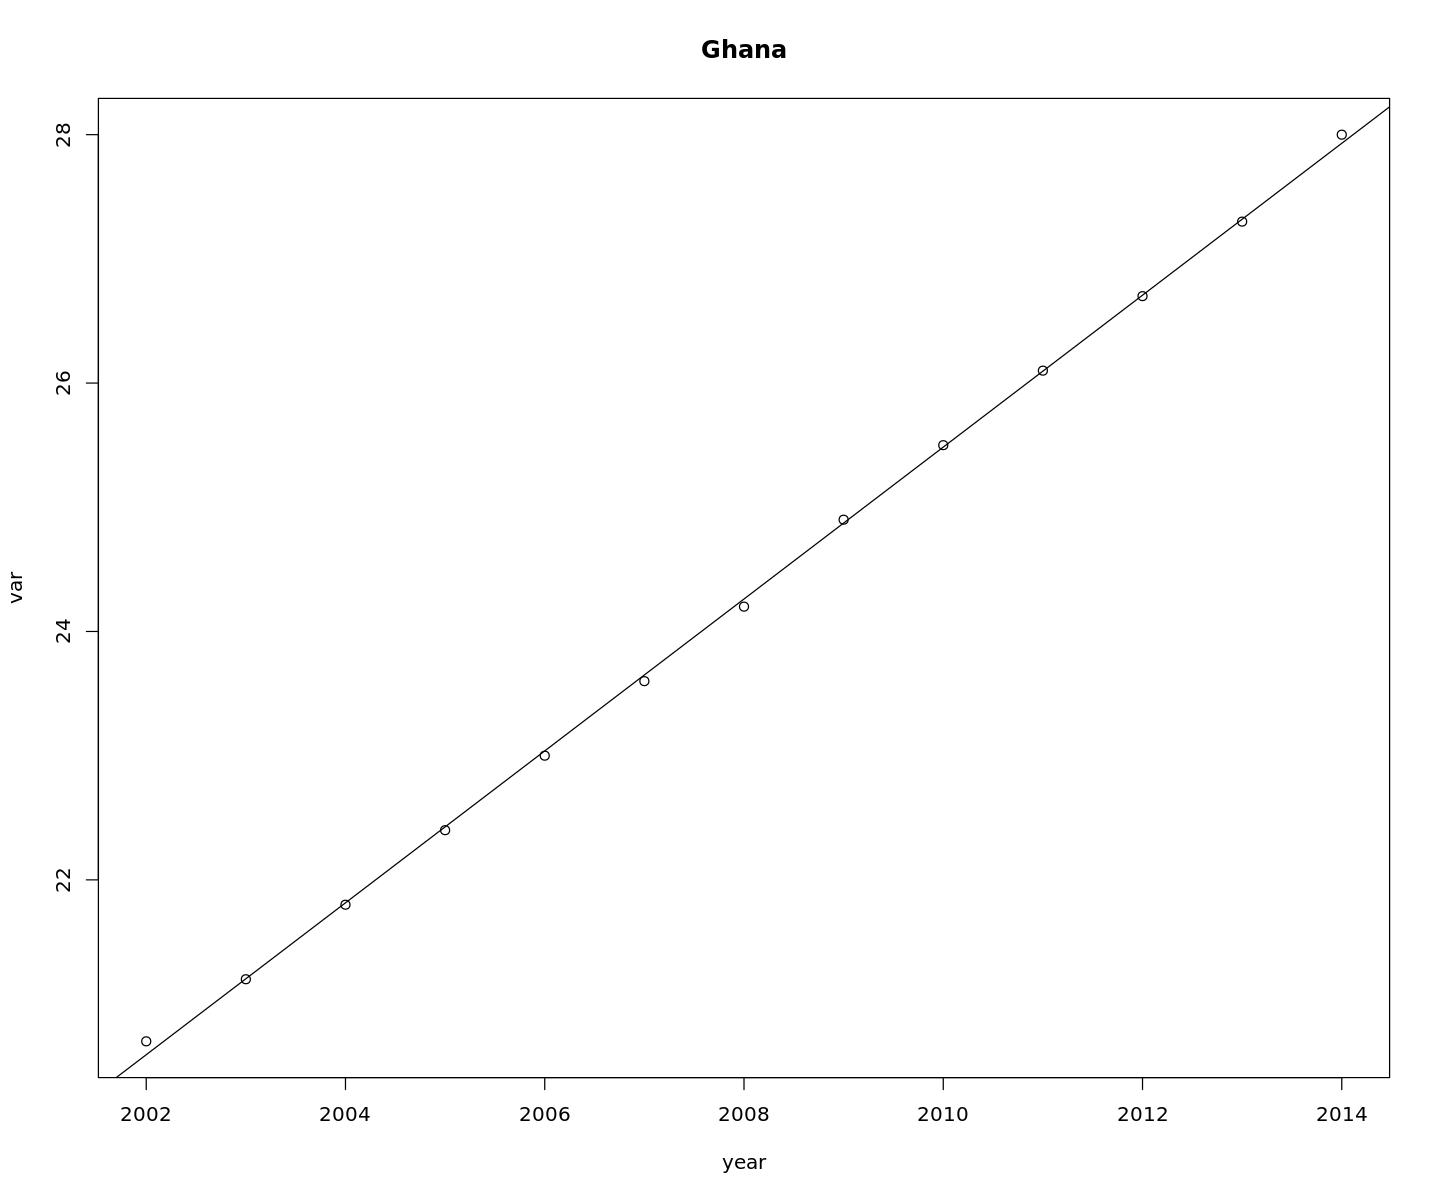

[1] "Guatemala"


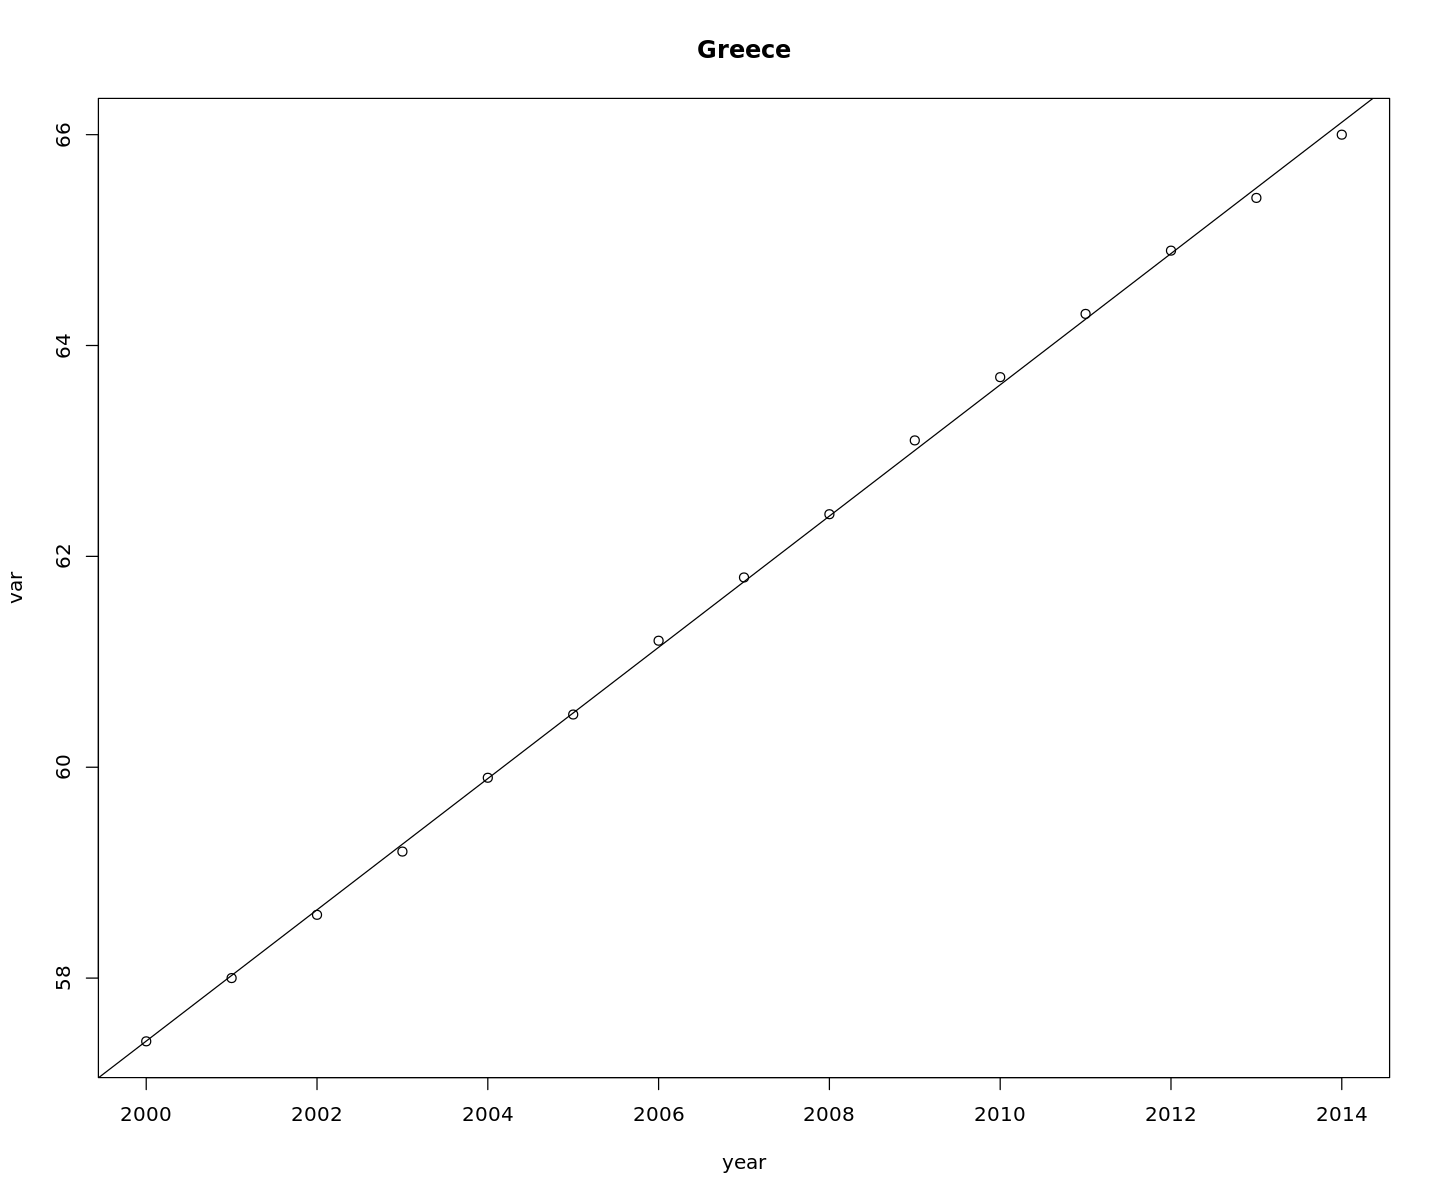

[1] "Guinea"


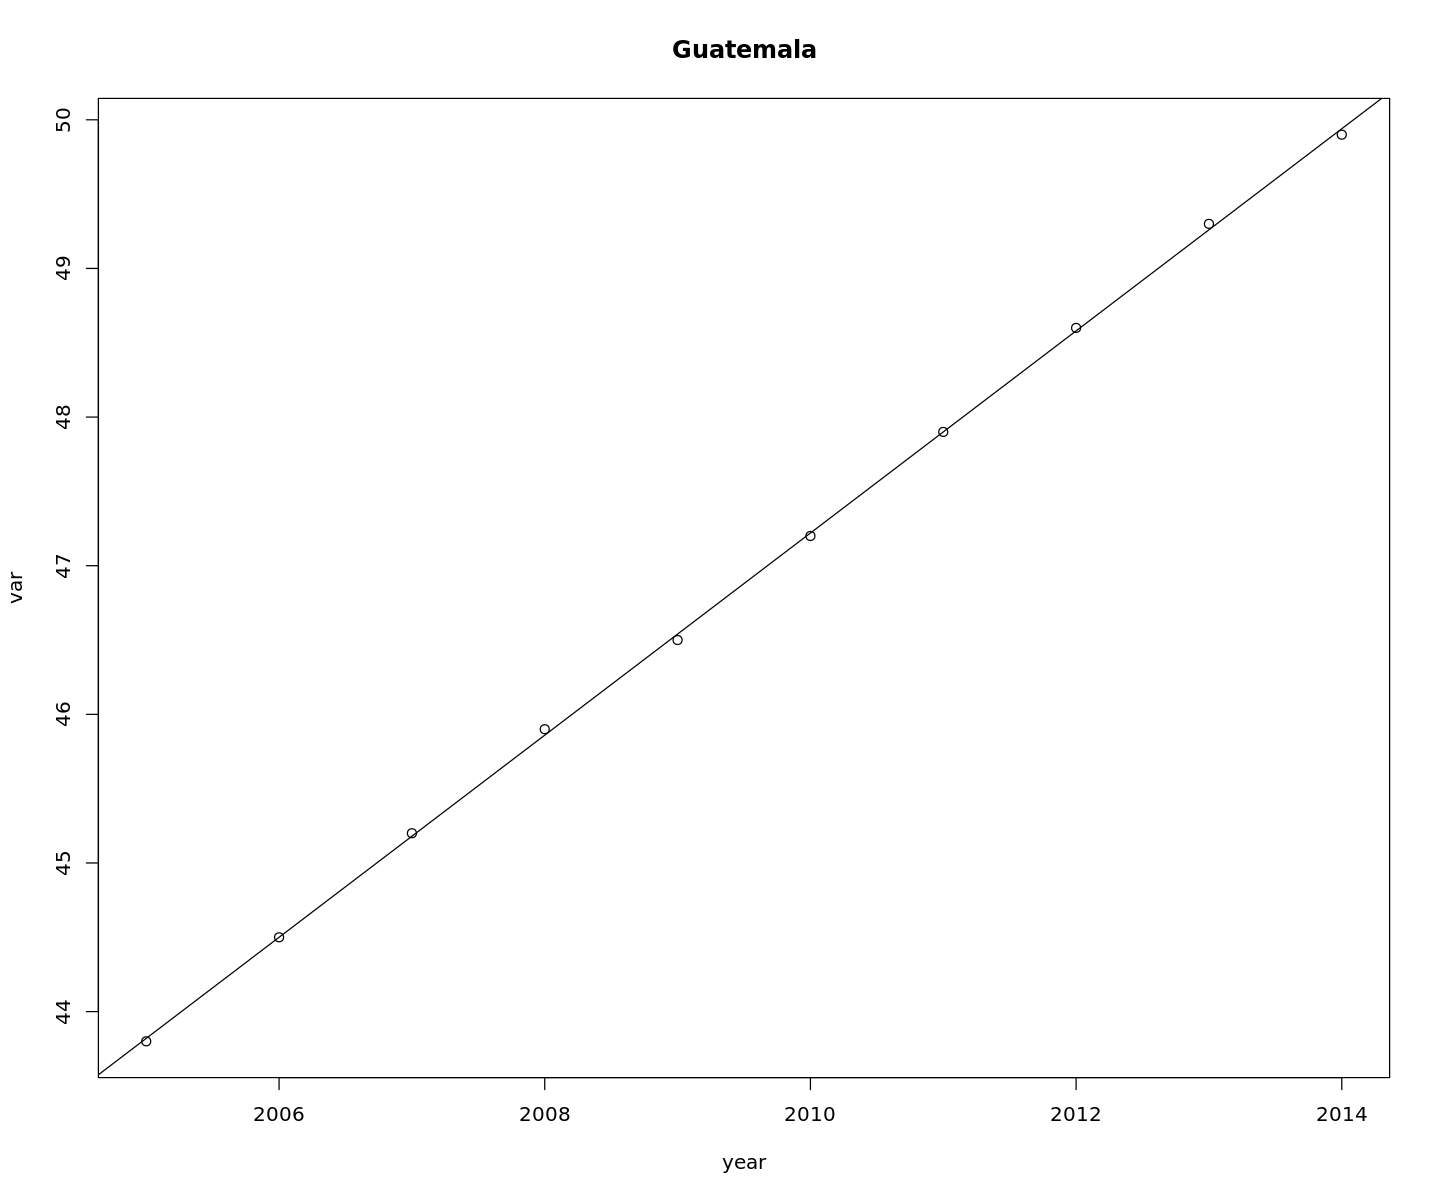

[1] "Guinea-Bissau"


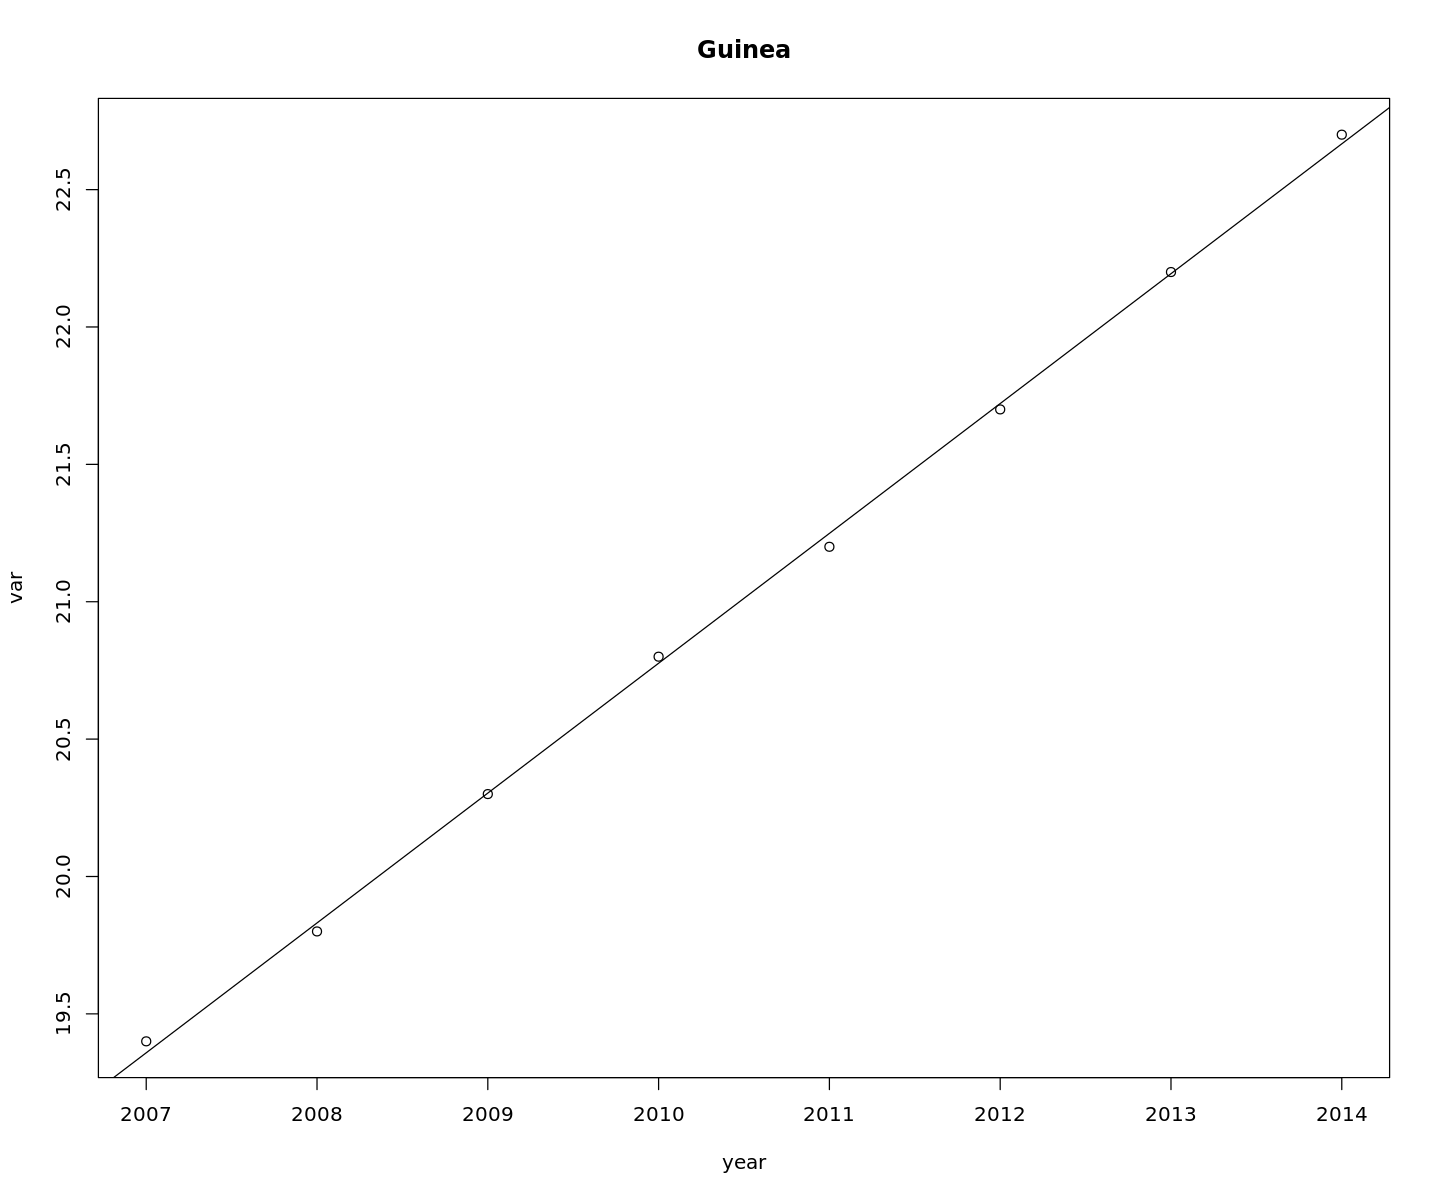

[1] "Guyana"


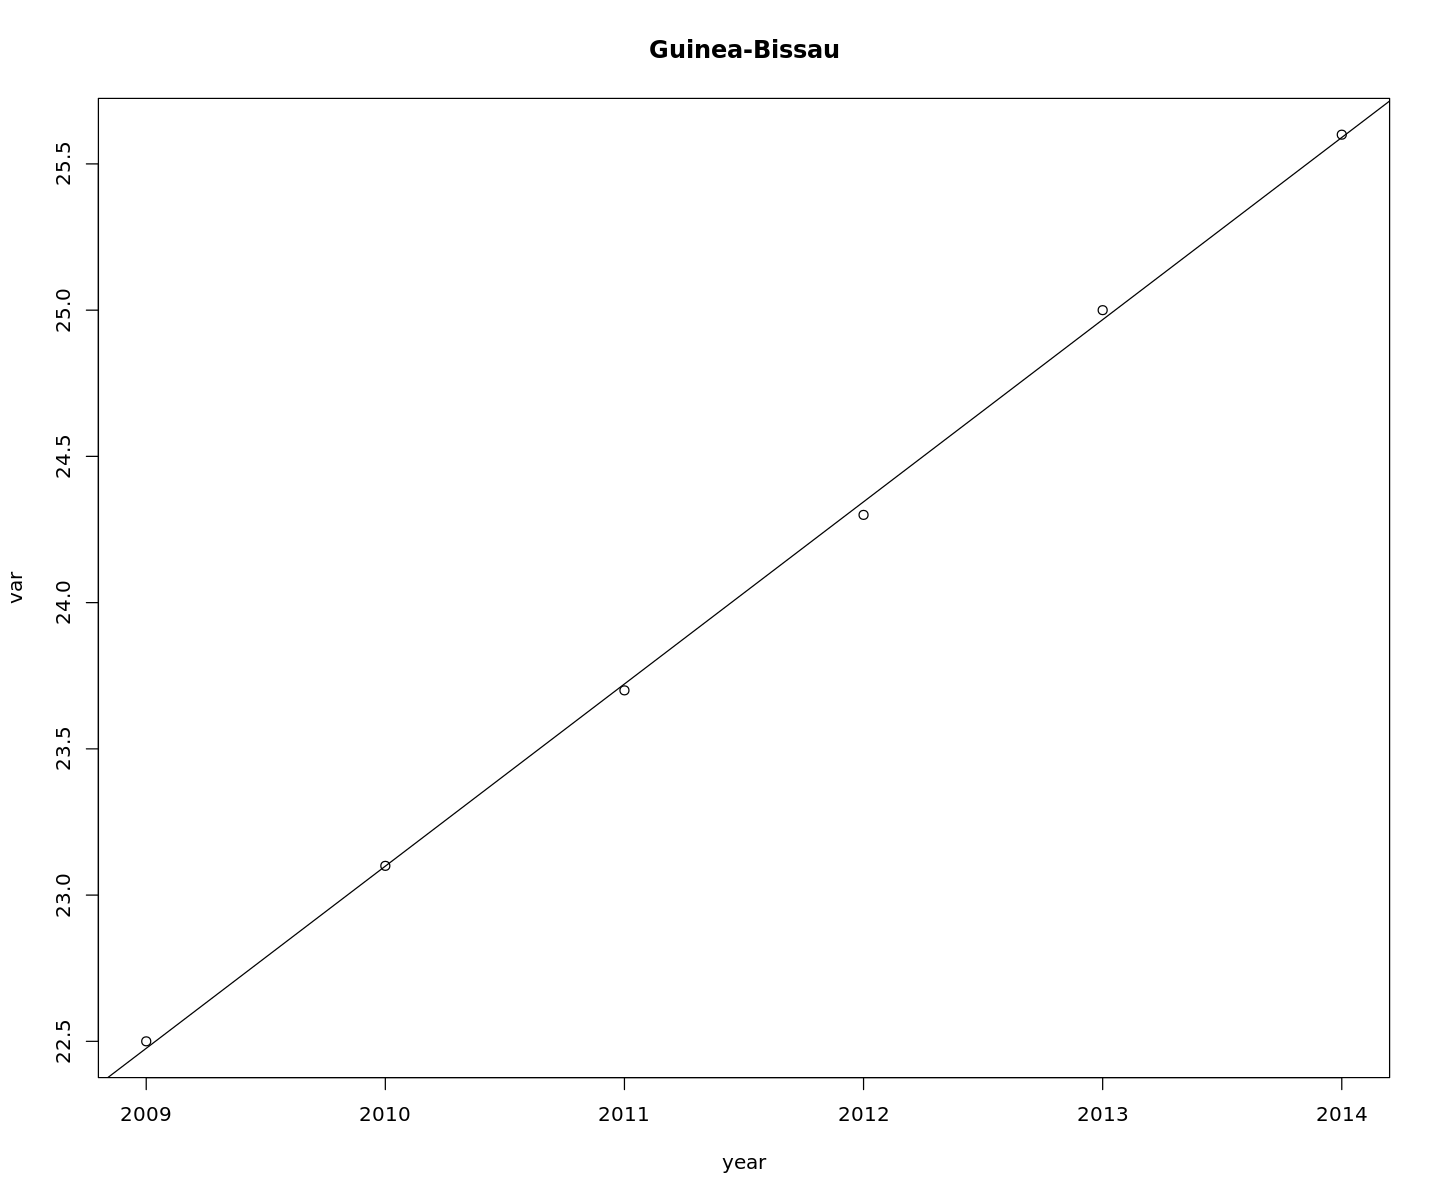

[1] "Haiti"
[1] "skipped"
[1] "Honduras"


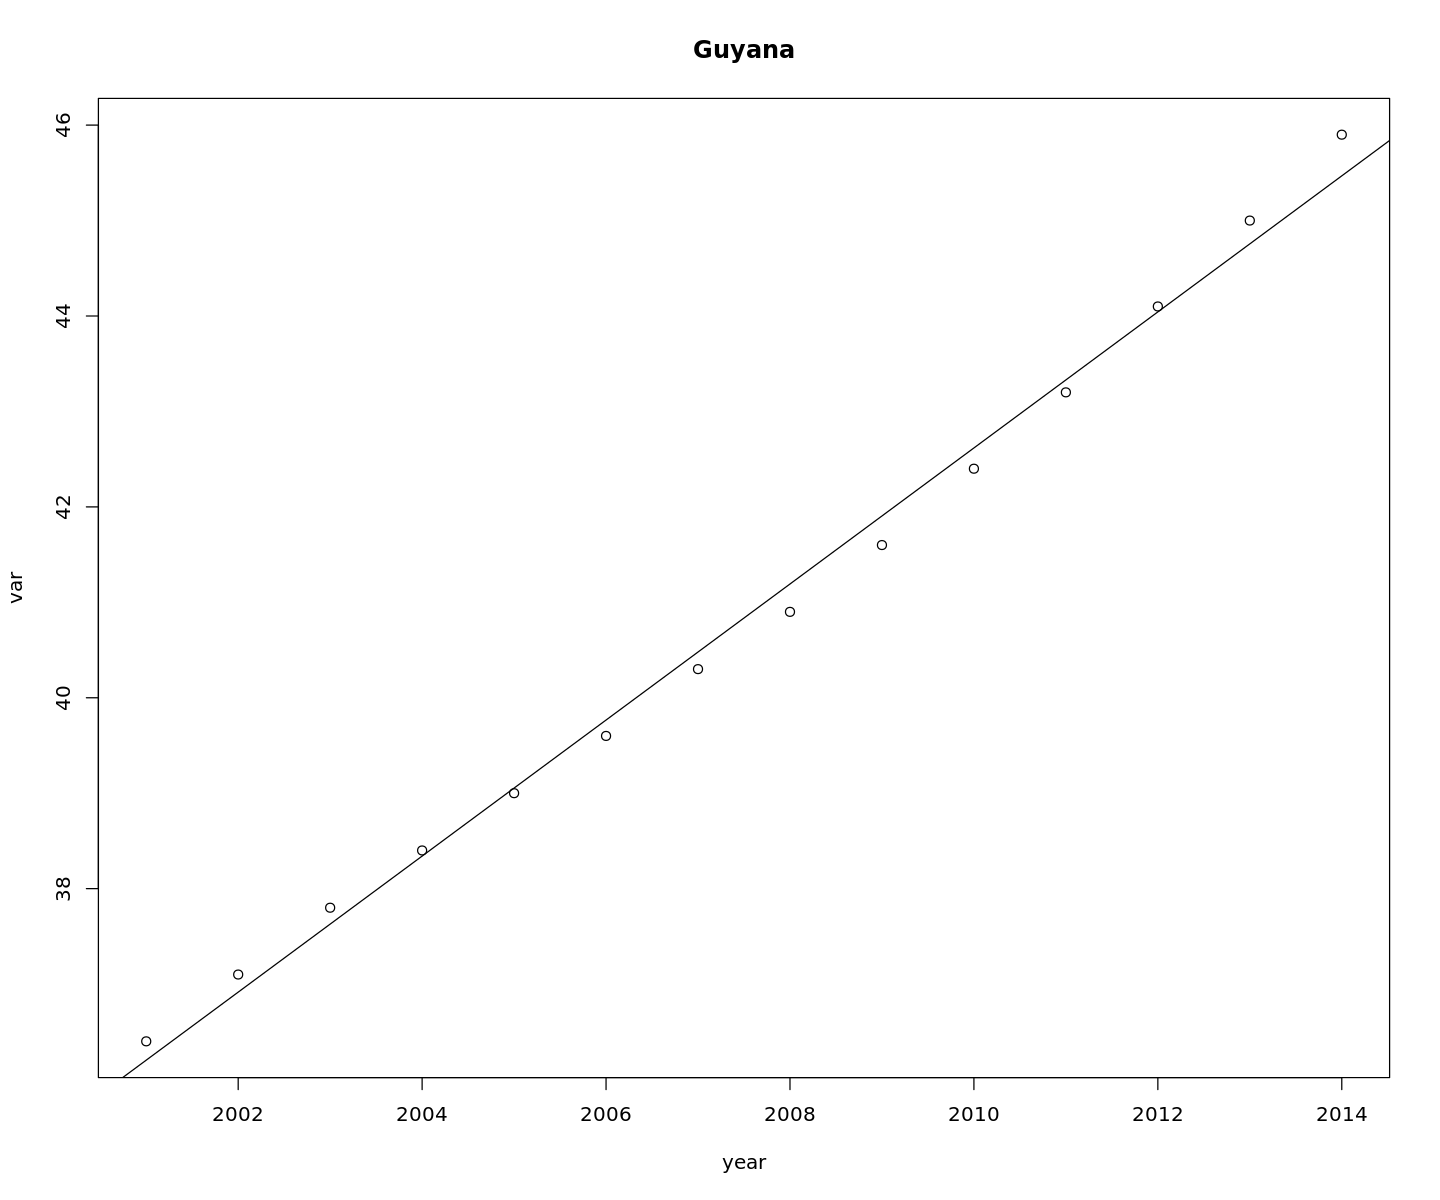

[1] "India"


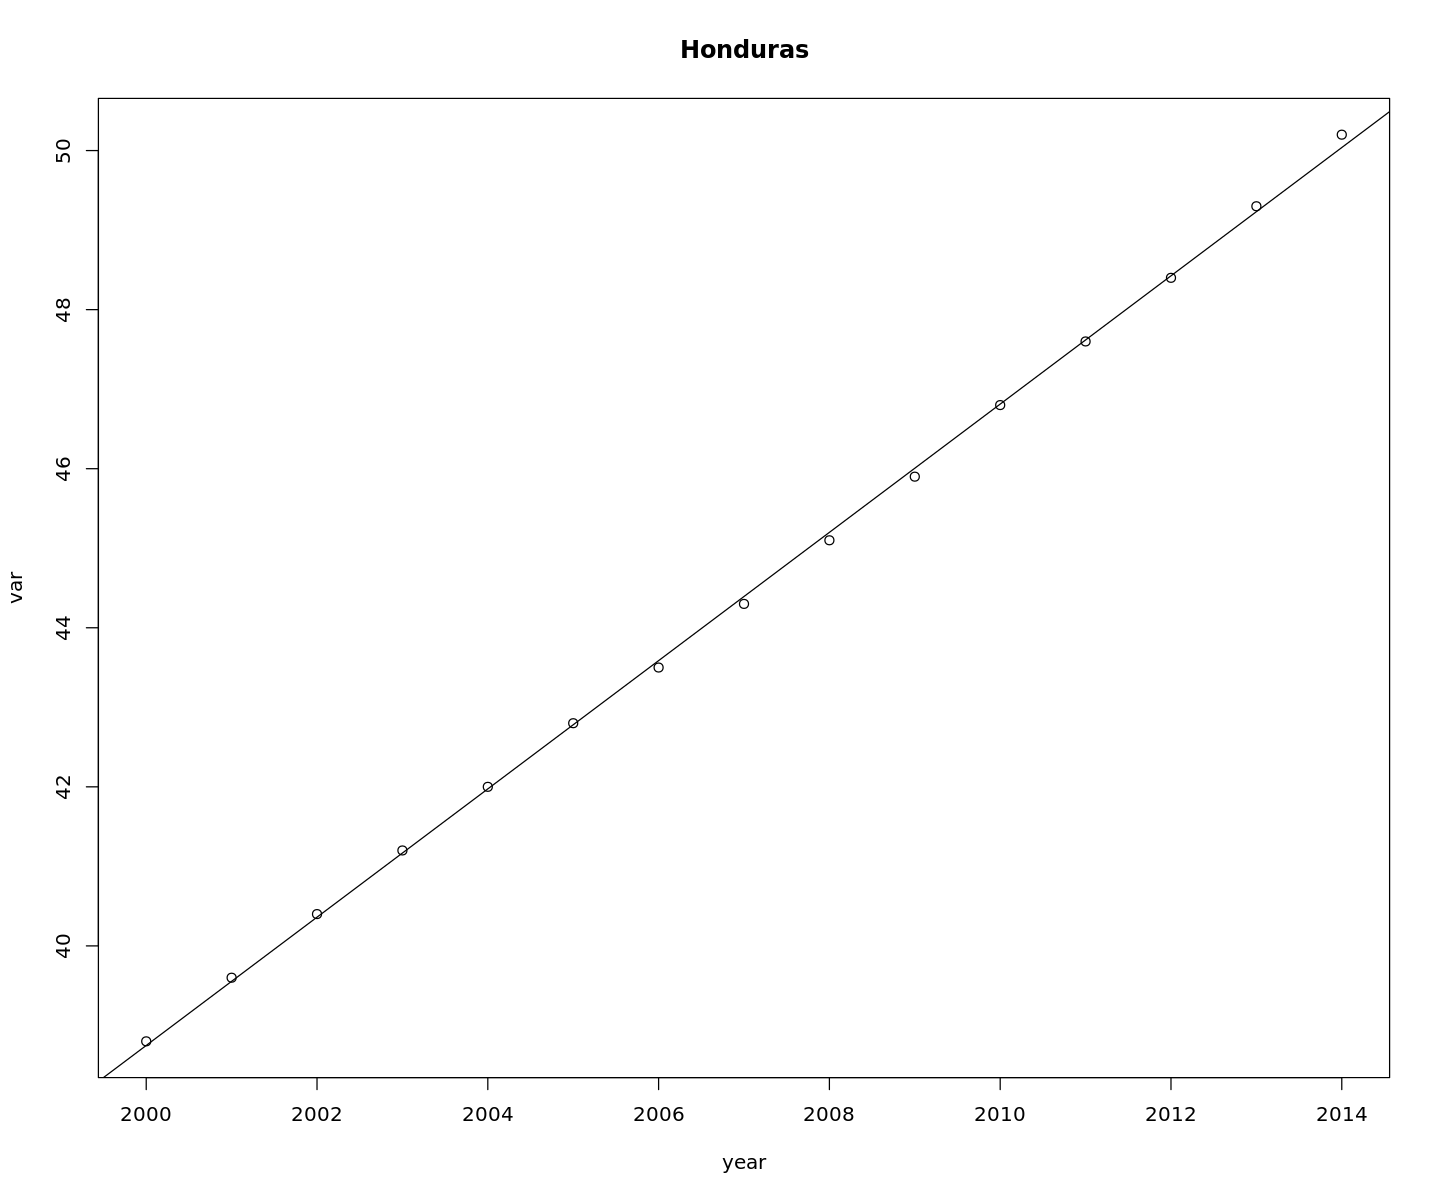

[1] "Indonesia"


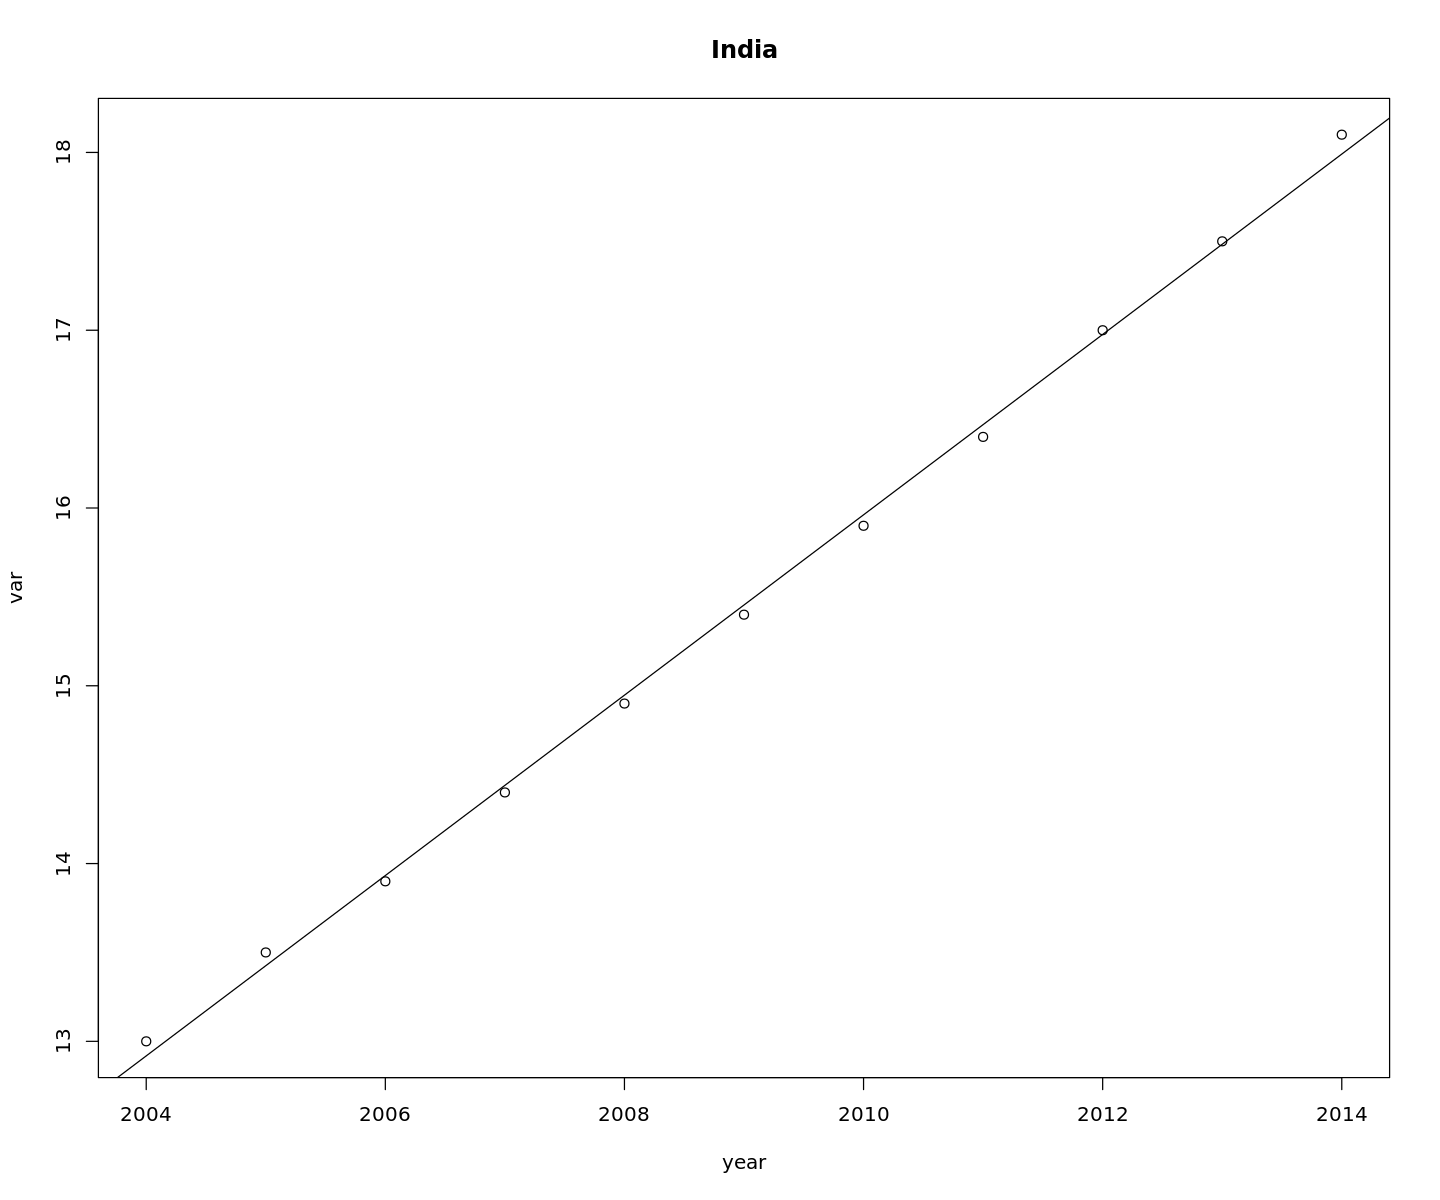

[1] "Iraq"


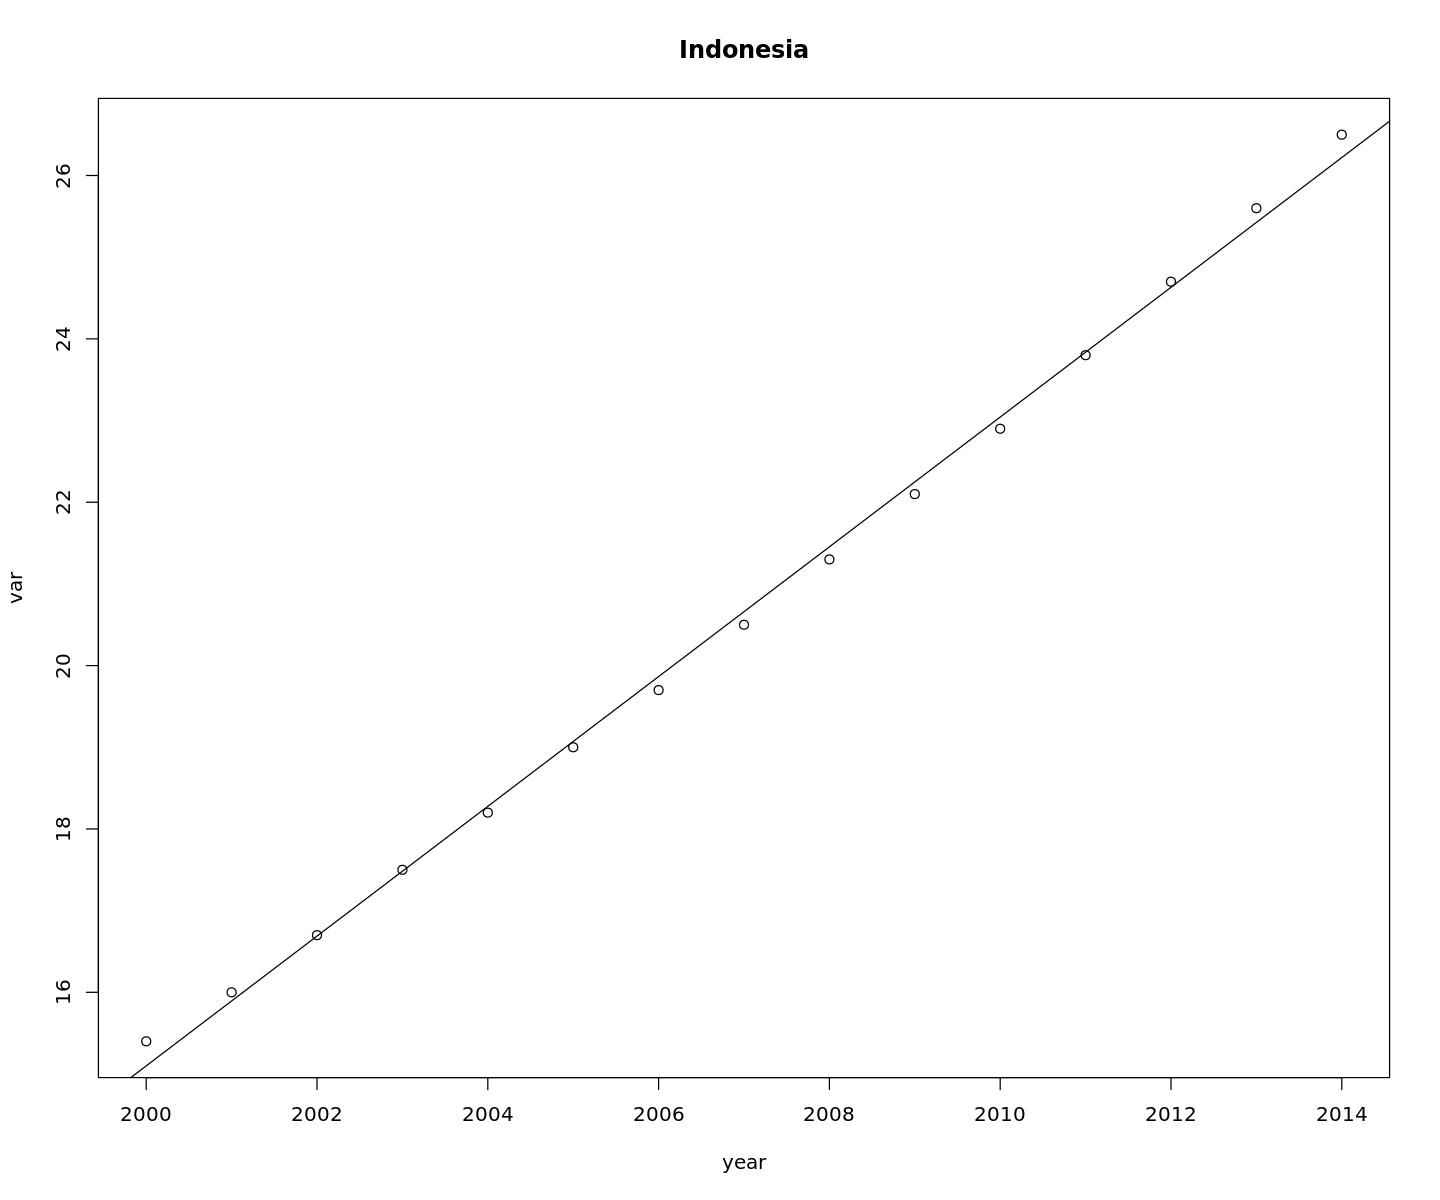

[1] "Ireland"


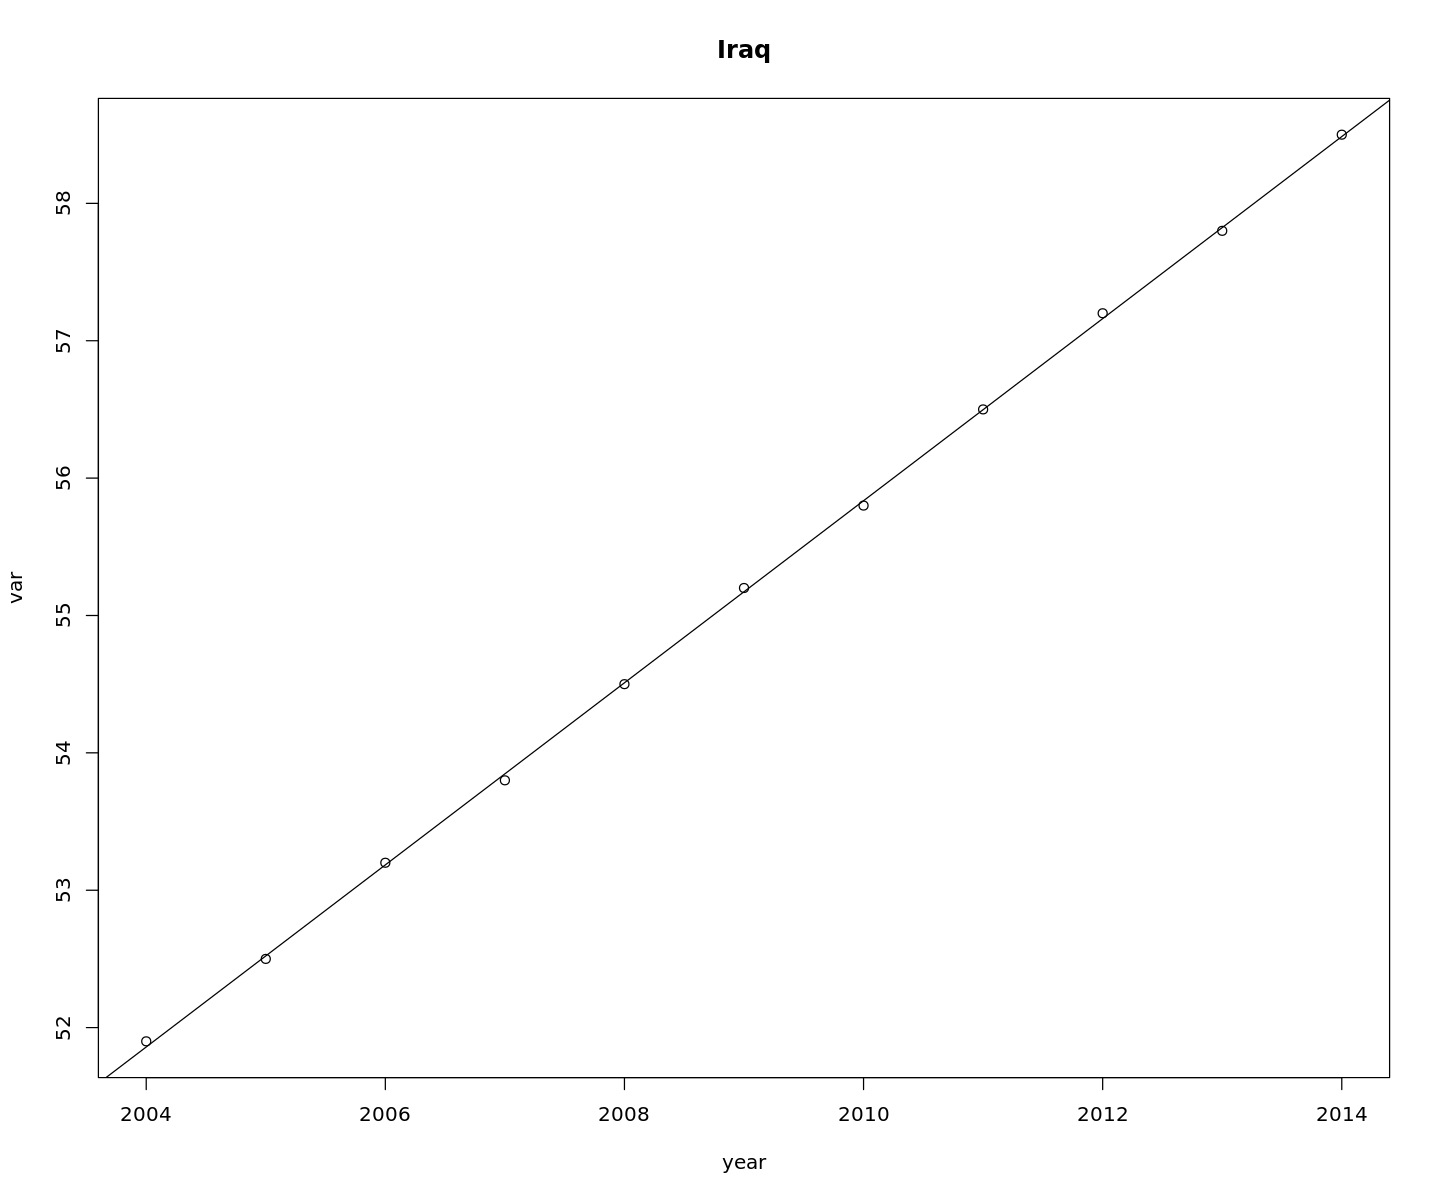

[1] "Israel"


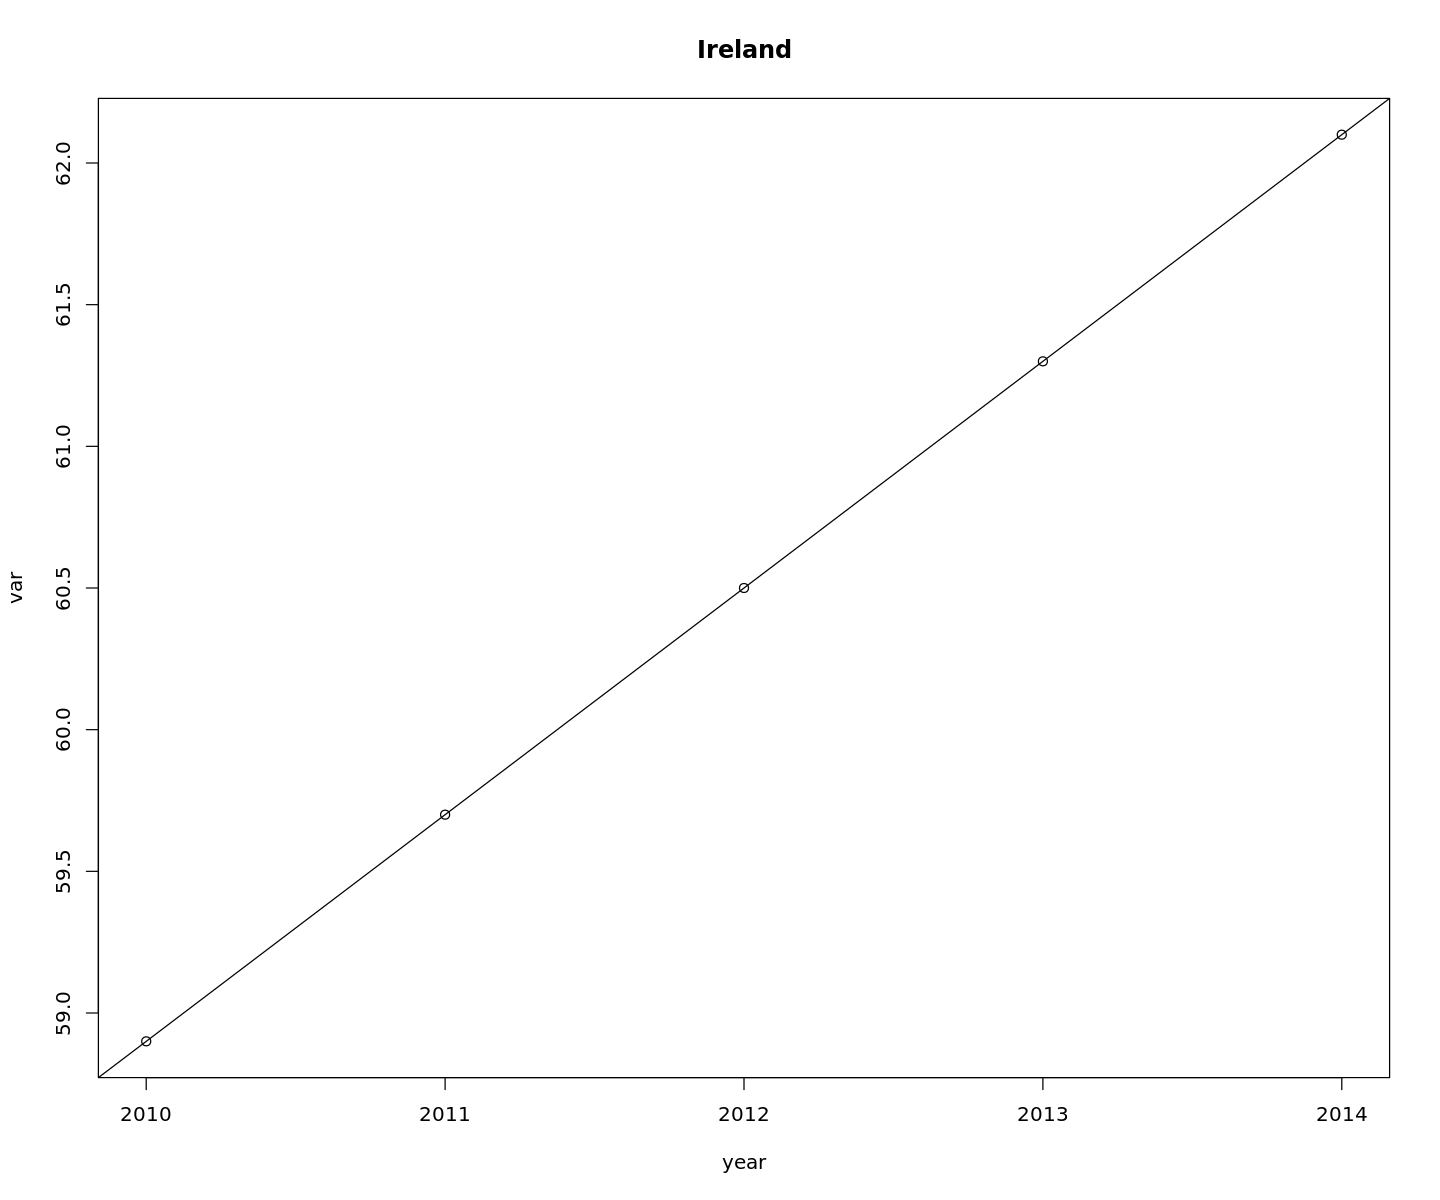

[1] "Italy"


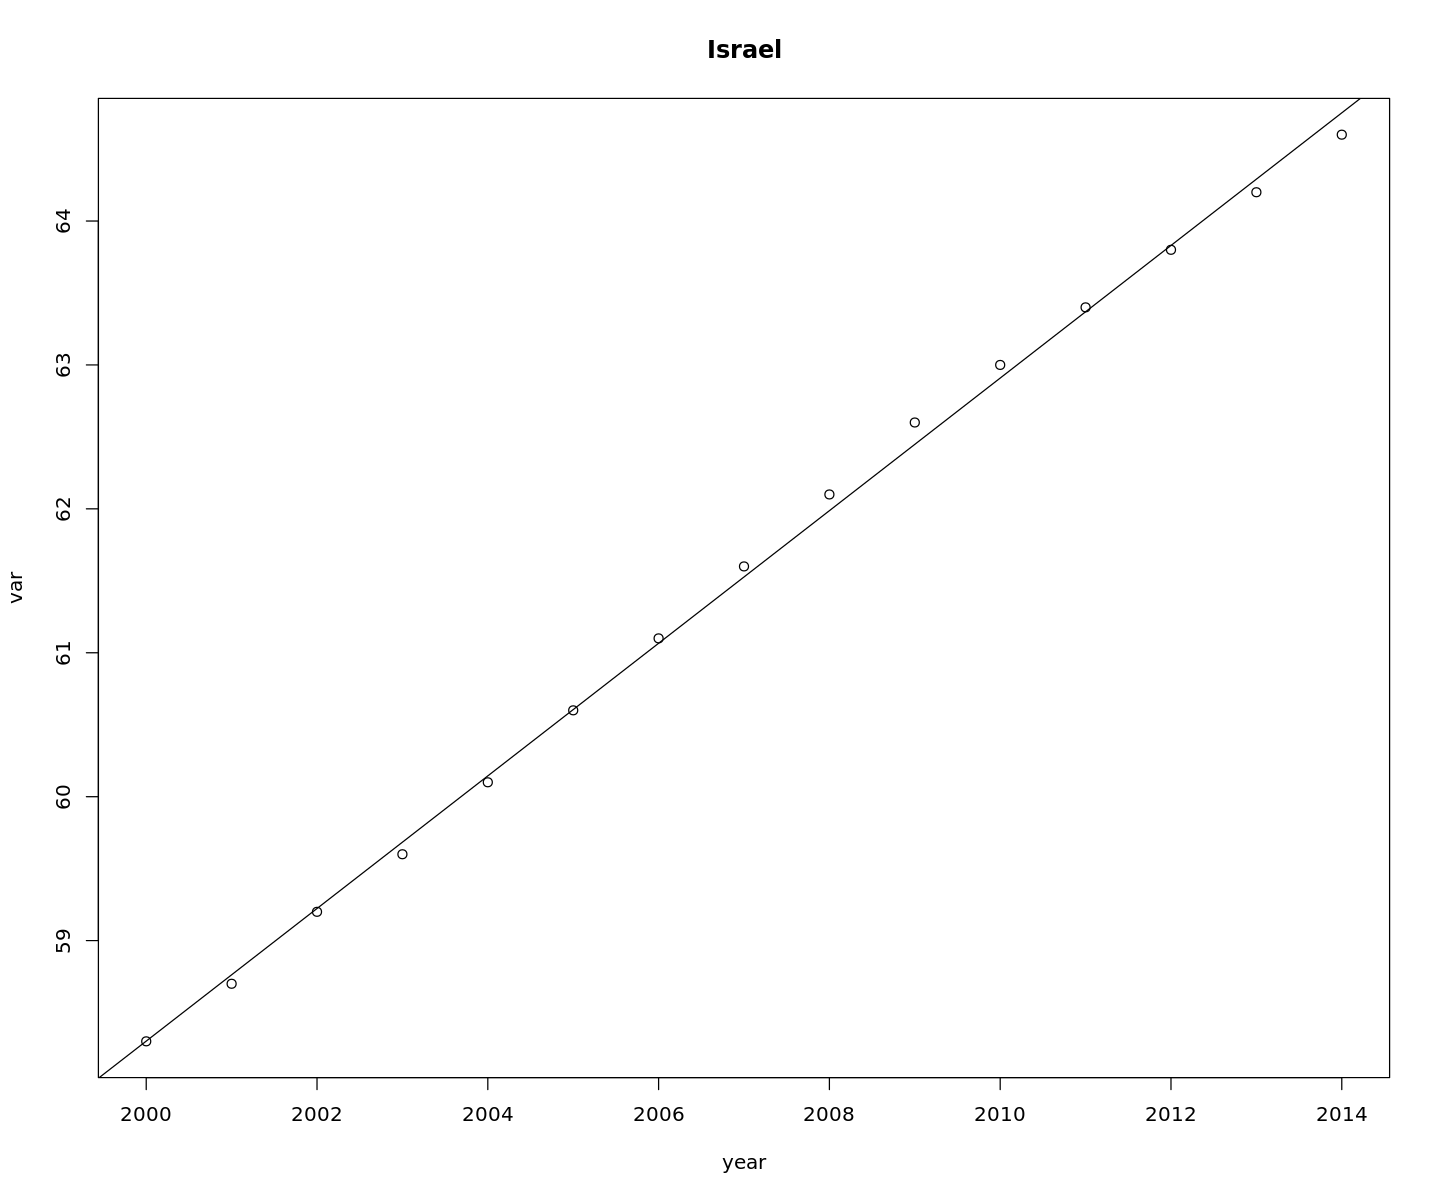

[1] "Jamaica"


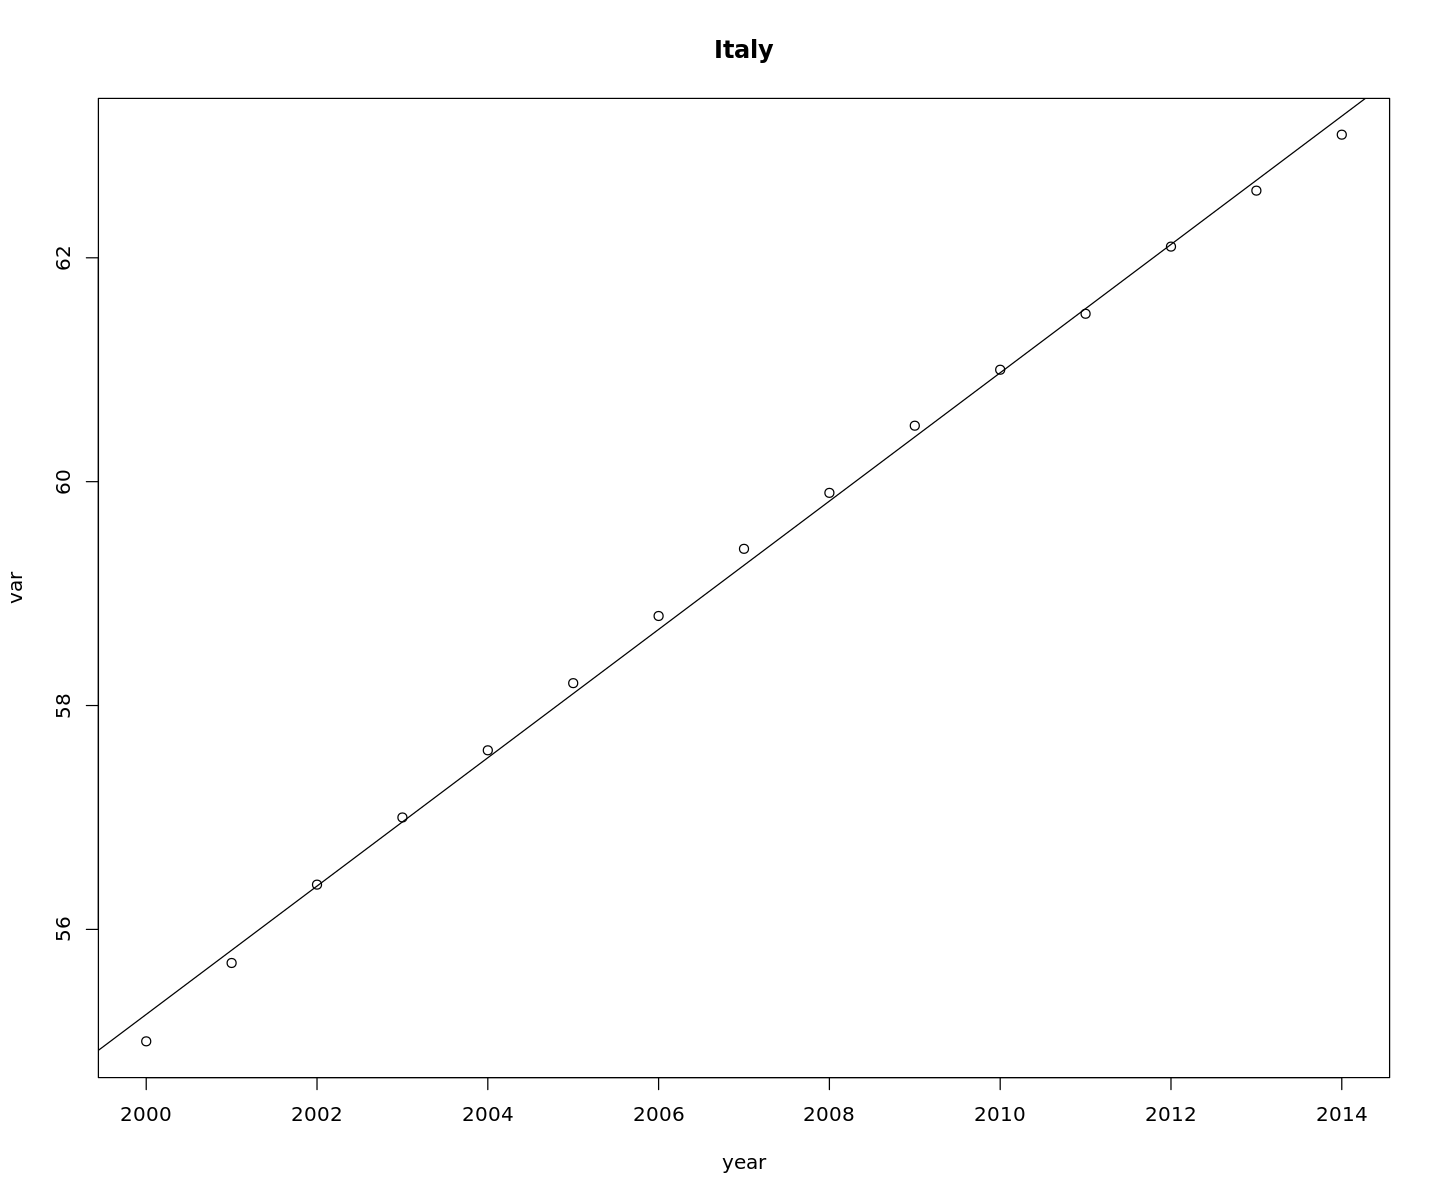

[1] "Jordan"


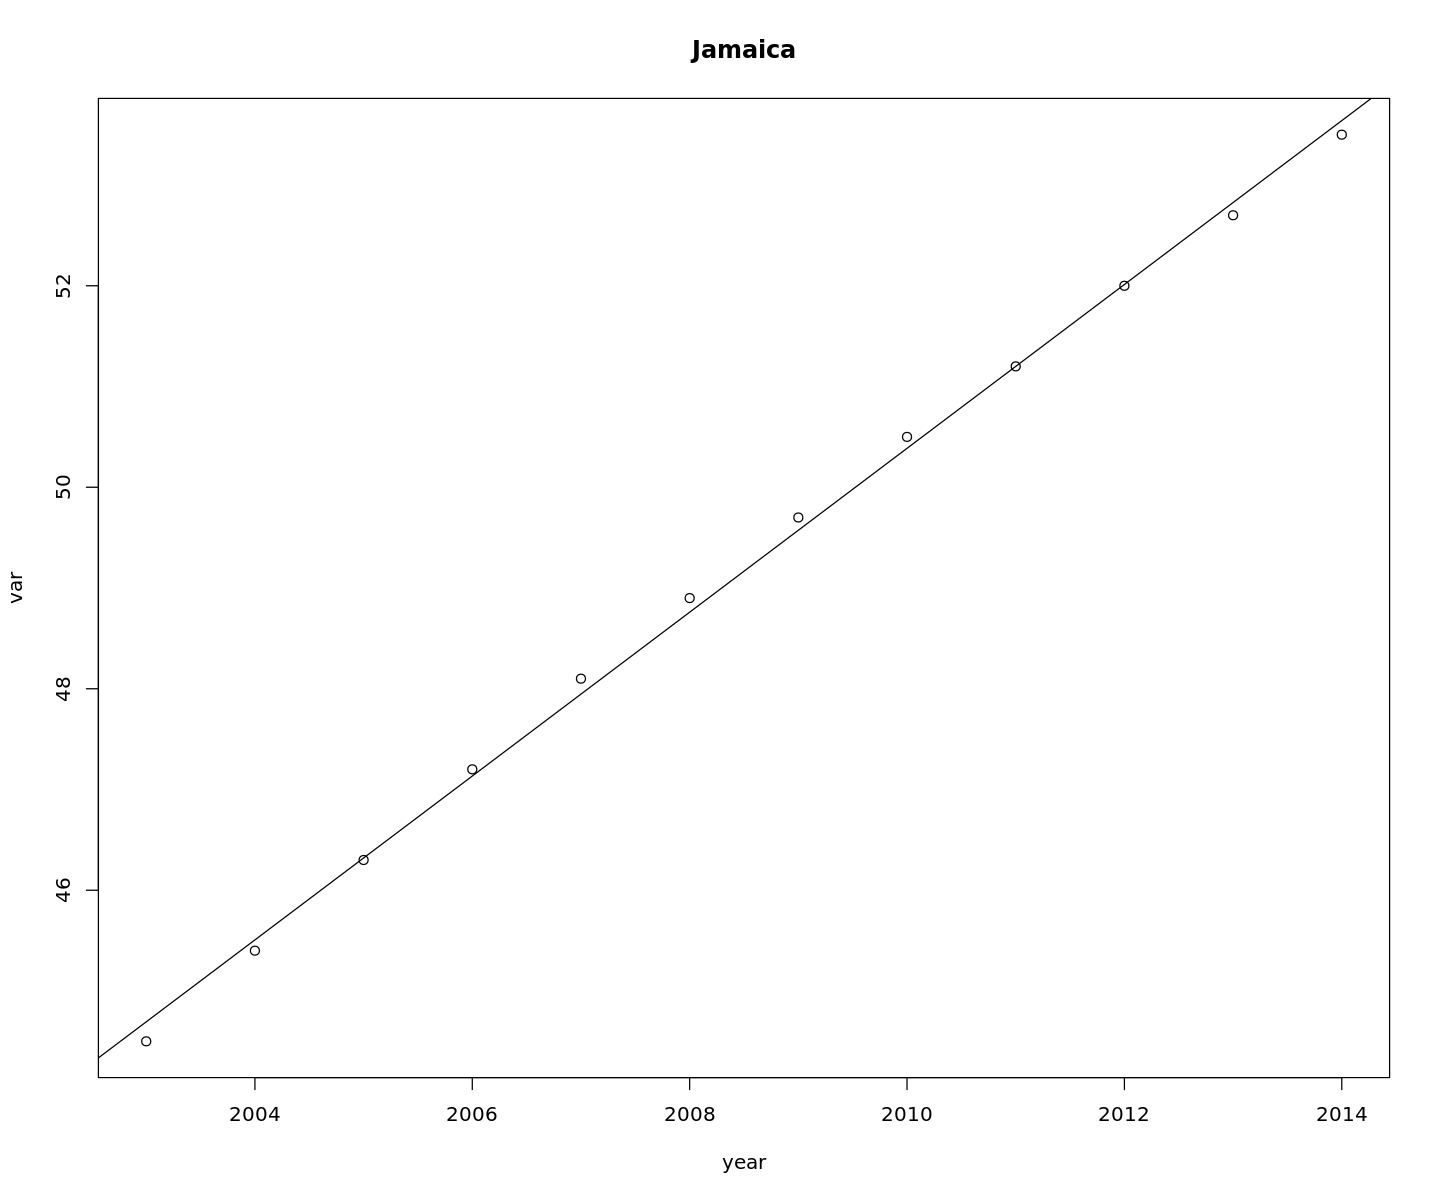

[1] "Kazakhstan"


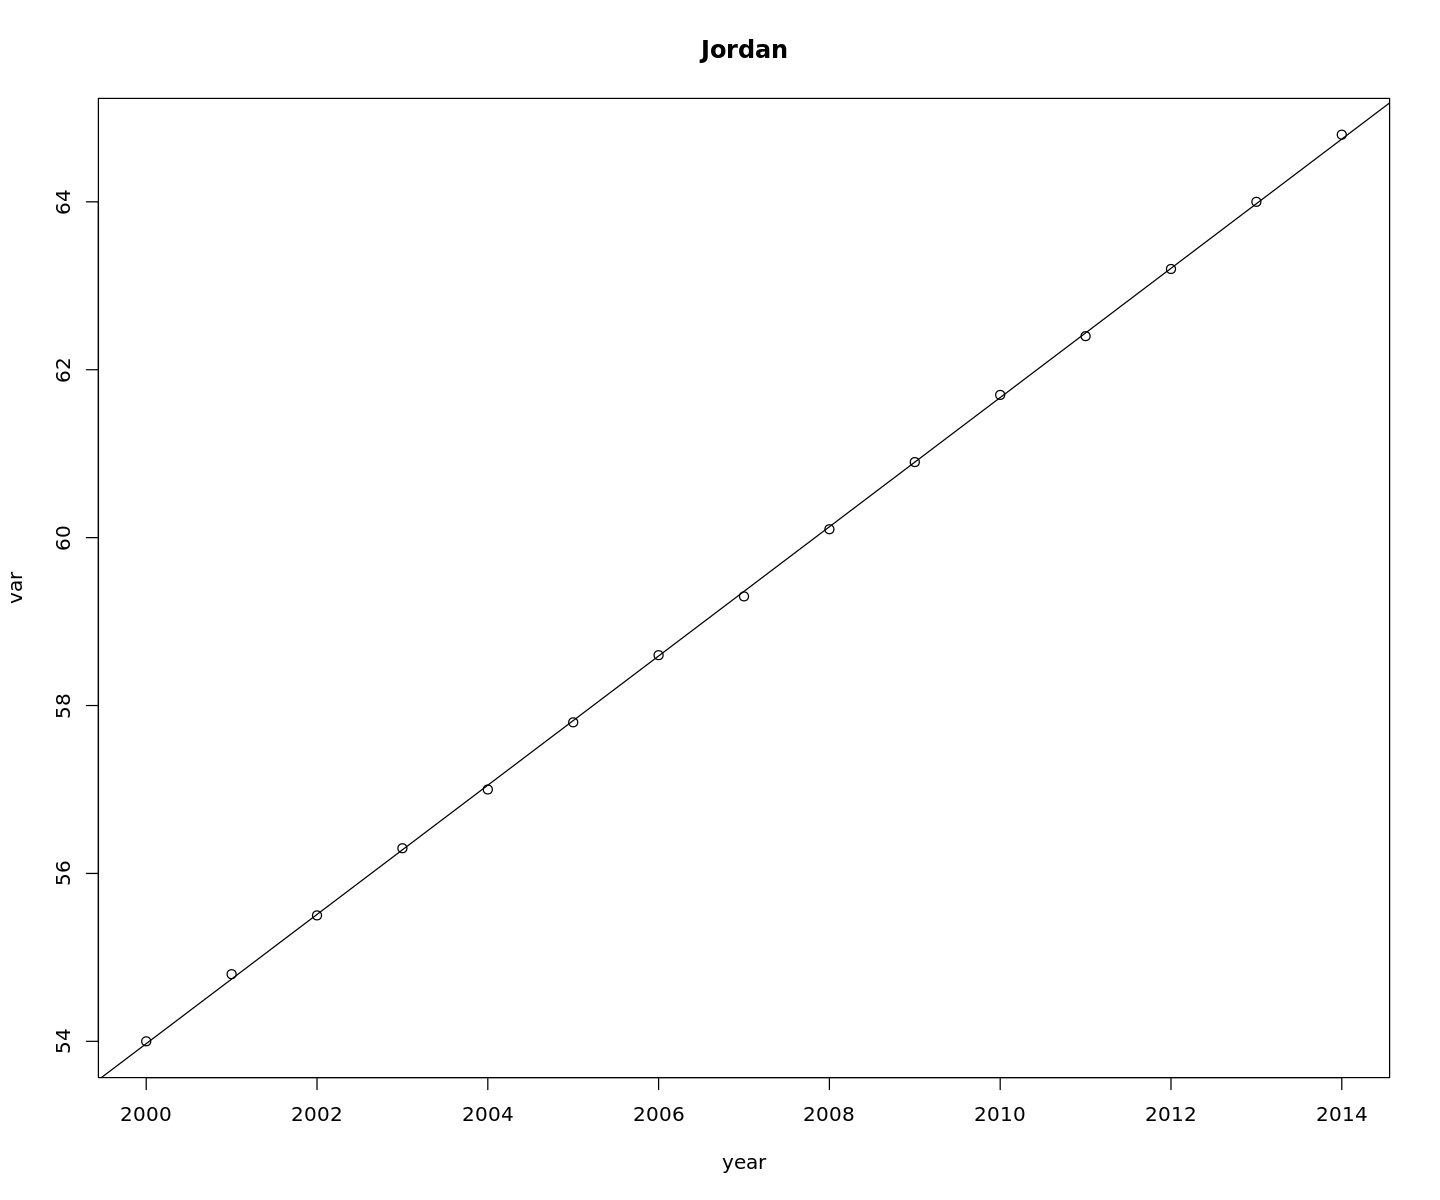

[1] "Kenya"


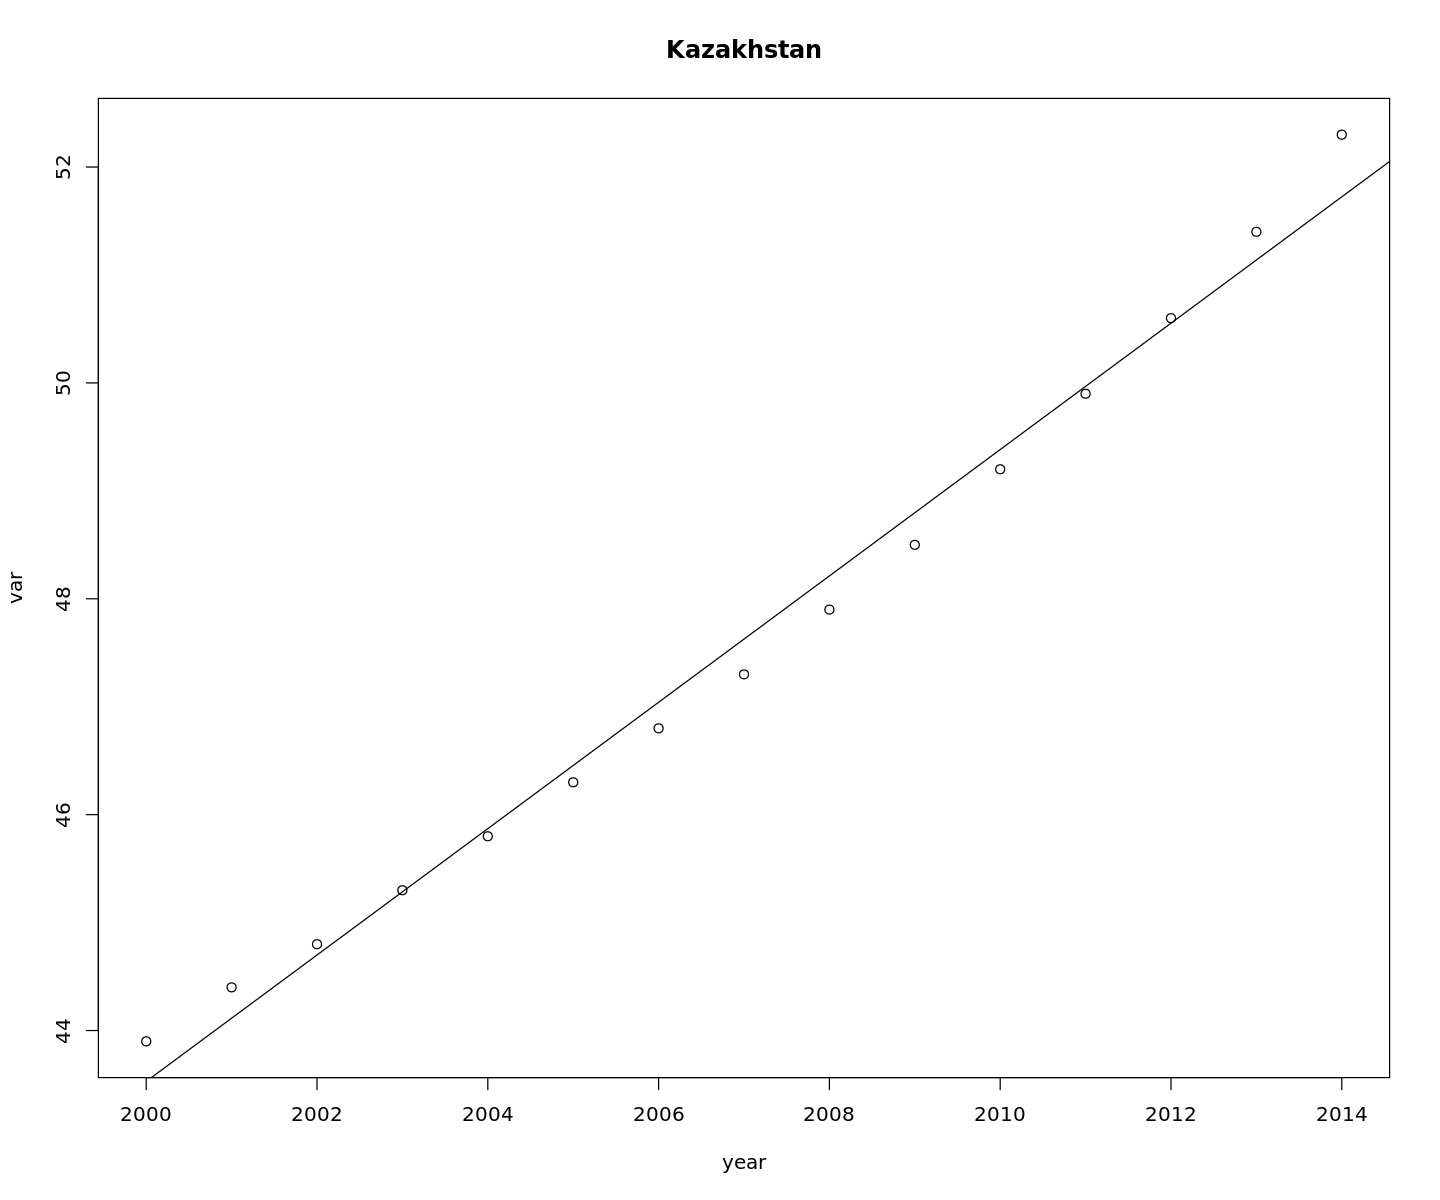

[1] "Kiribati"


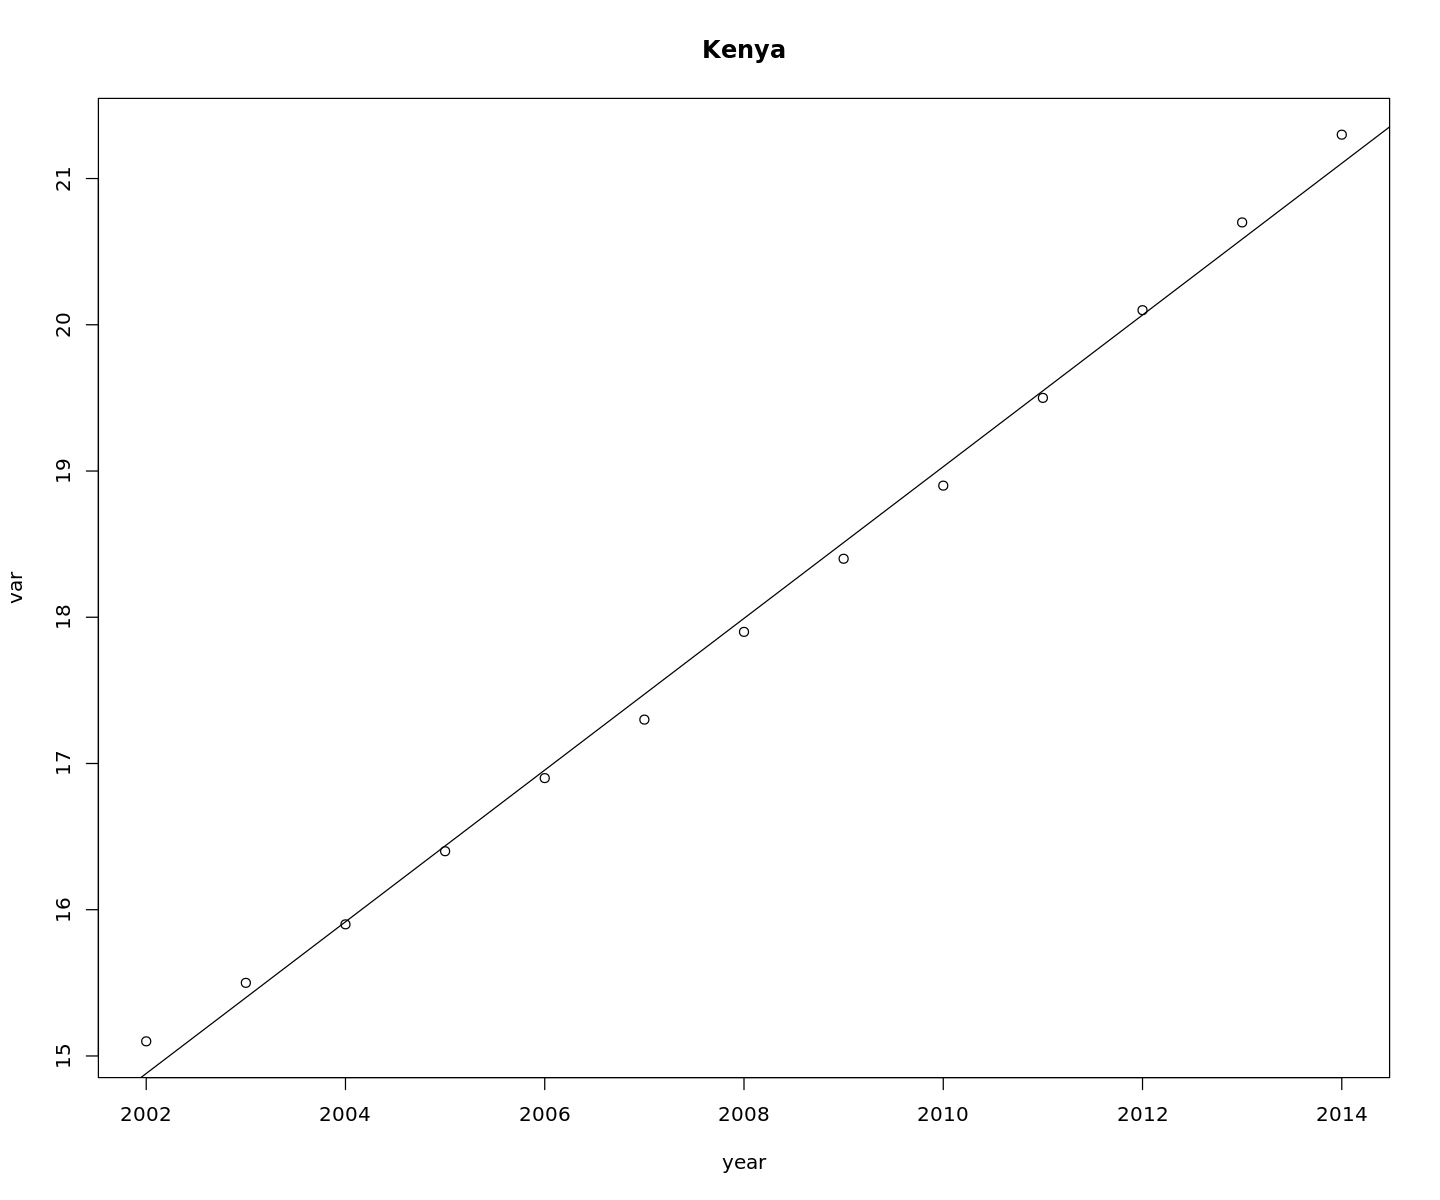

[1] "Latvia"


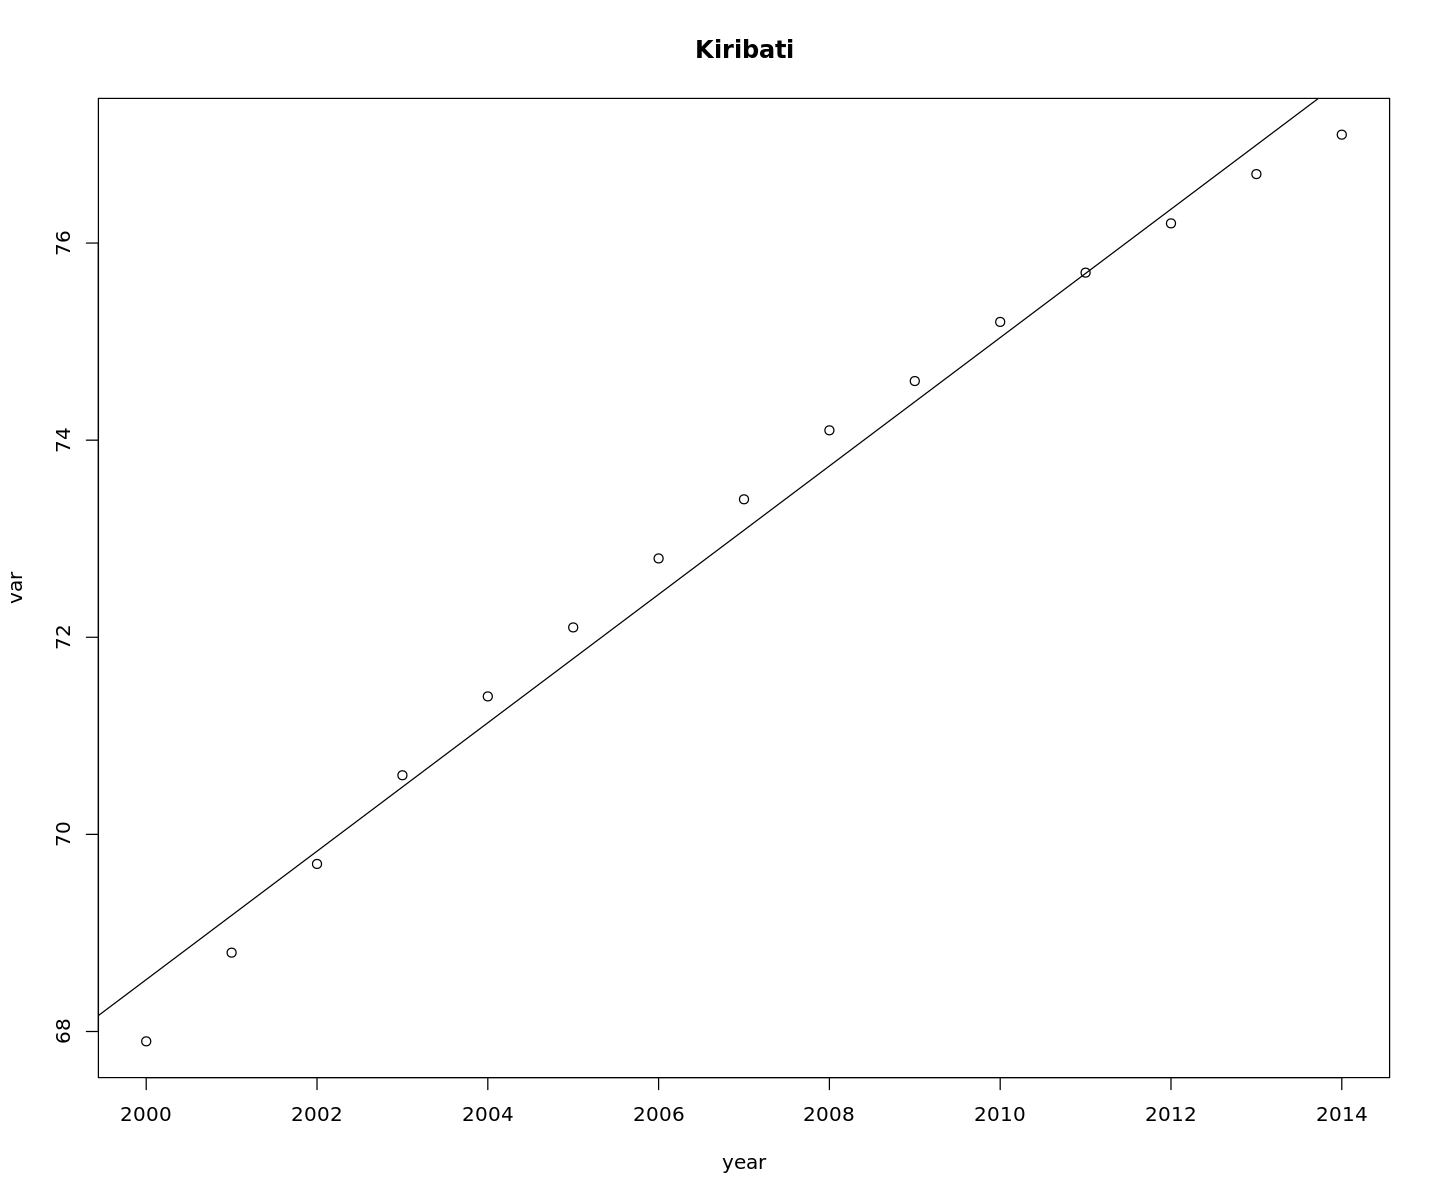

[1] "Lebanon"


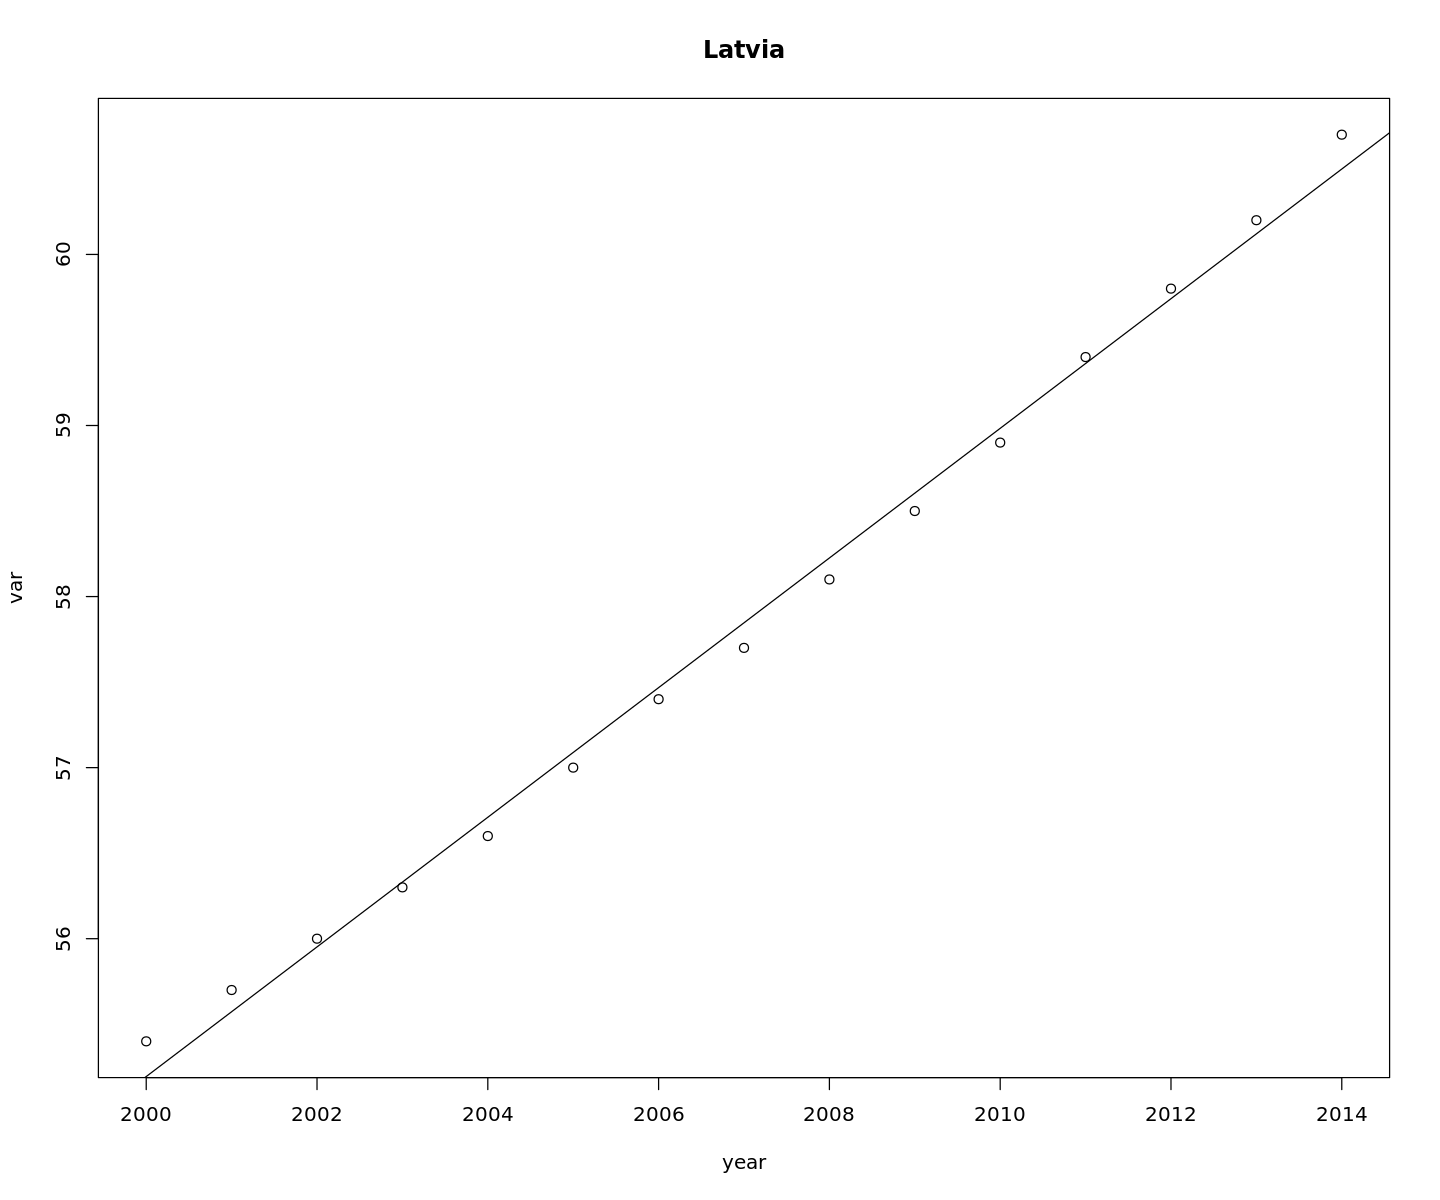

[1] "Lesotho"


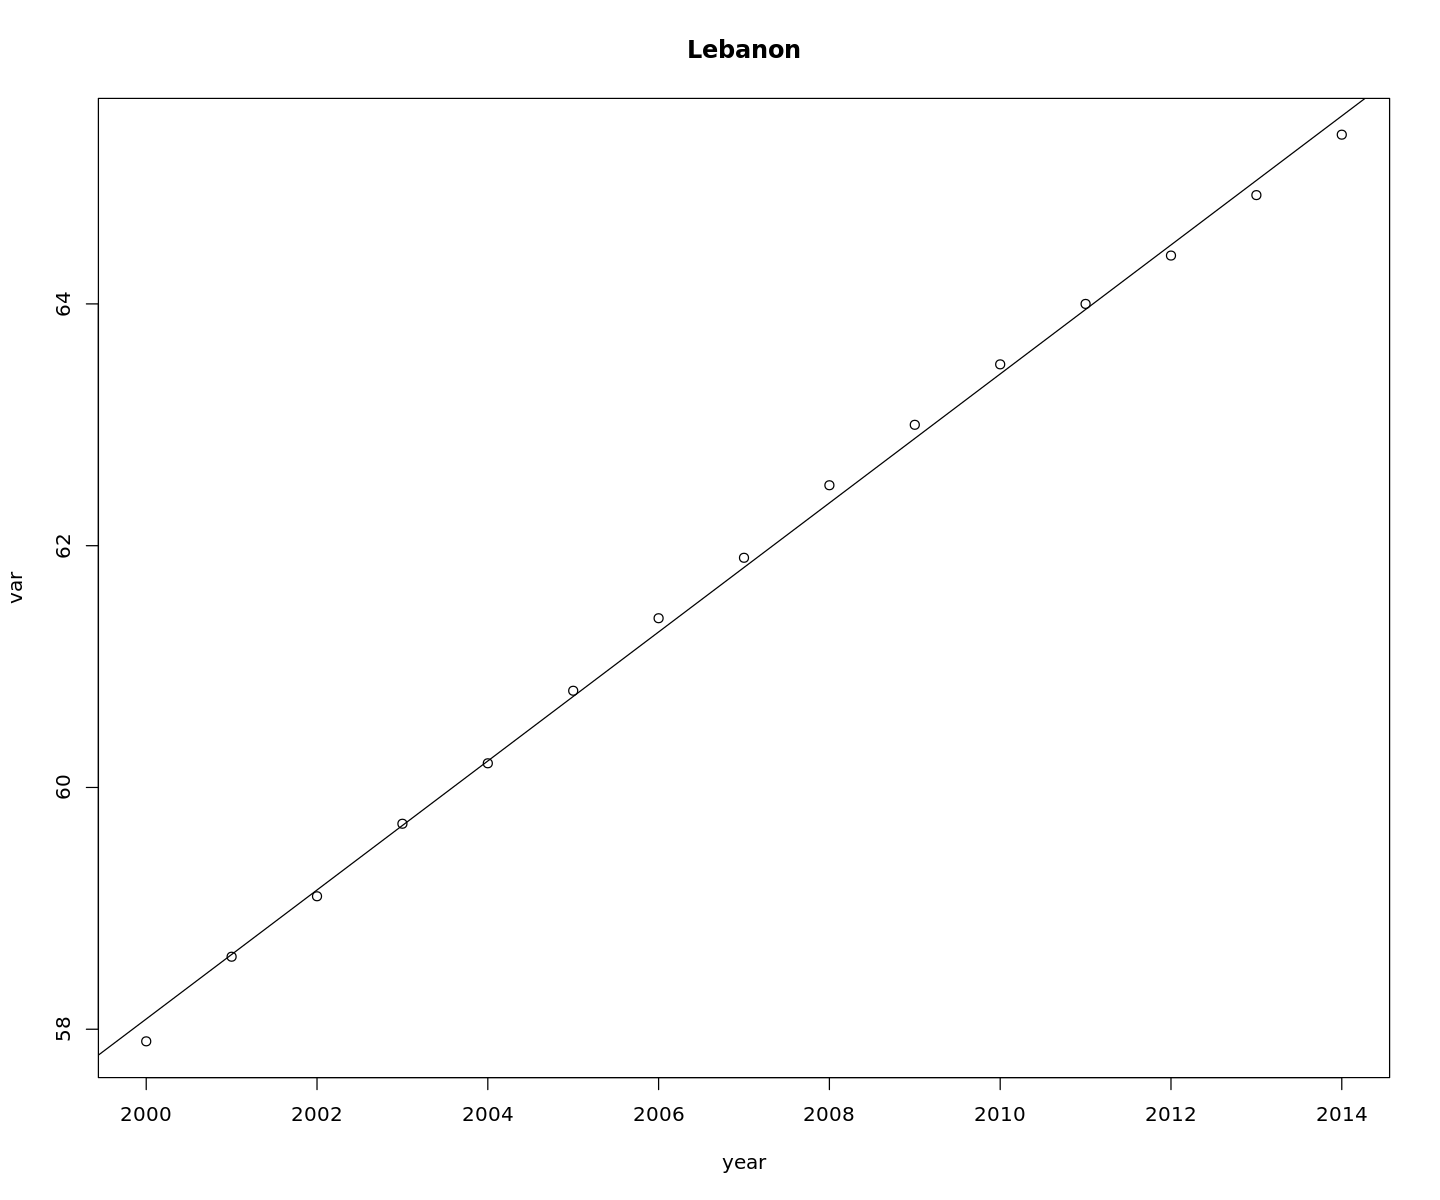

[1] "Liberia"


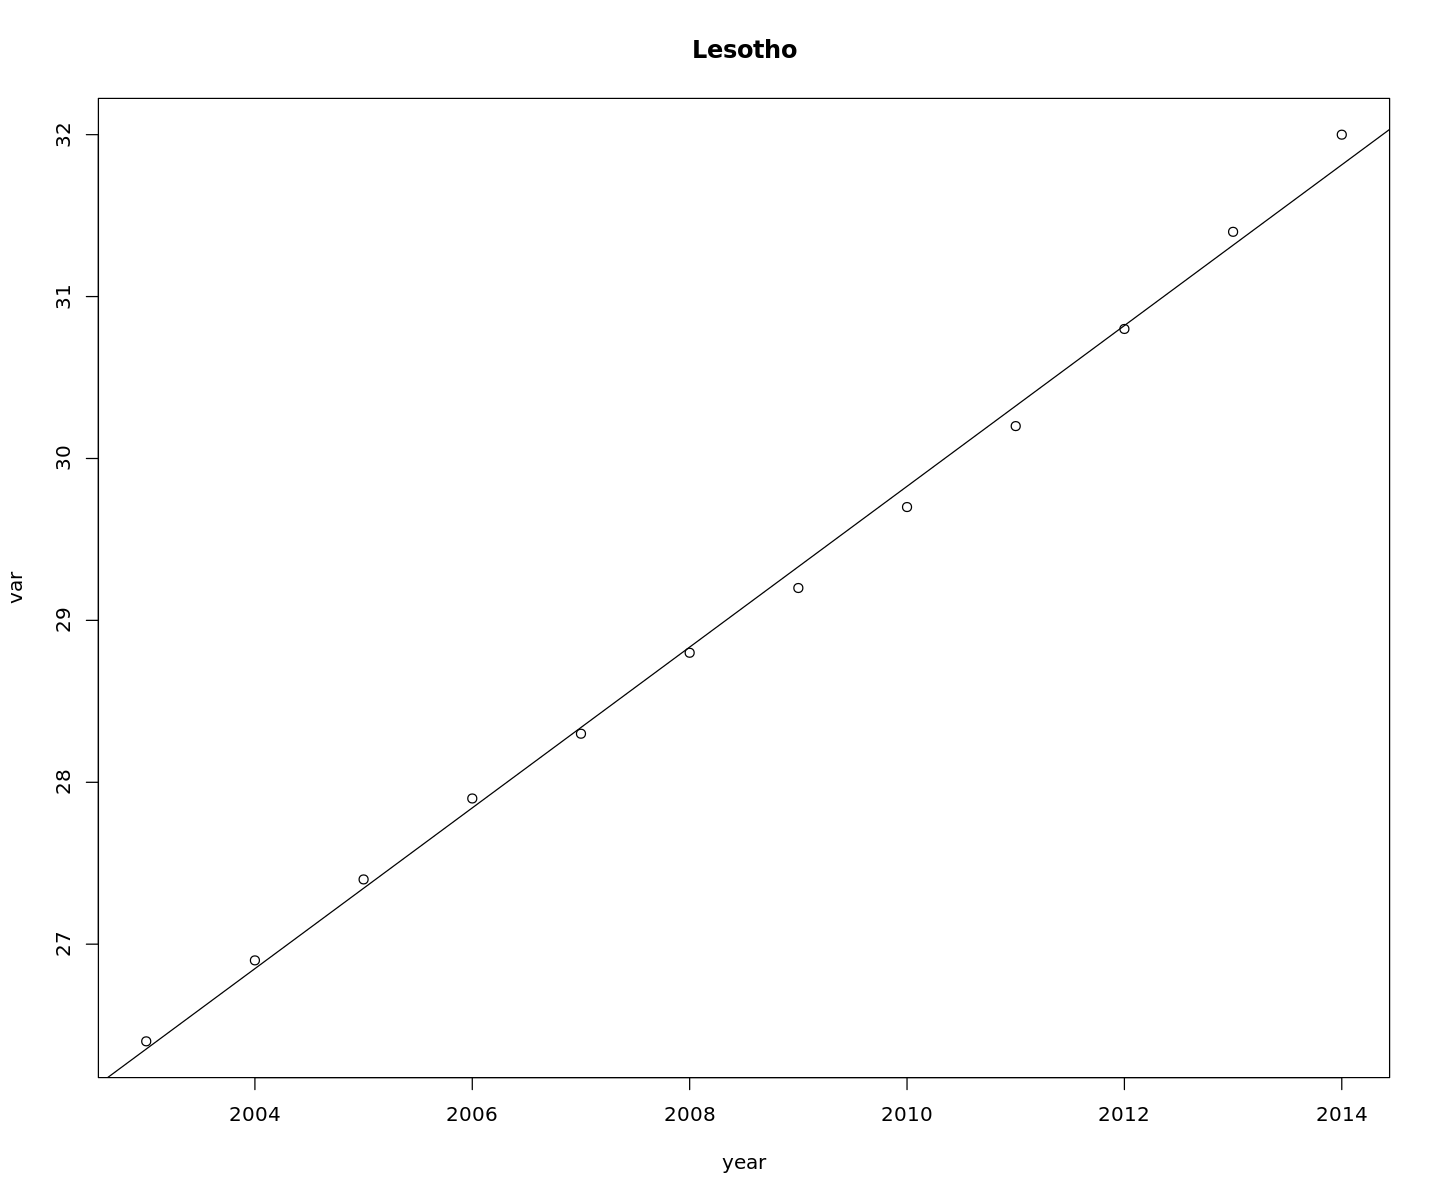

[1] "Lithuania"


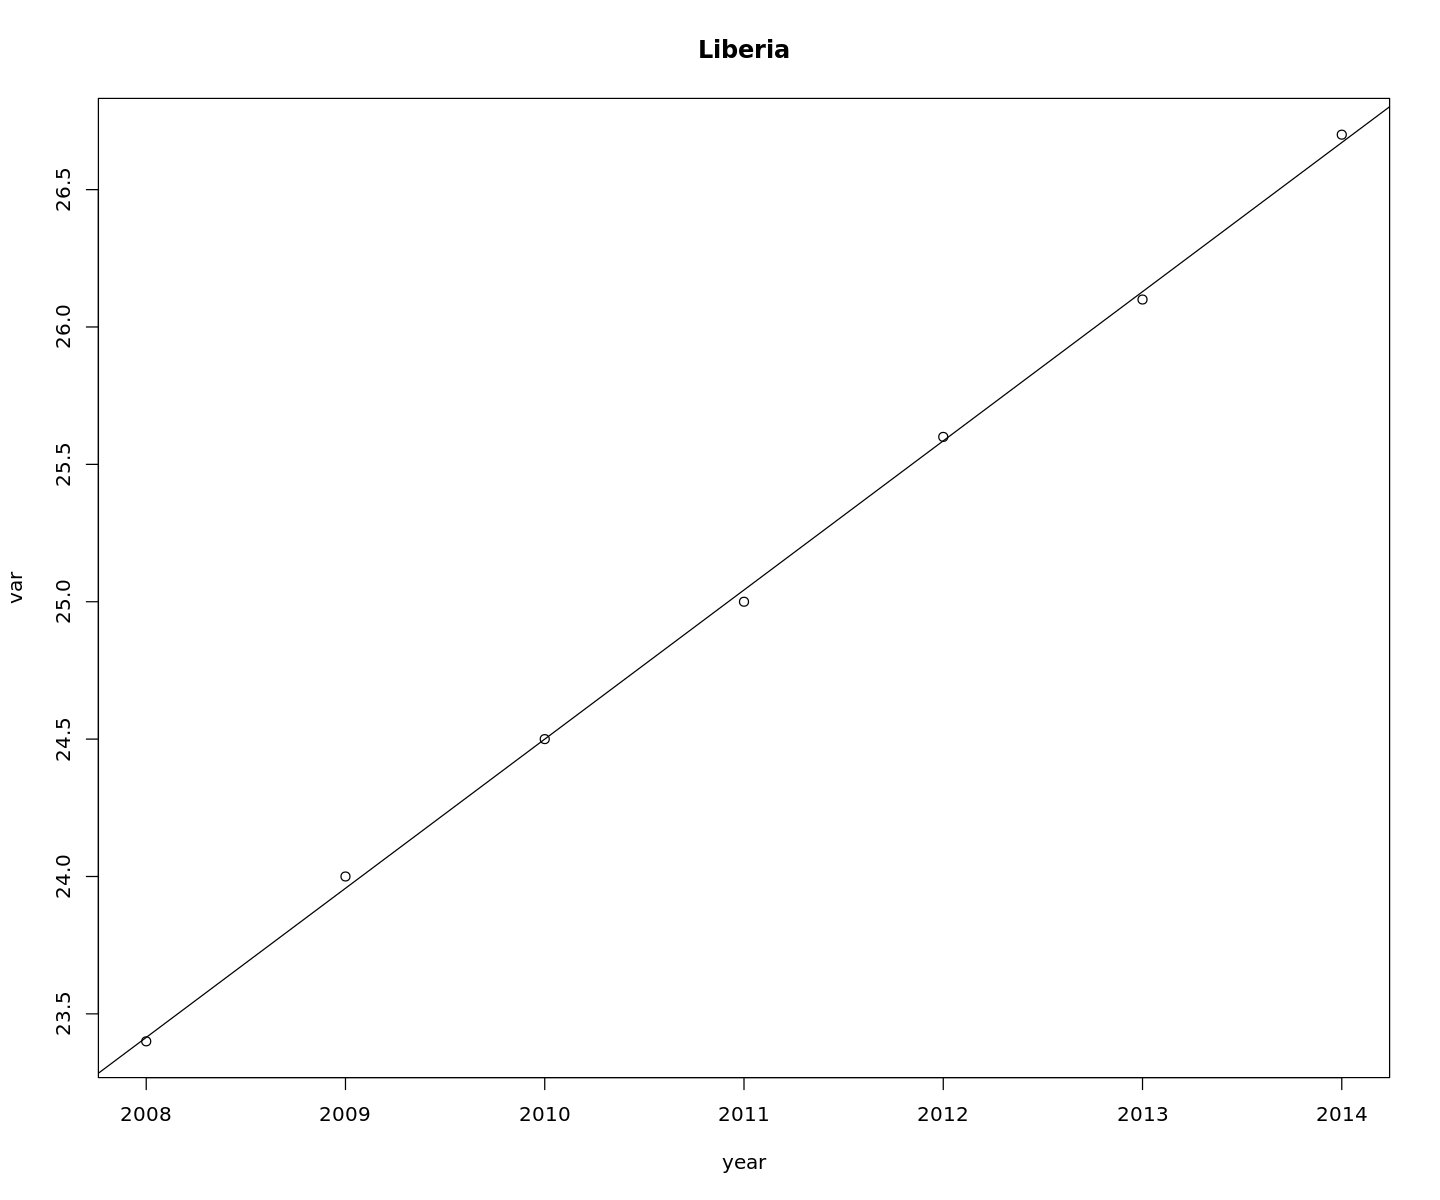

[1] "Luxembourg"


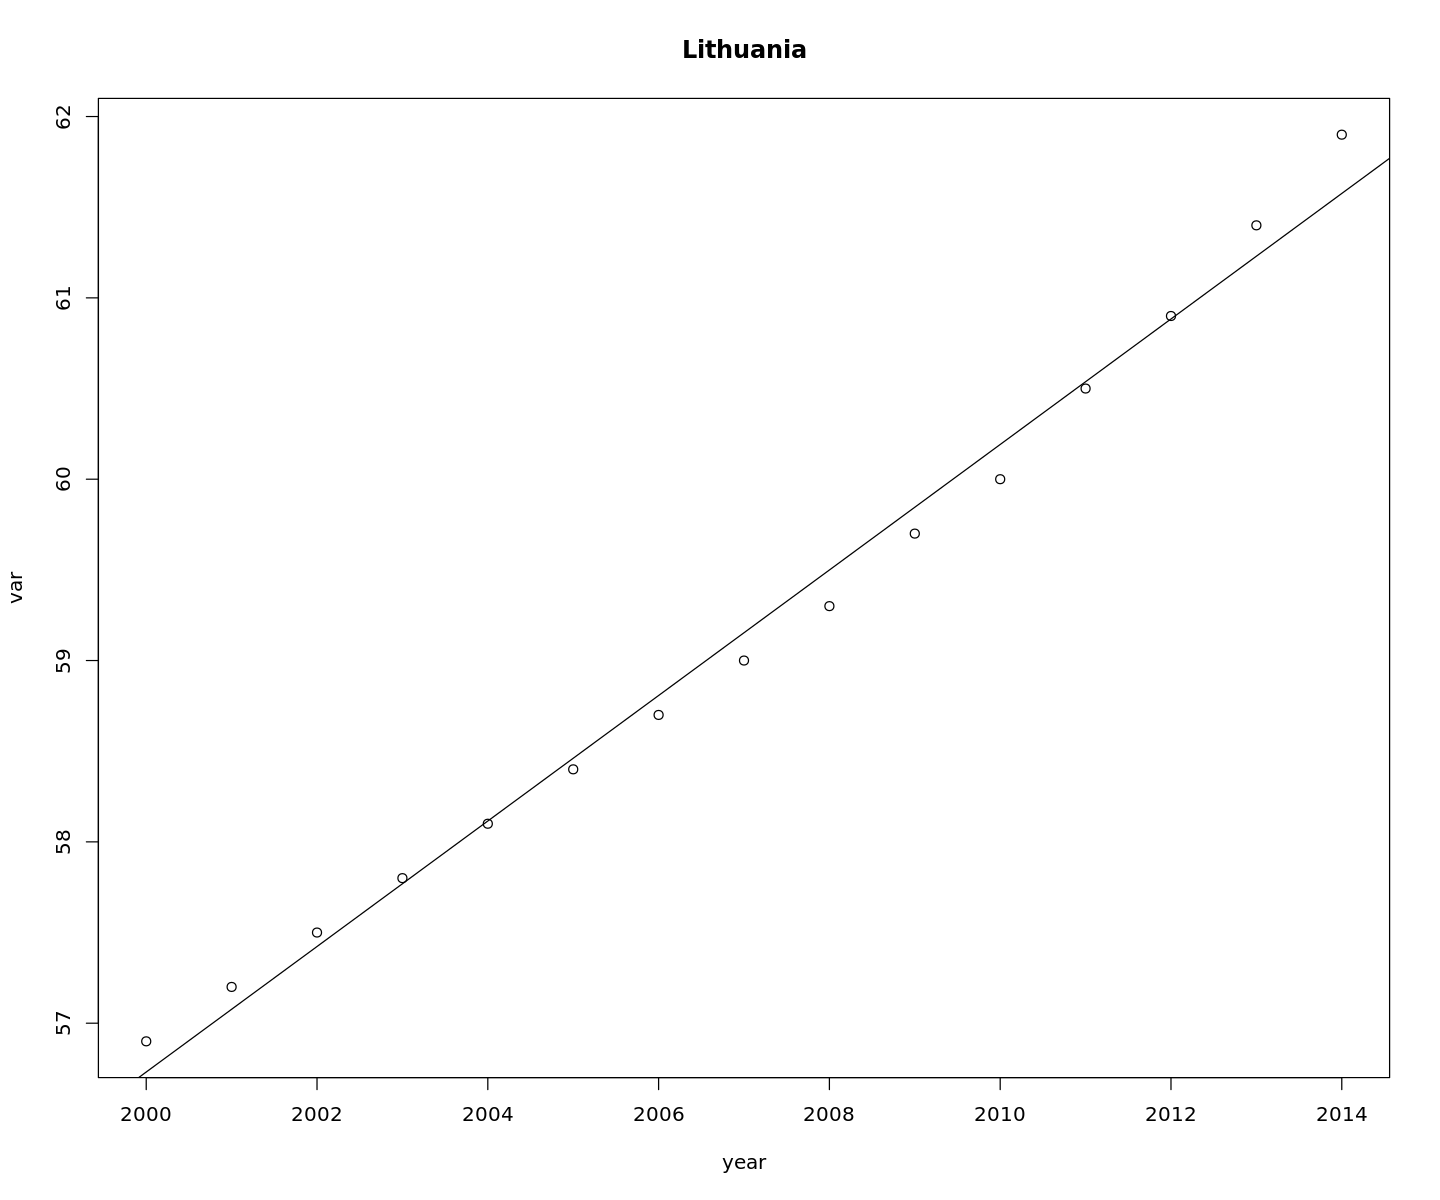

[1] "Madagascar"


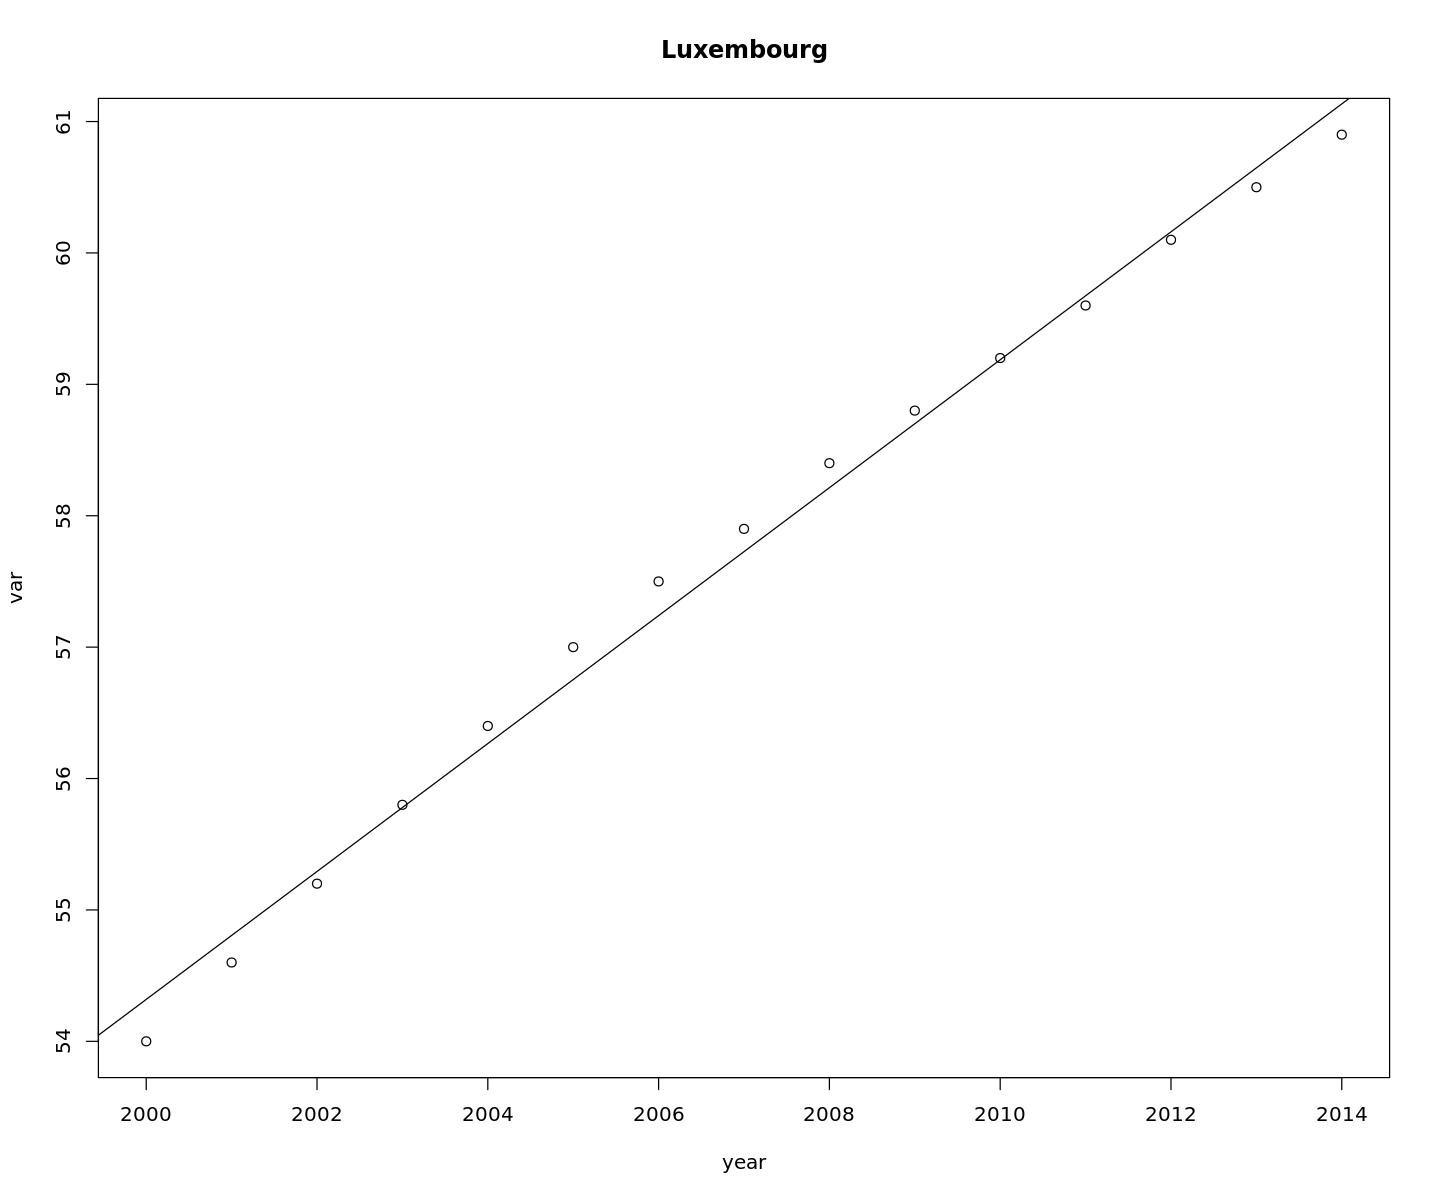

[1] "Malawi"


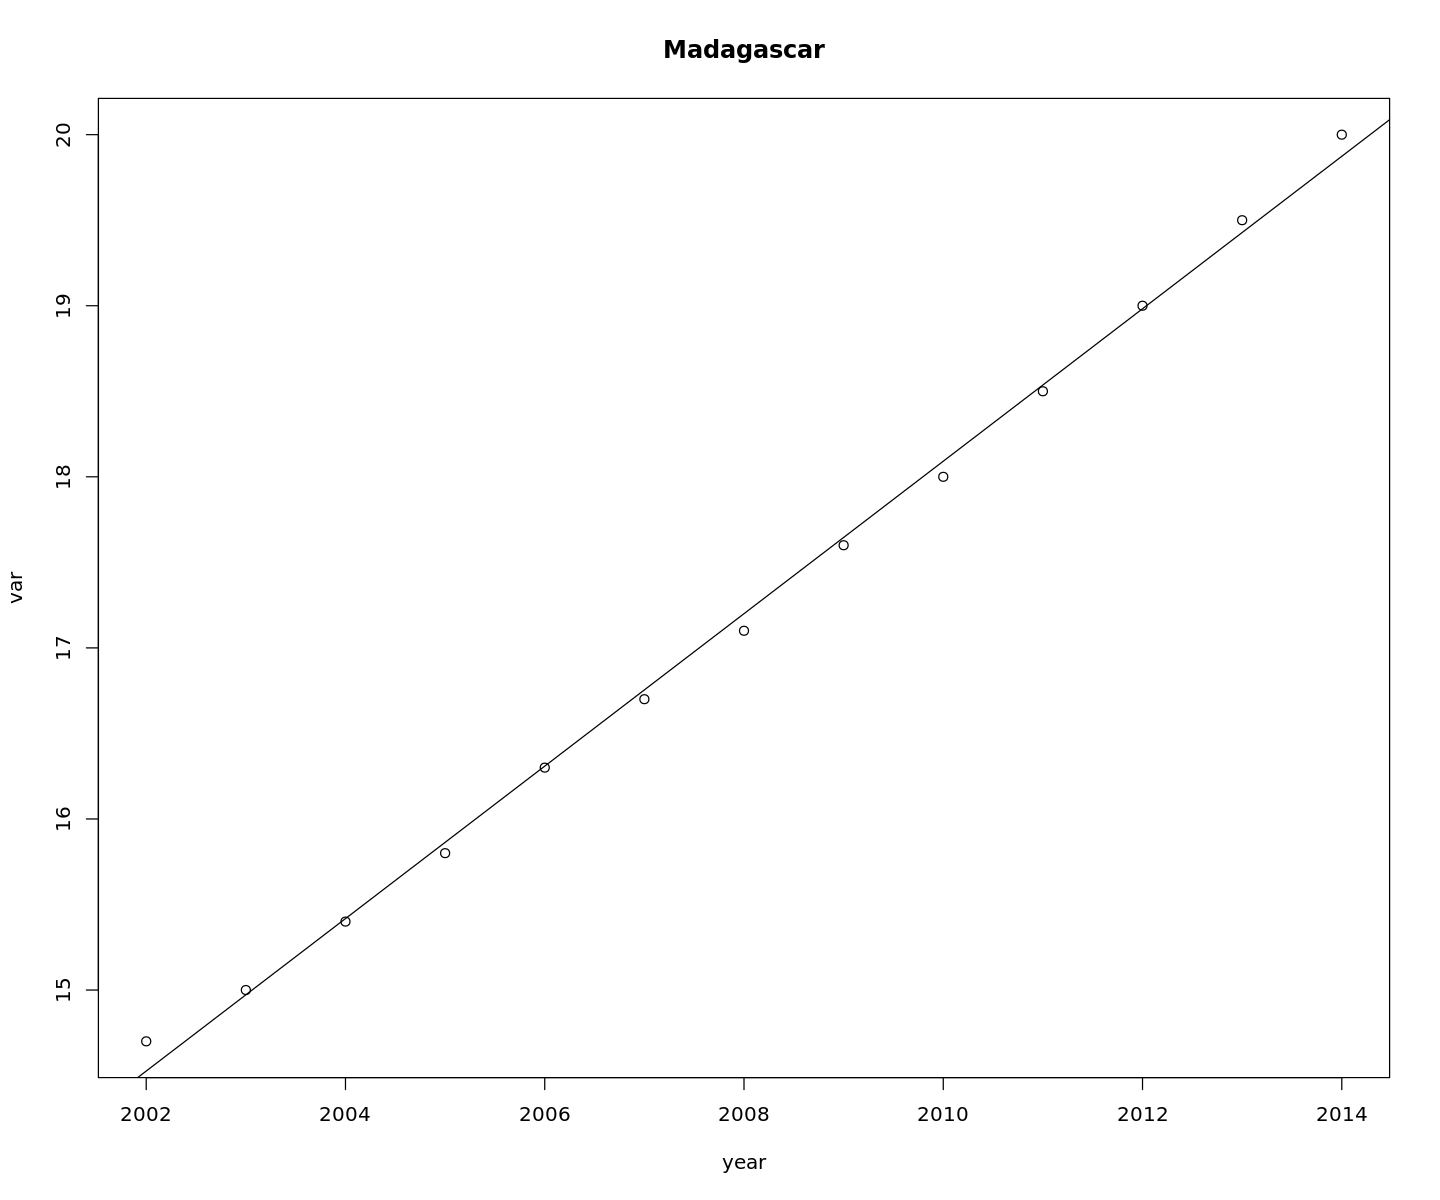

[1] "Malaysia"


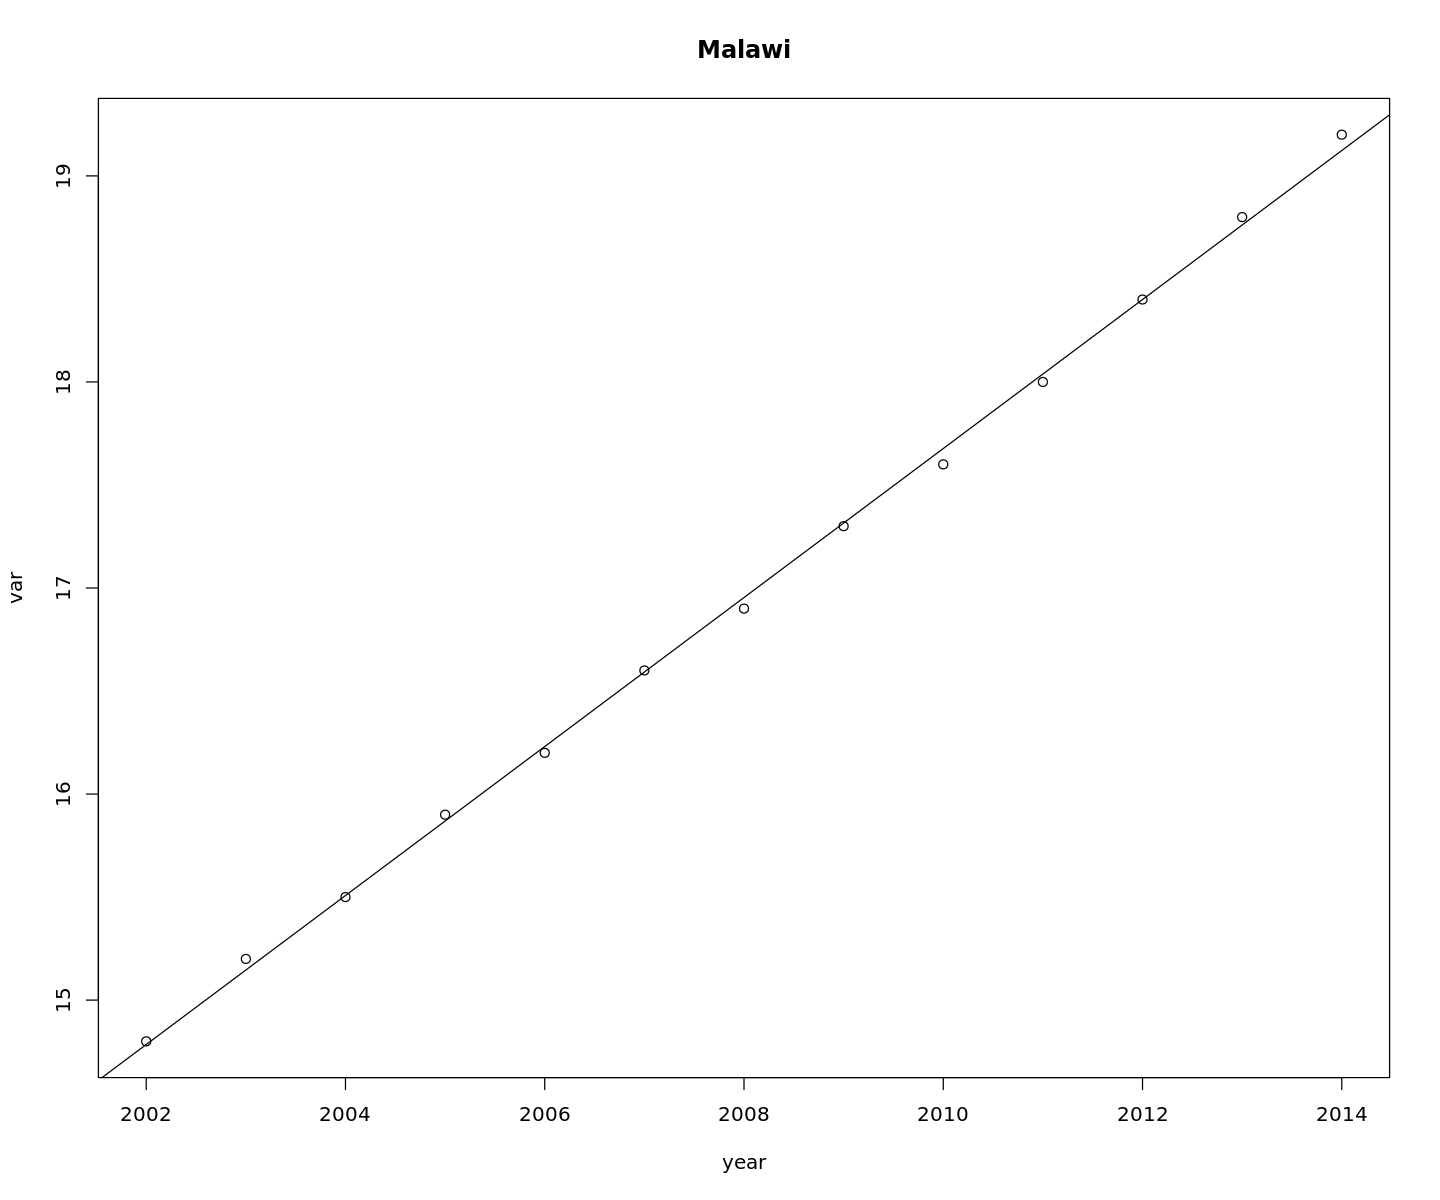

[1] "Maldives"


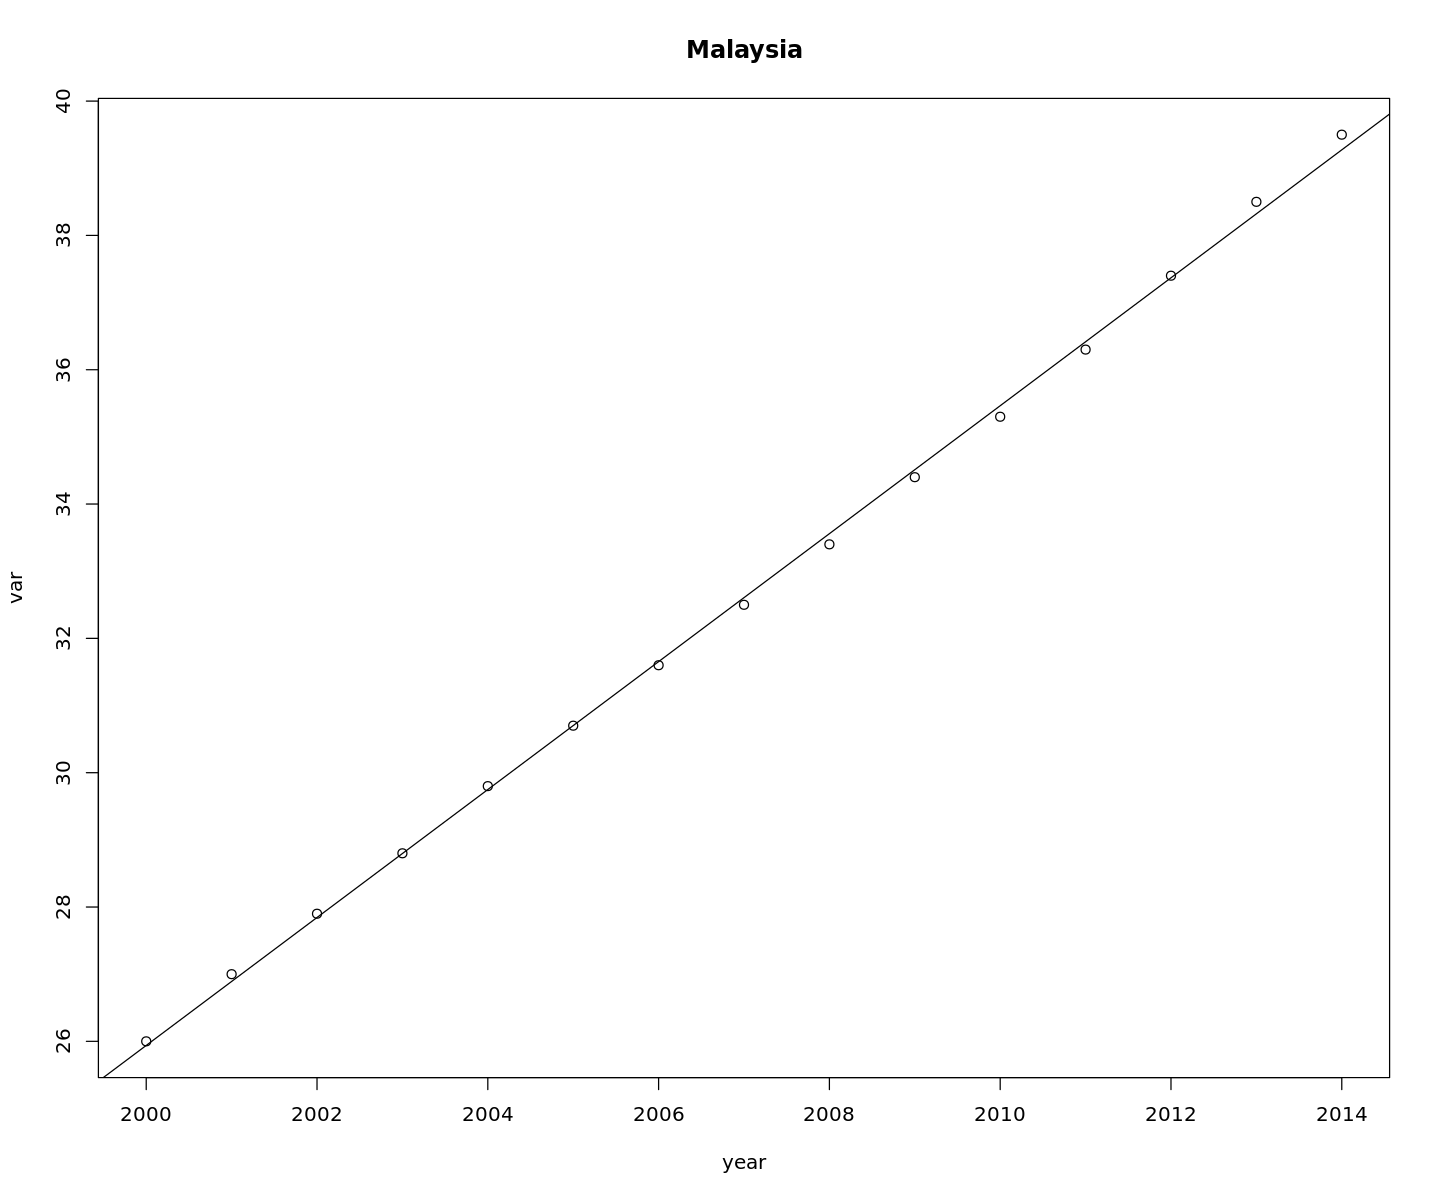

[1] "Mali"


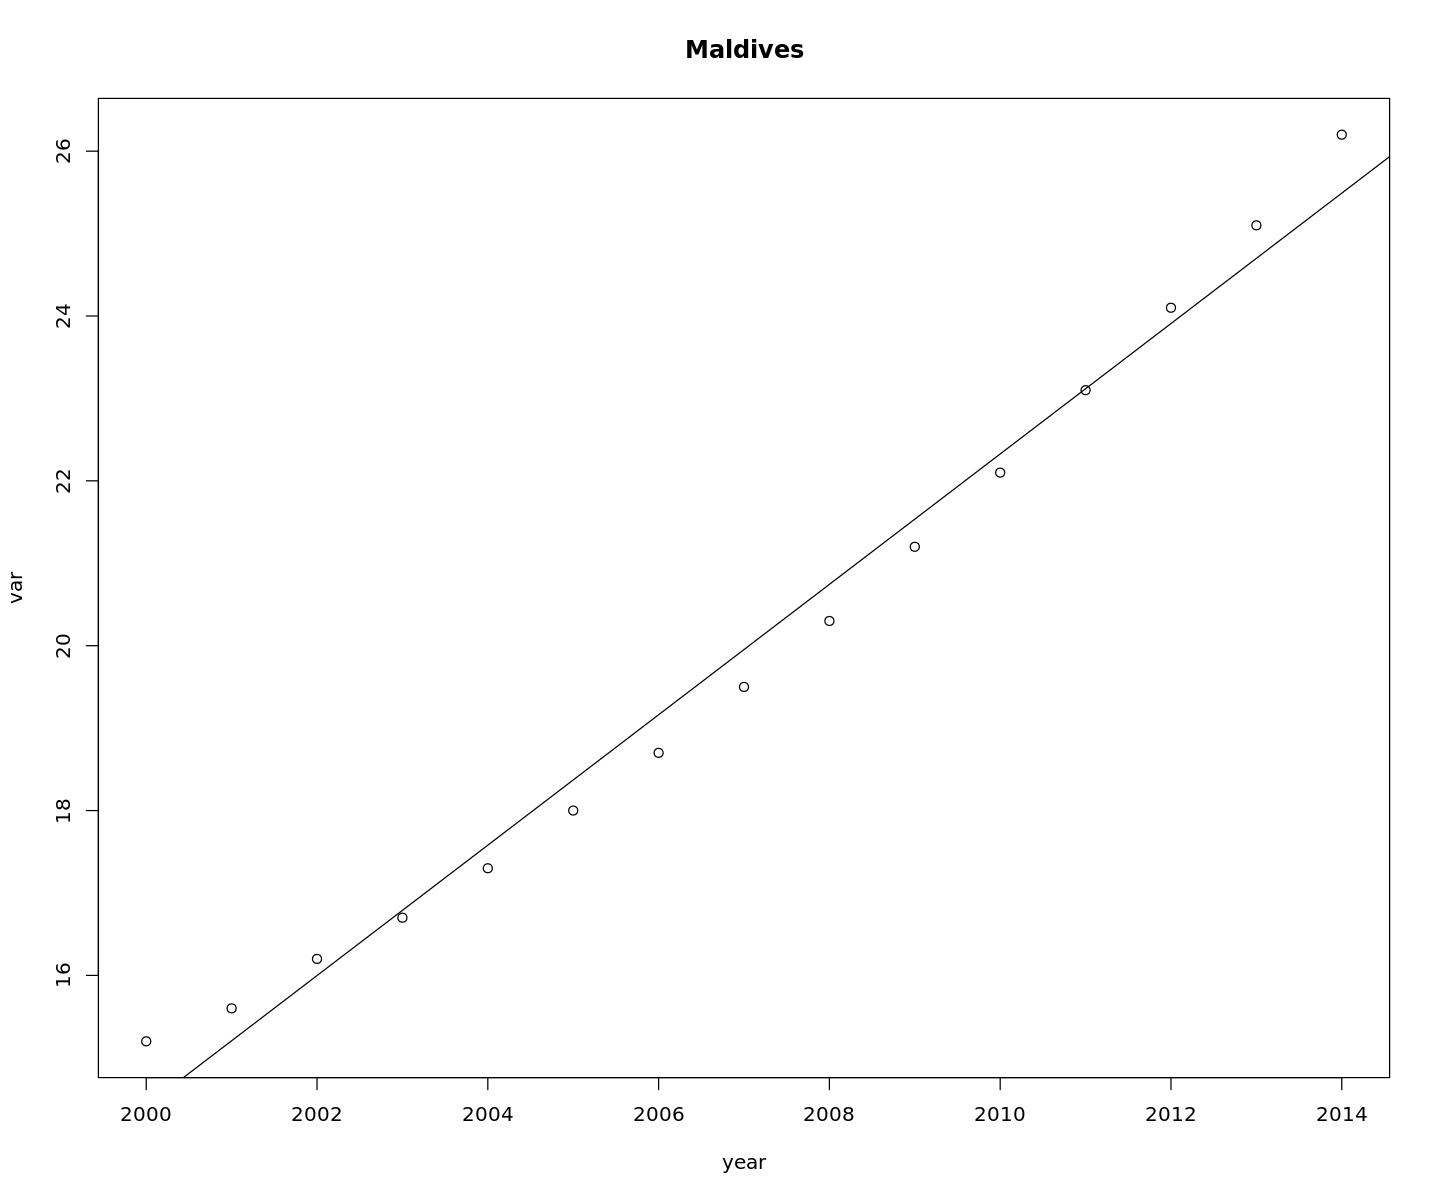

[1] "Malta"


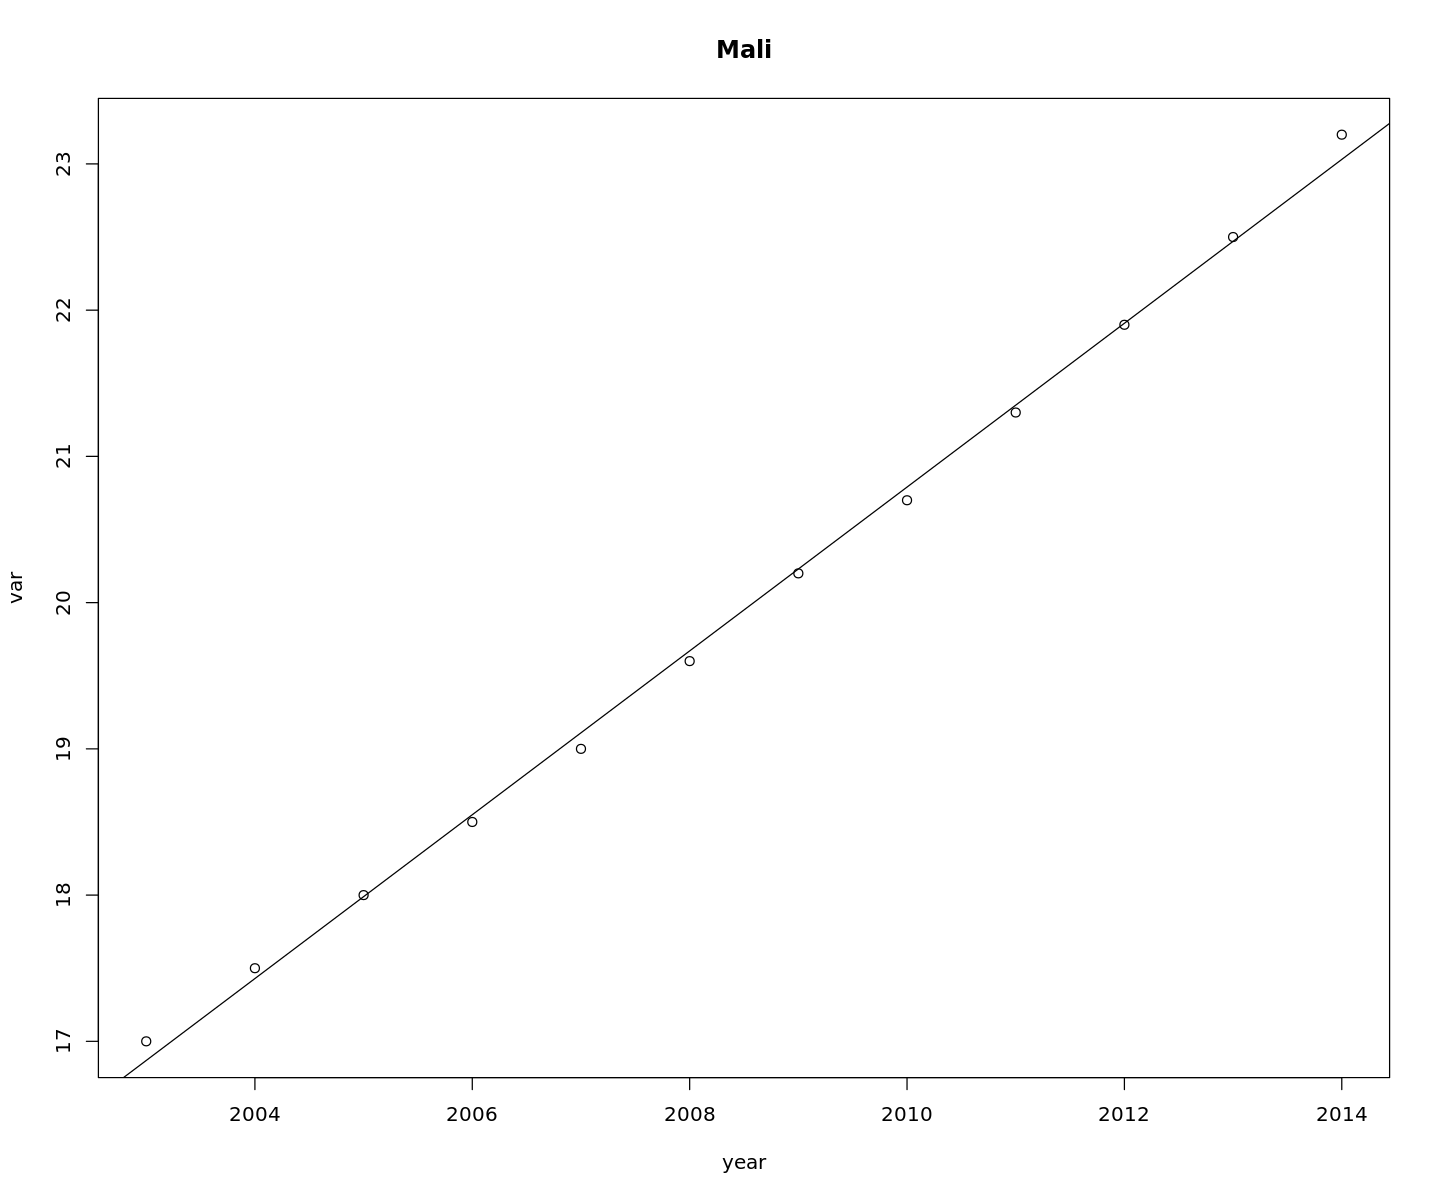

[1] "Mauritania"


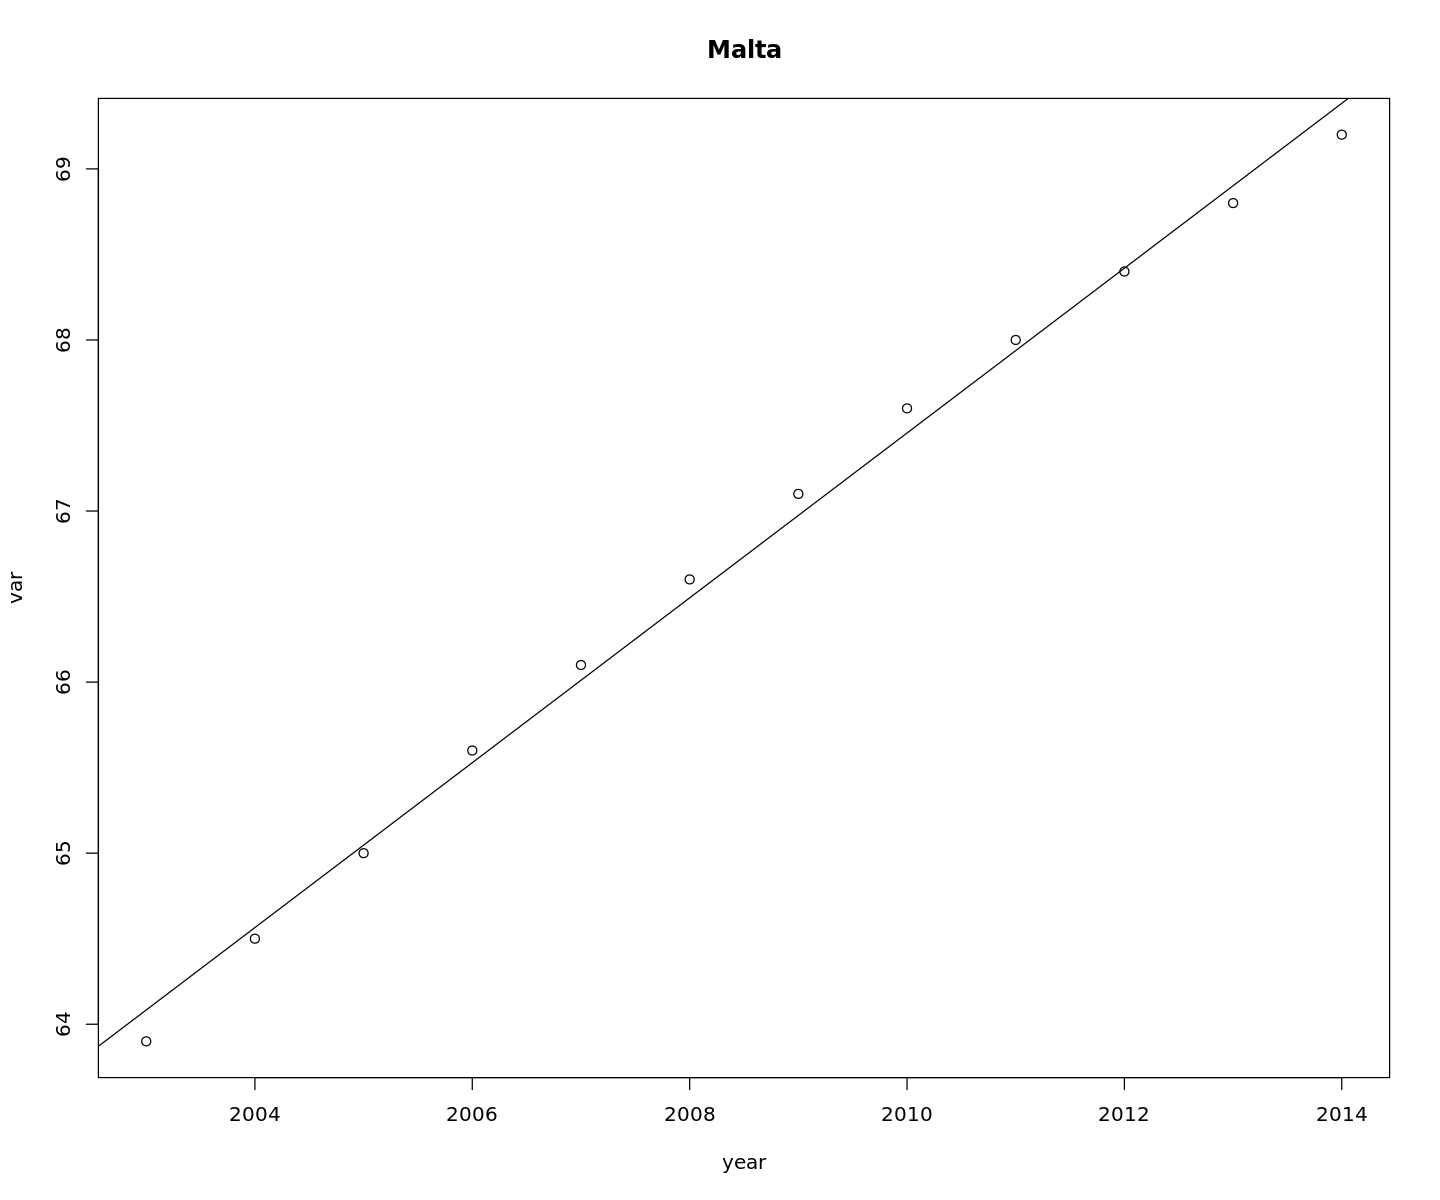

[1] "Mauritius"


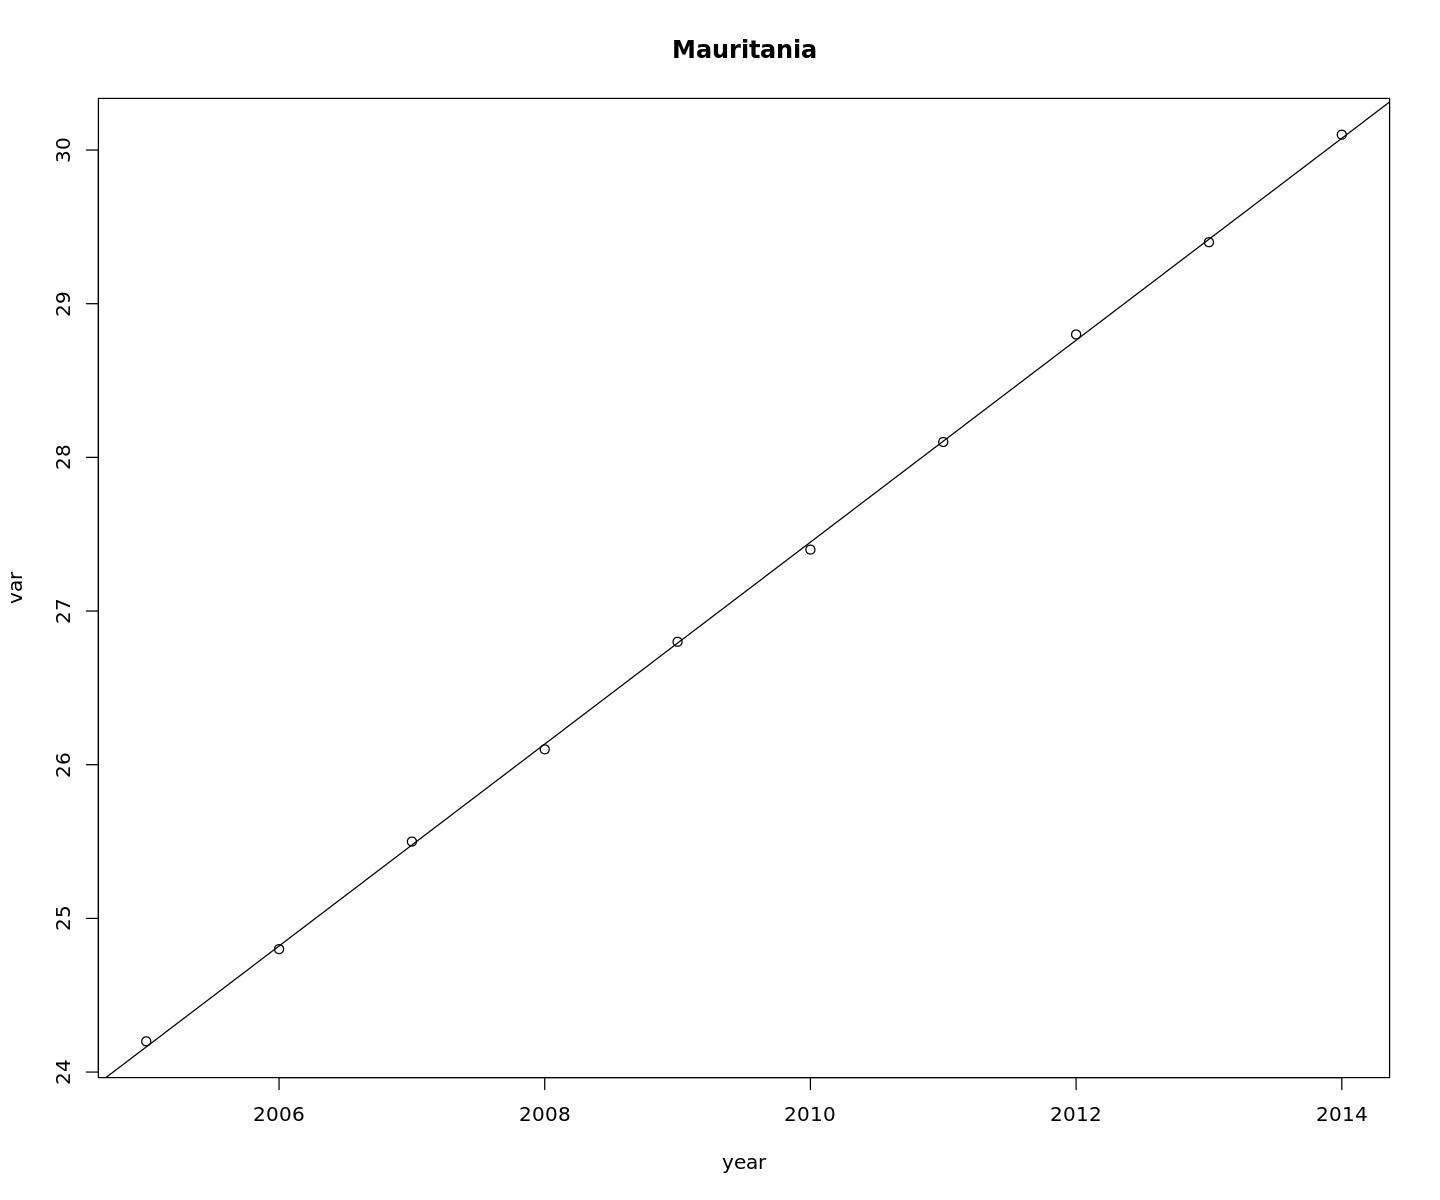

[1] "Mexico"


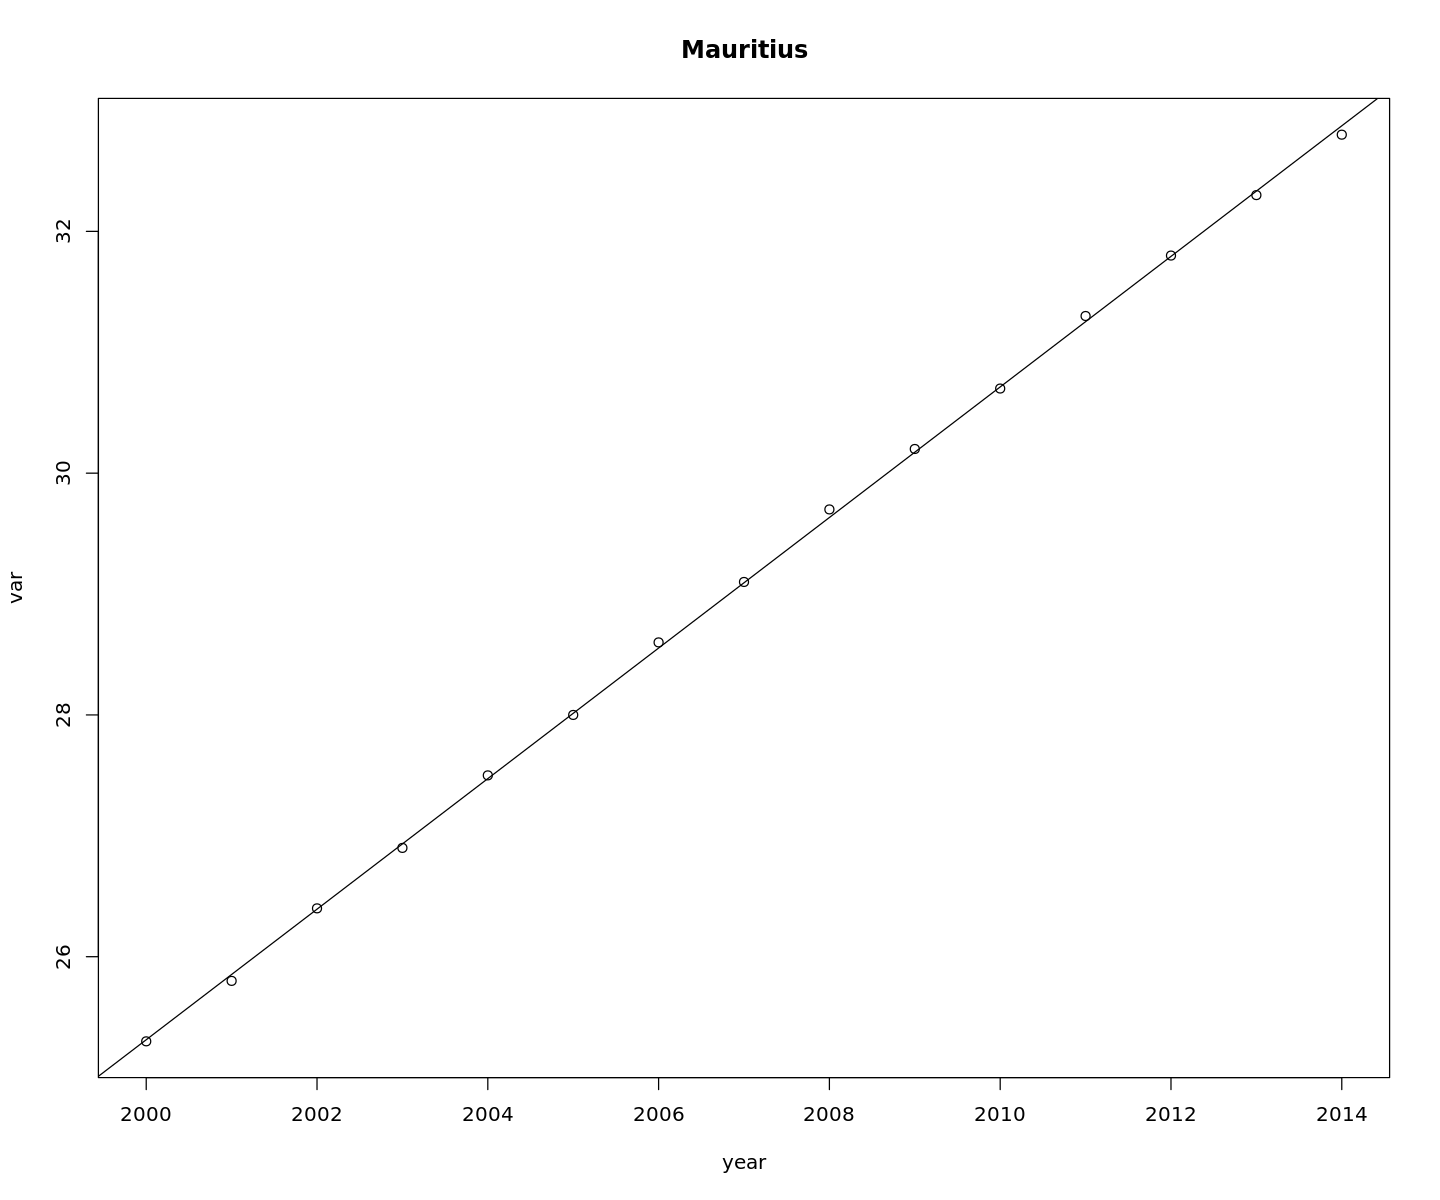

[1] "Mongolia"


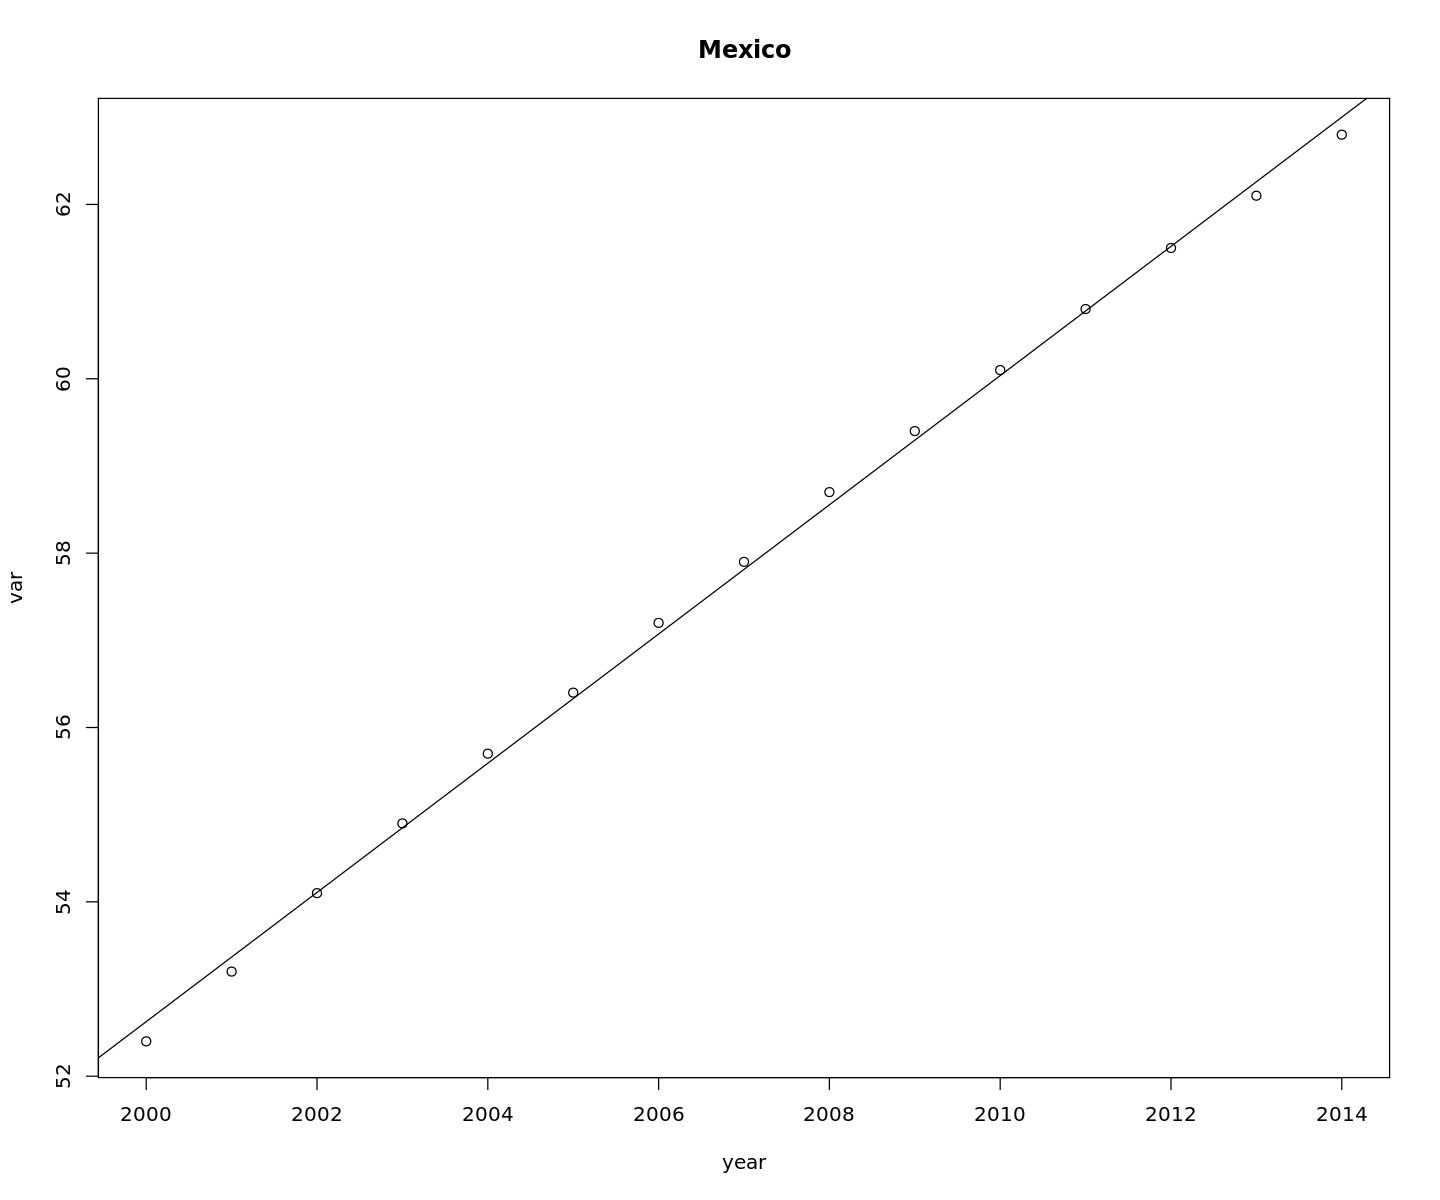

[1] "Montenegro"


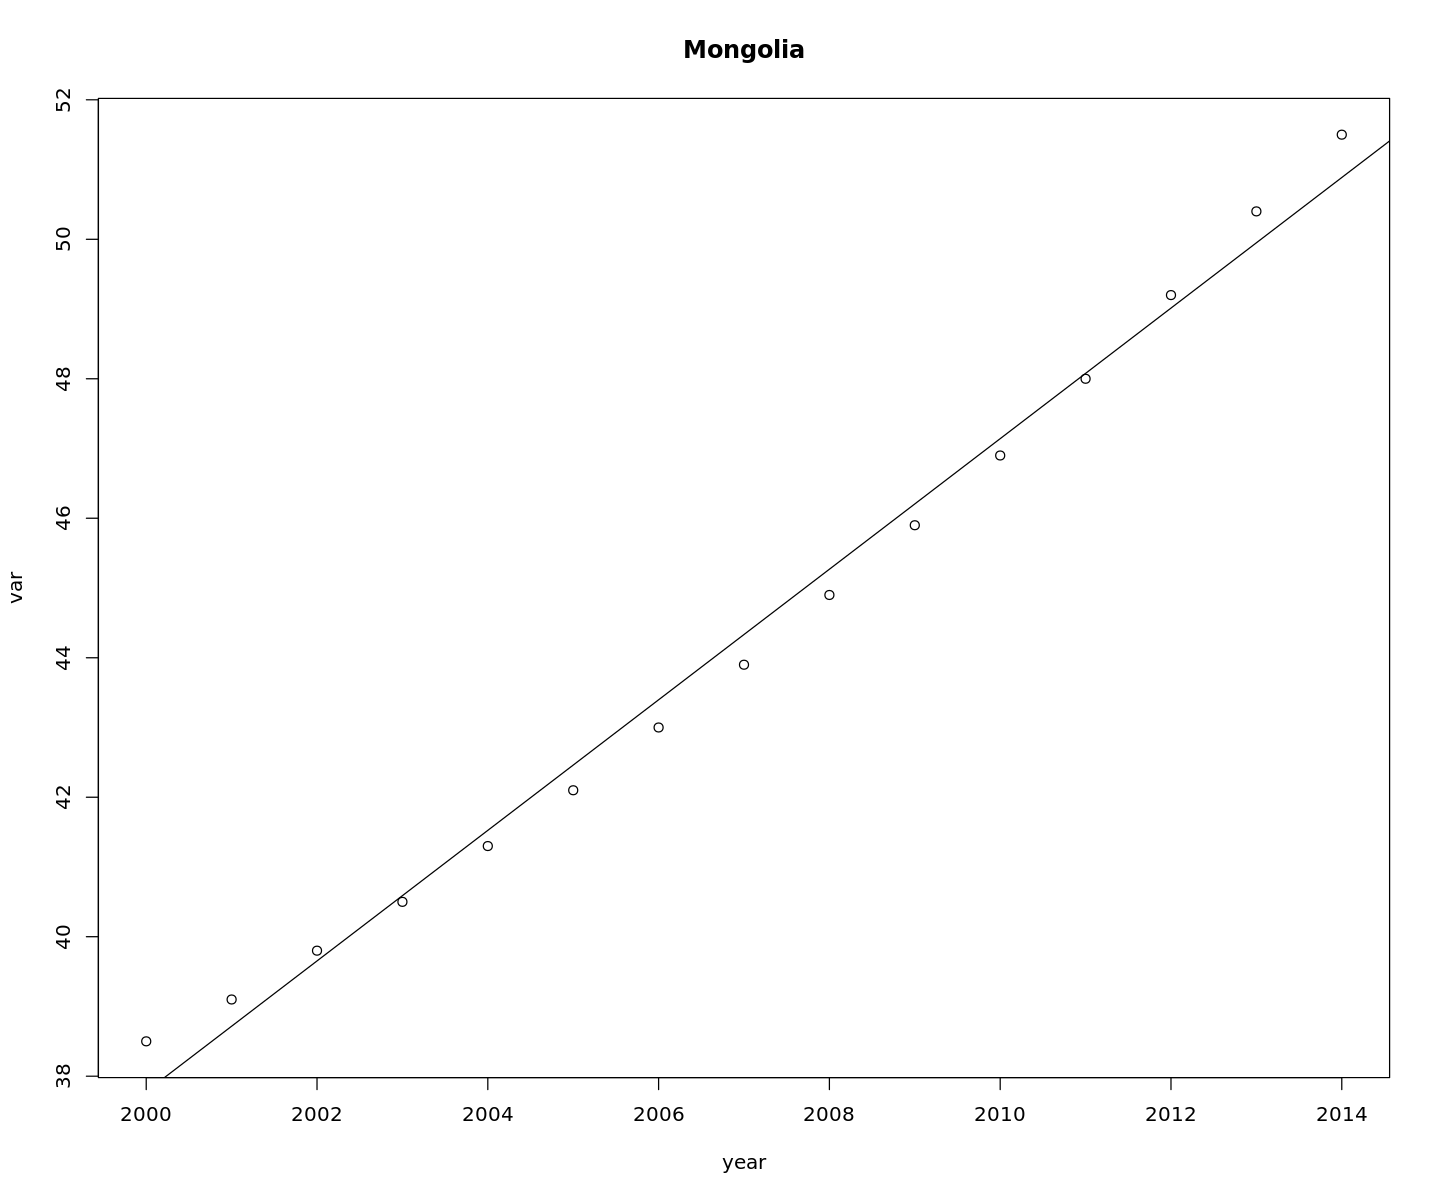

[1] "Morocco"


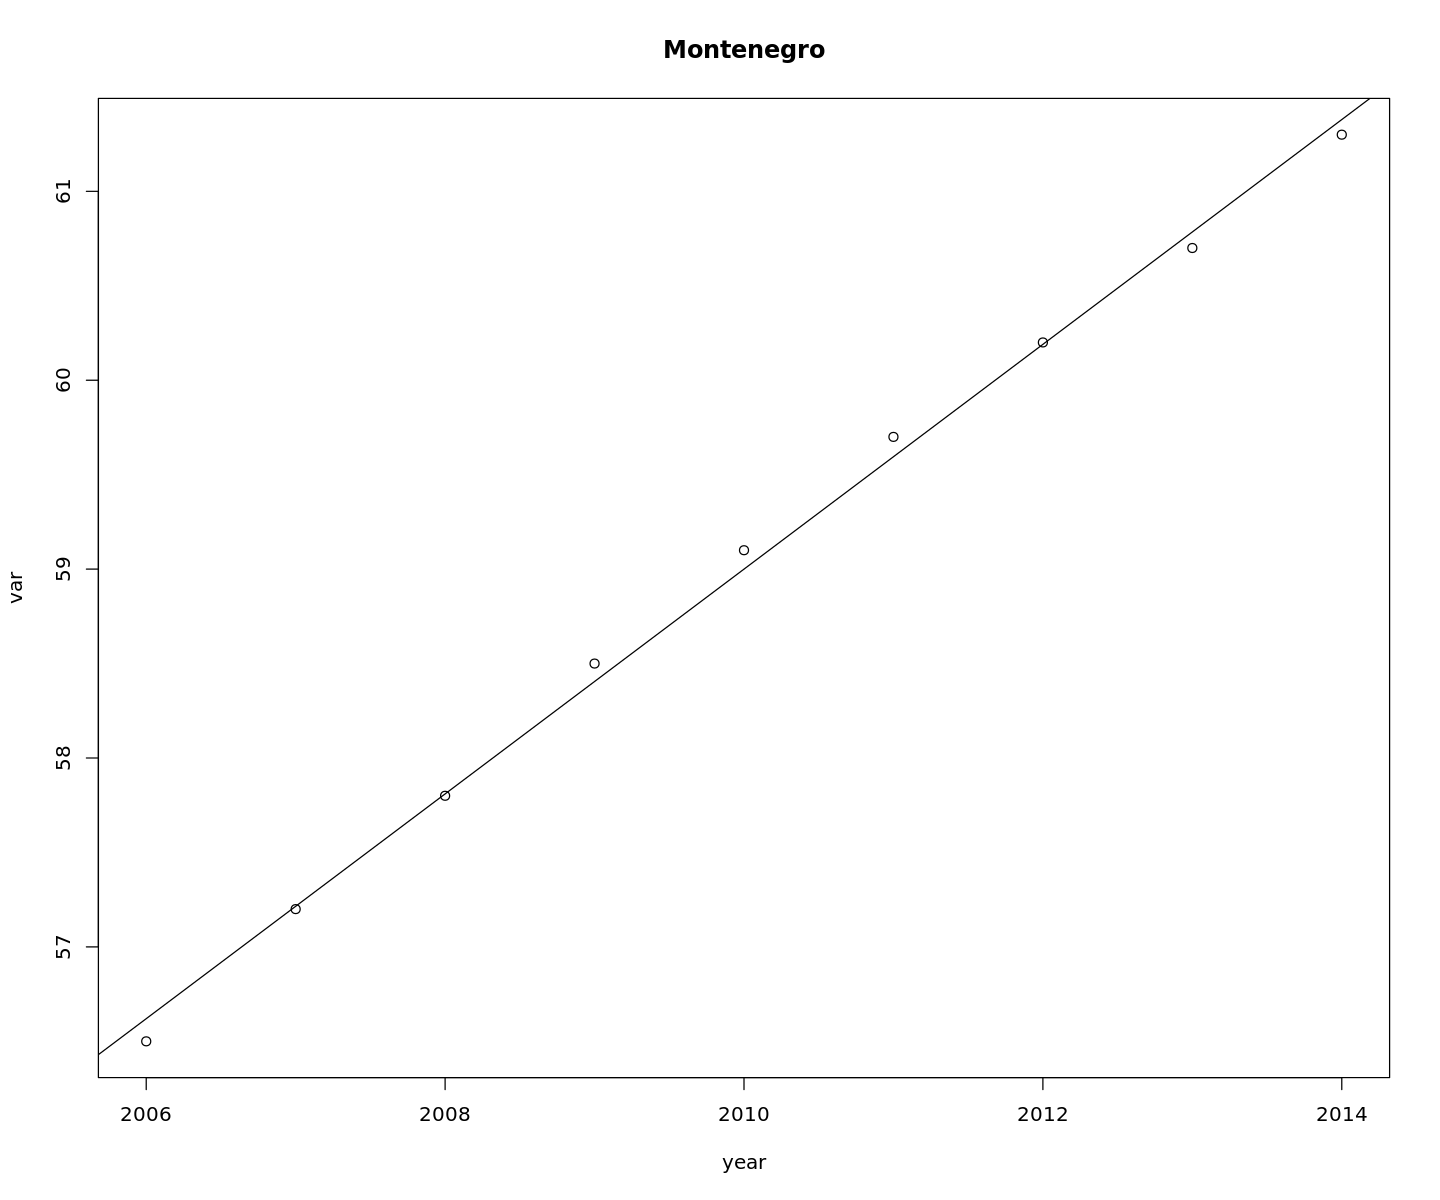

[1] "Mozambique"


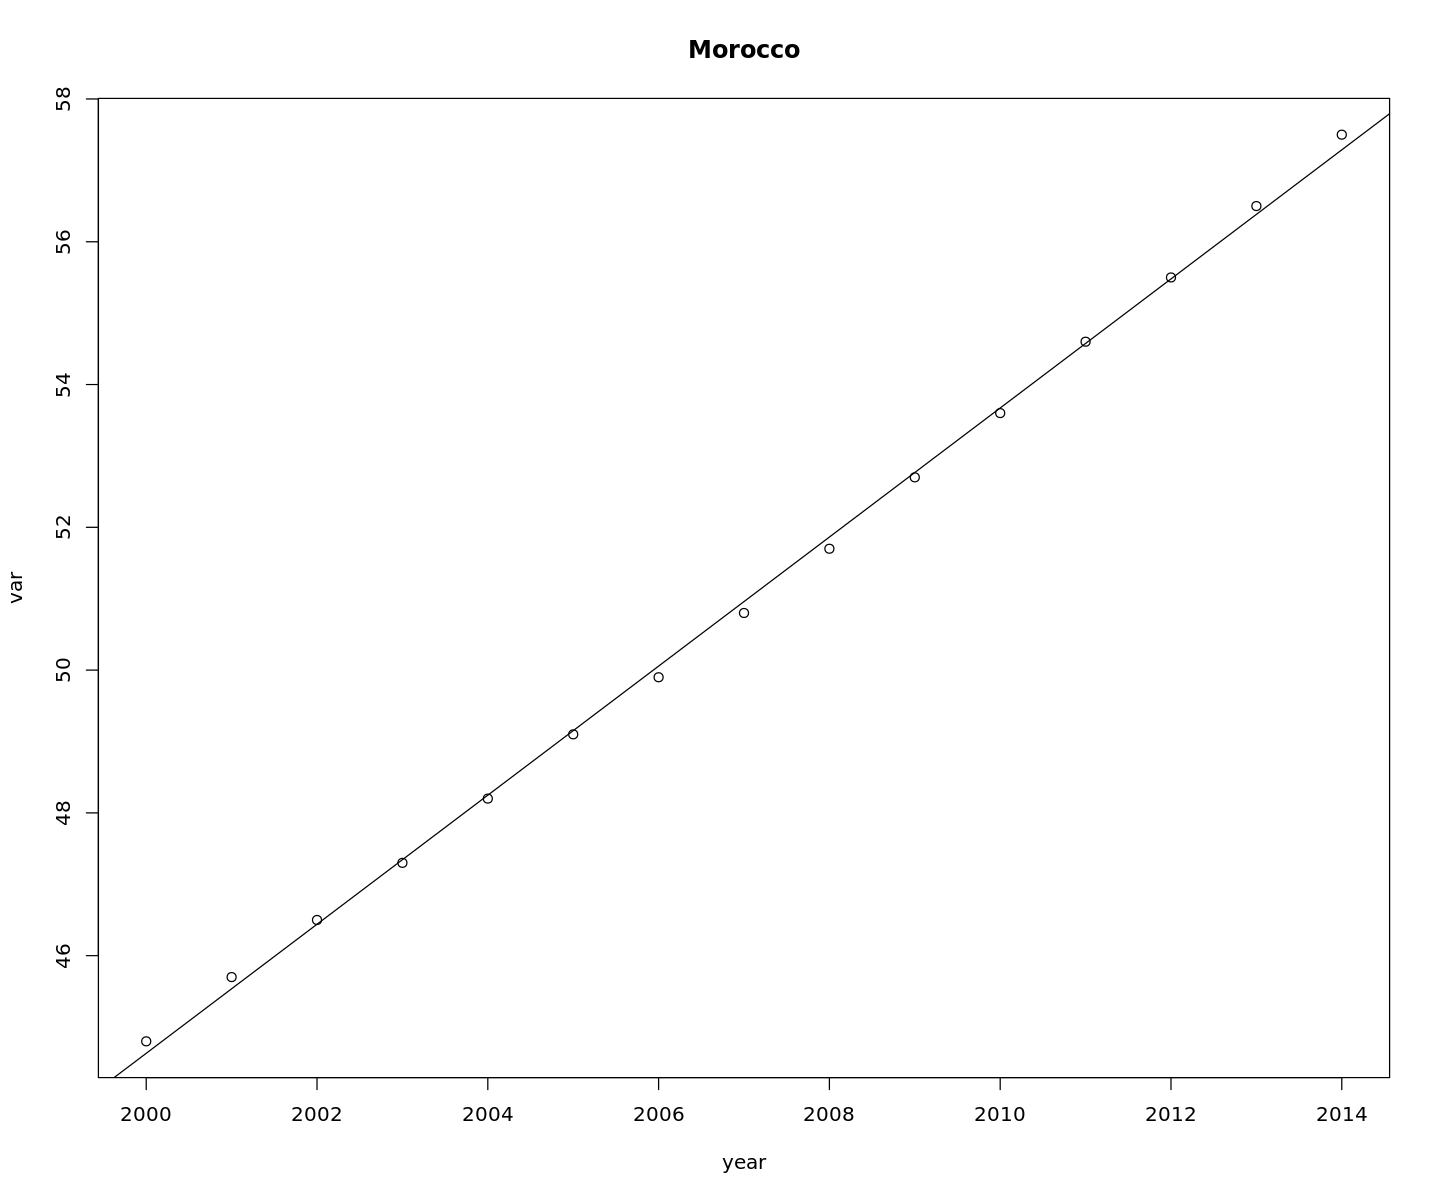

[1] "Myanmar"


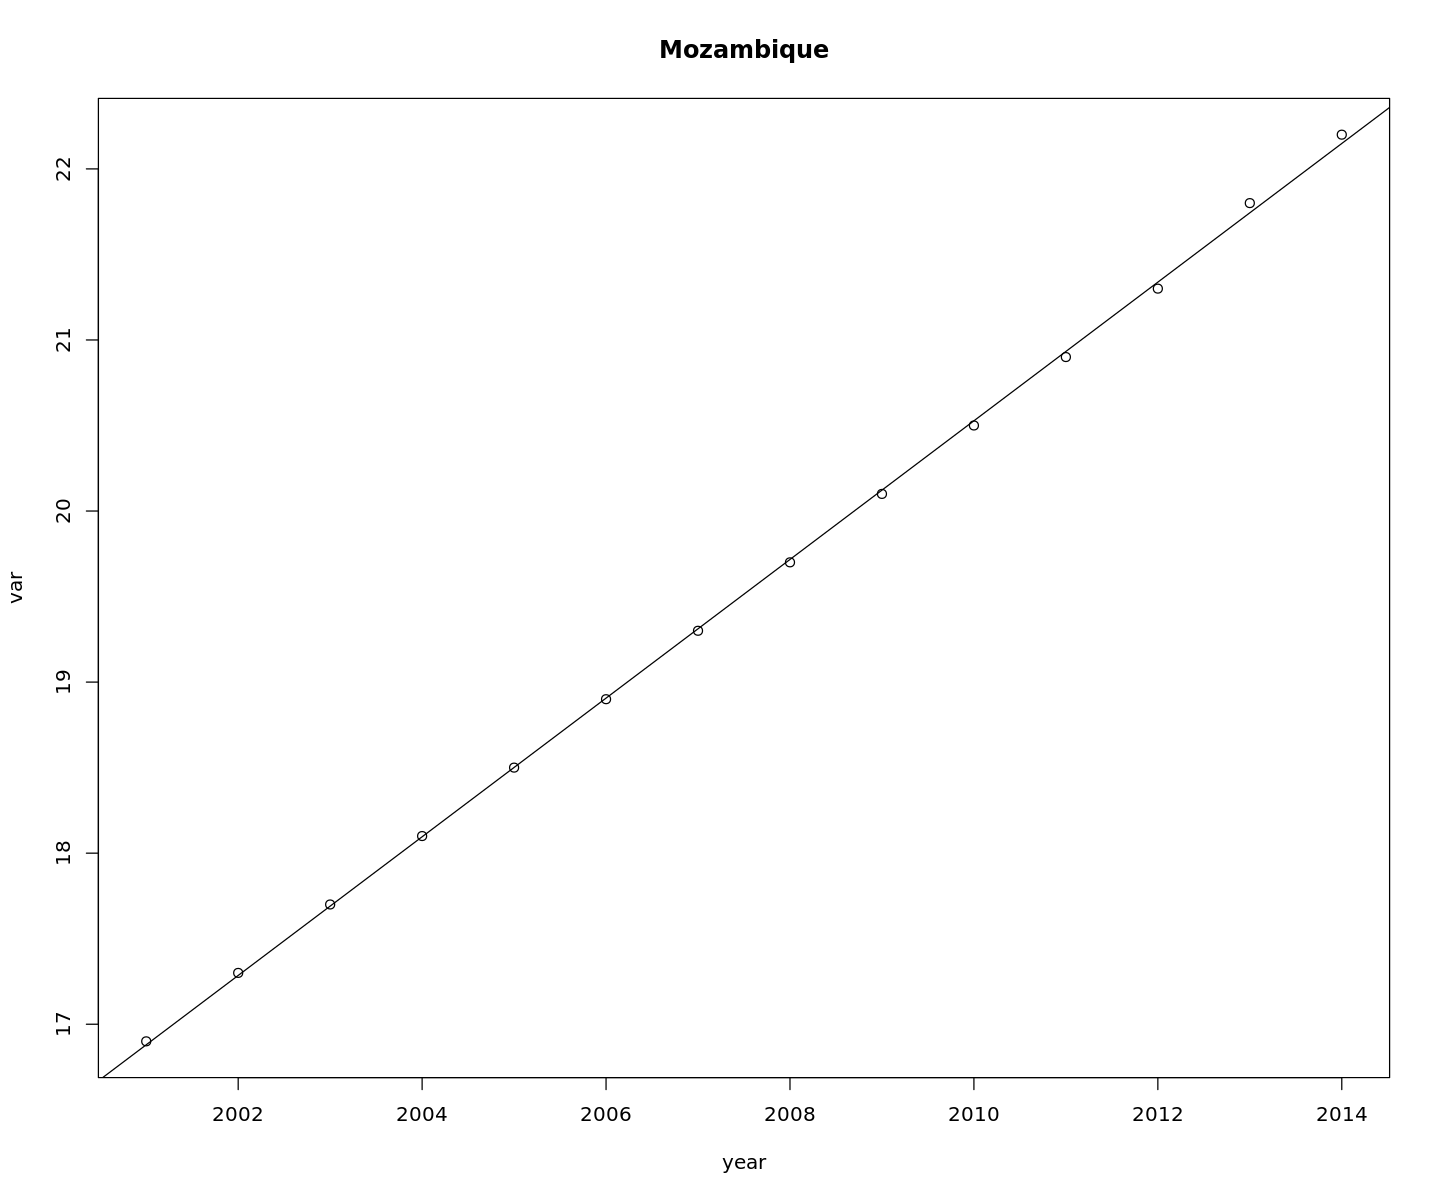

[1] "Namibia"


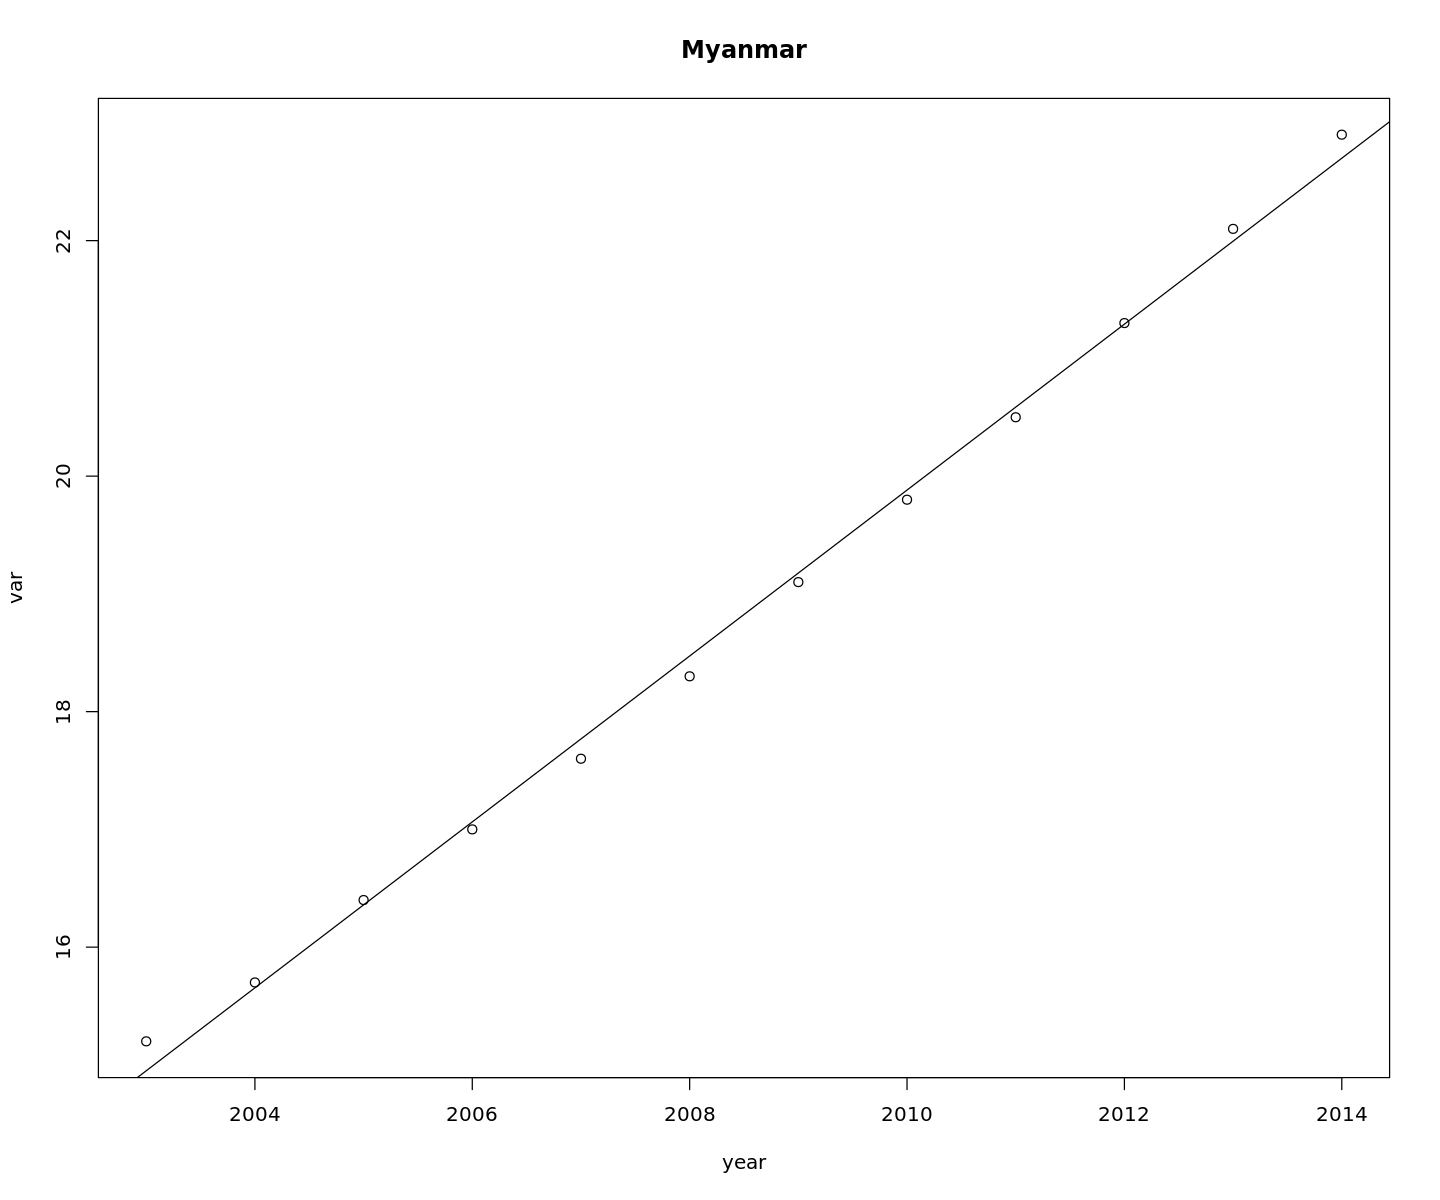

[1] "Nepal"


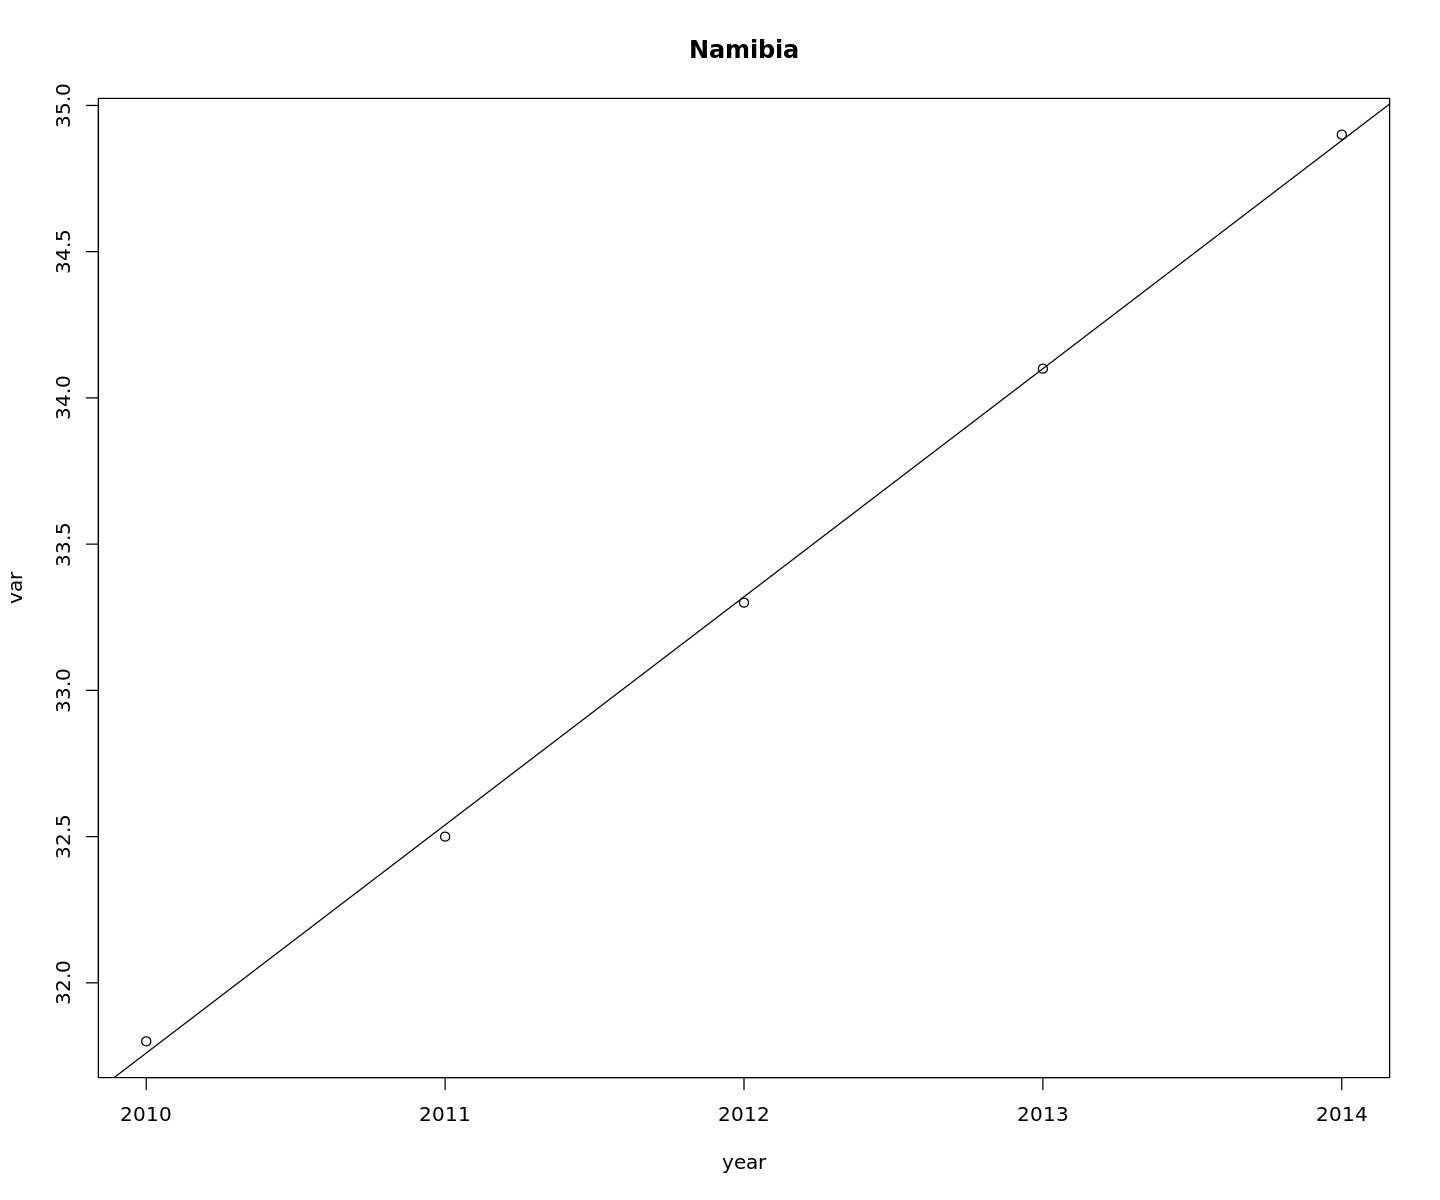

[1] "Netherlands"


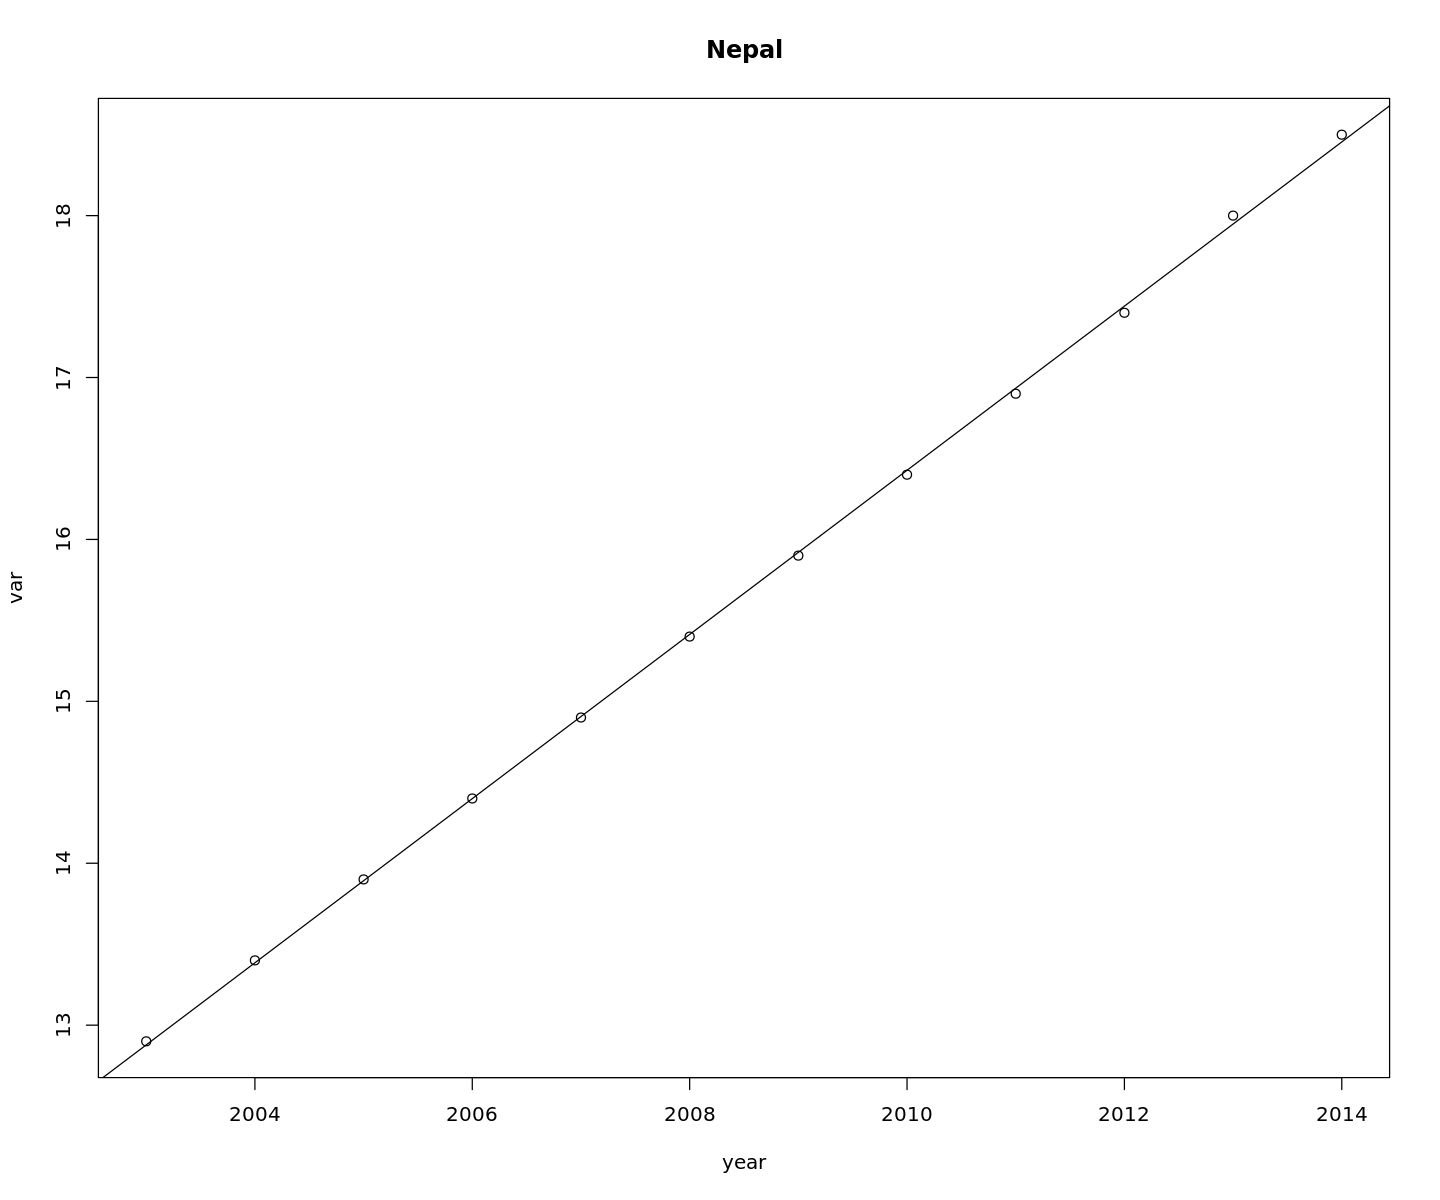

[1] "Nicaragua"


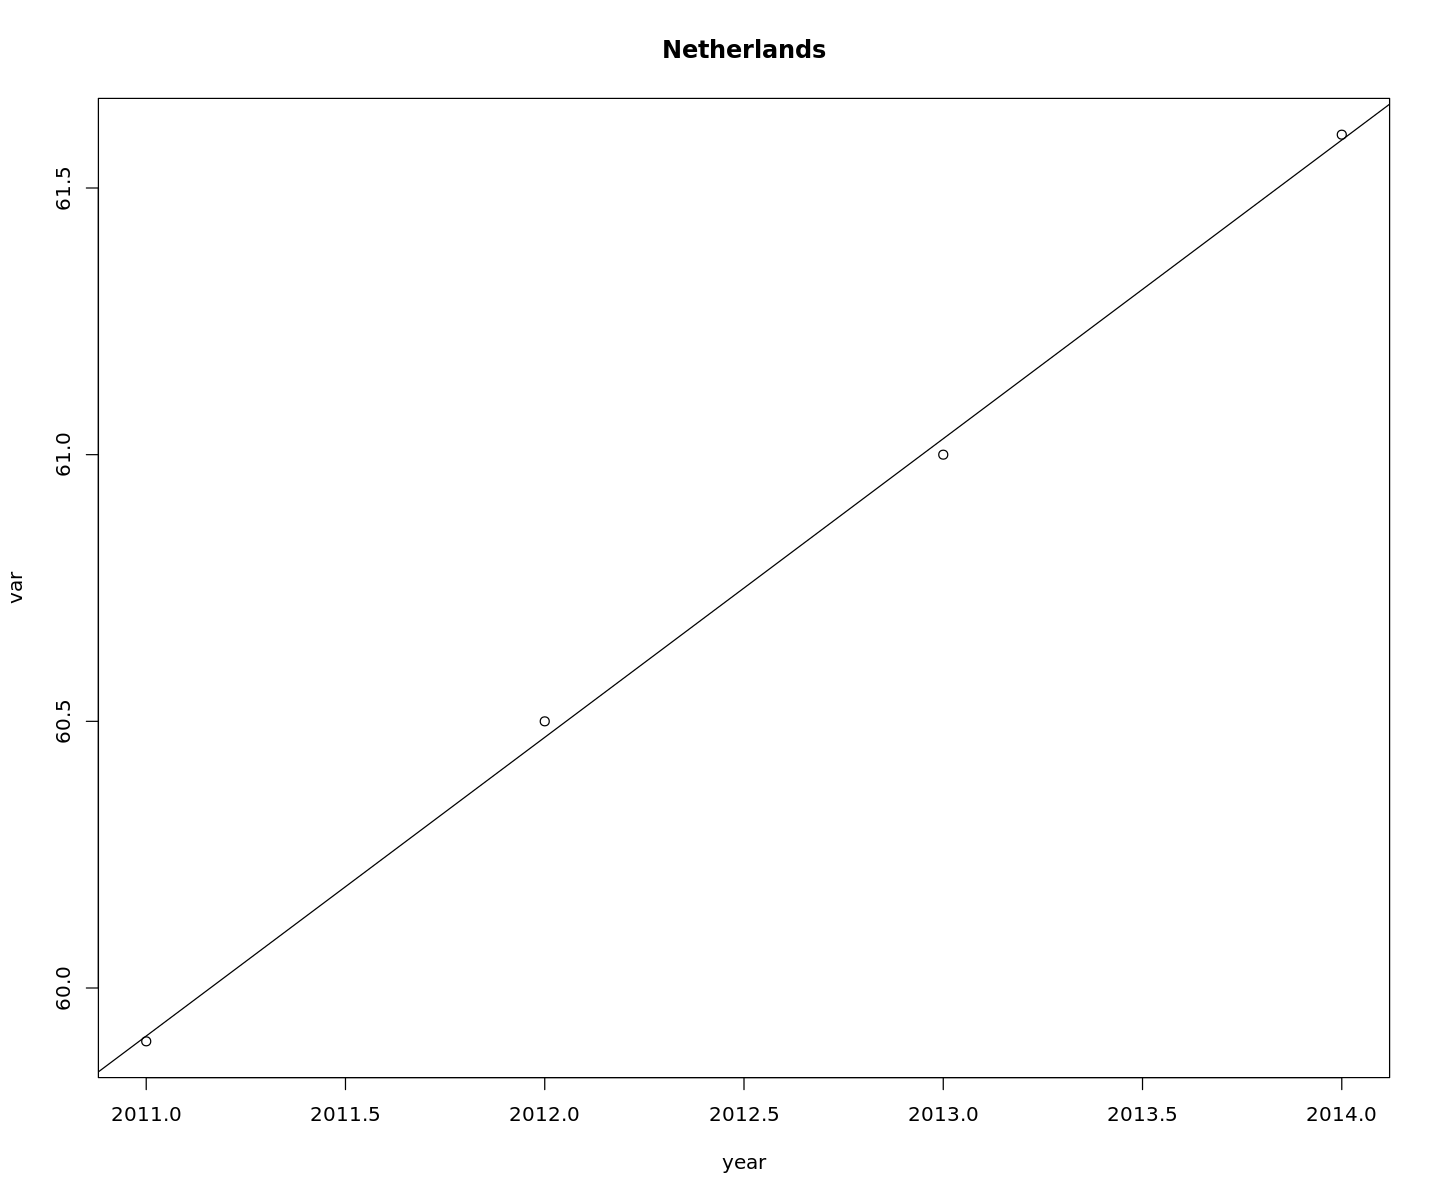

[1] "Niger"


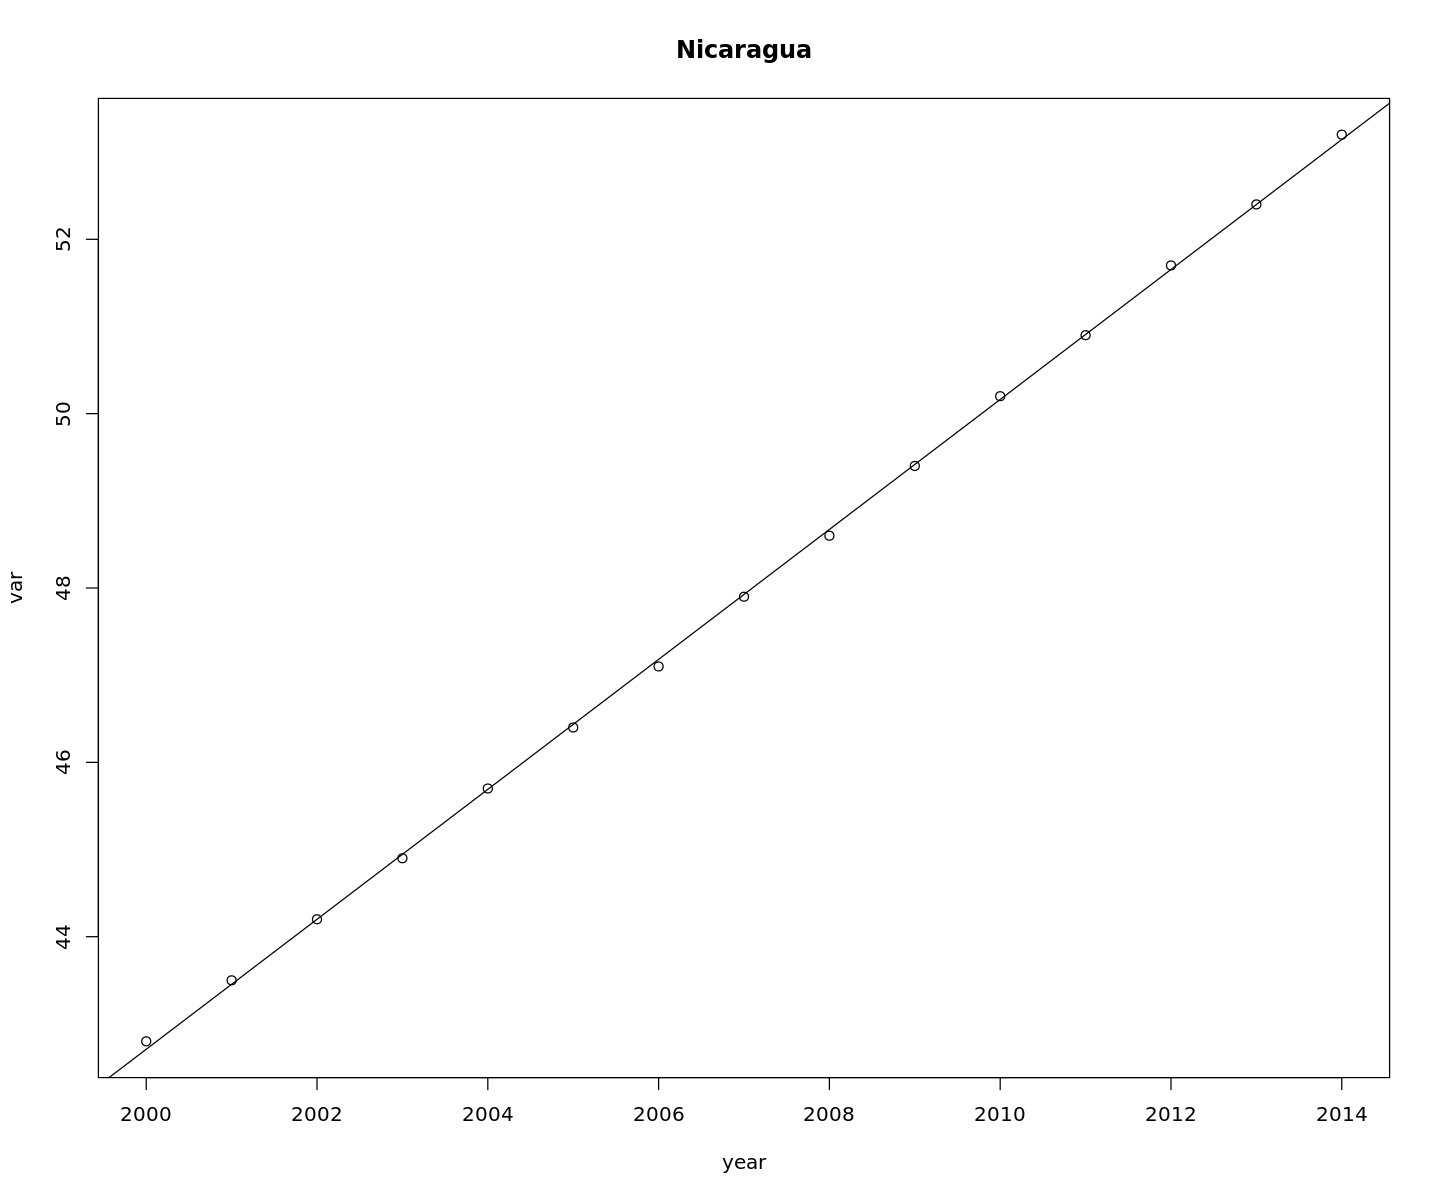

[1] "Nigeria"


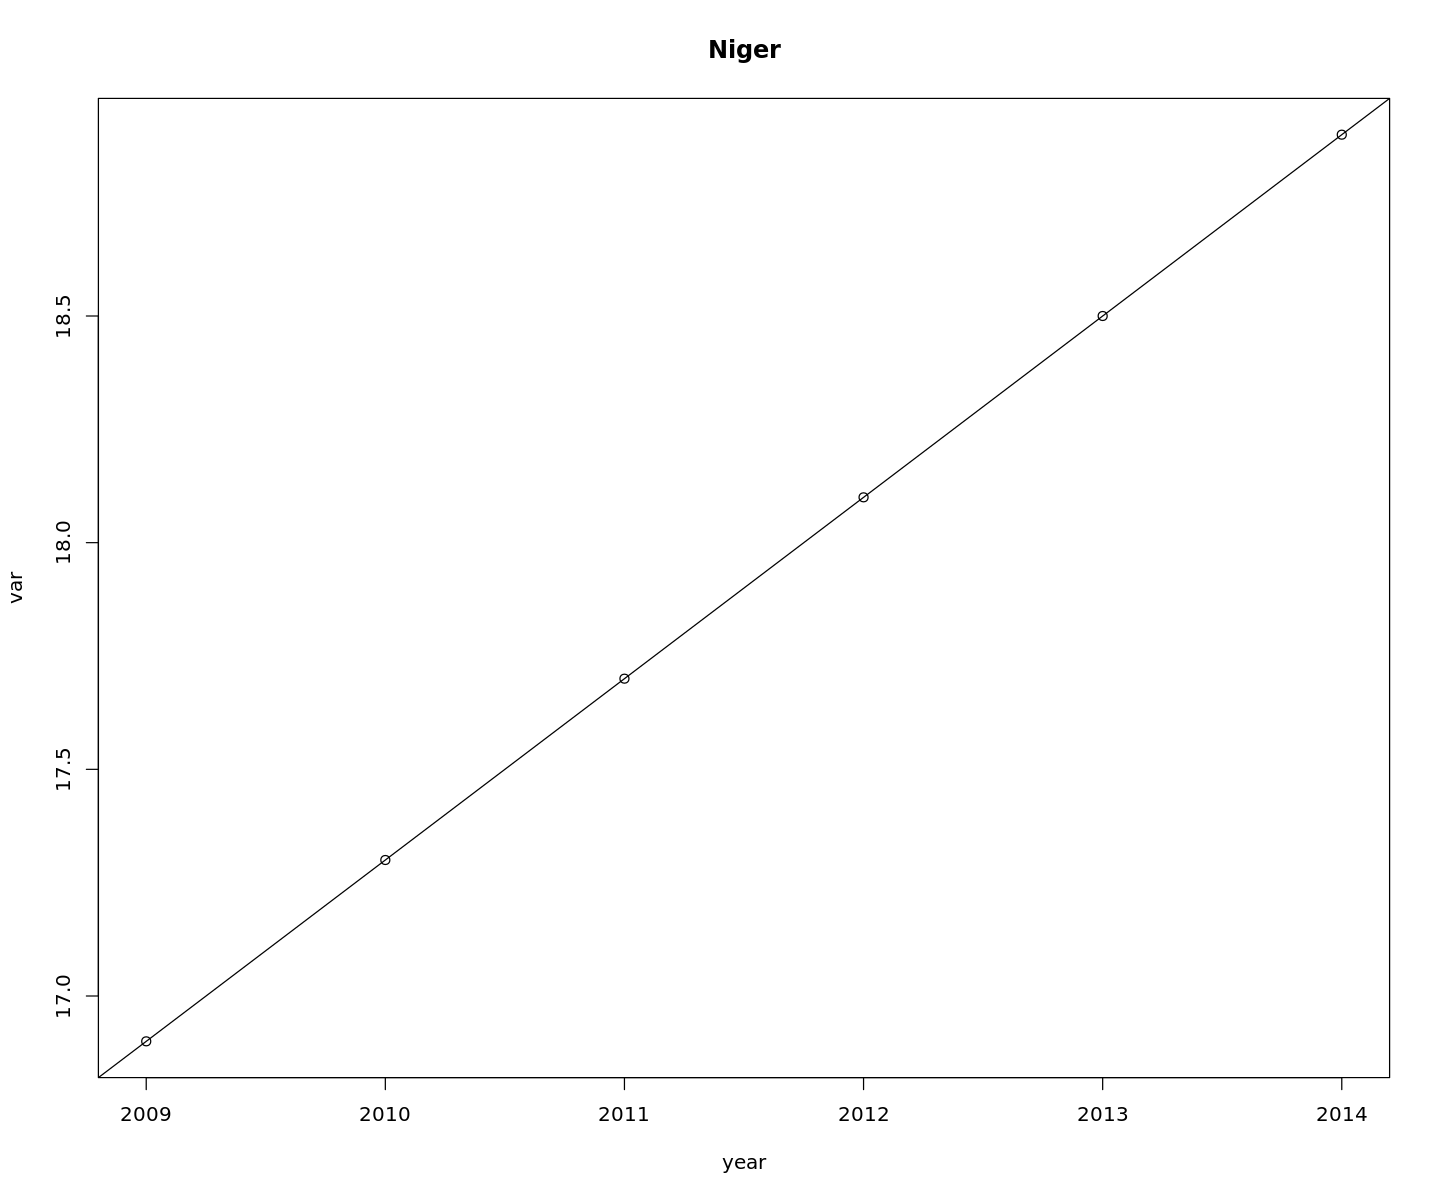

[1] "Pakistan"


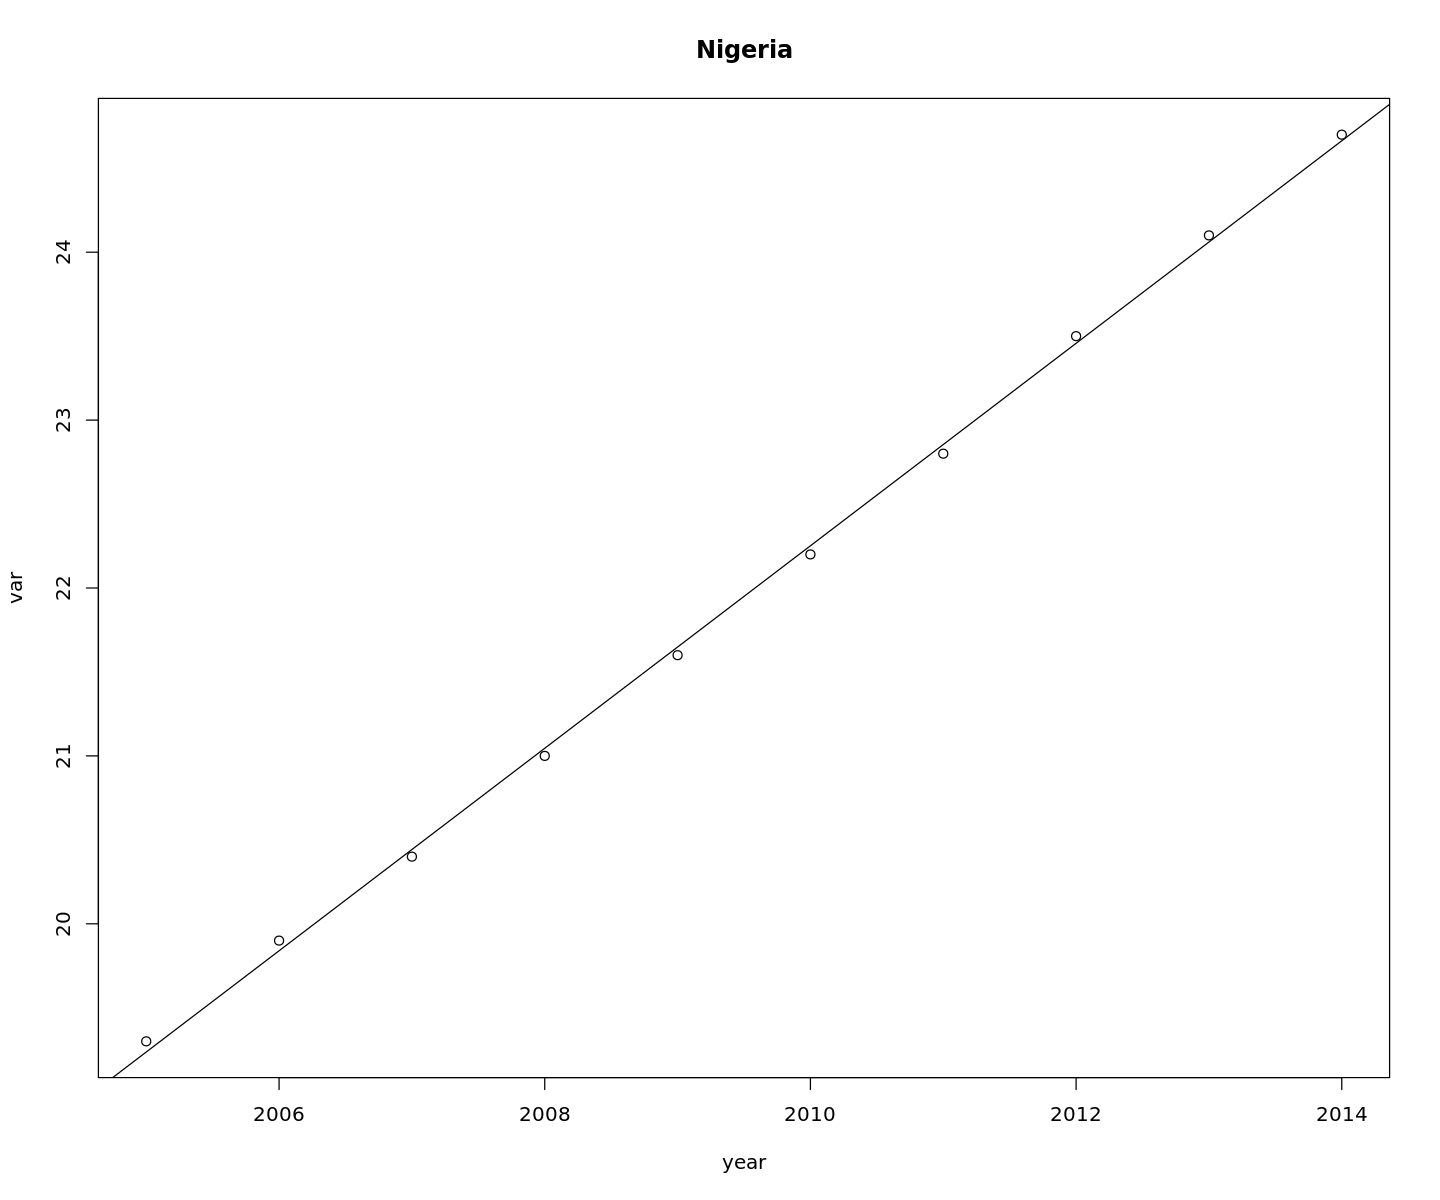

[1] "Panama"


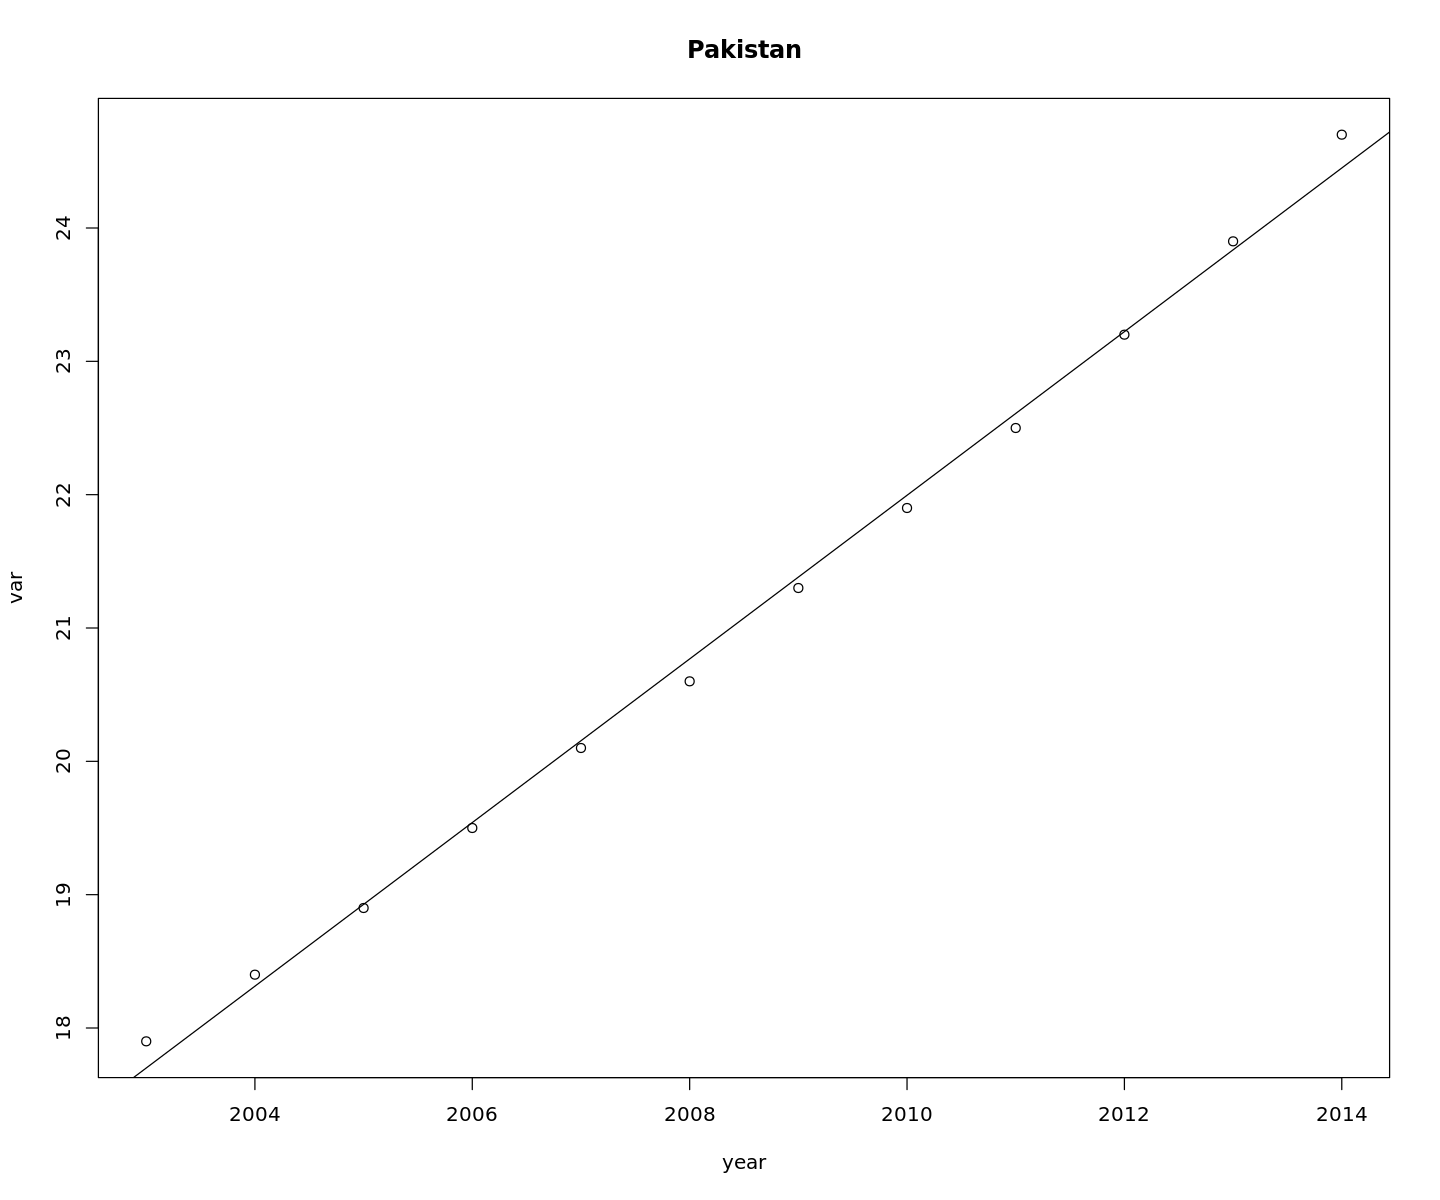

[1] "Papua New Guinea"


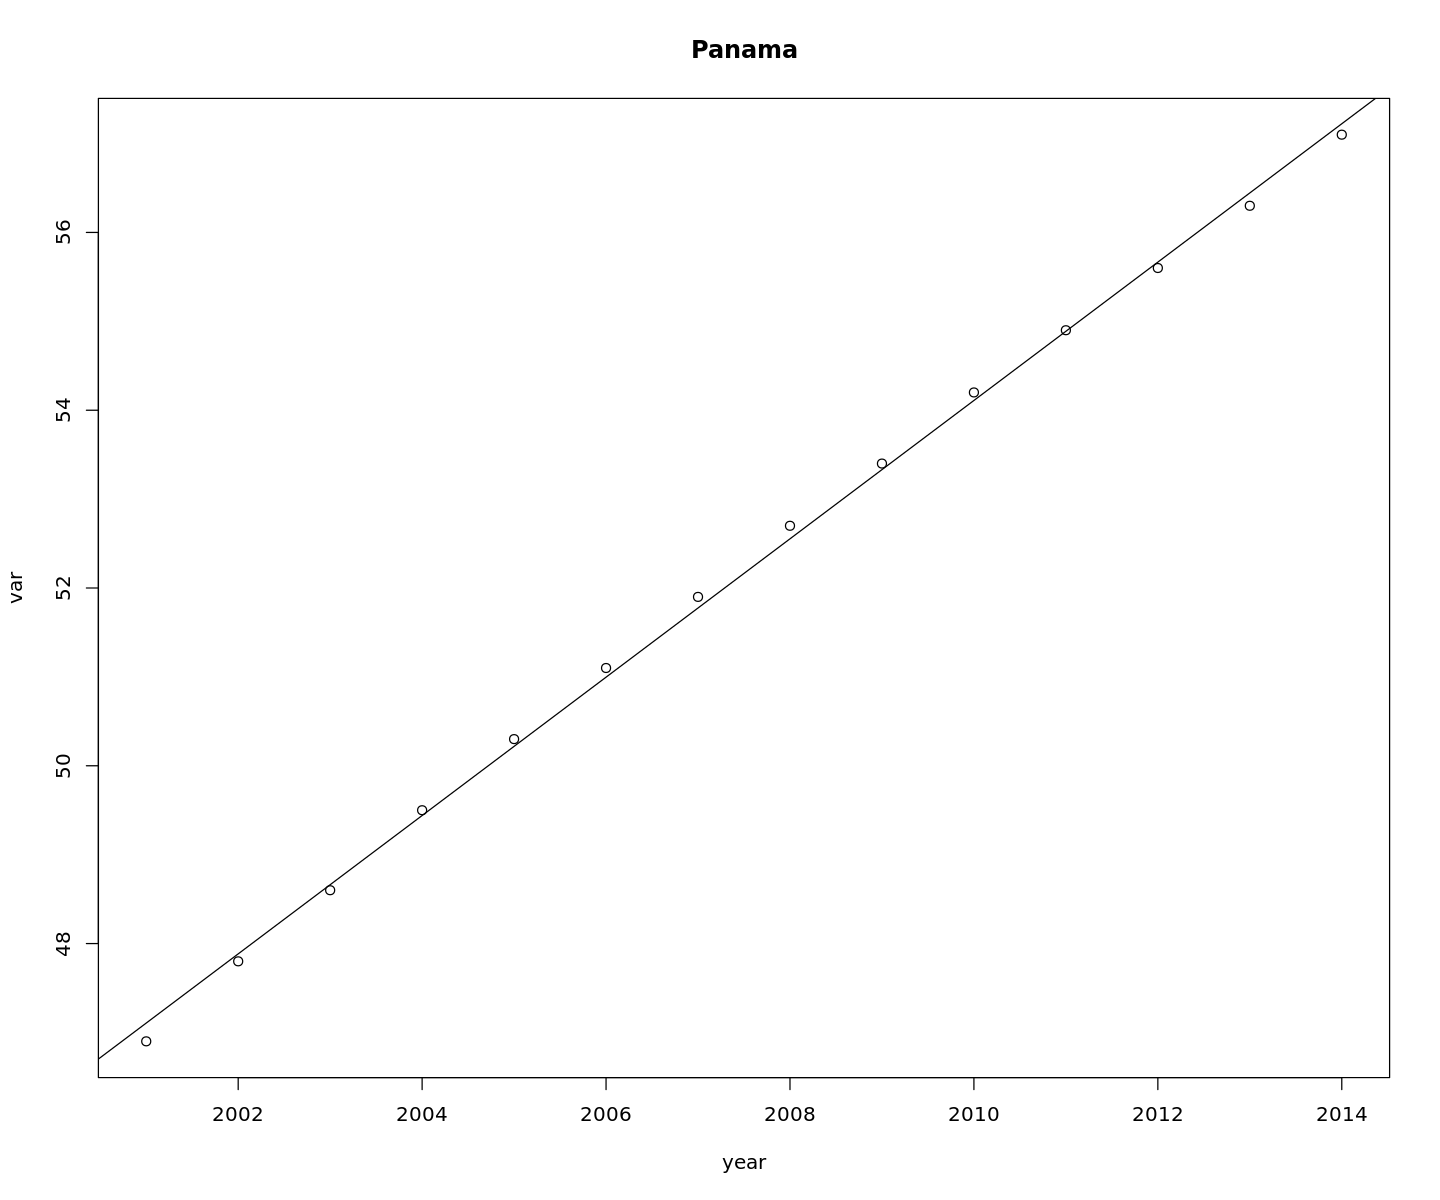

[1] "Paraguay"


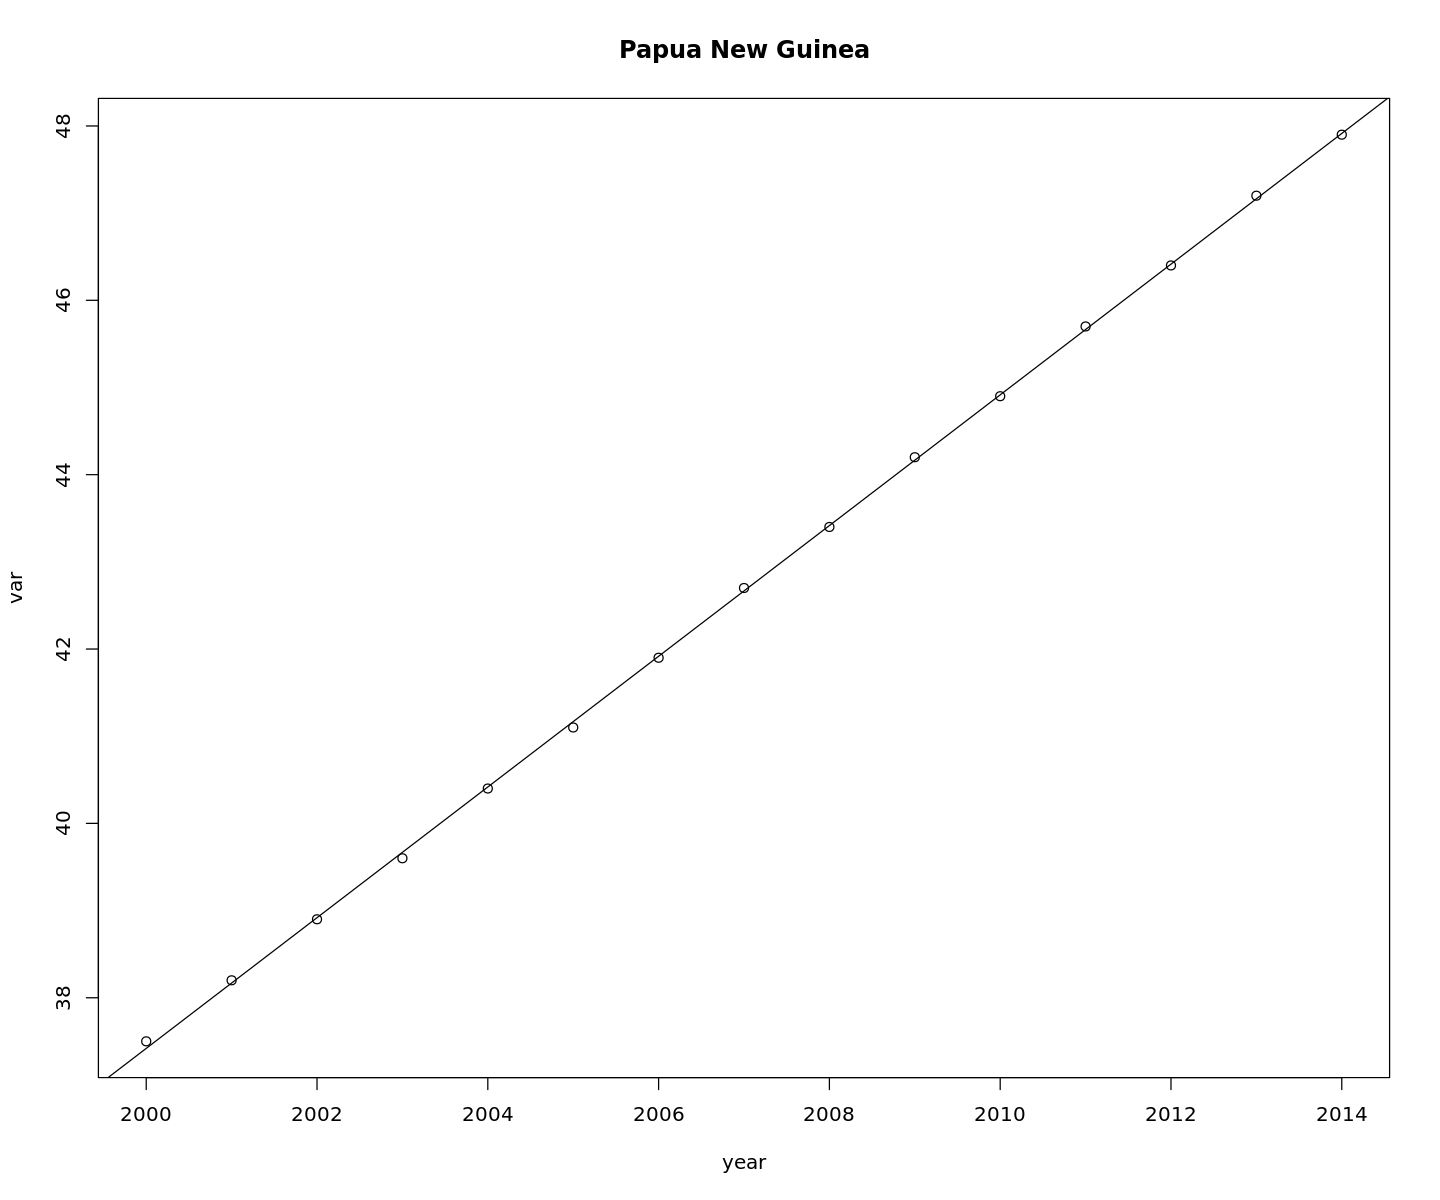

[1] "Peru"


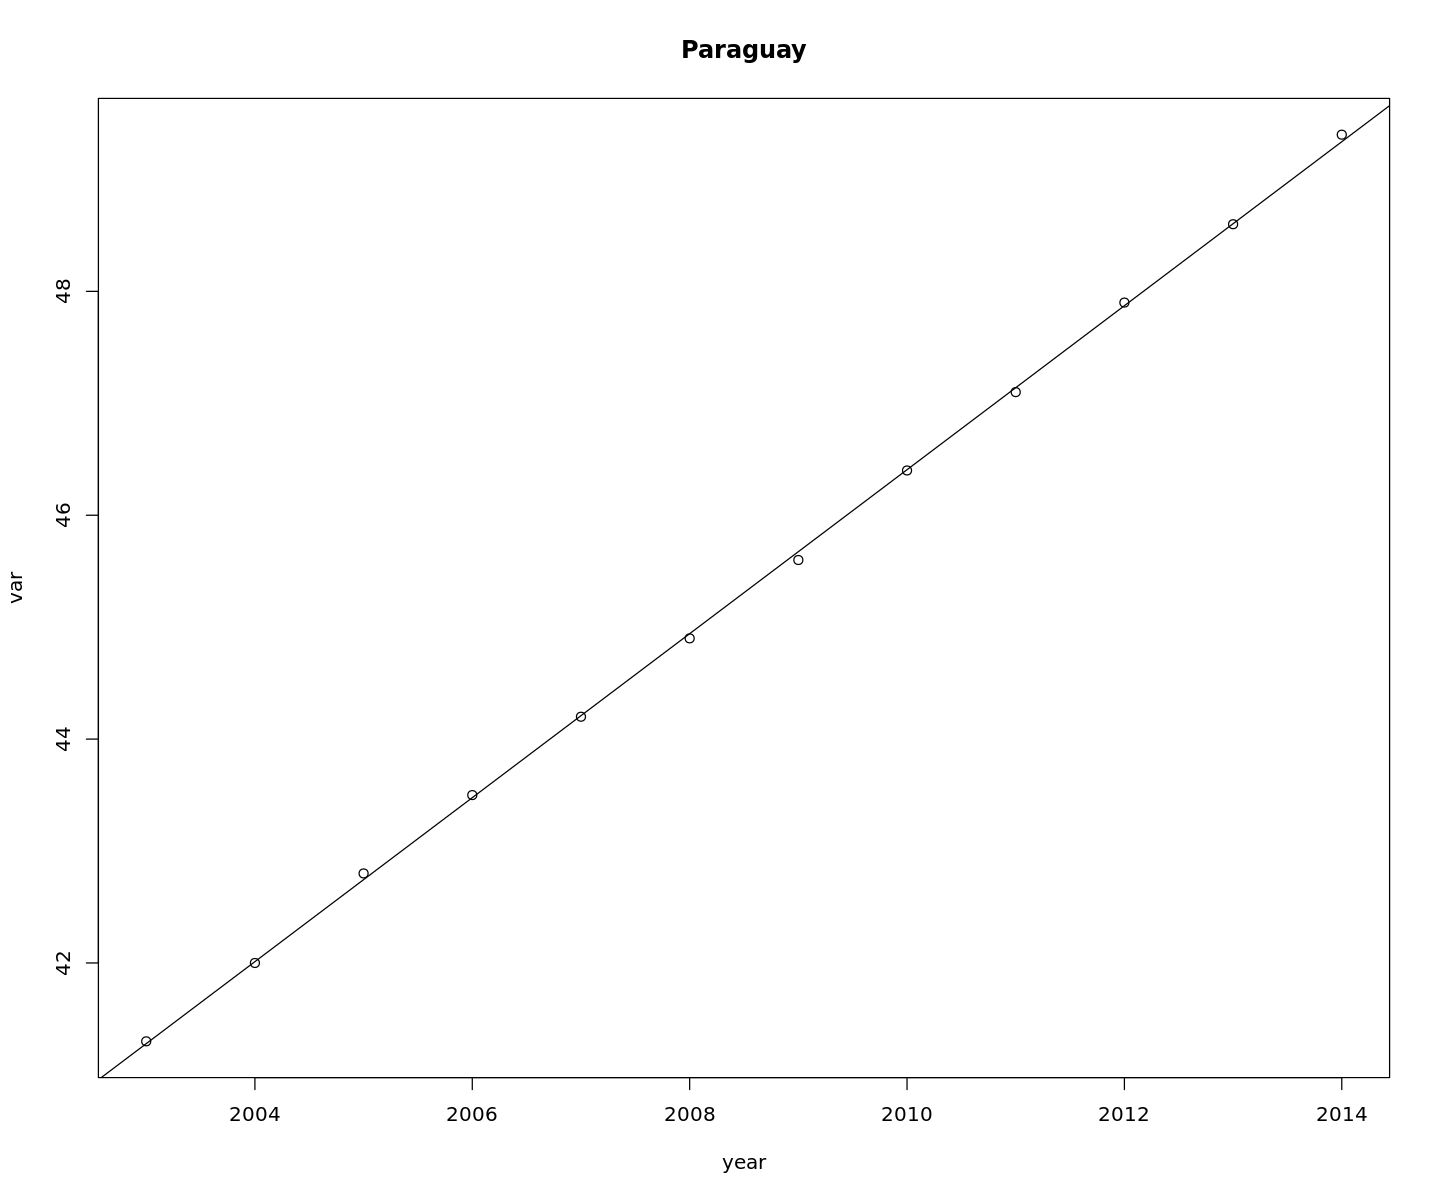

[1] "Philippines"


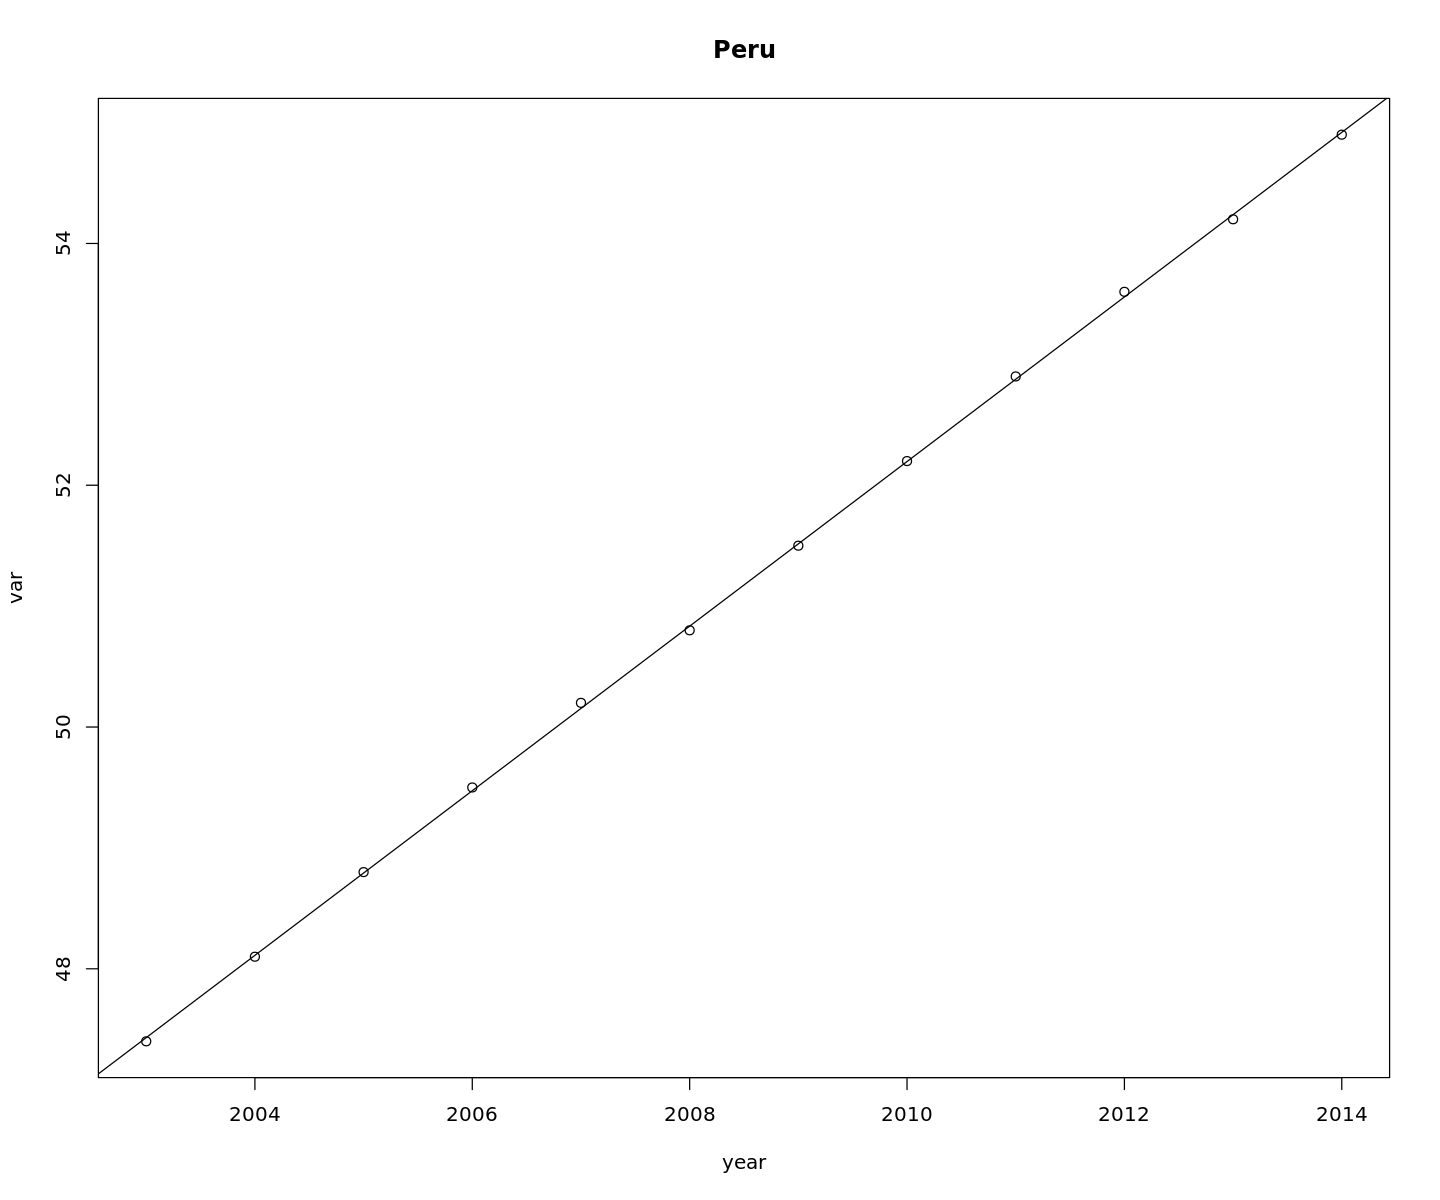

[1] "Poland"


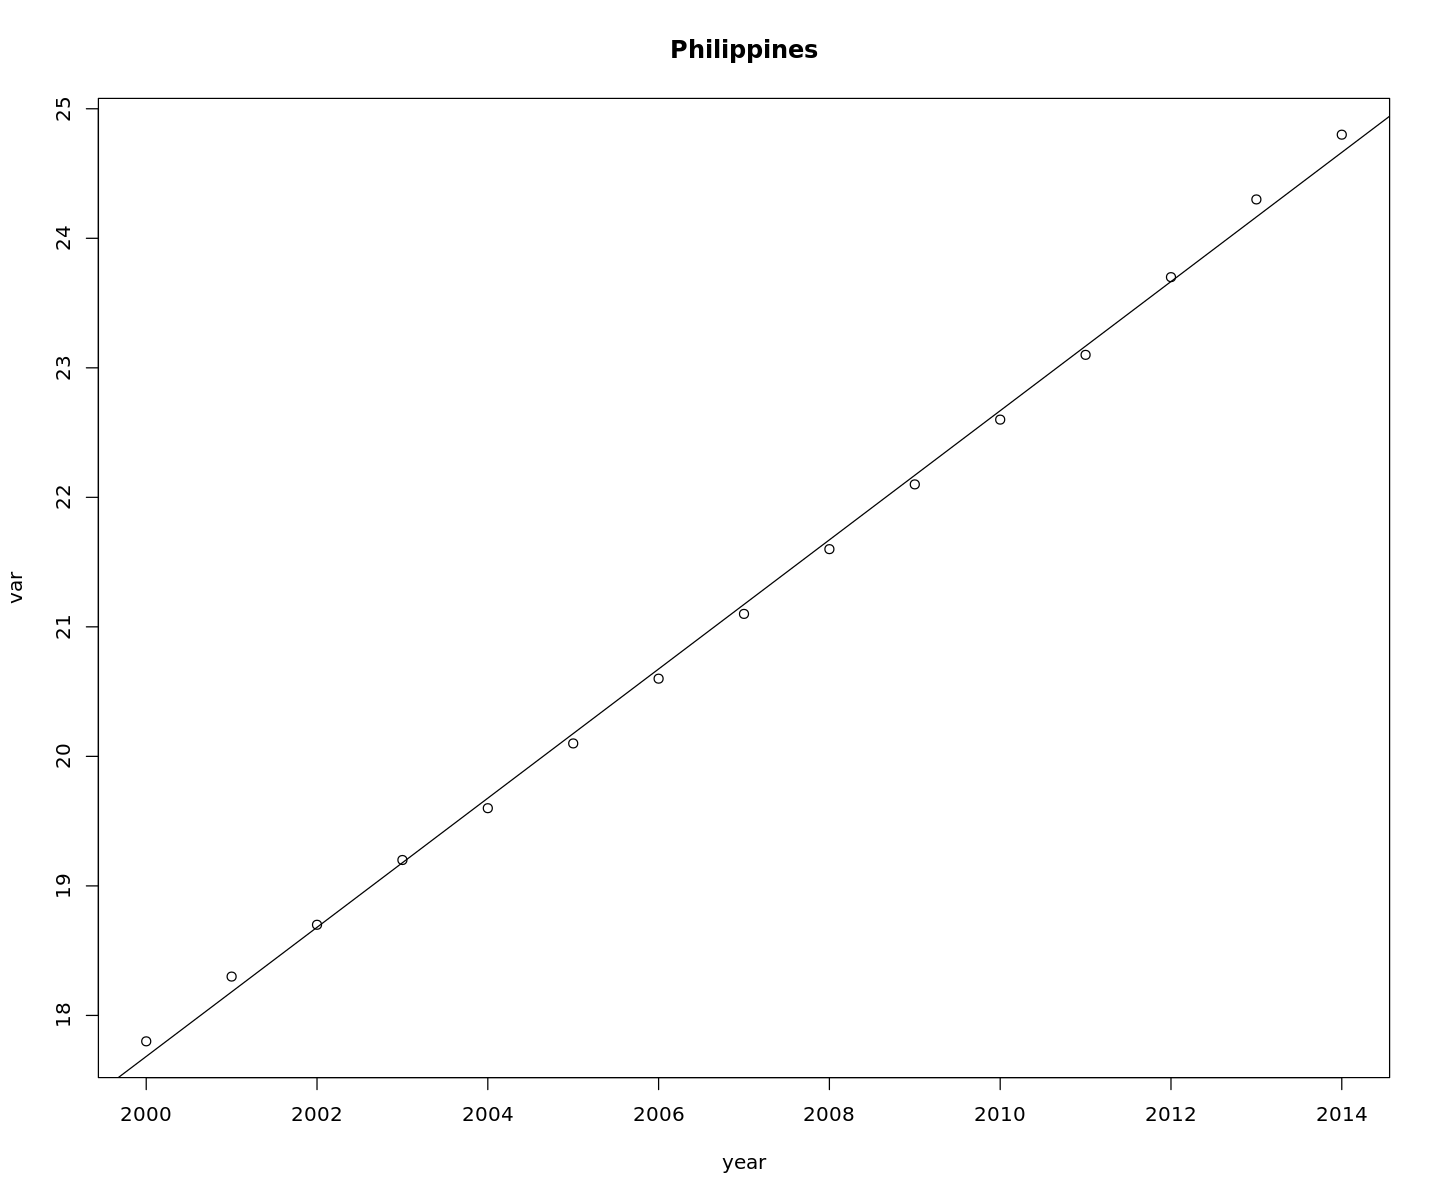

[1] "Portugal"


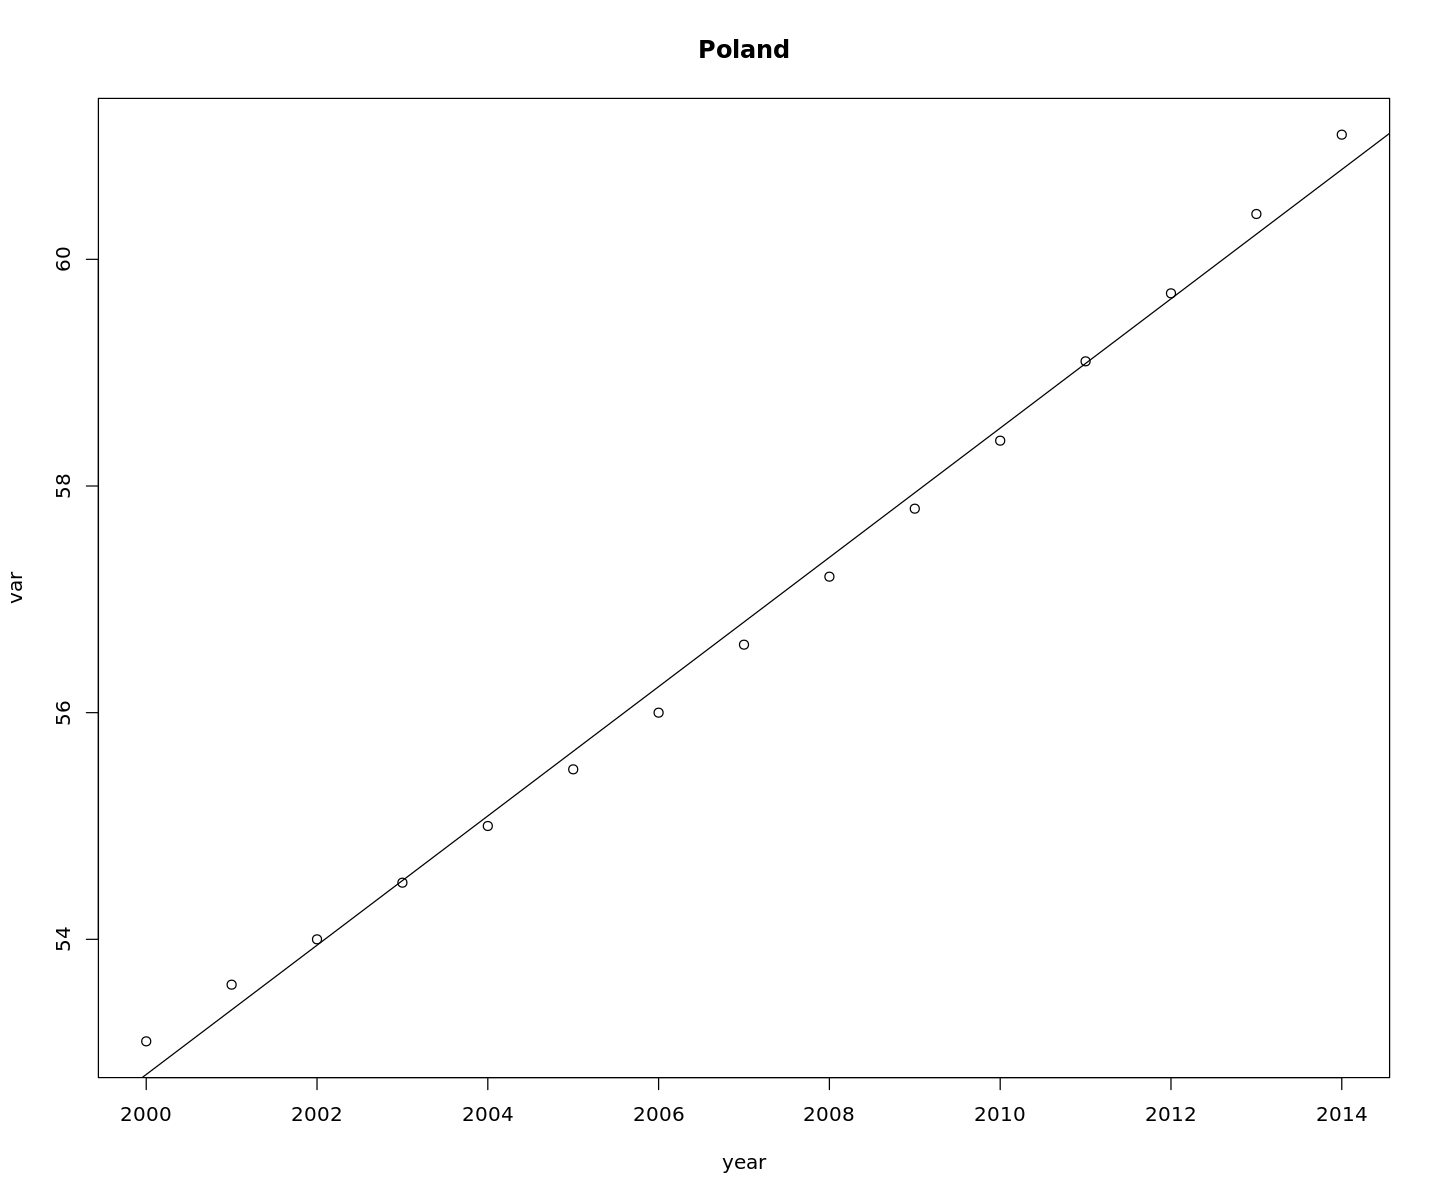

[1] "Romania"


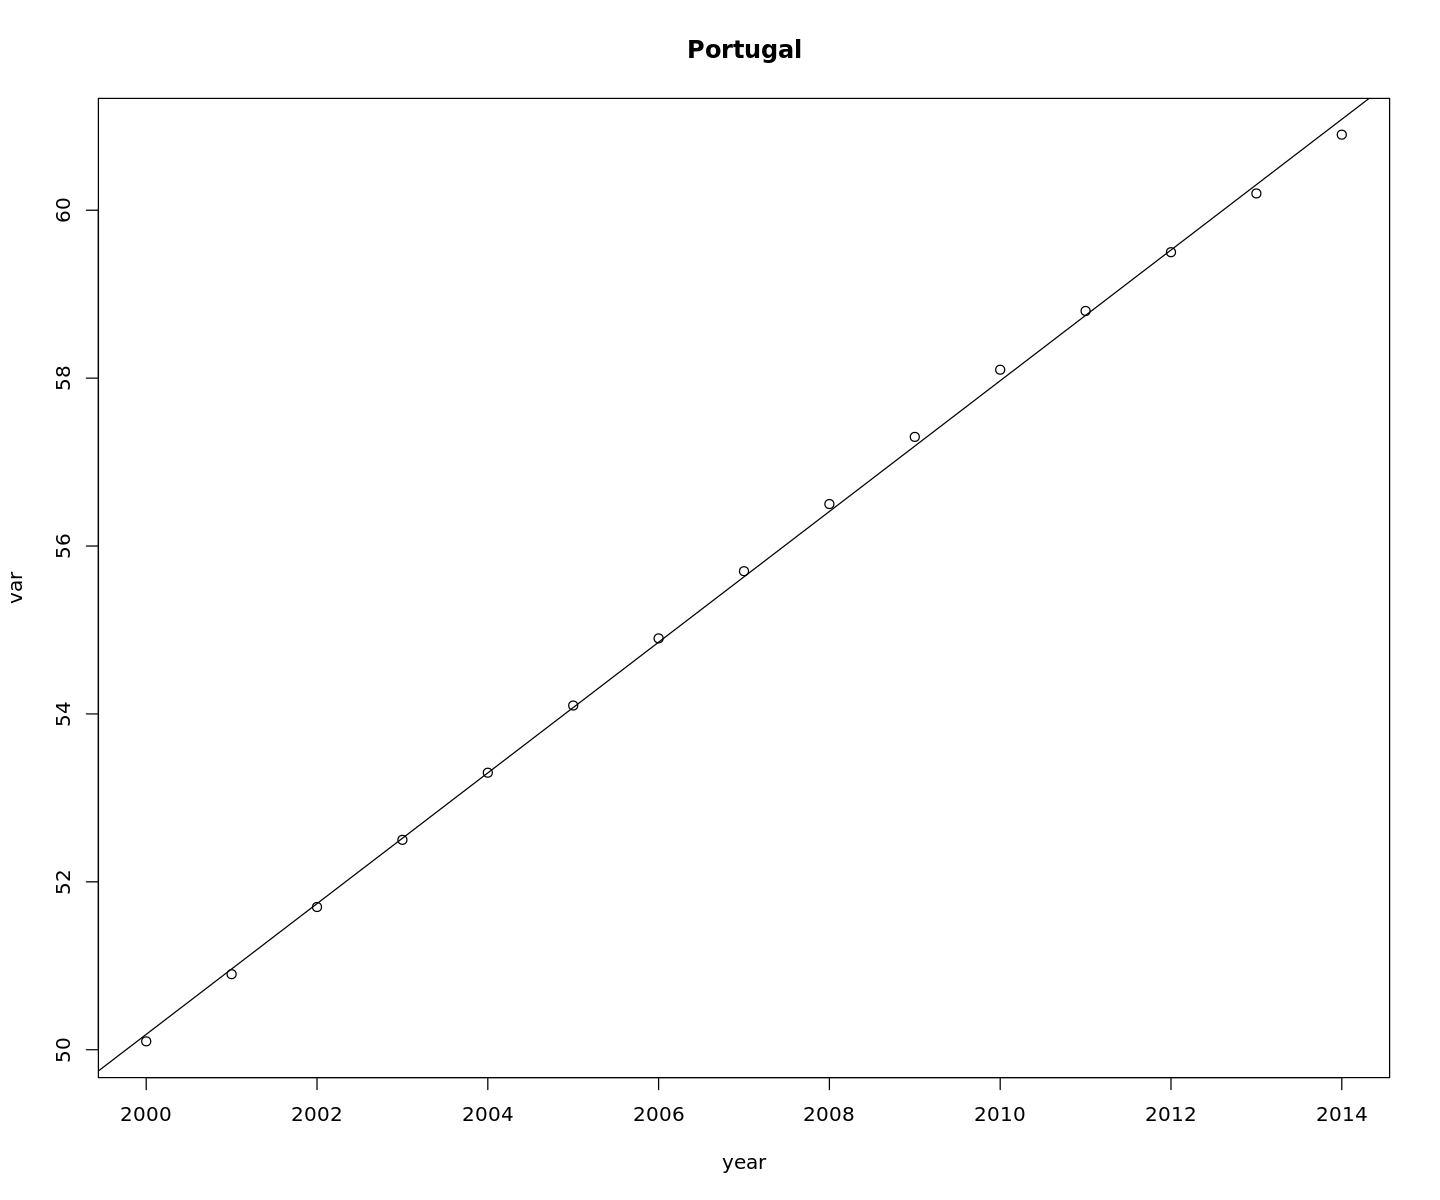

[1] "Russian Federation"


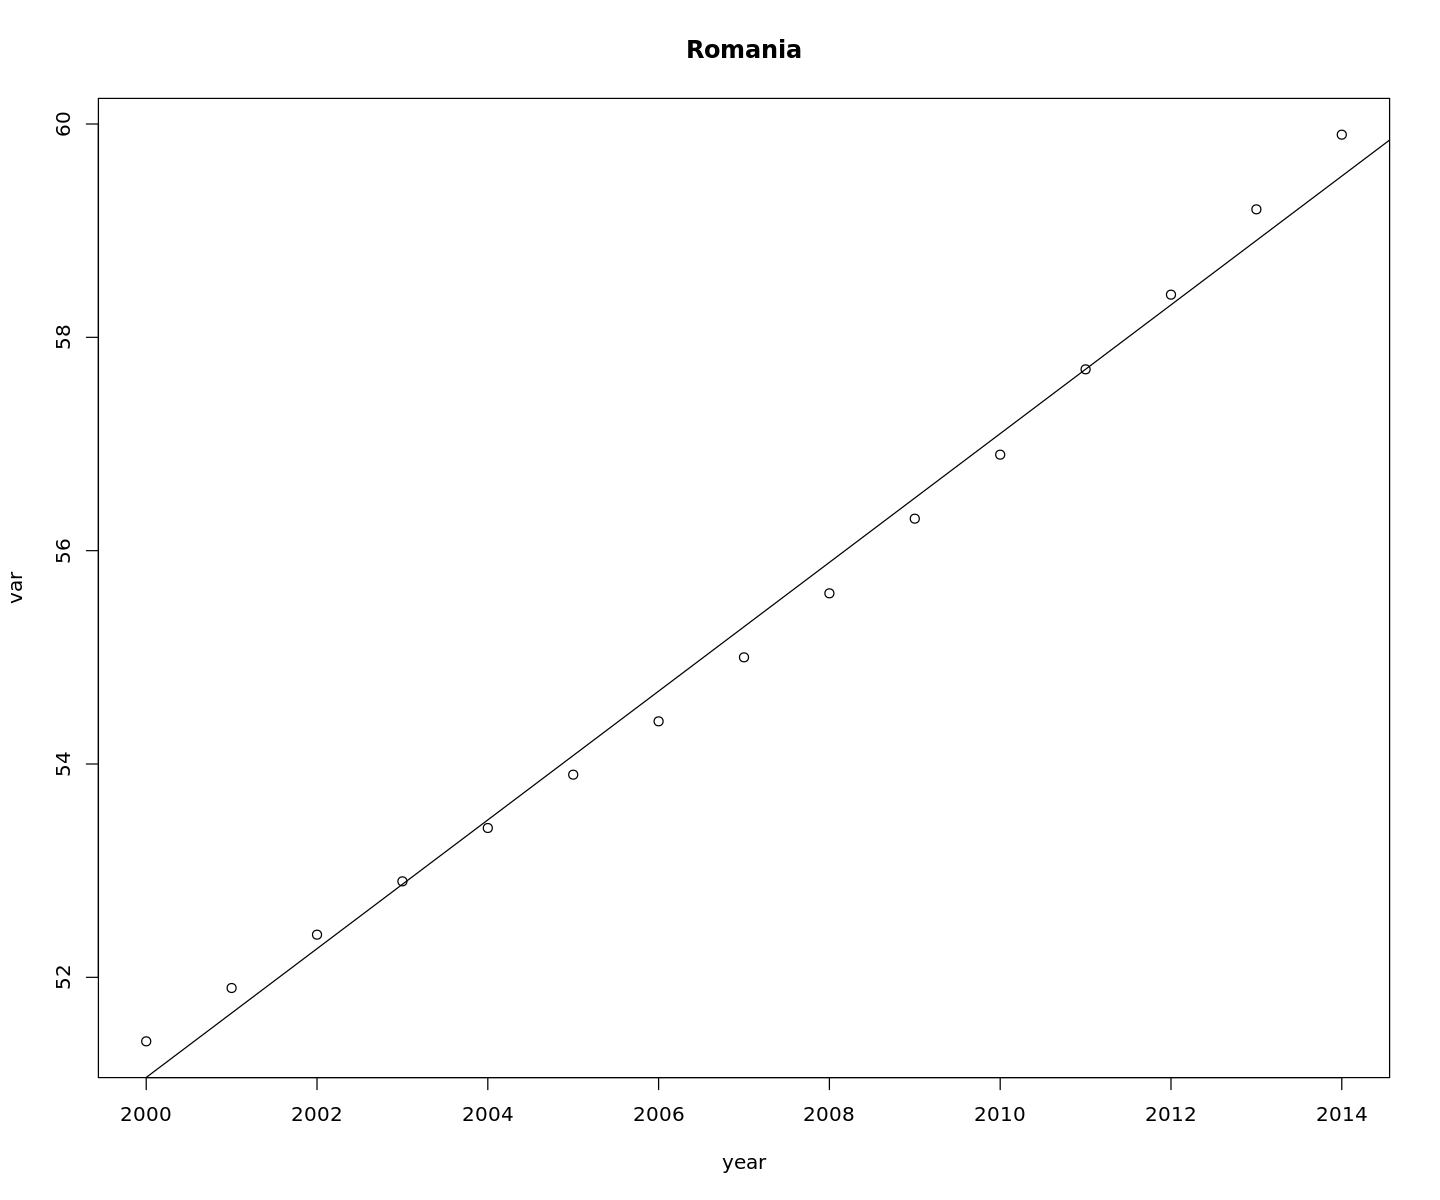

[1] "Rwanda"


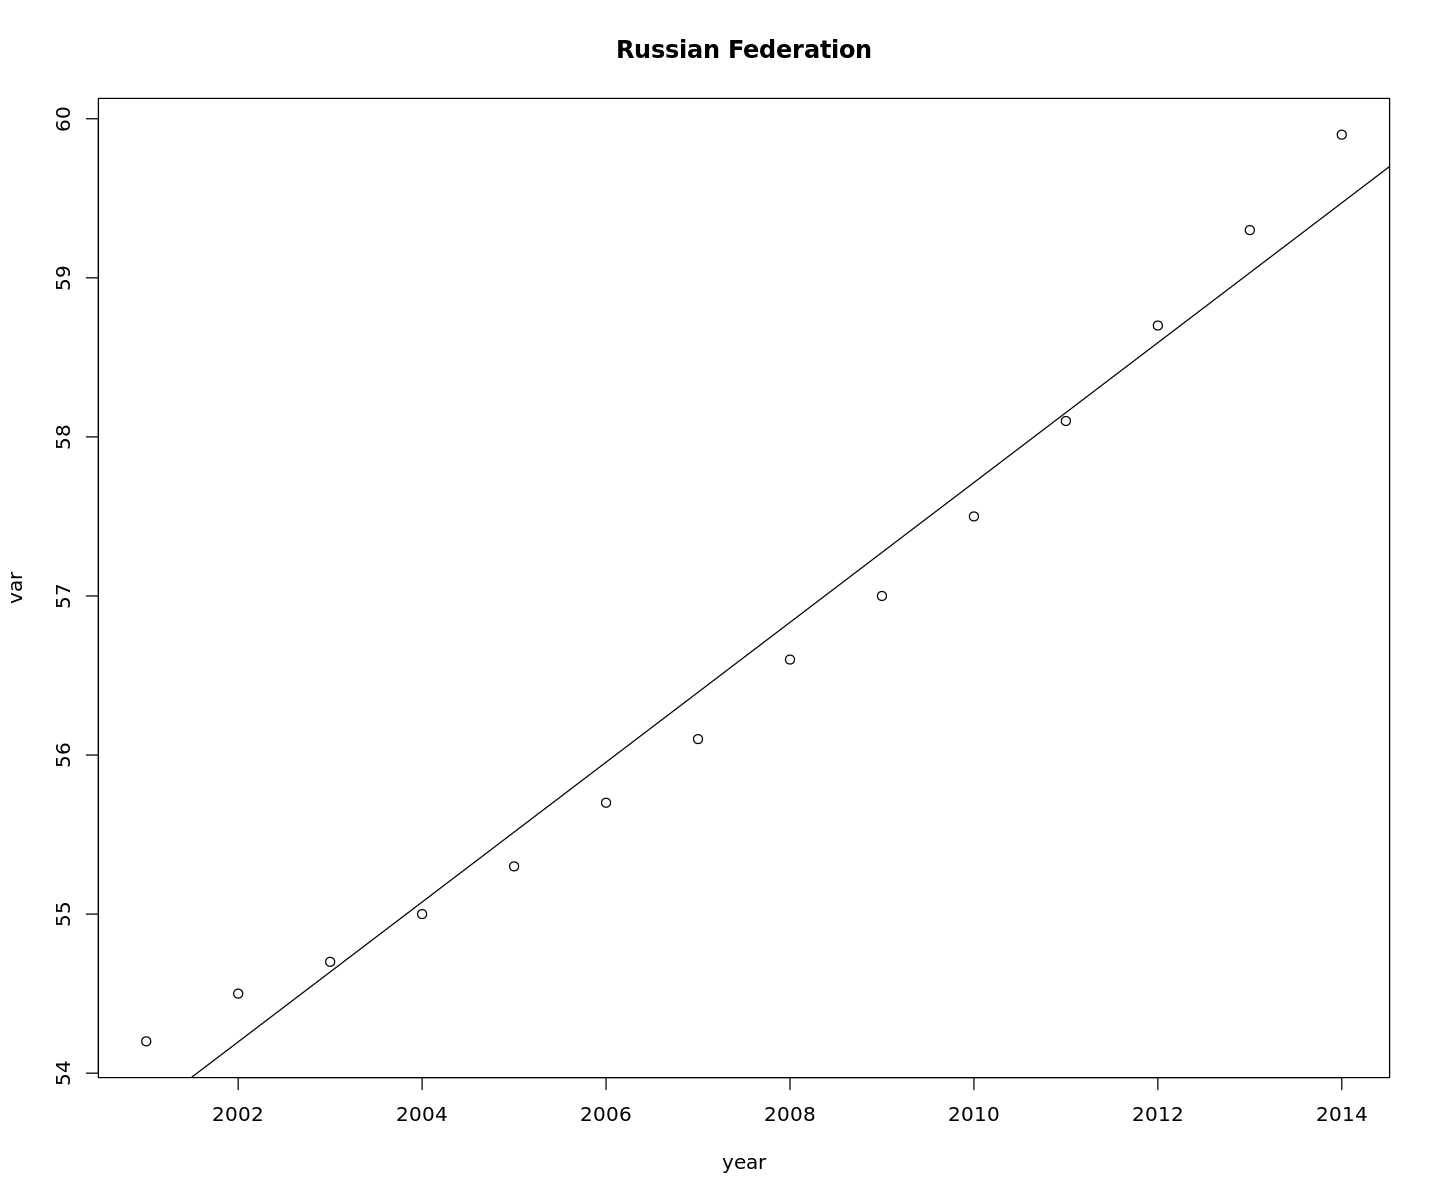

[1] "Samoa"


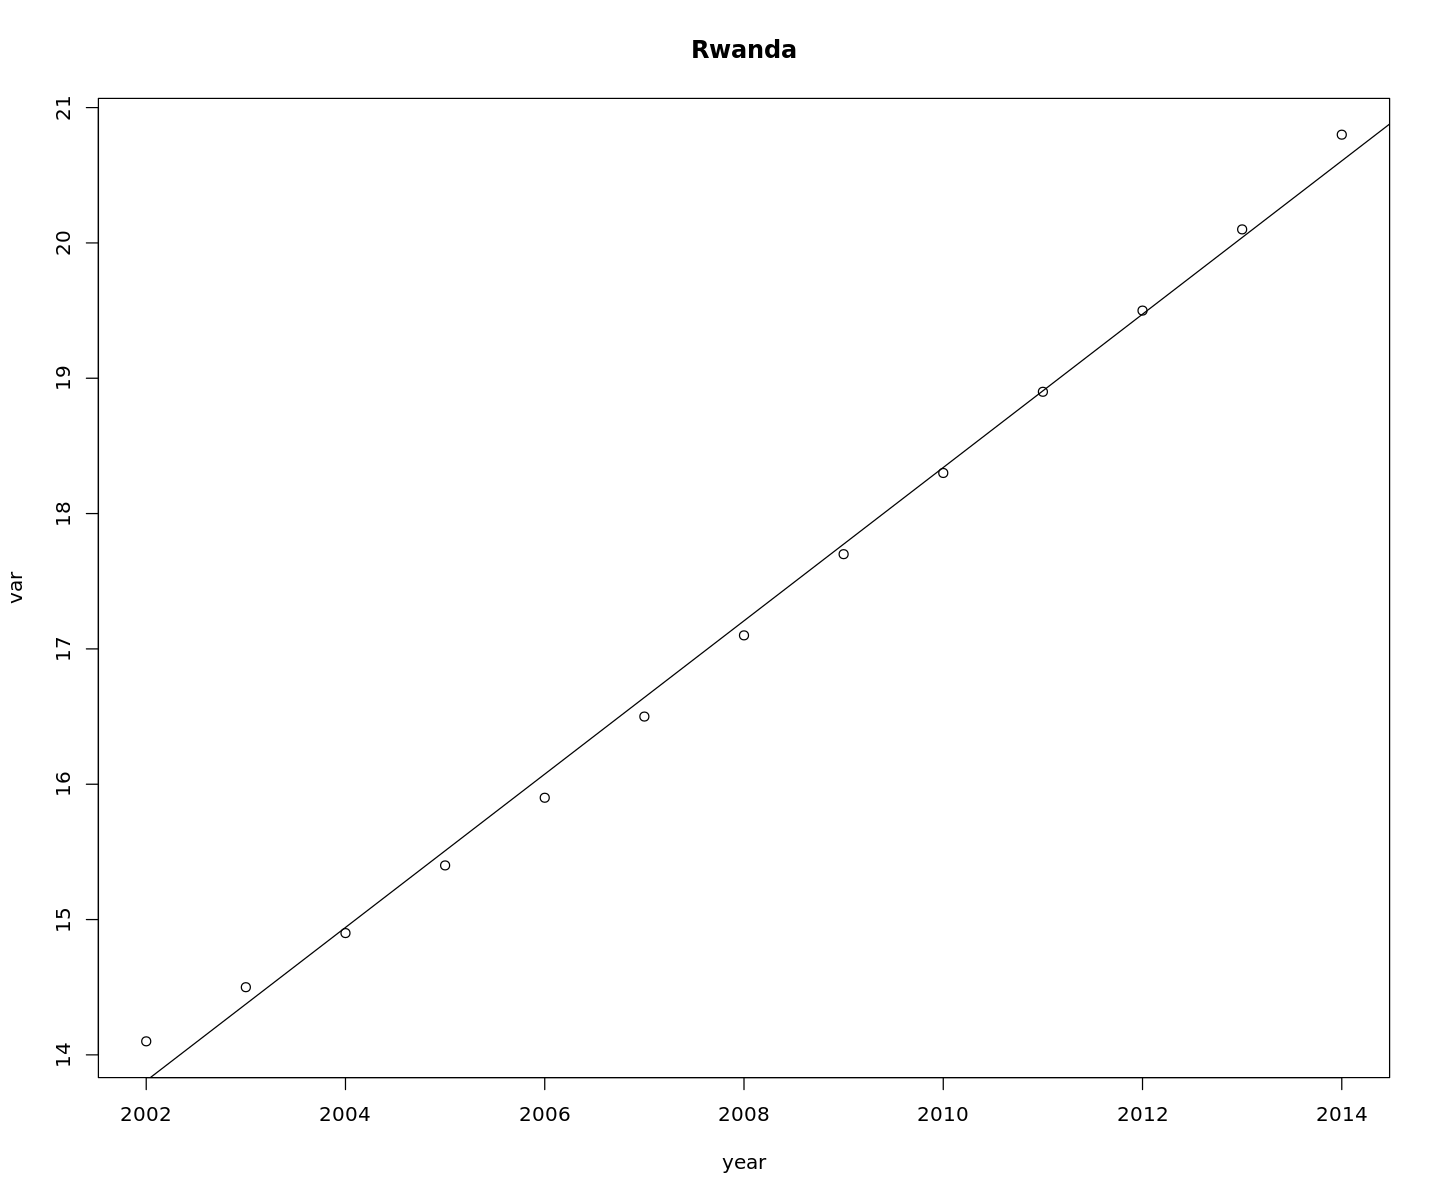

[1] "Sao Tome and Principe"


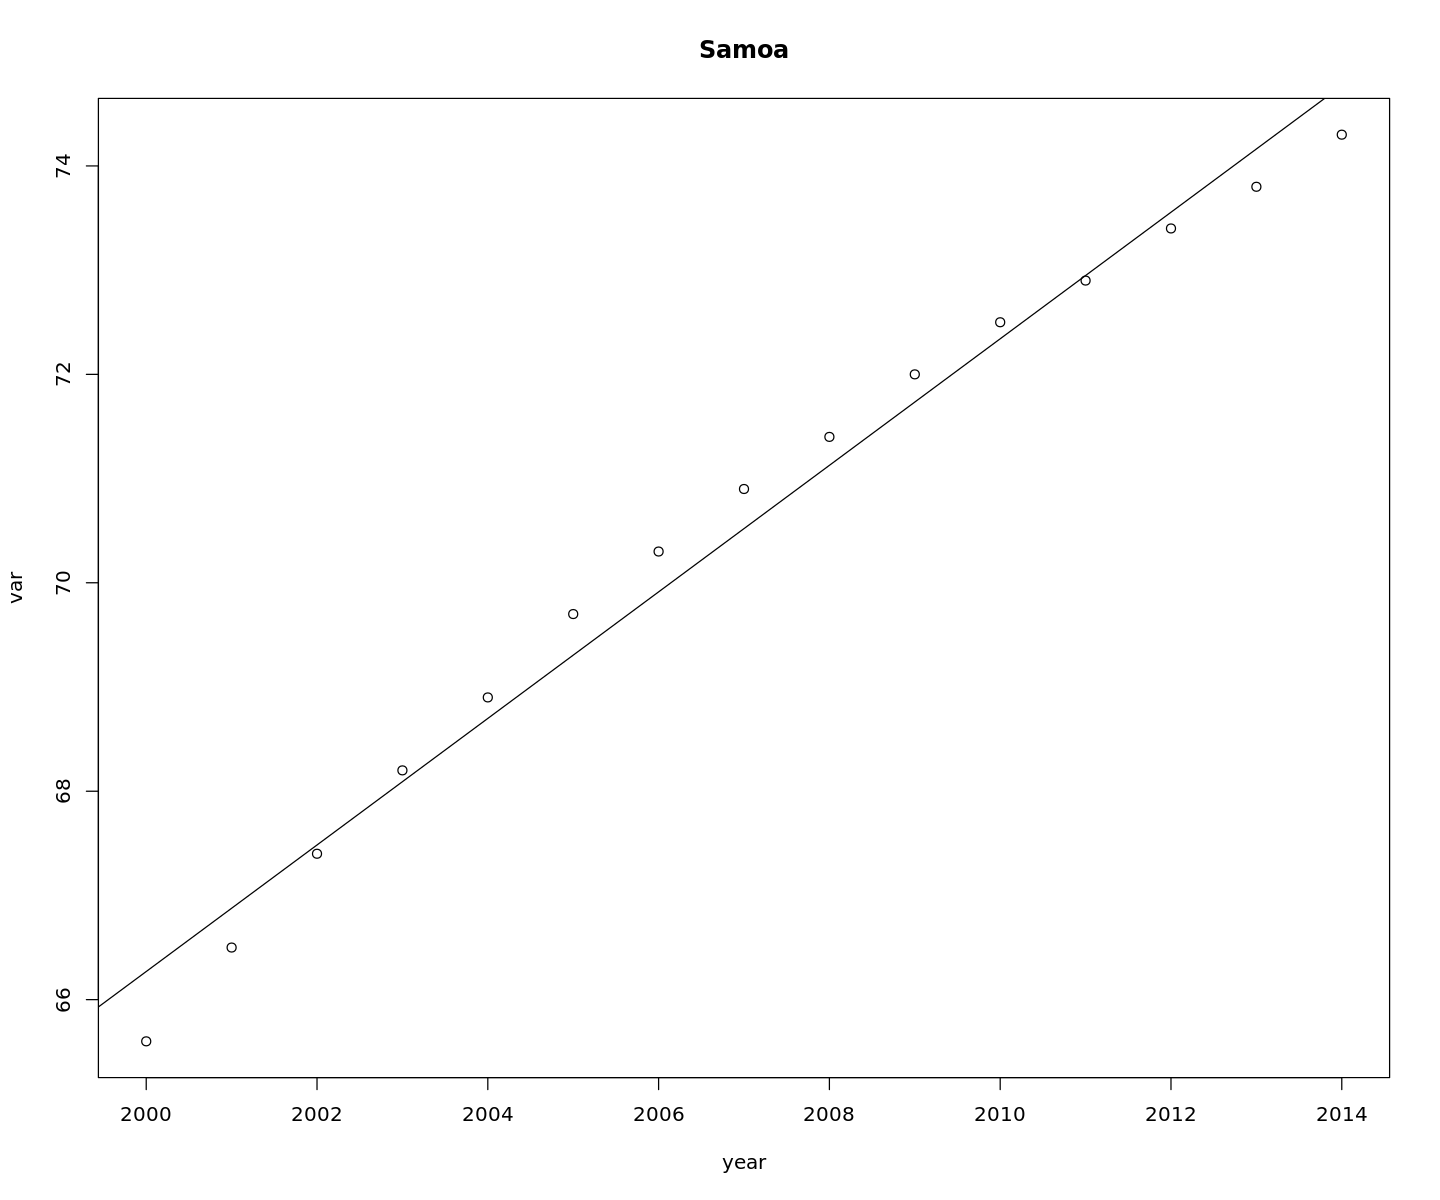

[1] "Senegal"


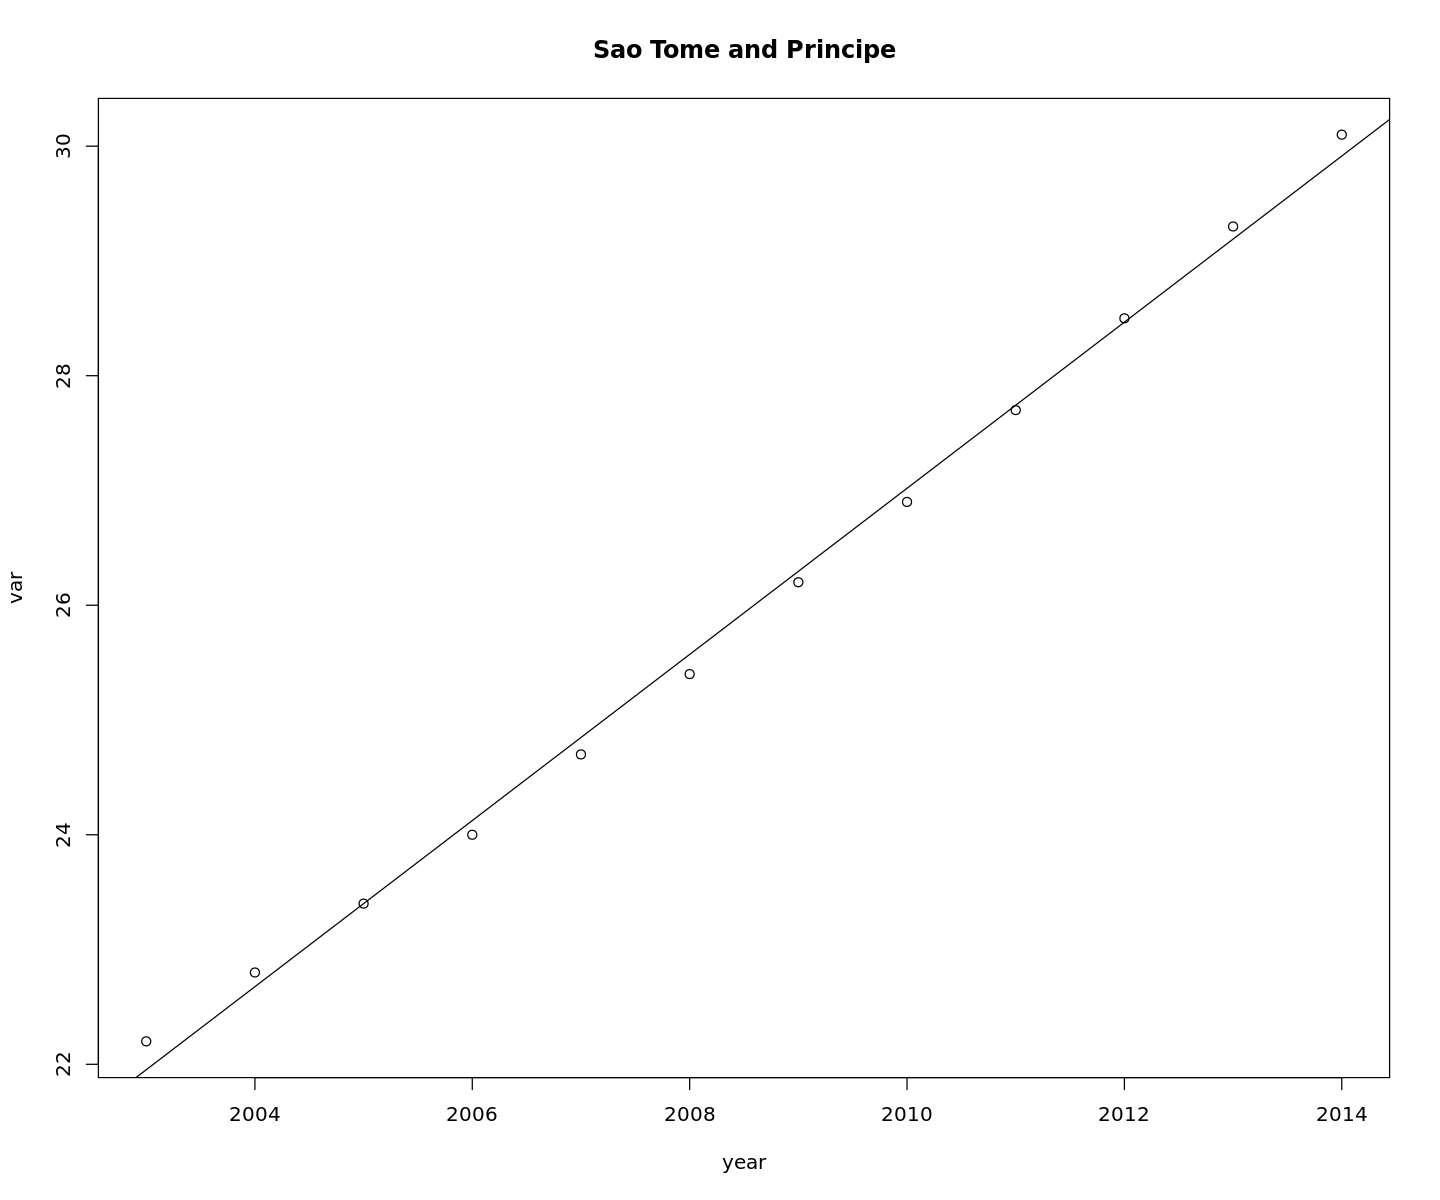

[1] "Serbia"


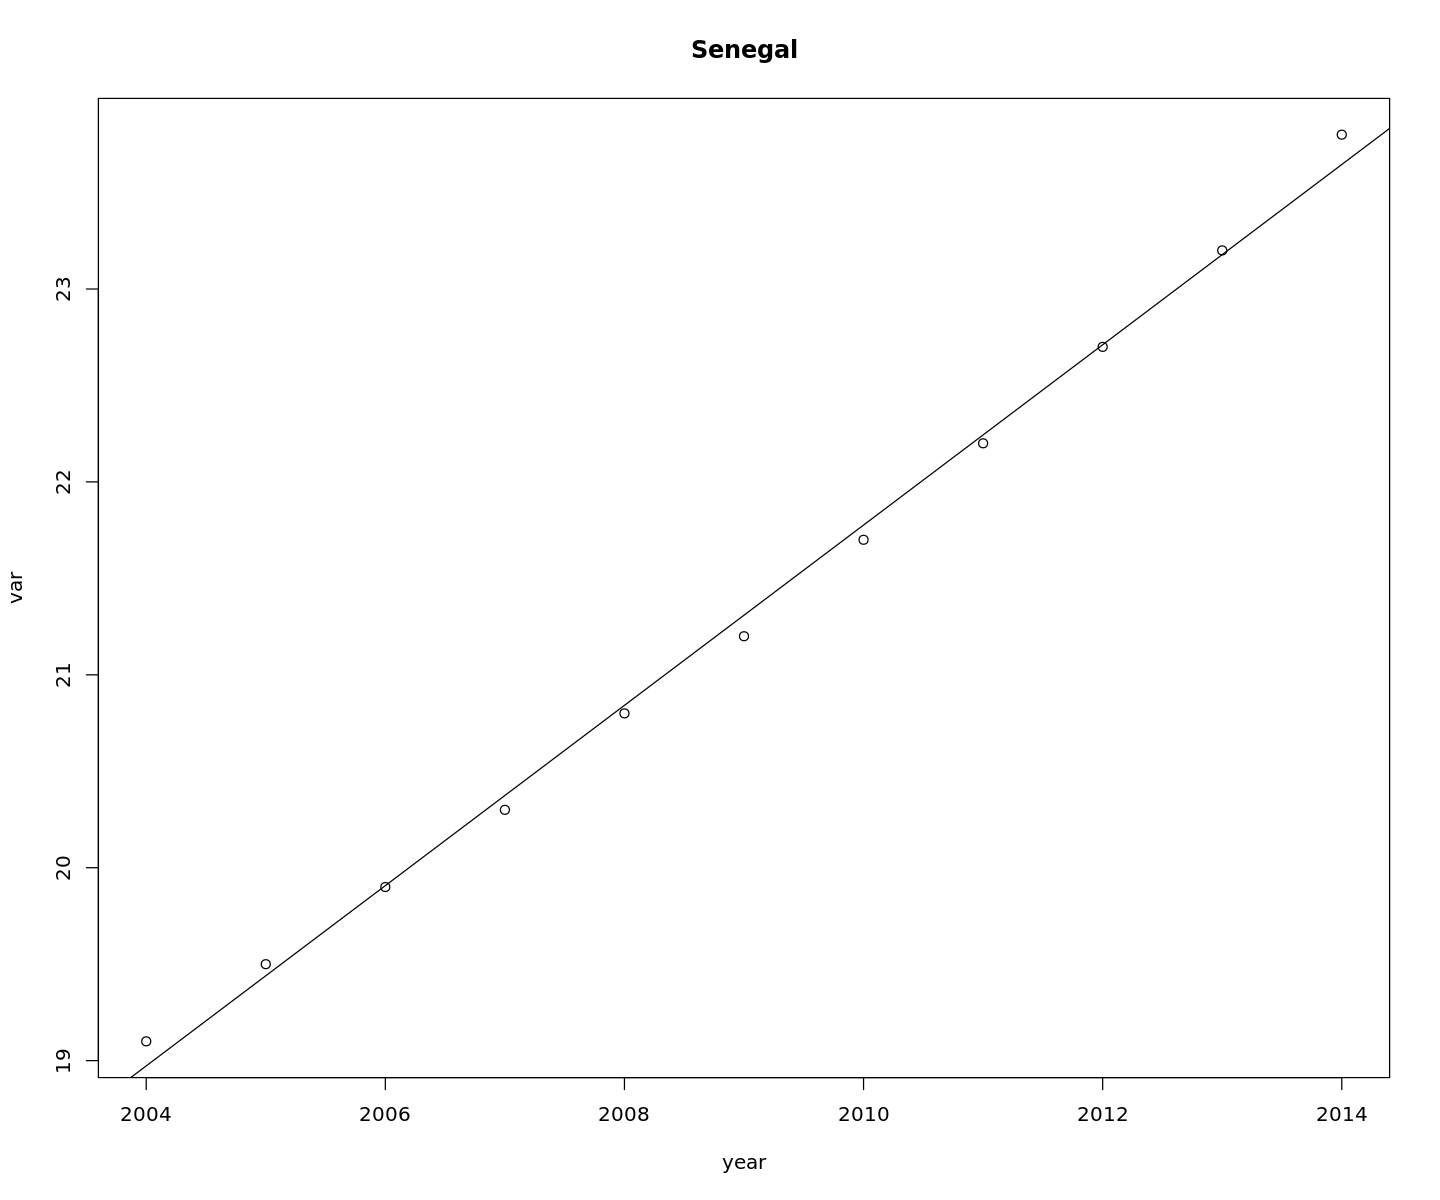

[1] "Seychelles"


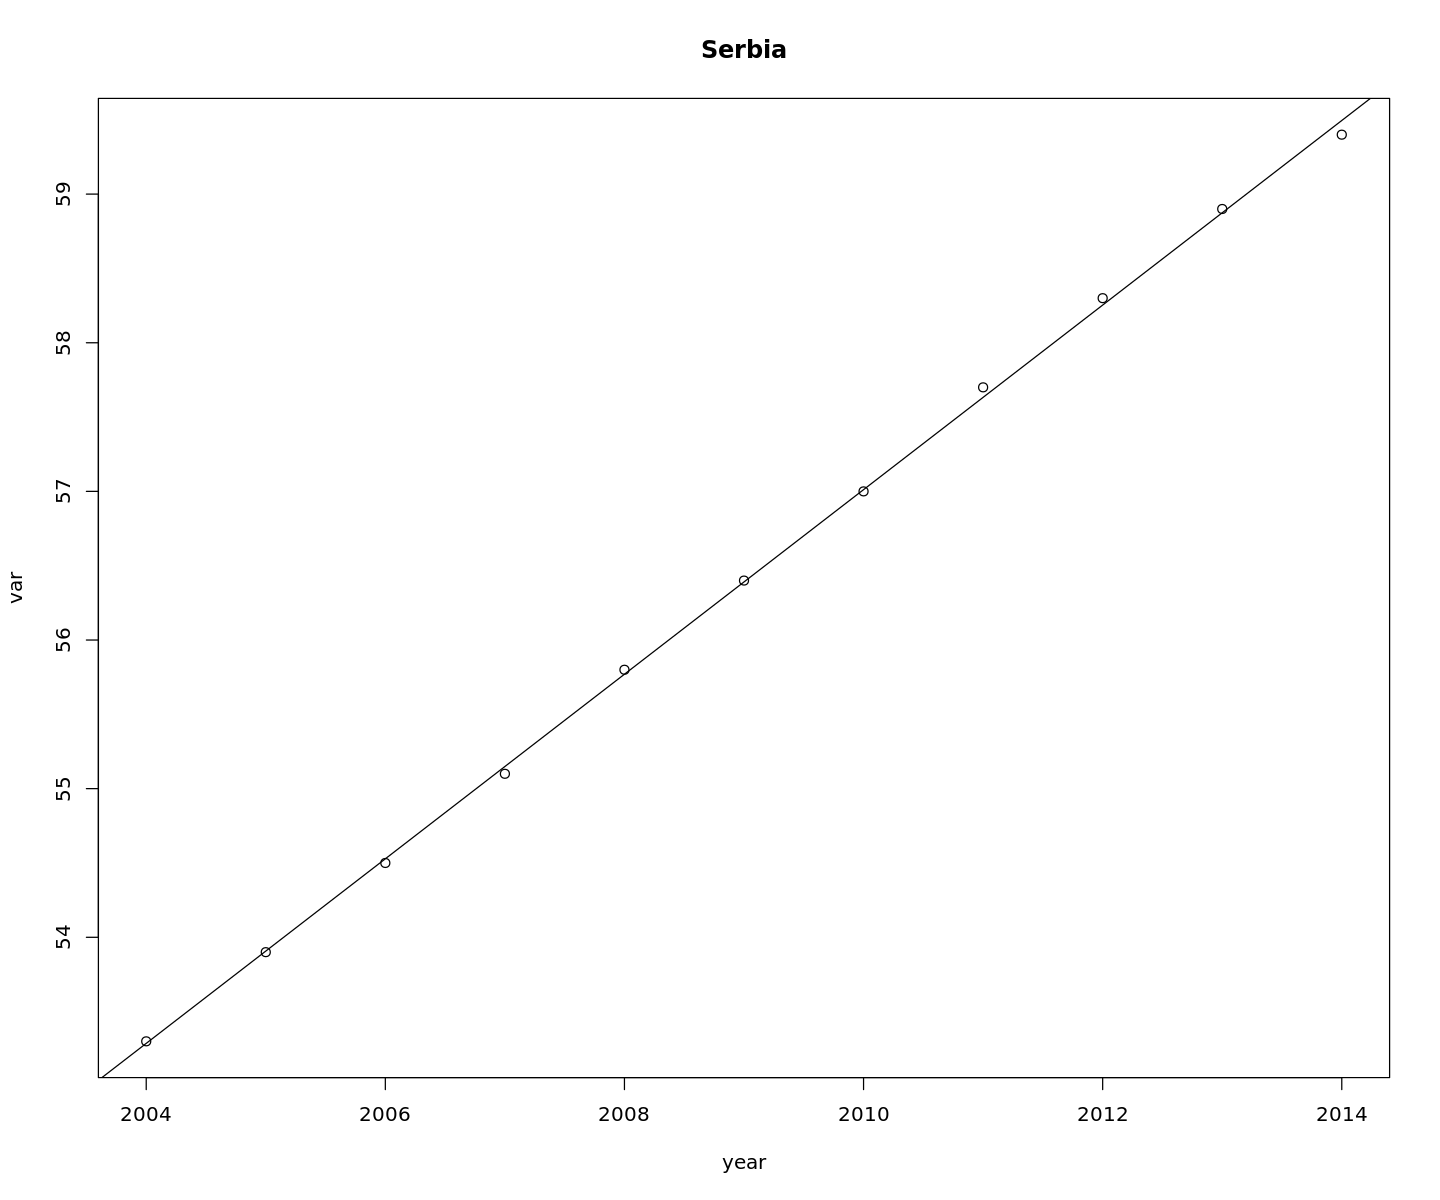

[1] "Sierra Leone"


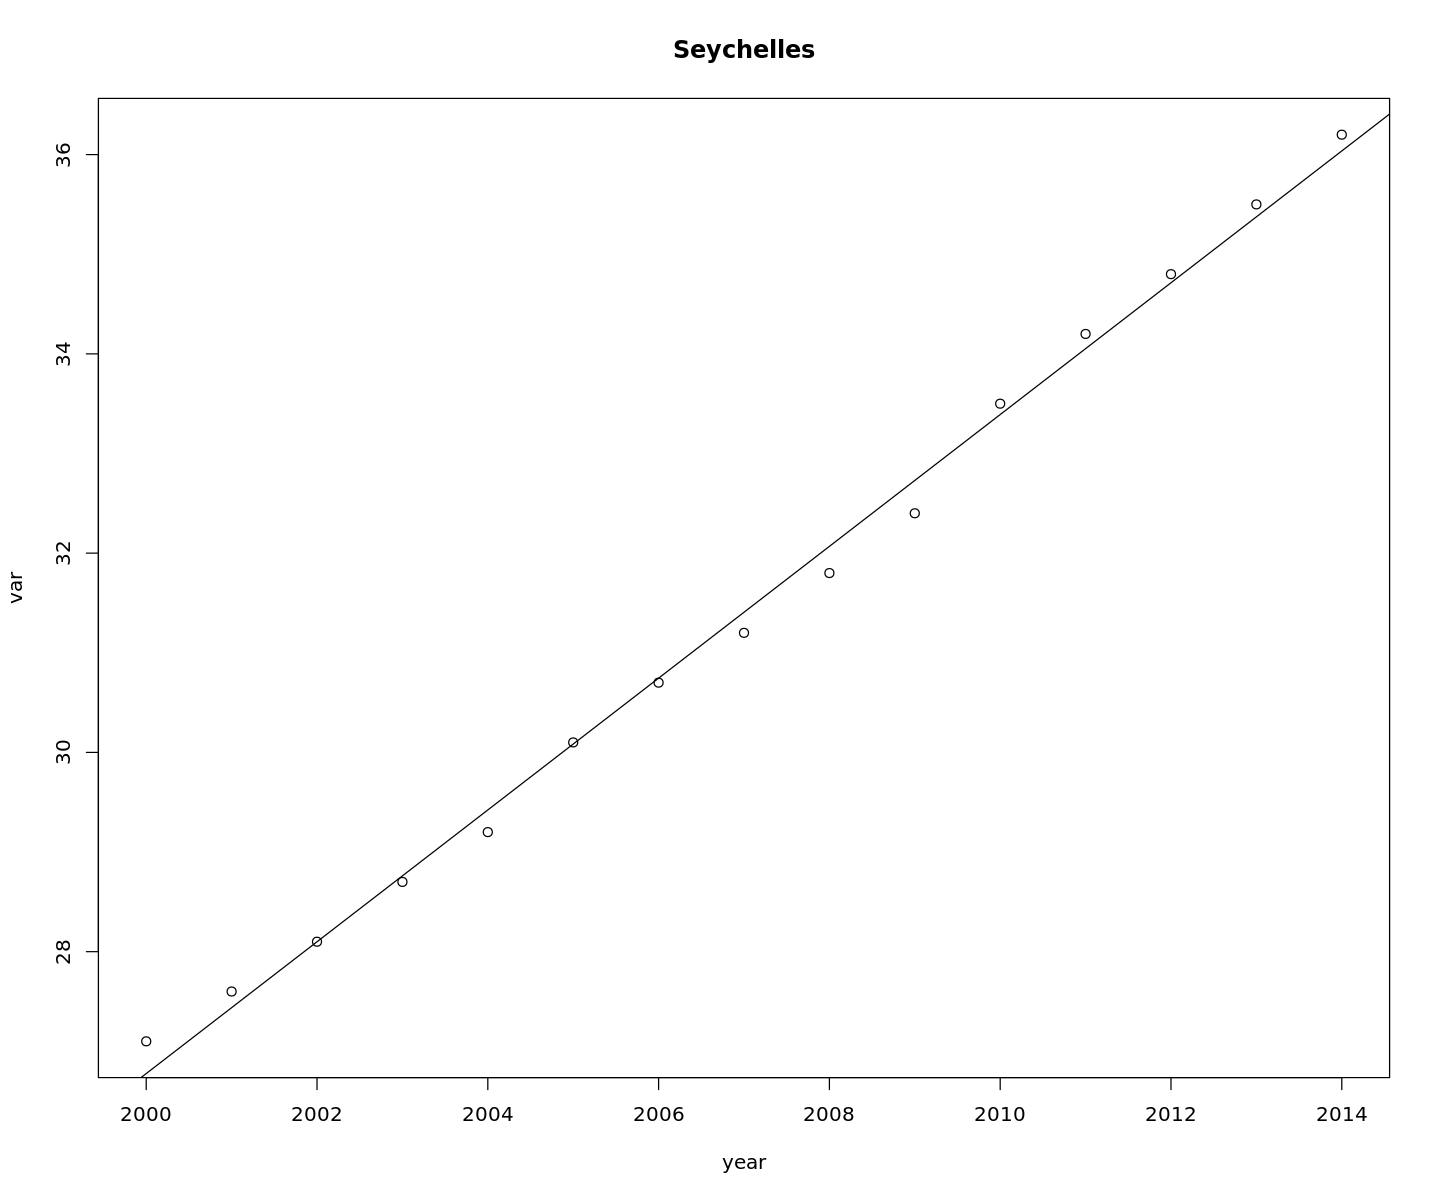

[1] "Solomon Islands"


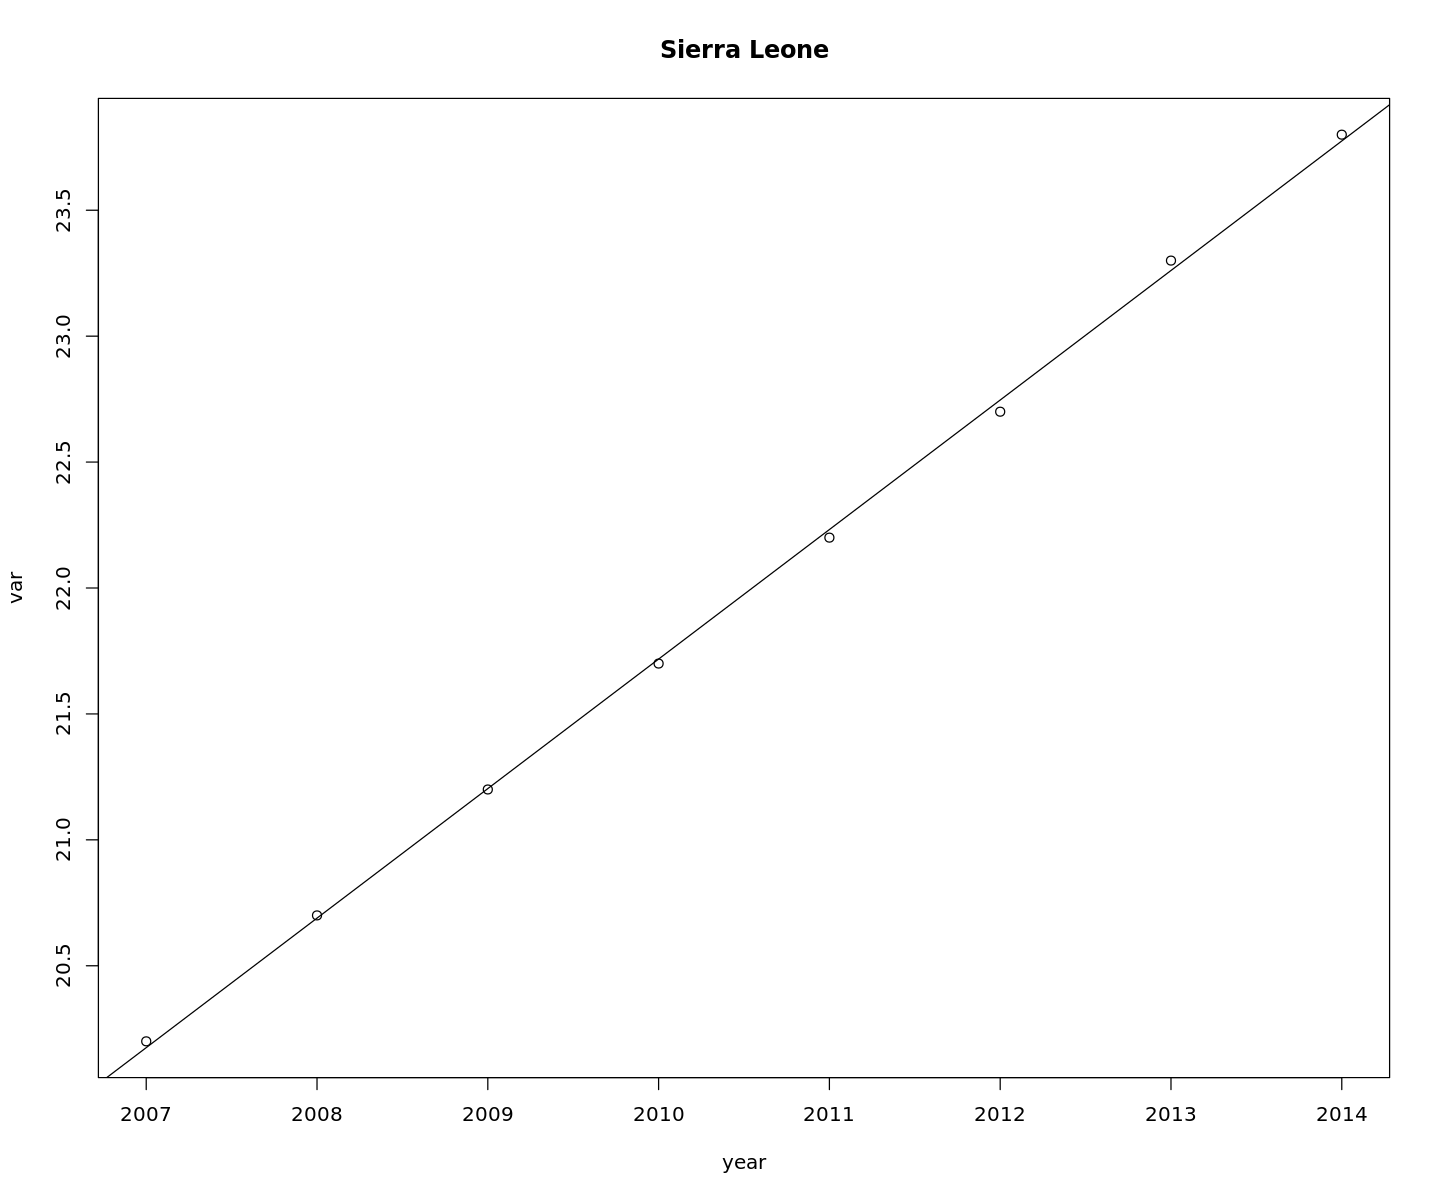

[1] "South Africa"


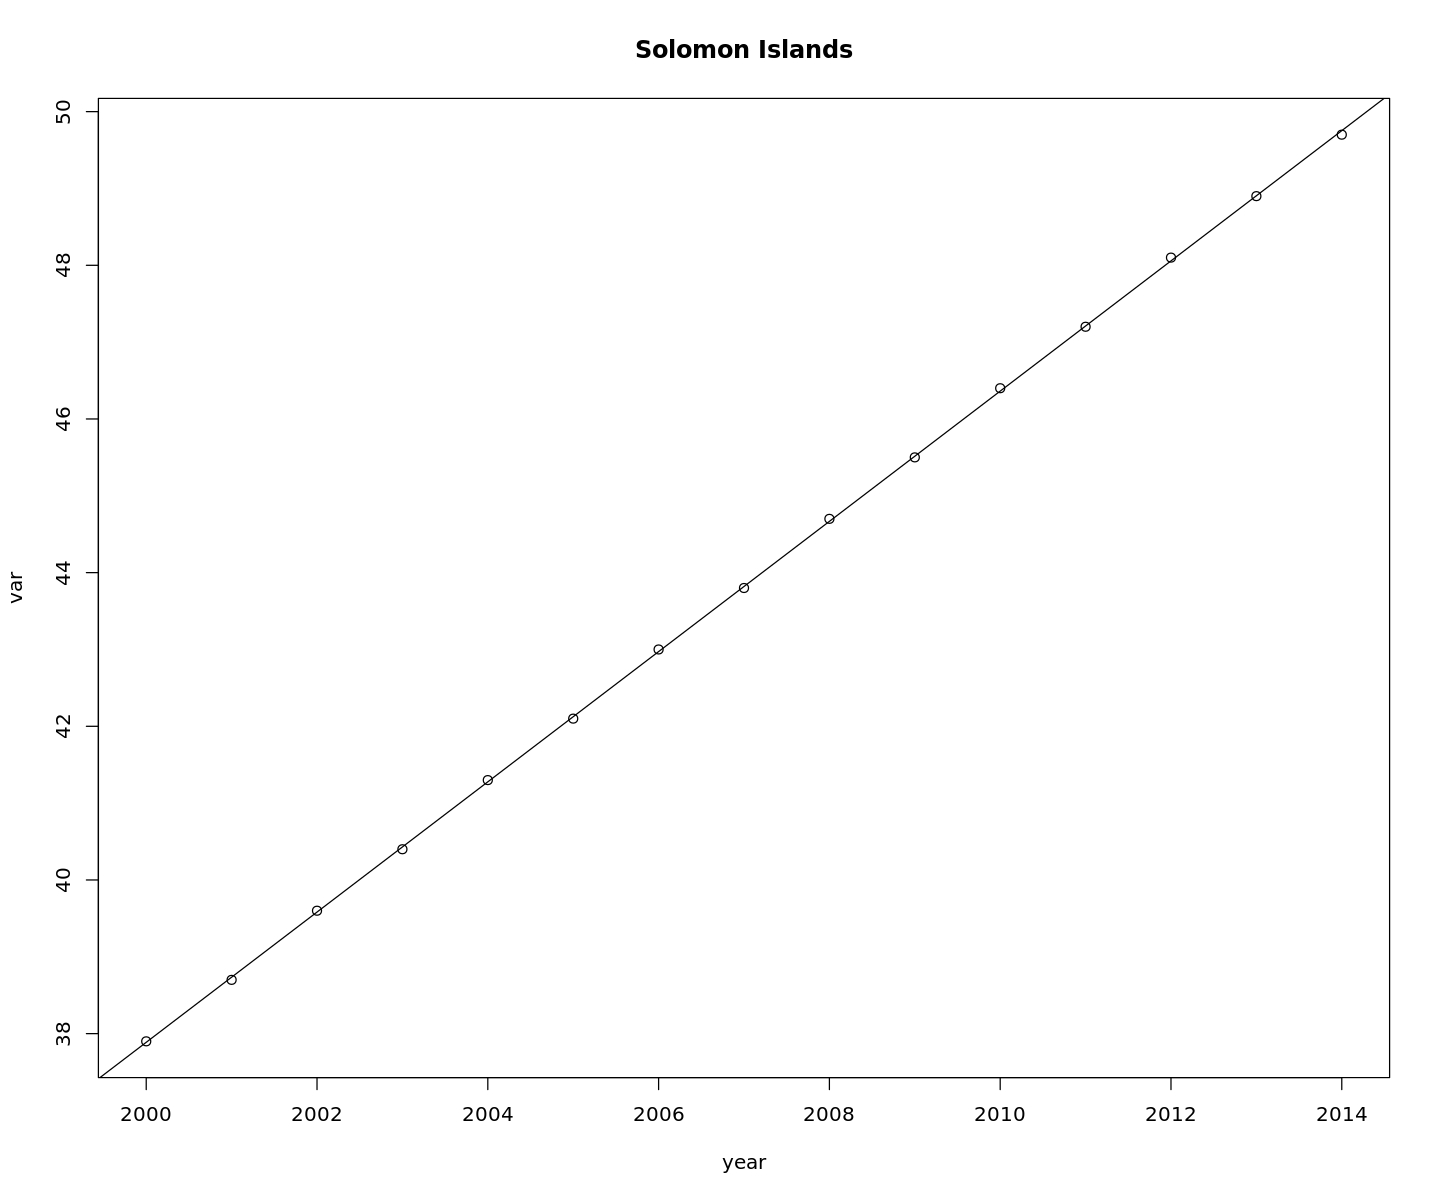

[1] "Spain"


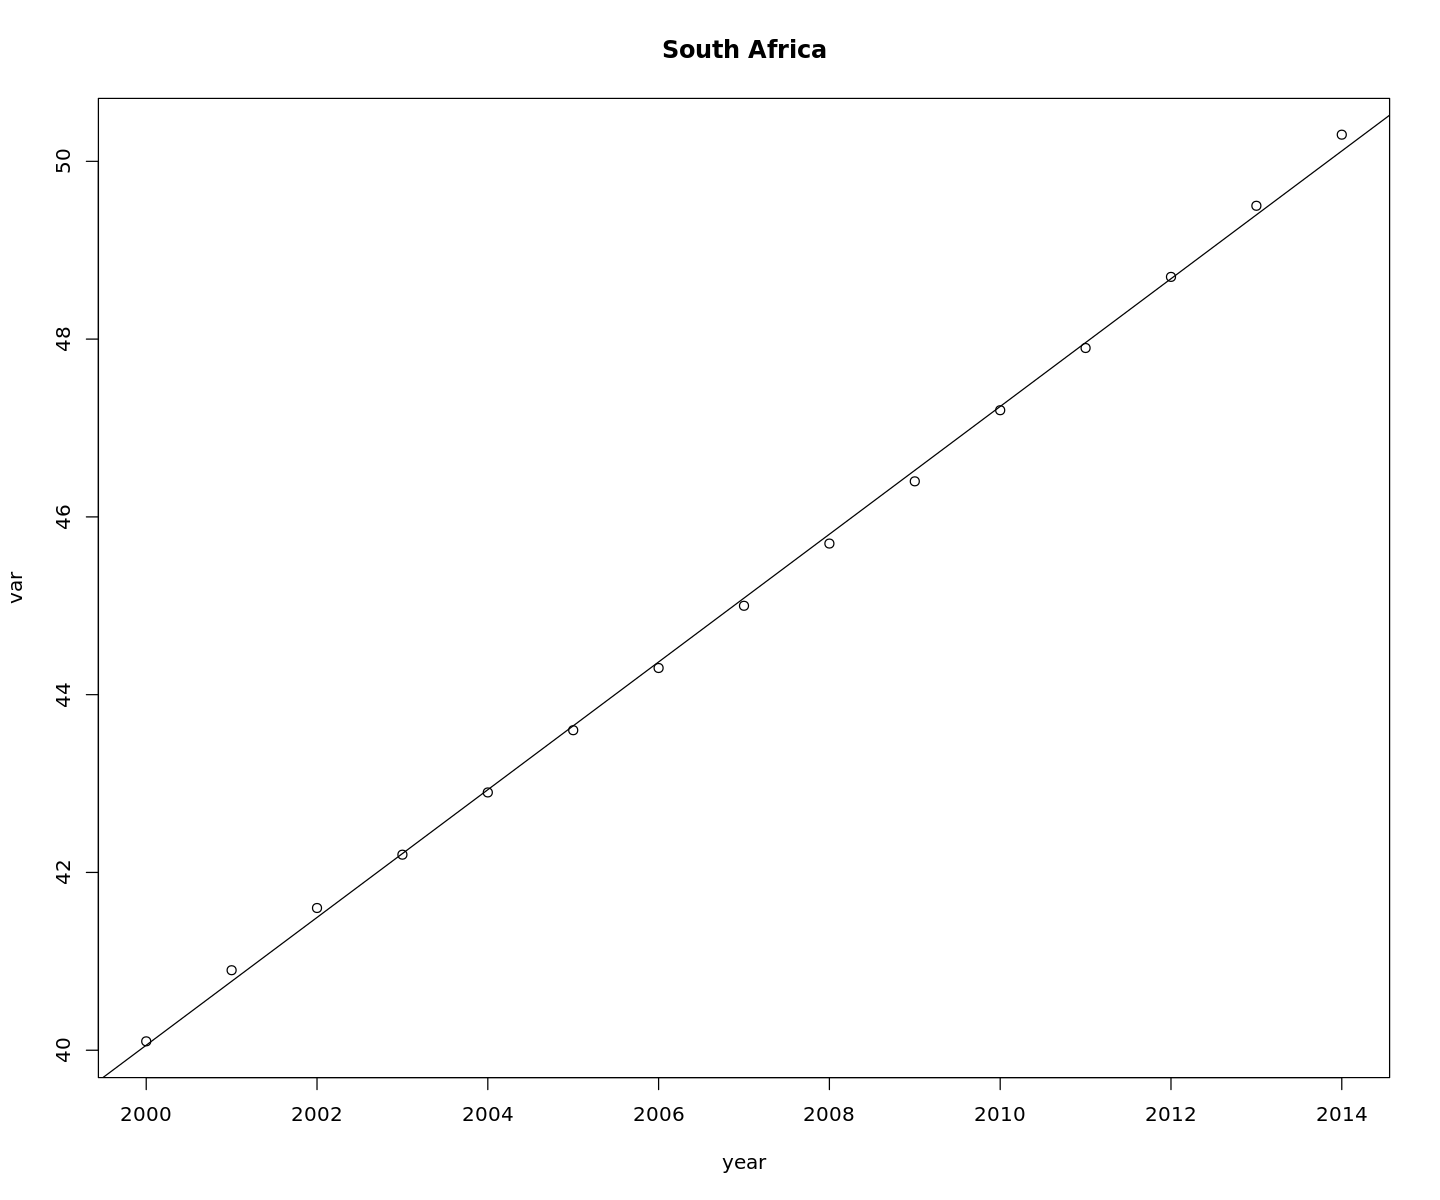

[1] "Sri Lanka"


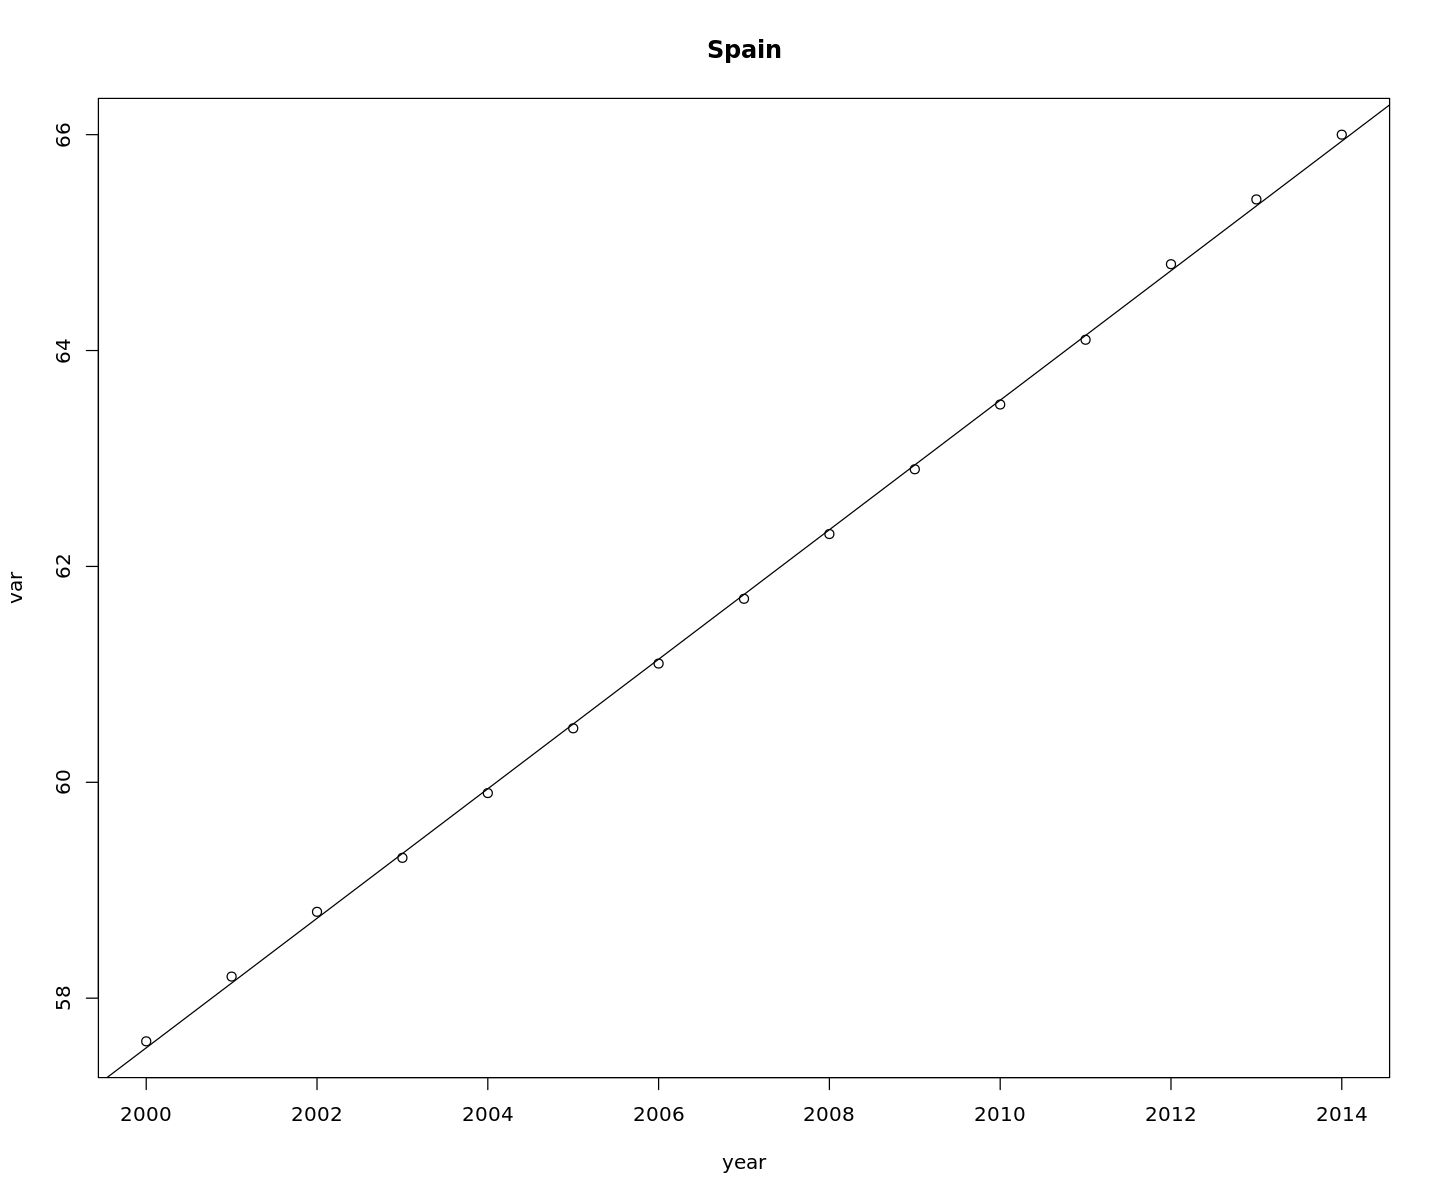

[1] "Suriname"


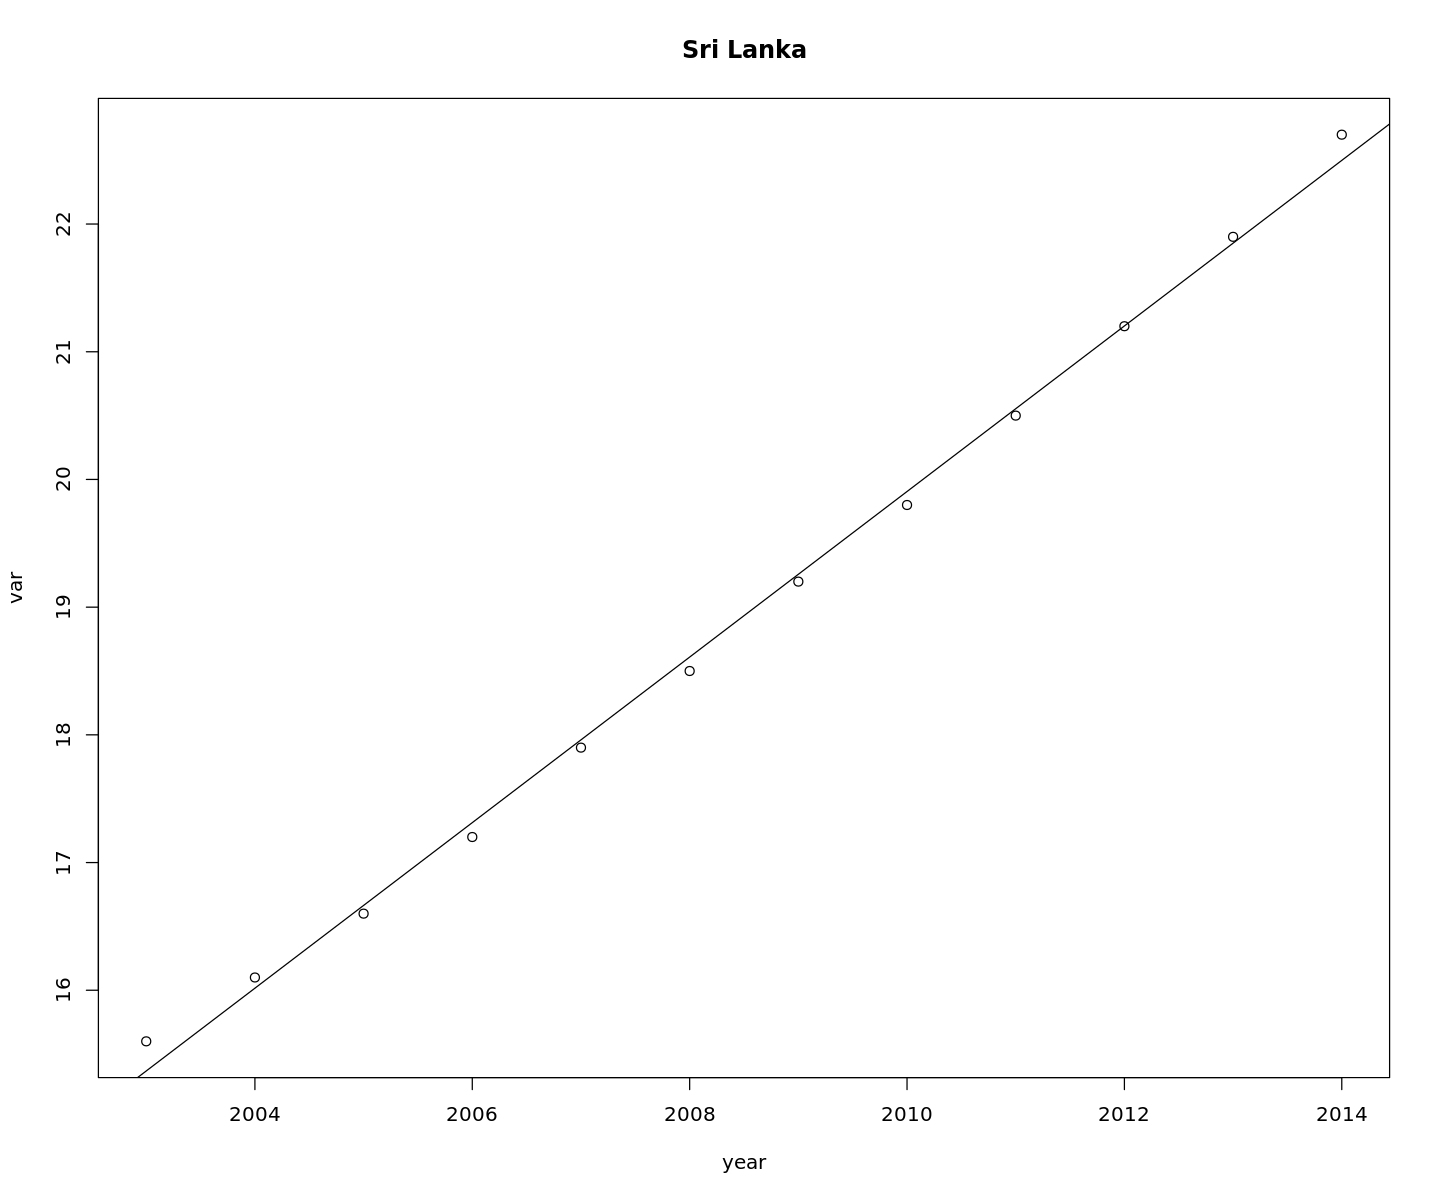

[1] "Swaziland"


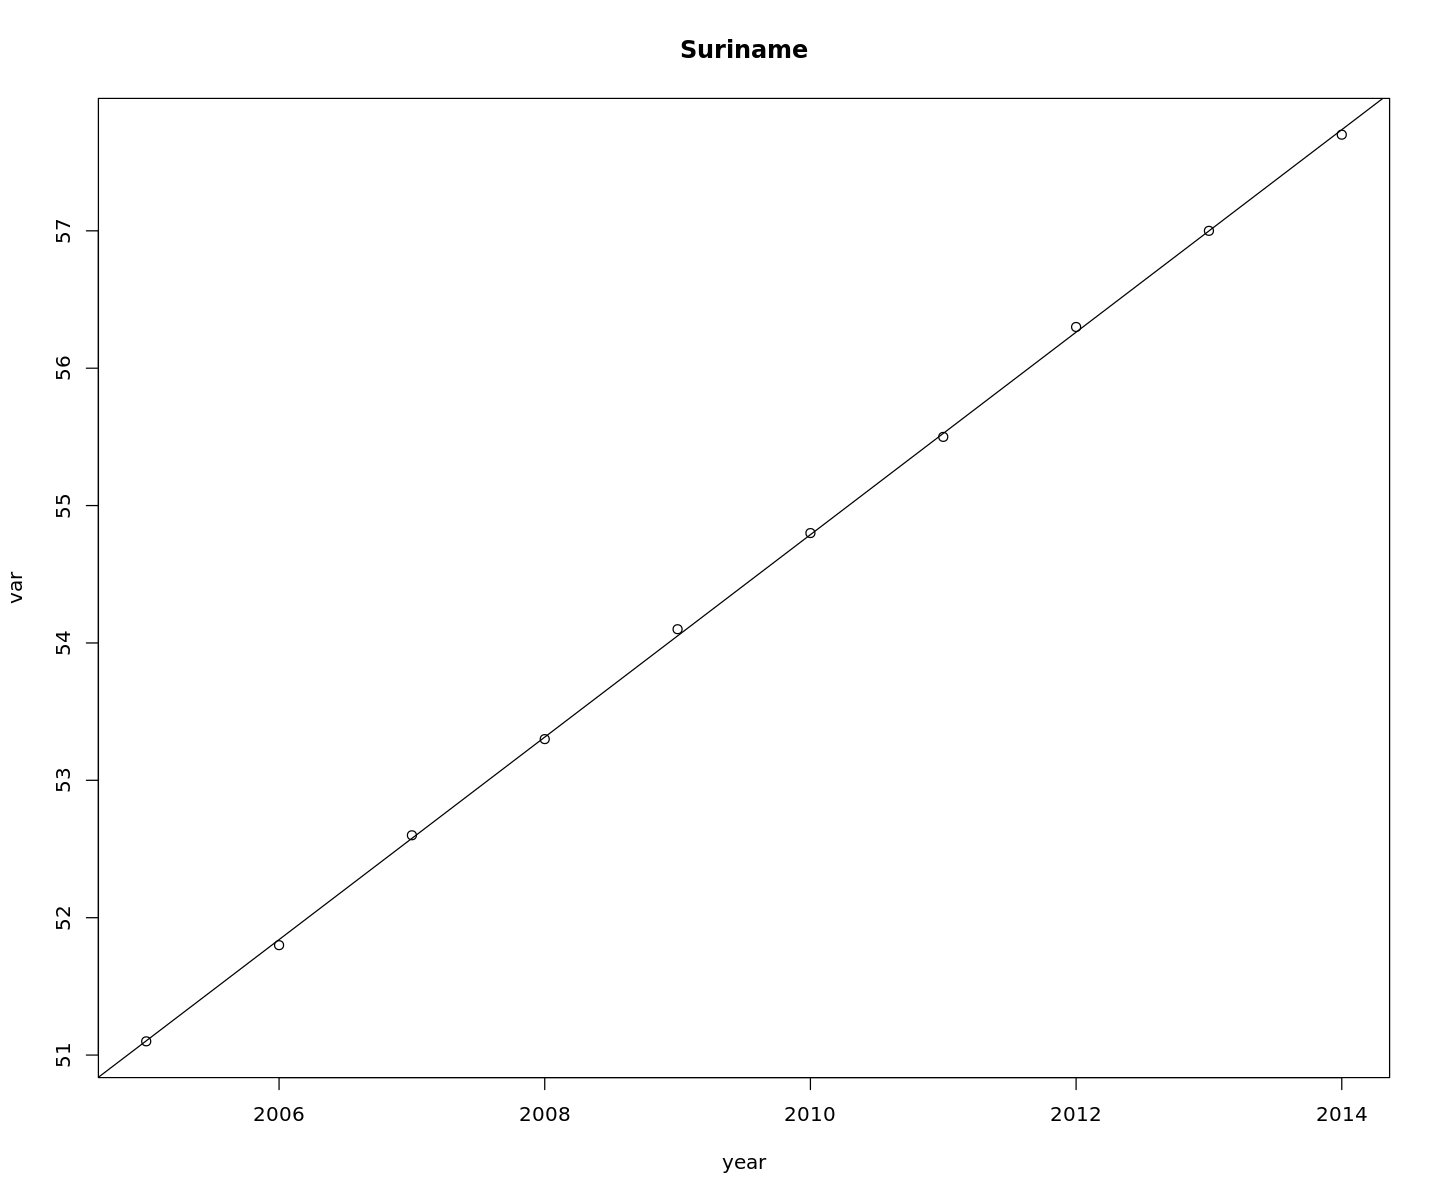

[1] "Sweden"


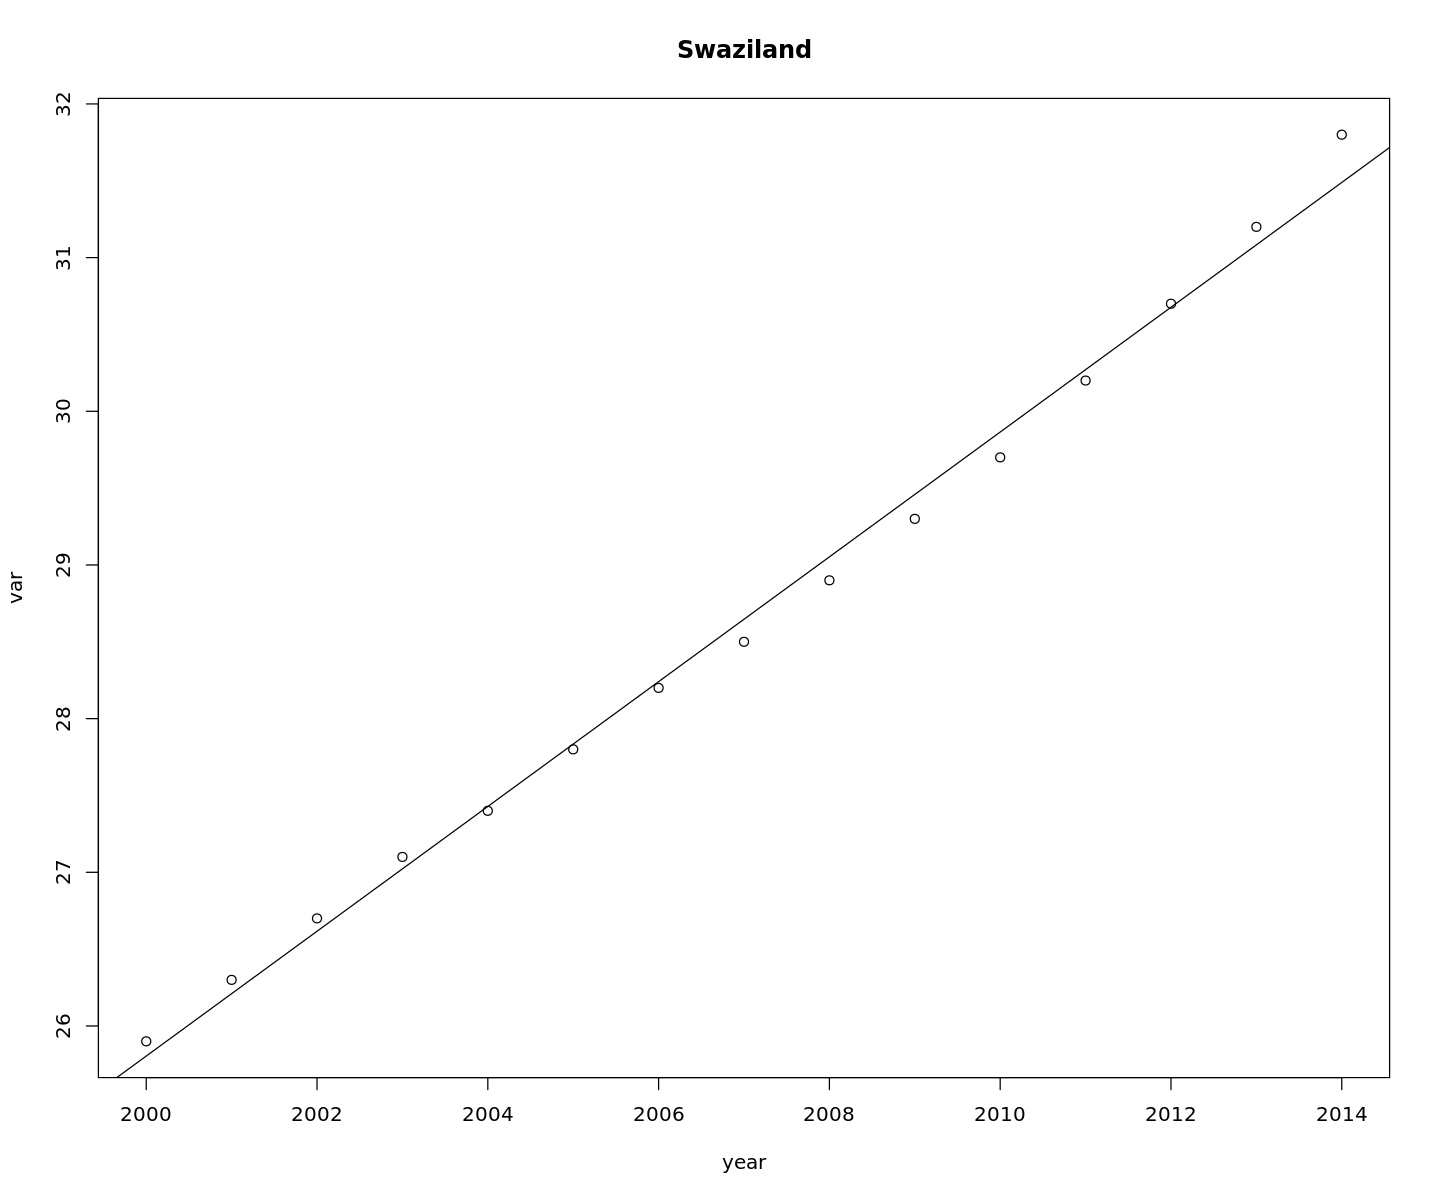

[1] "Syrian Arab Republic"


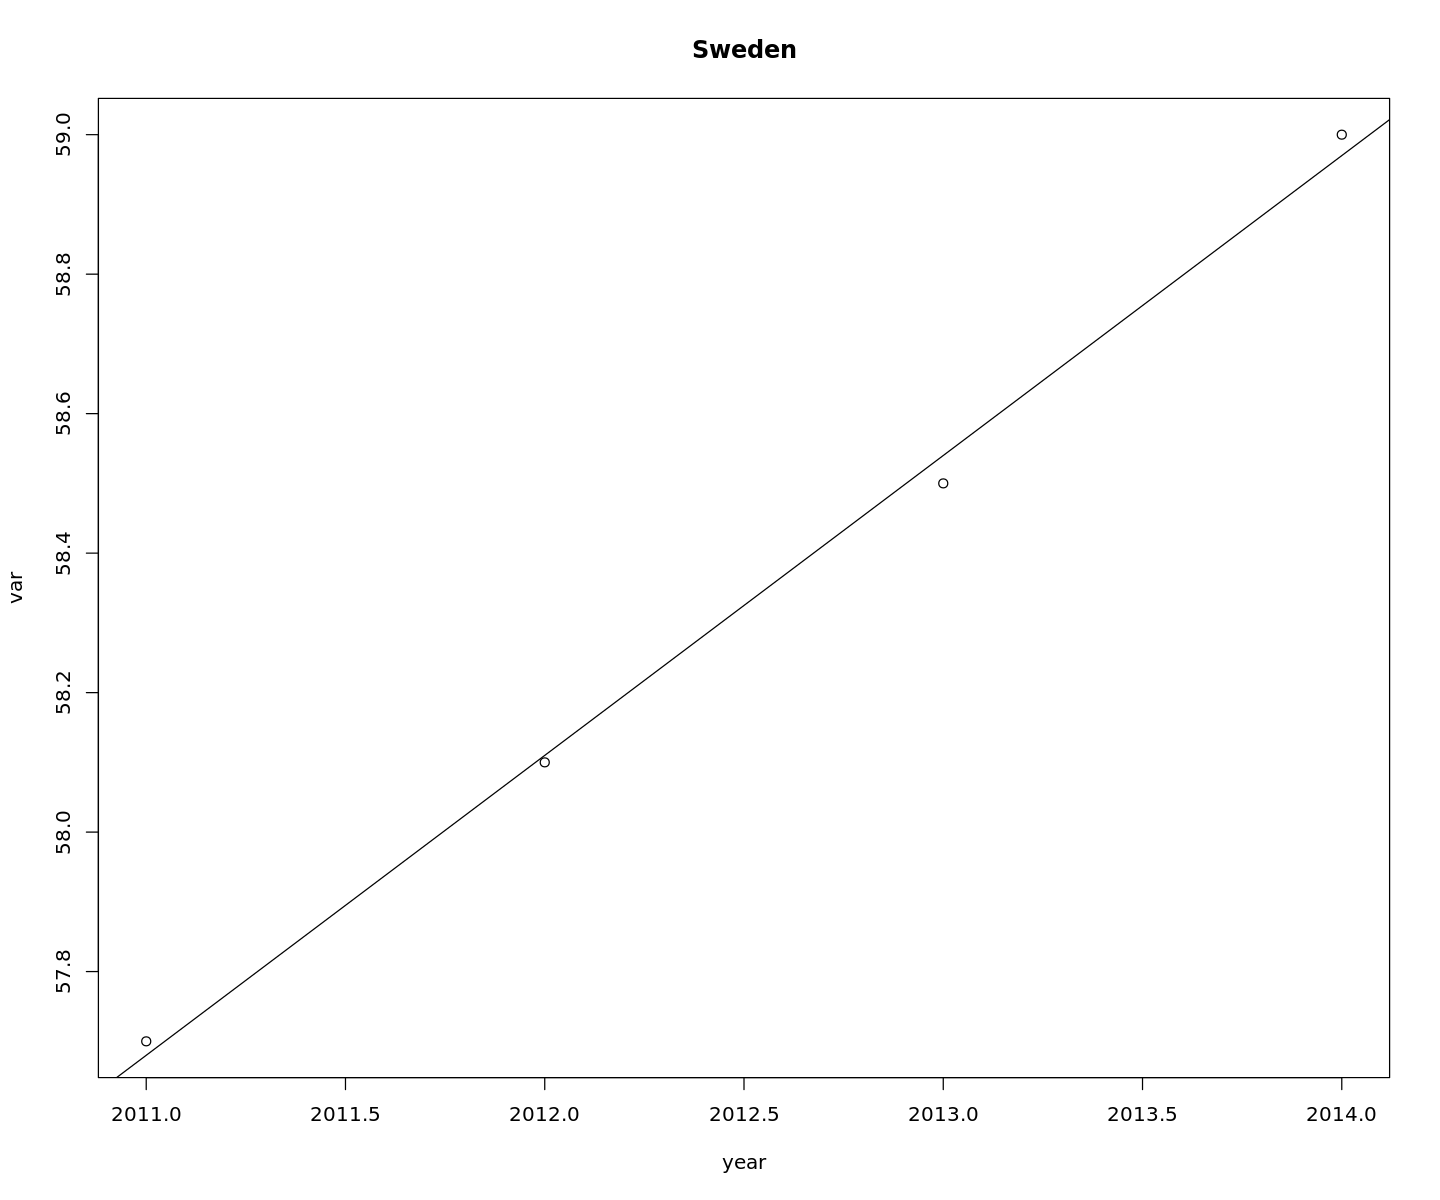

[1] "Tajikistan"


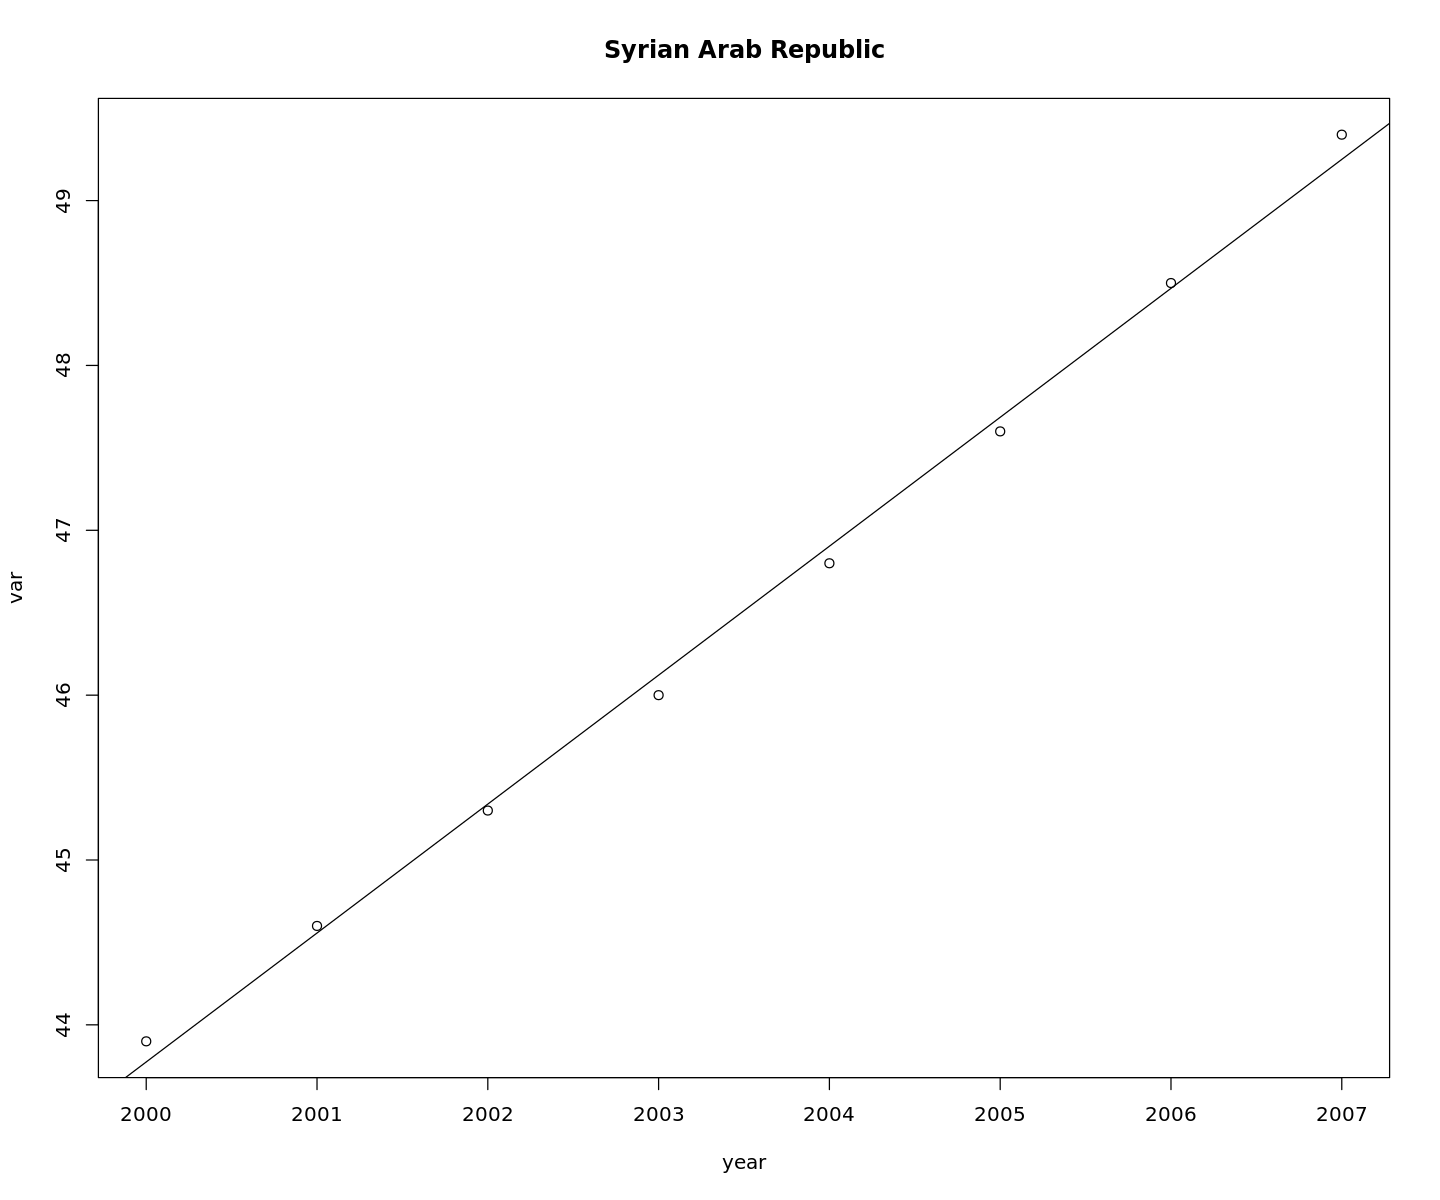

[1] "Thailand"


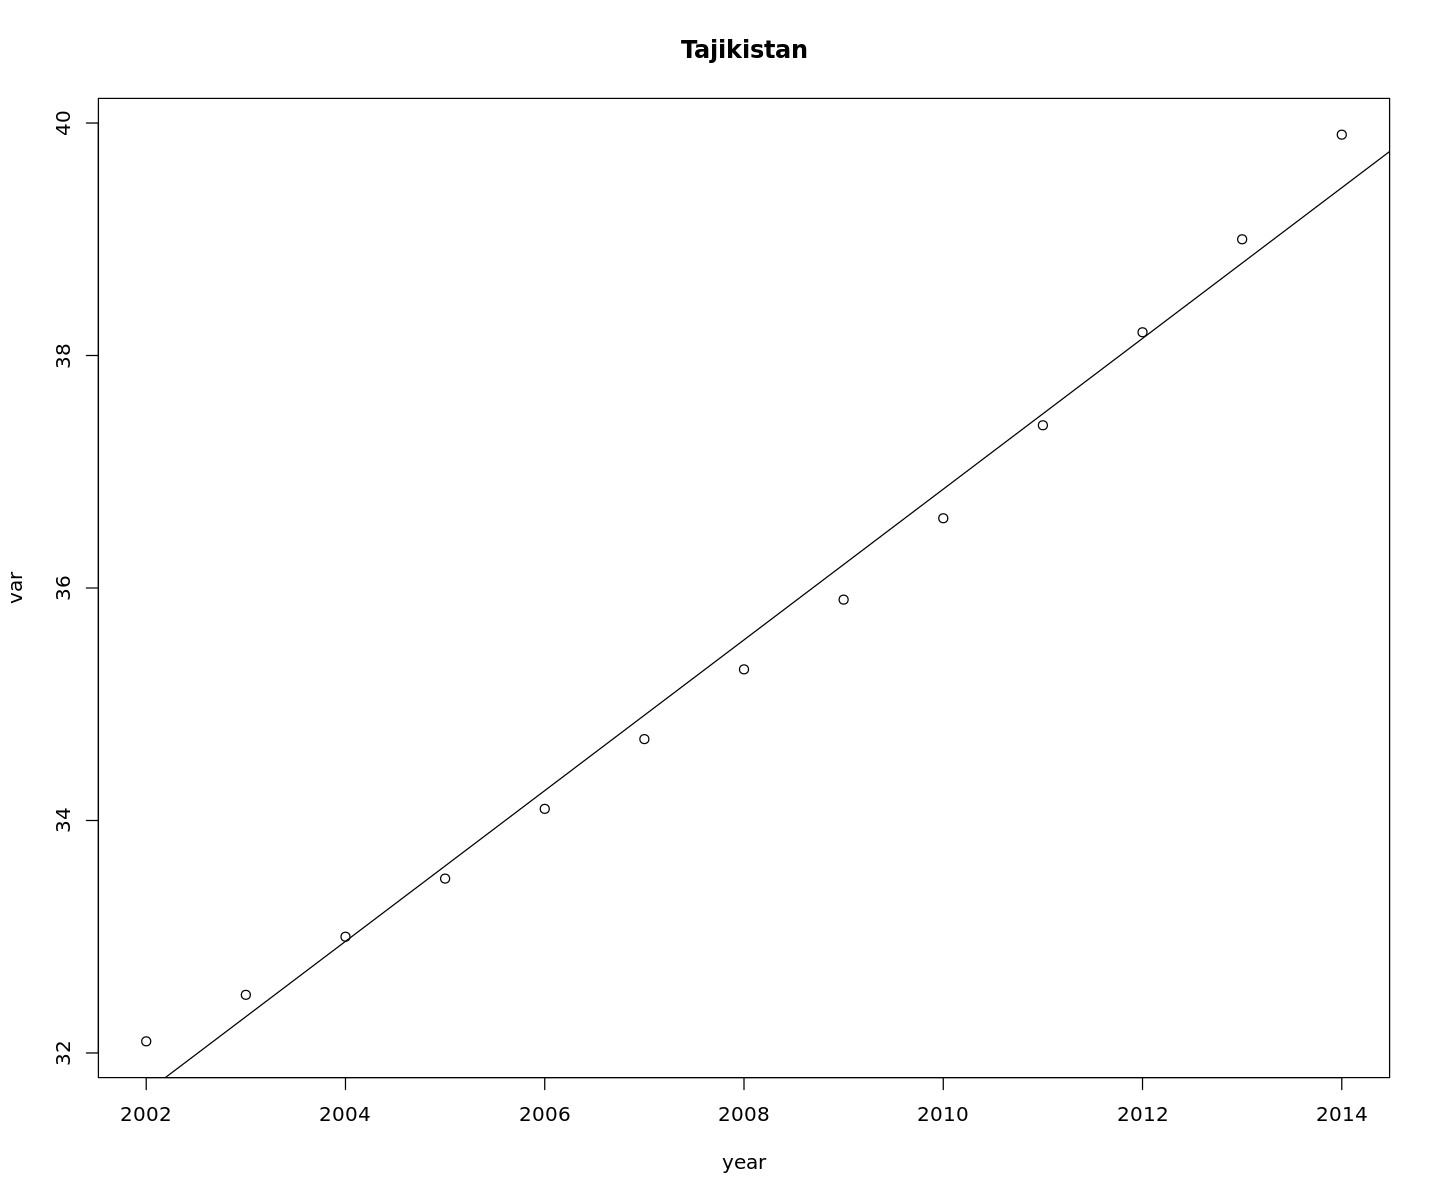

[1] "Timor-Leste"


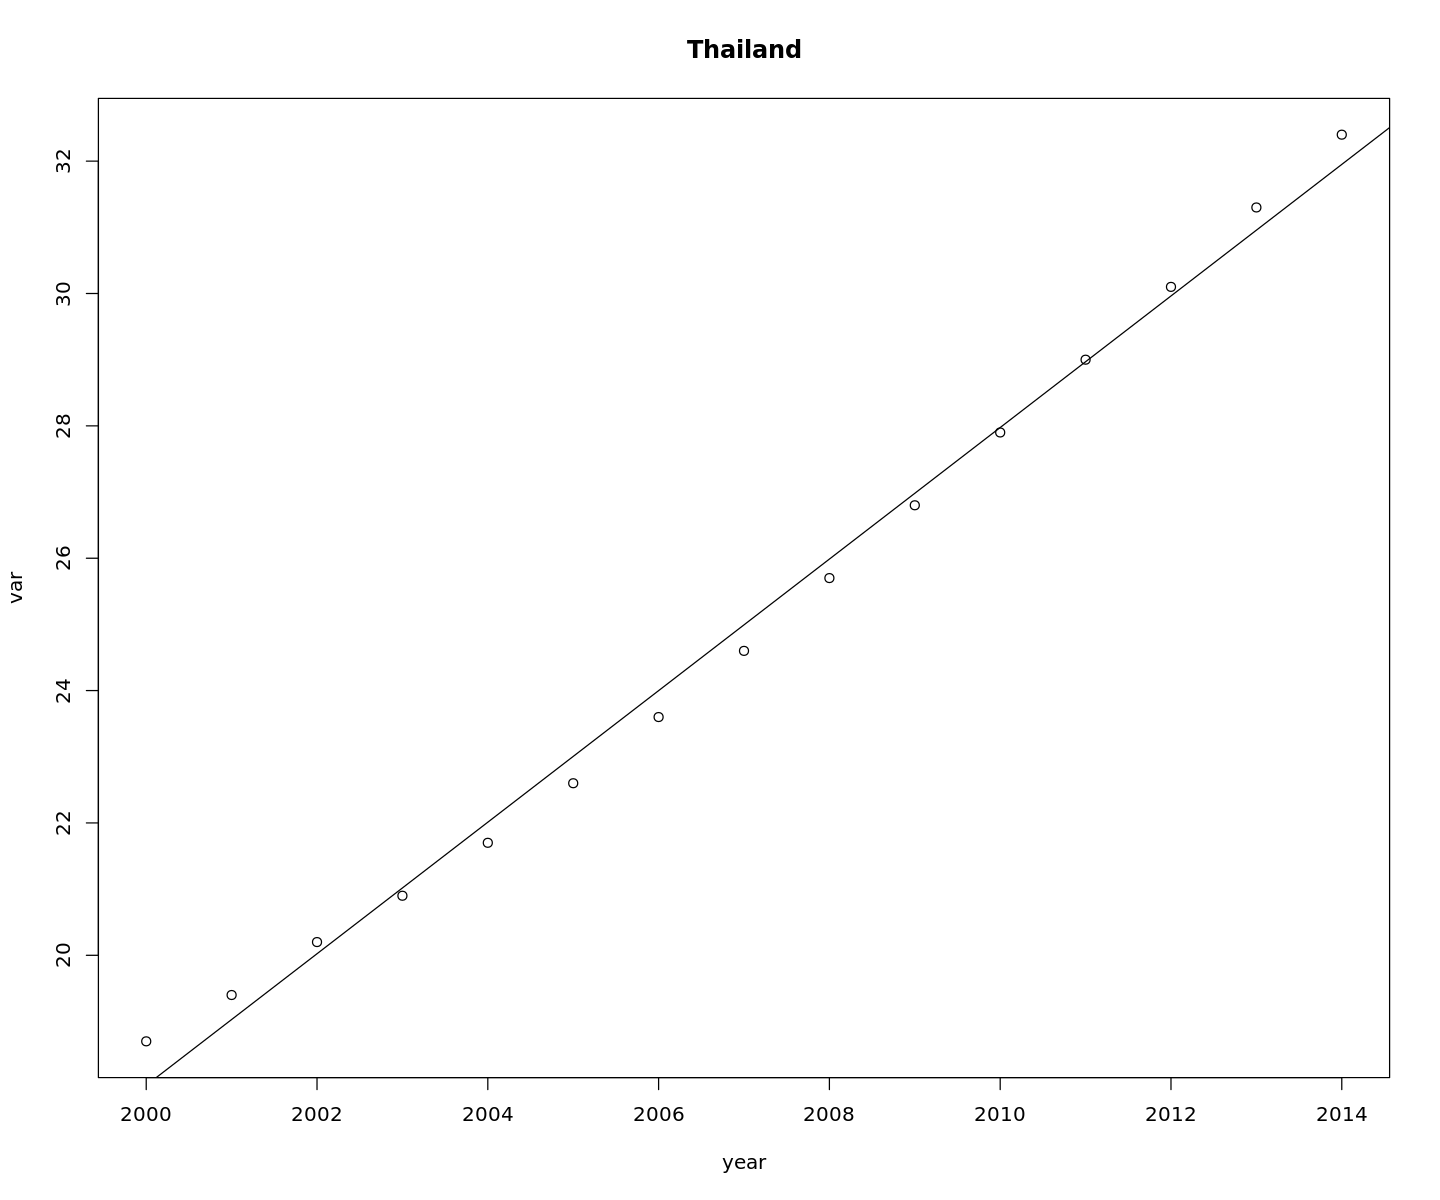

[1] "Togo"


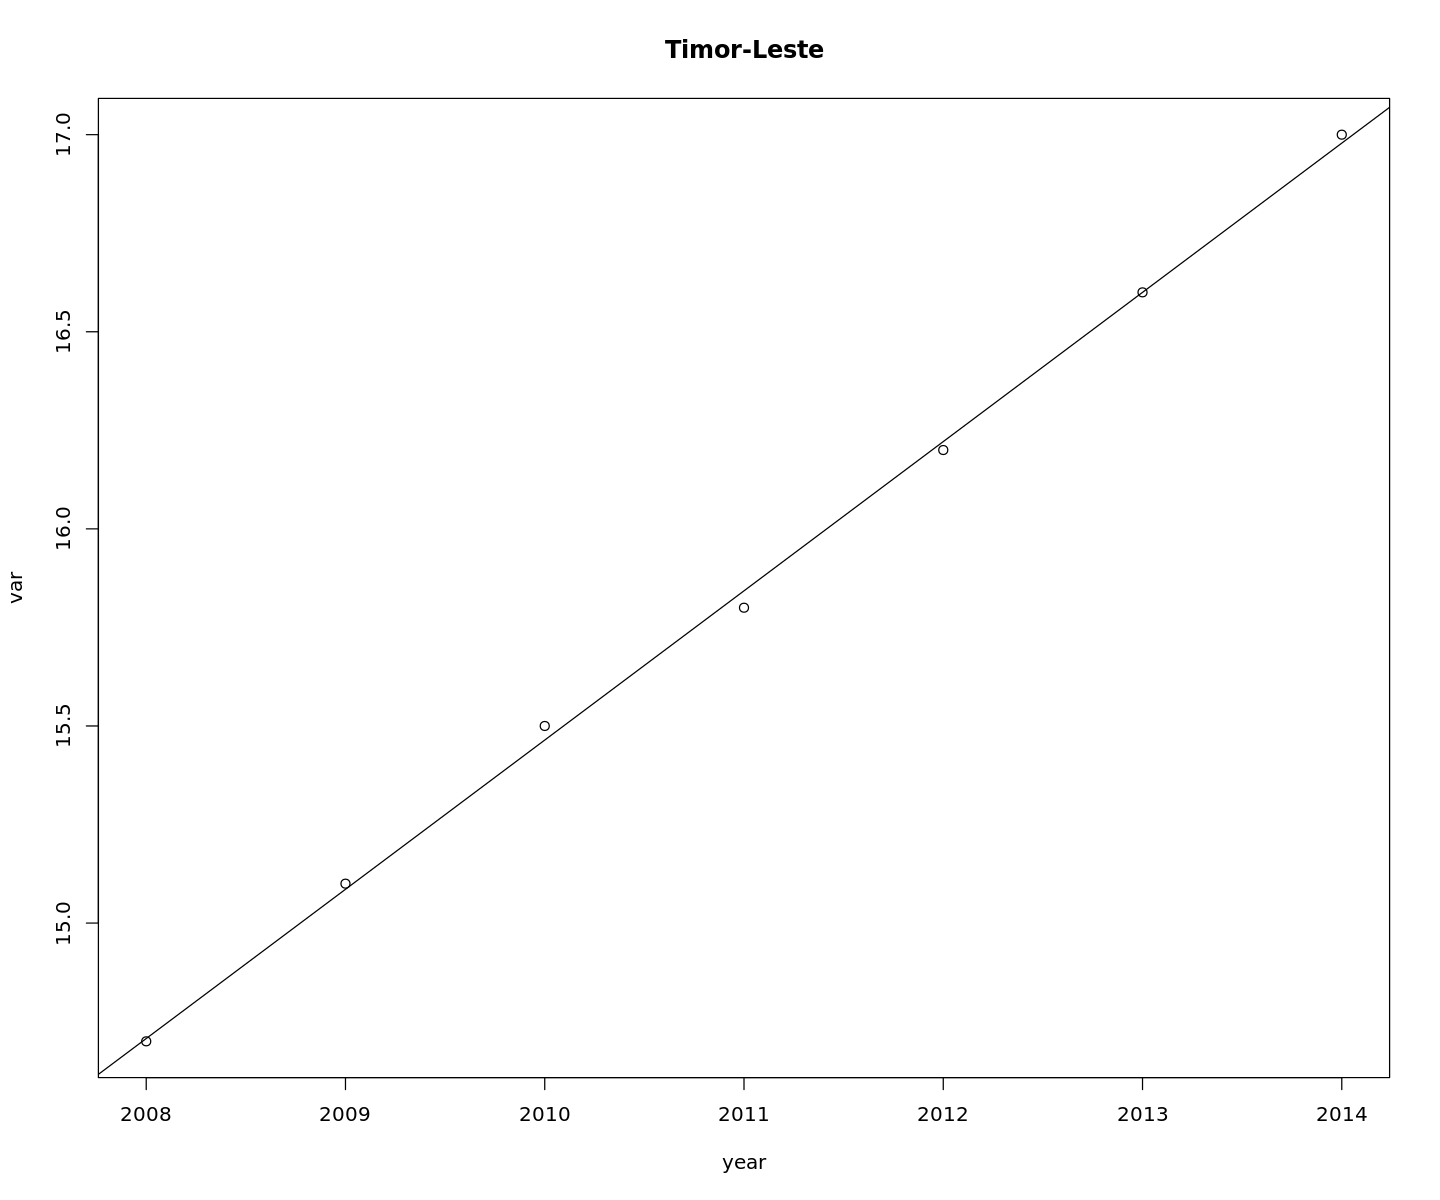

[1] "Tonga"


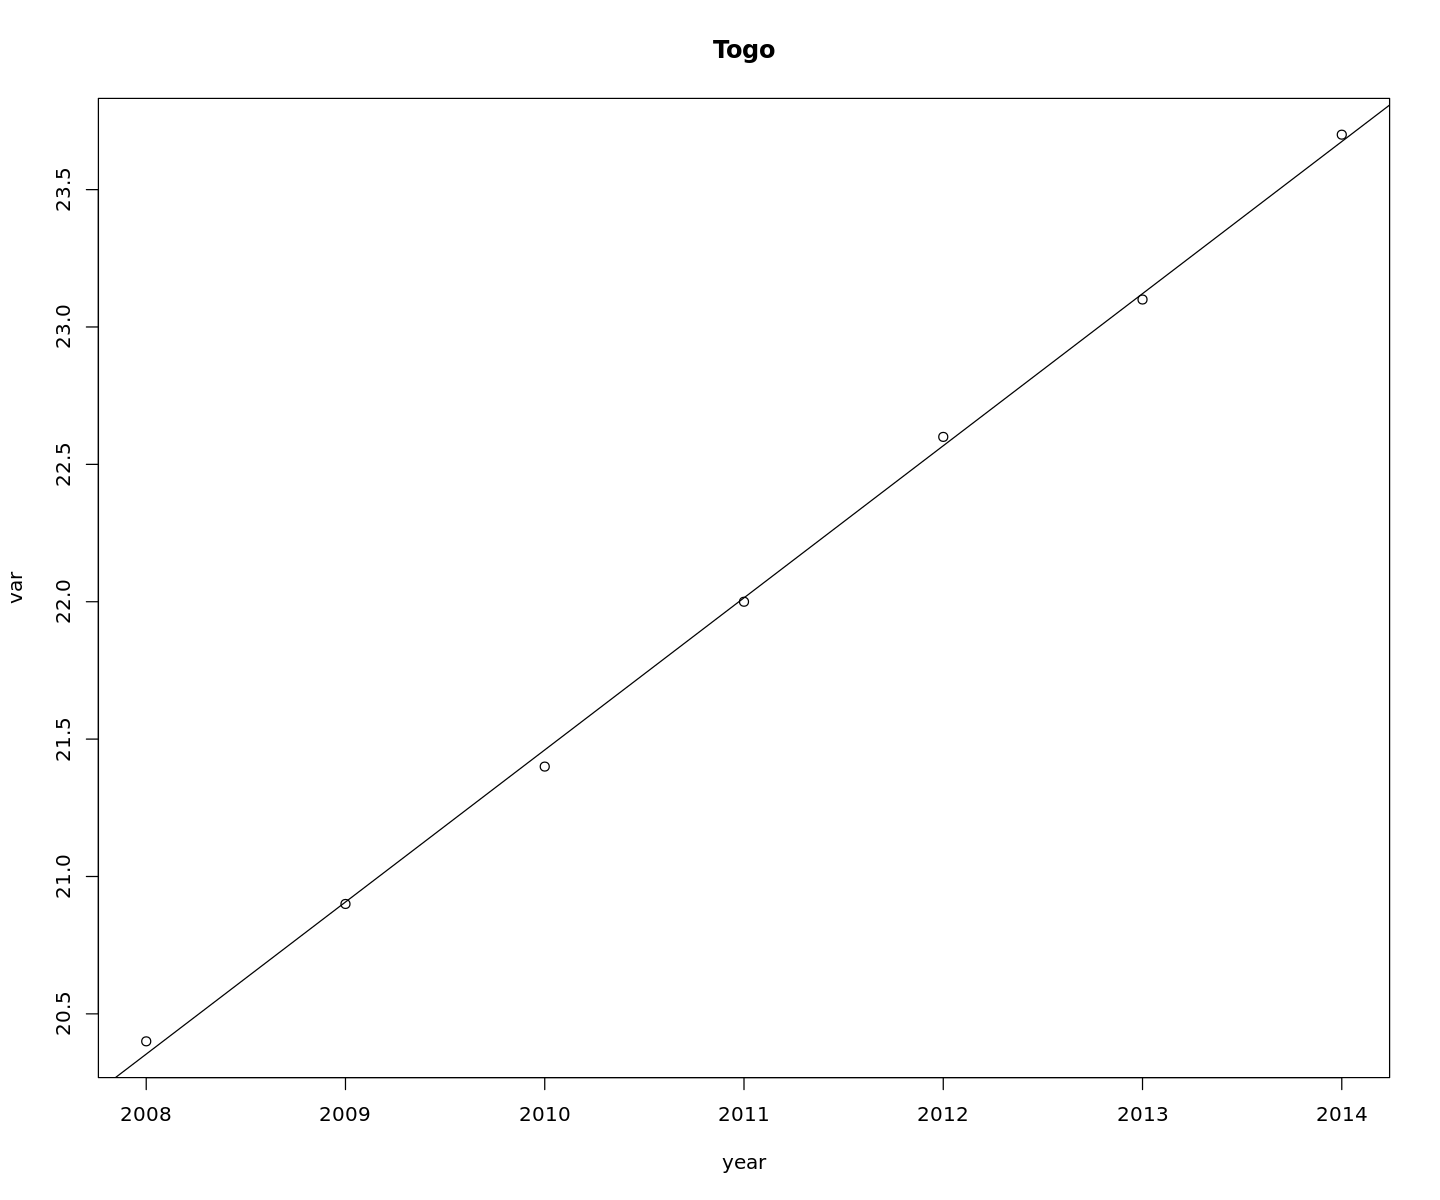

[1] "Trinidad and Tobago"


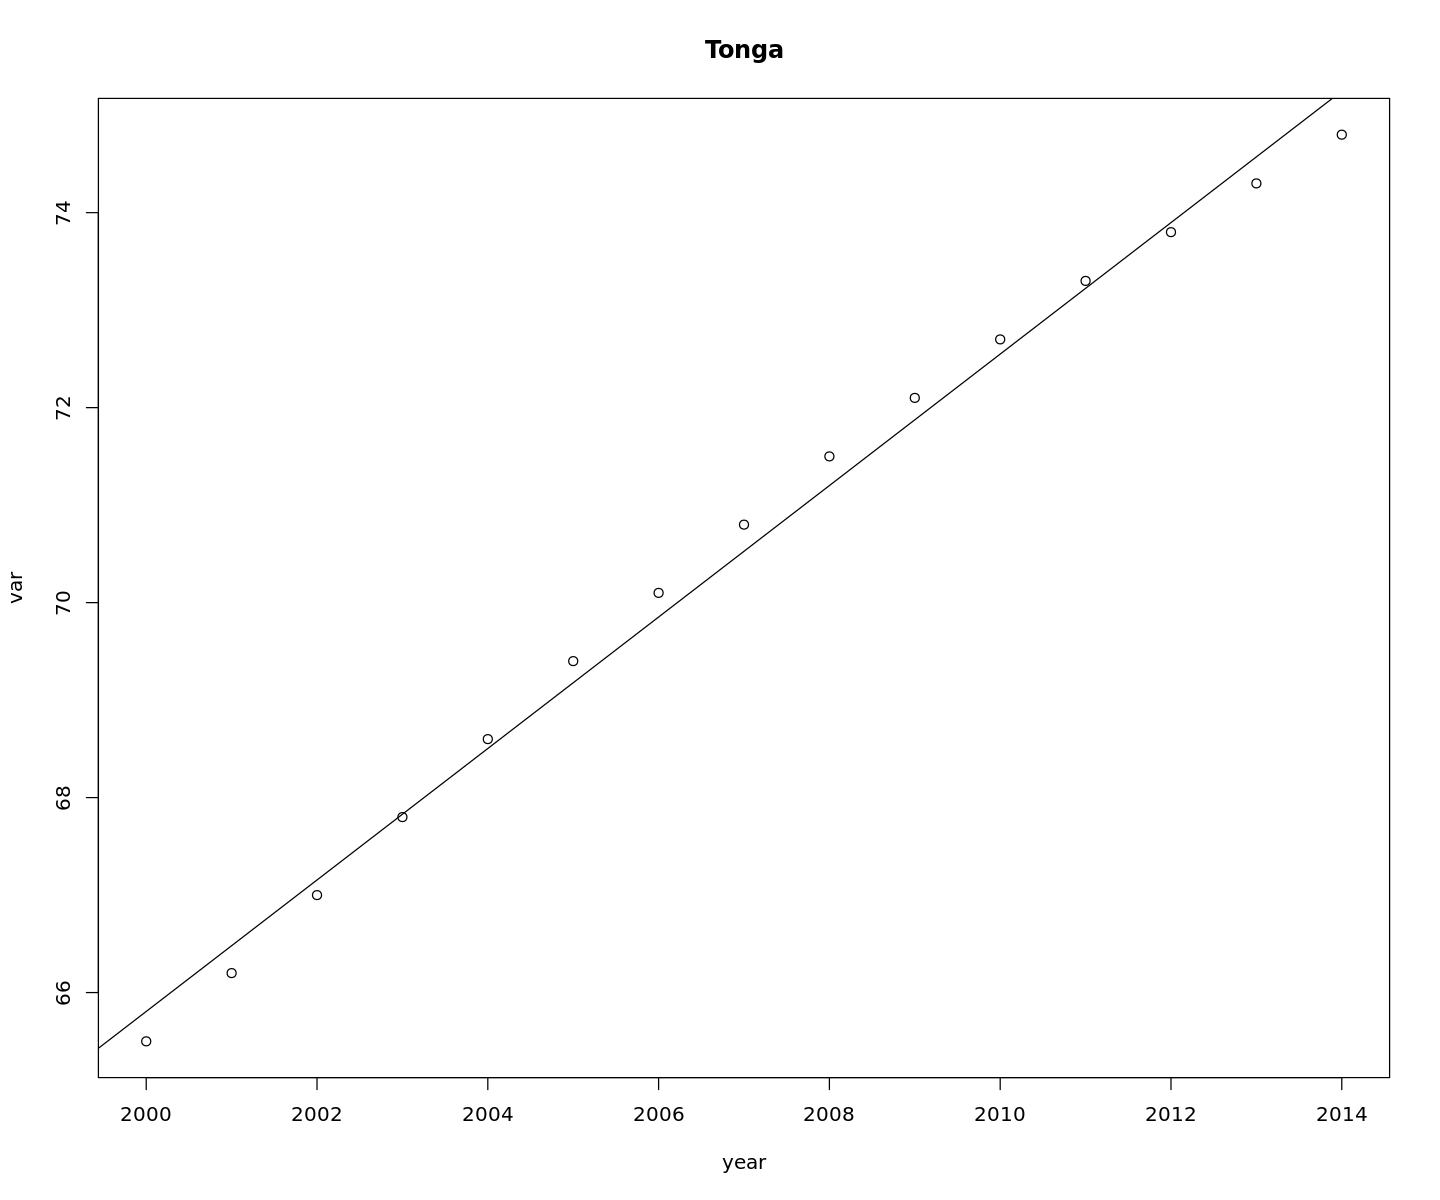

[1] "Tunisia"


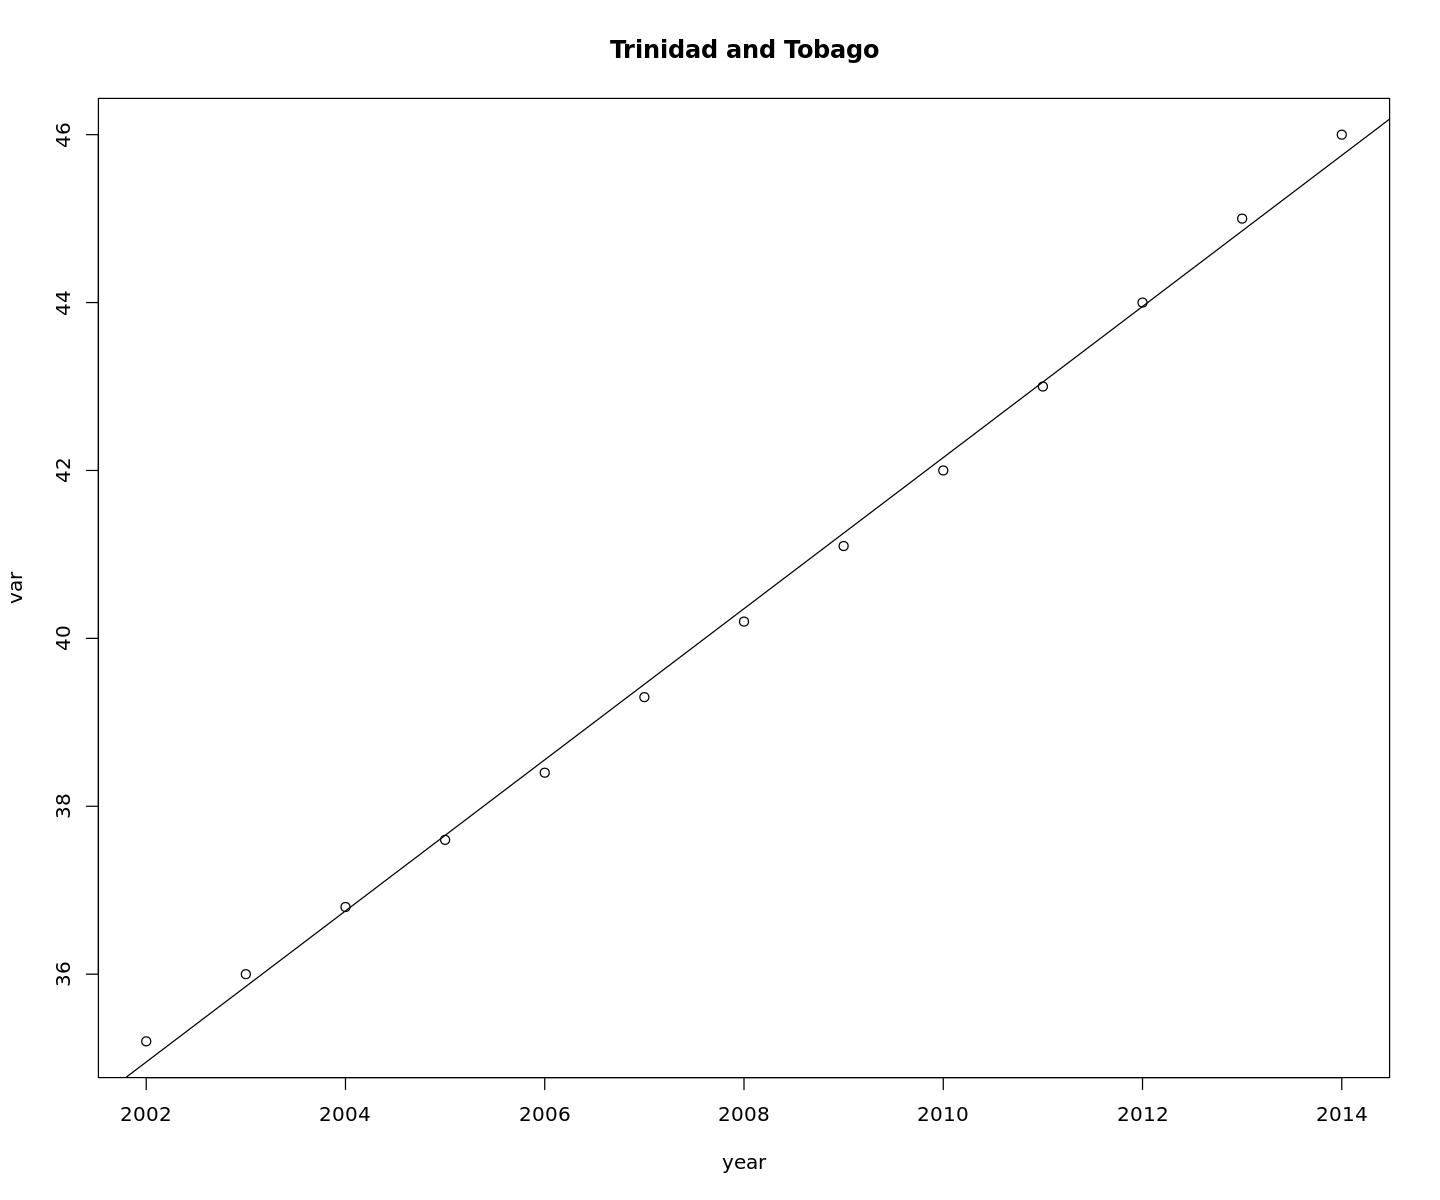

[1] "Turkey"


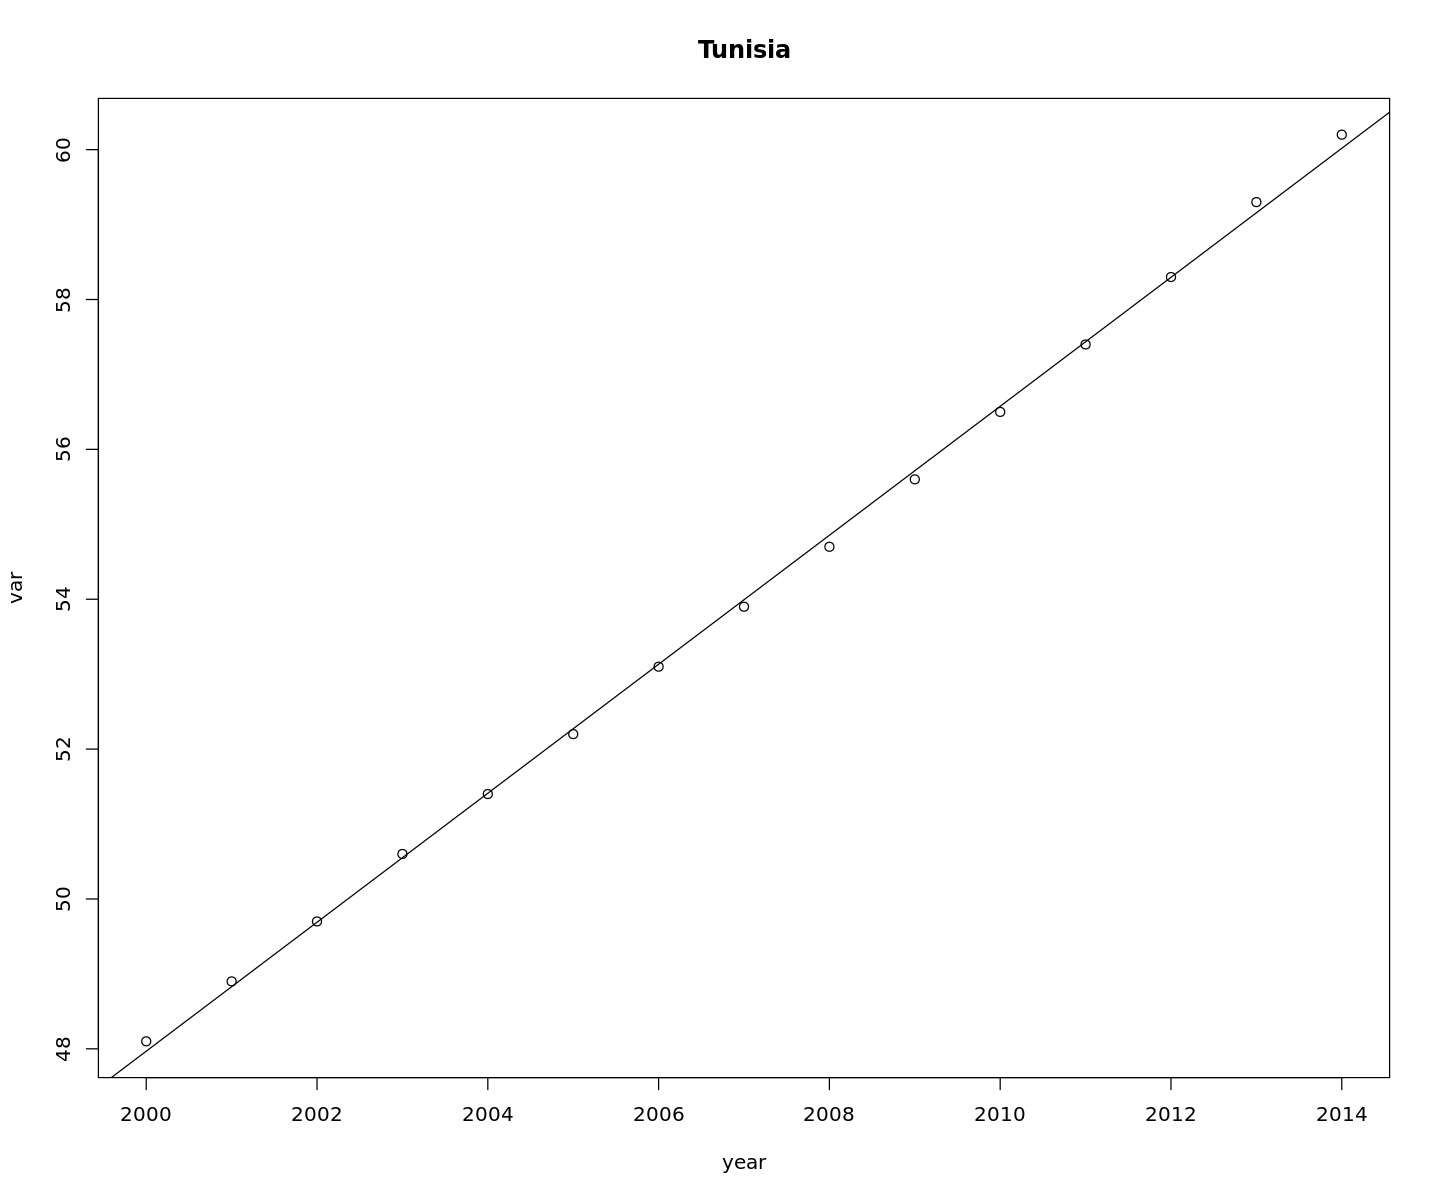

[1] "Turkmenistan"


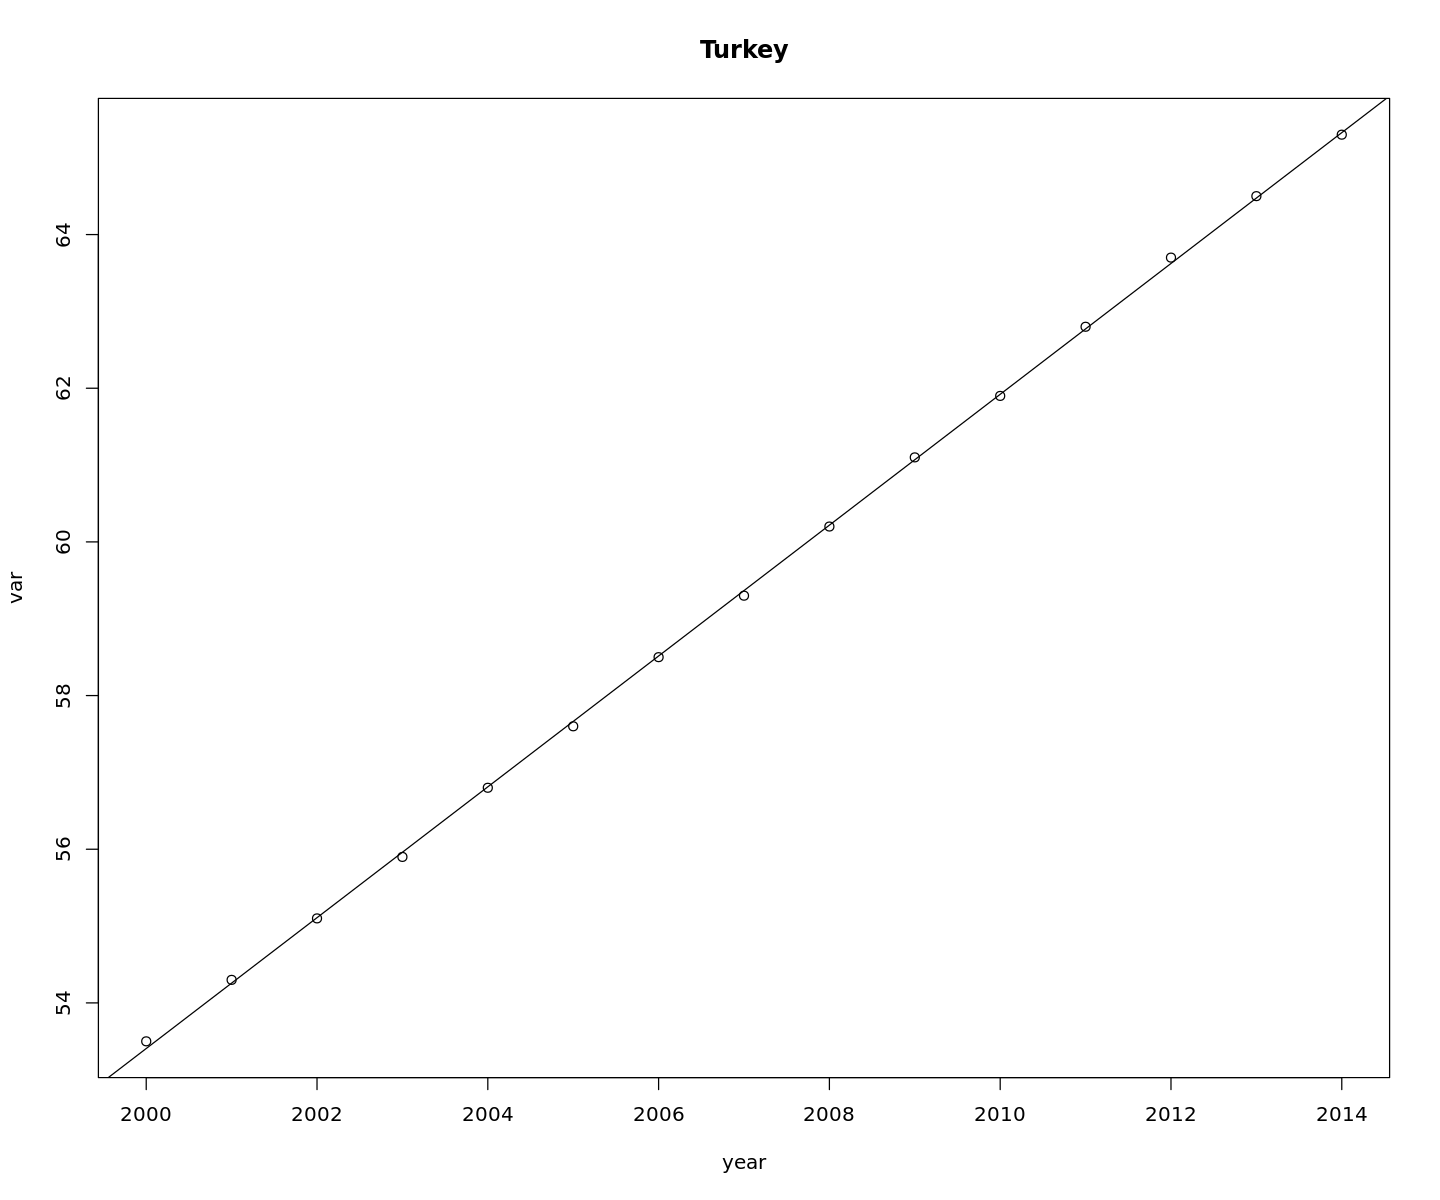

[1] "Uganda"


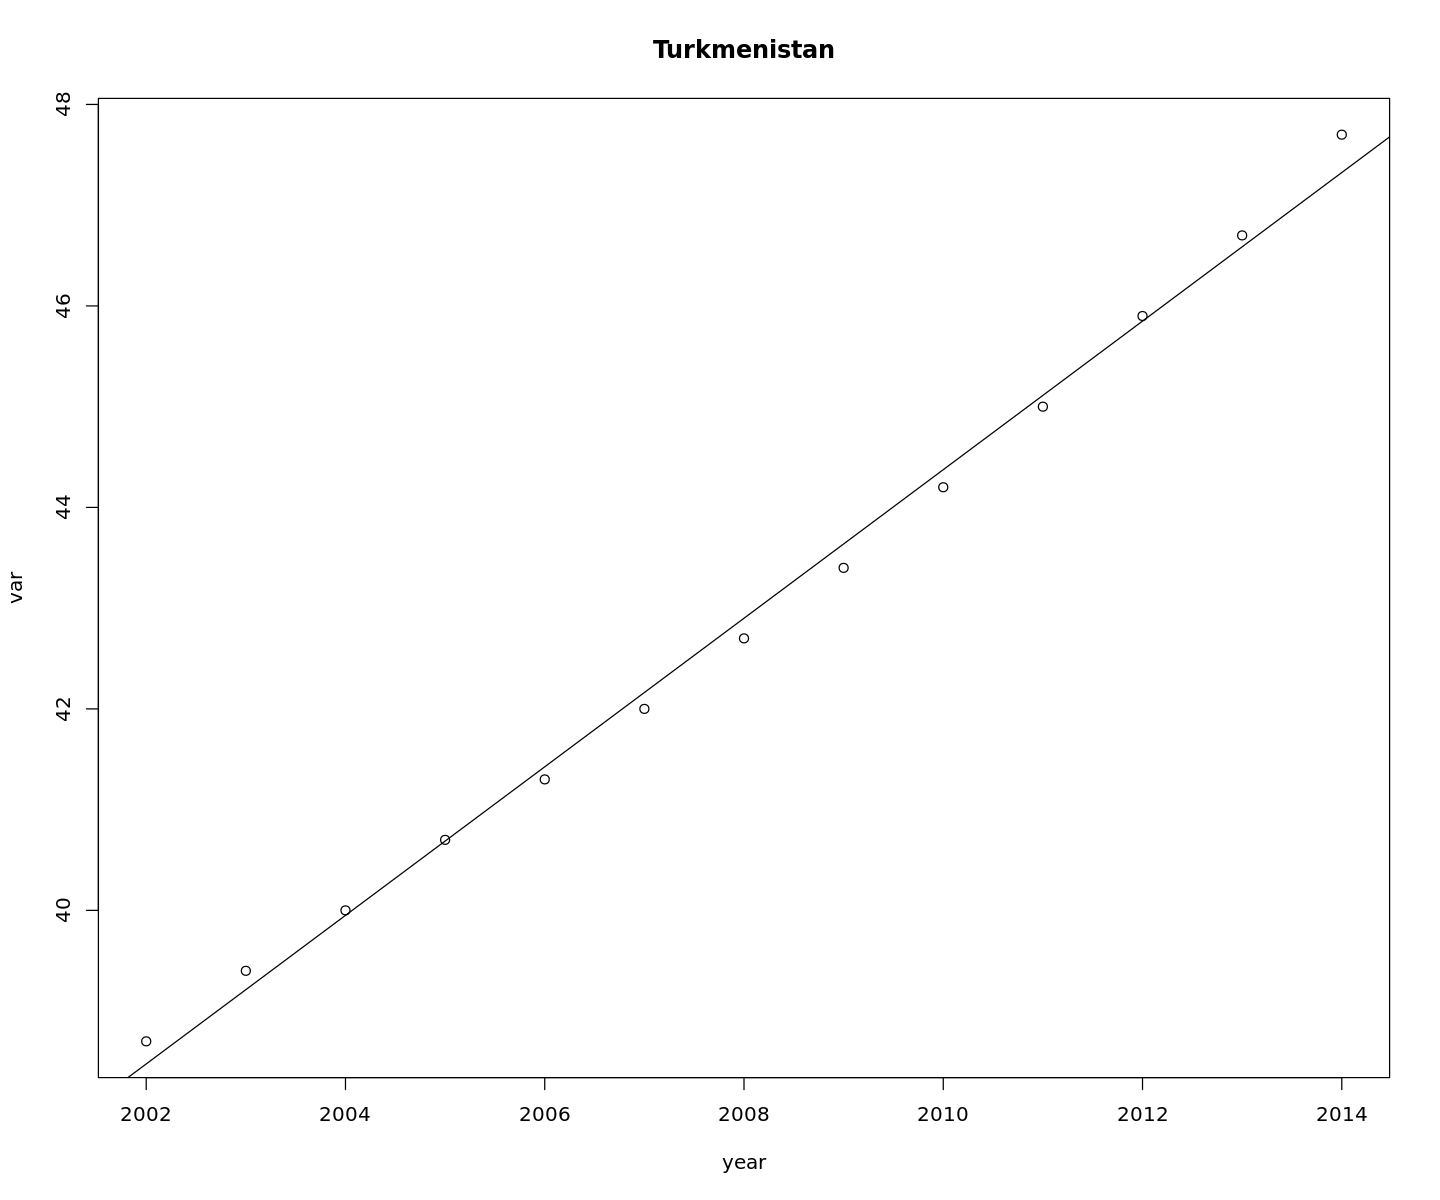

[1] "Ukraine"


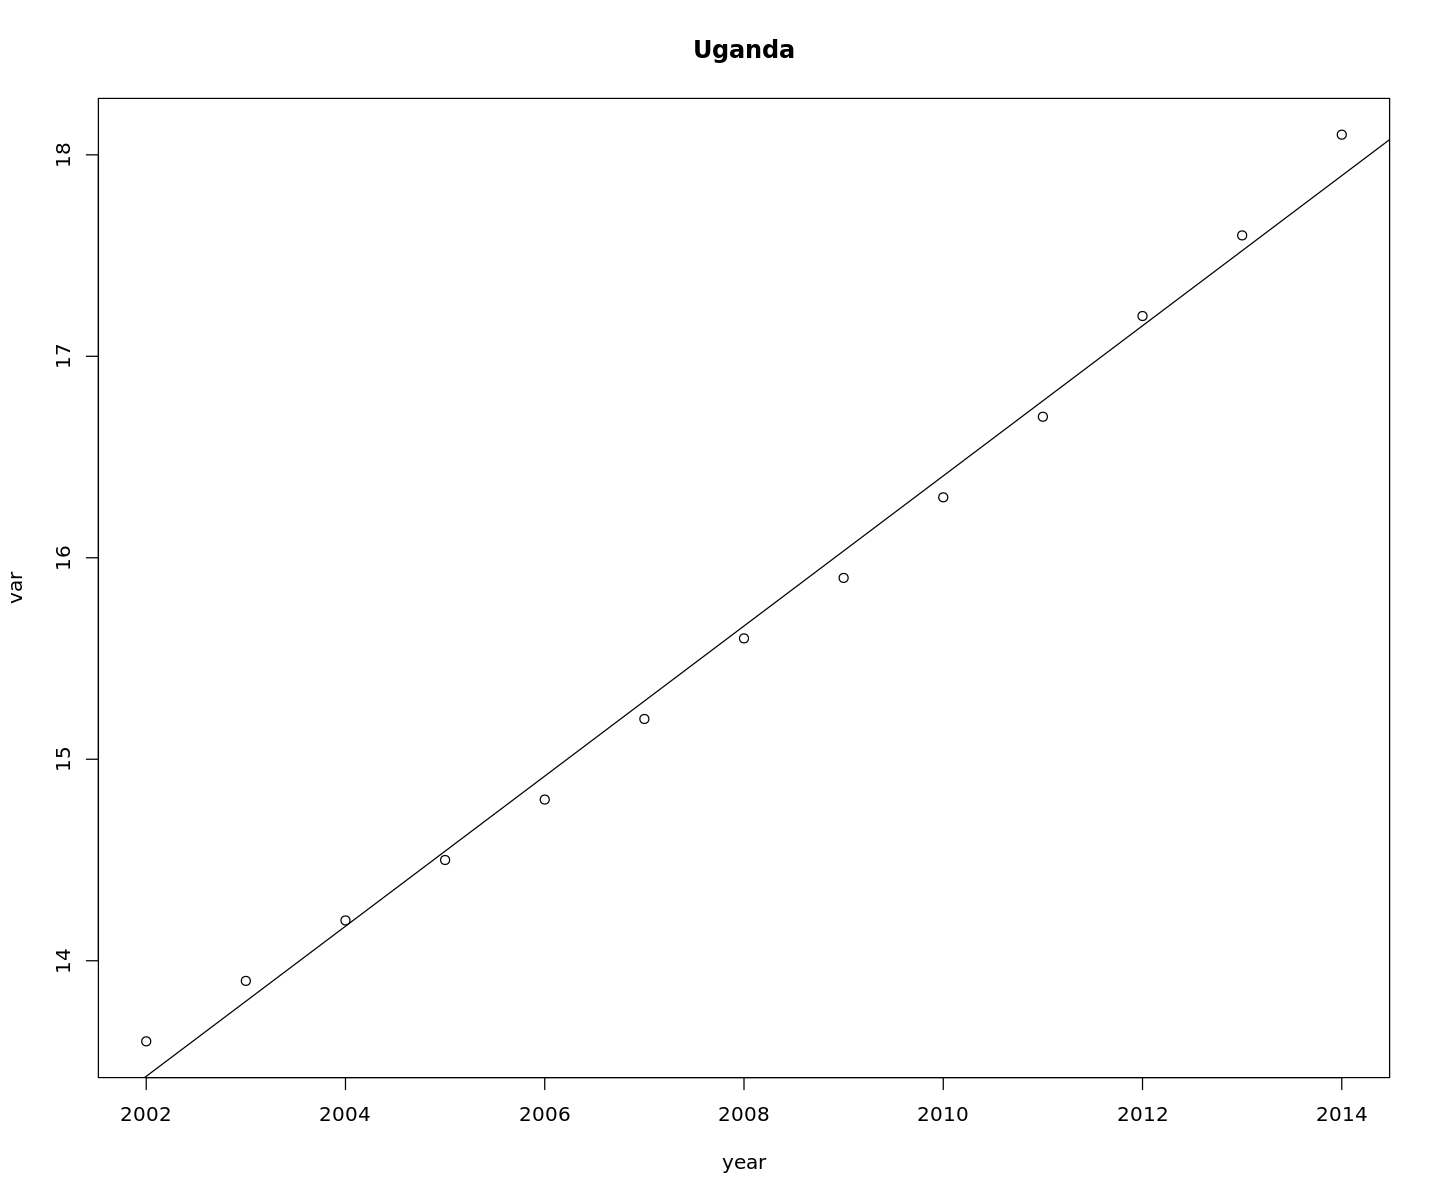

[1] "Uruguay"


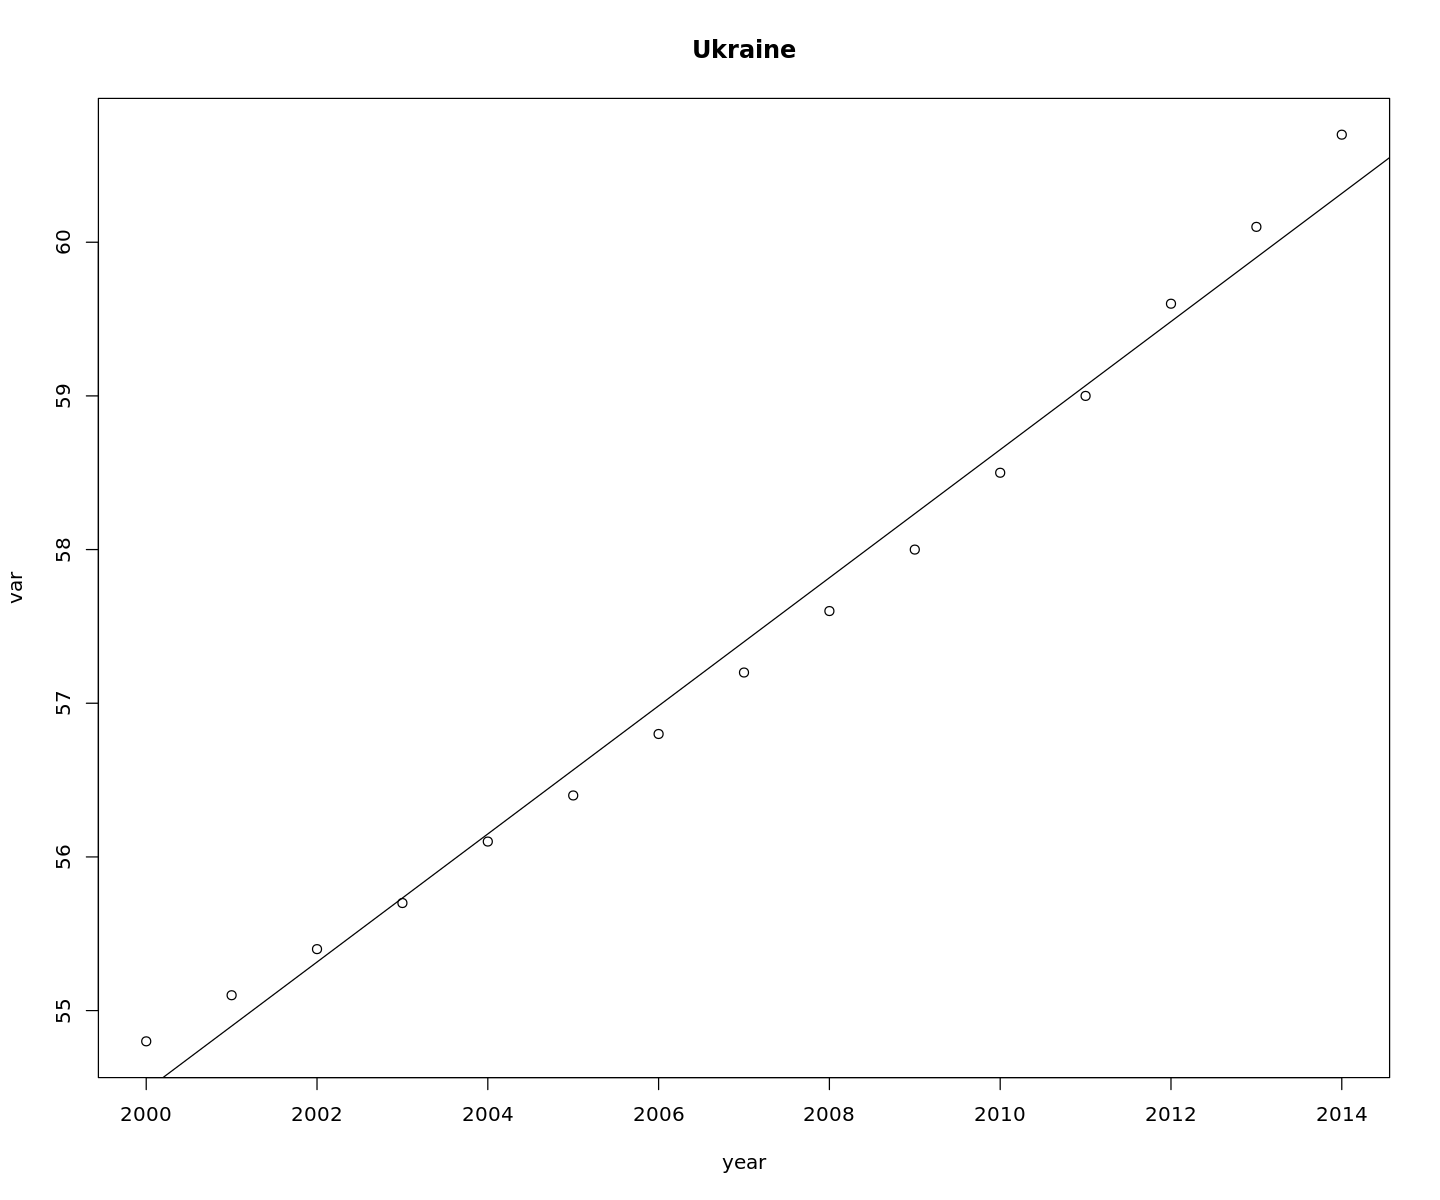

[1] "Uzbekistan"


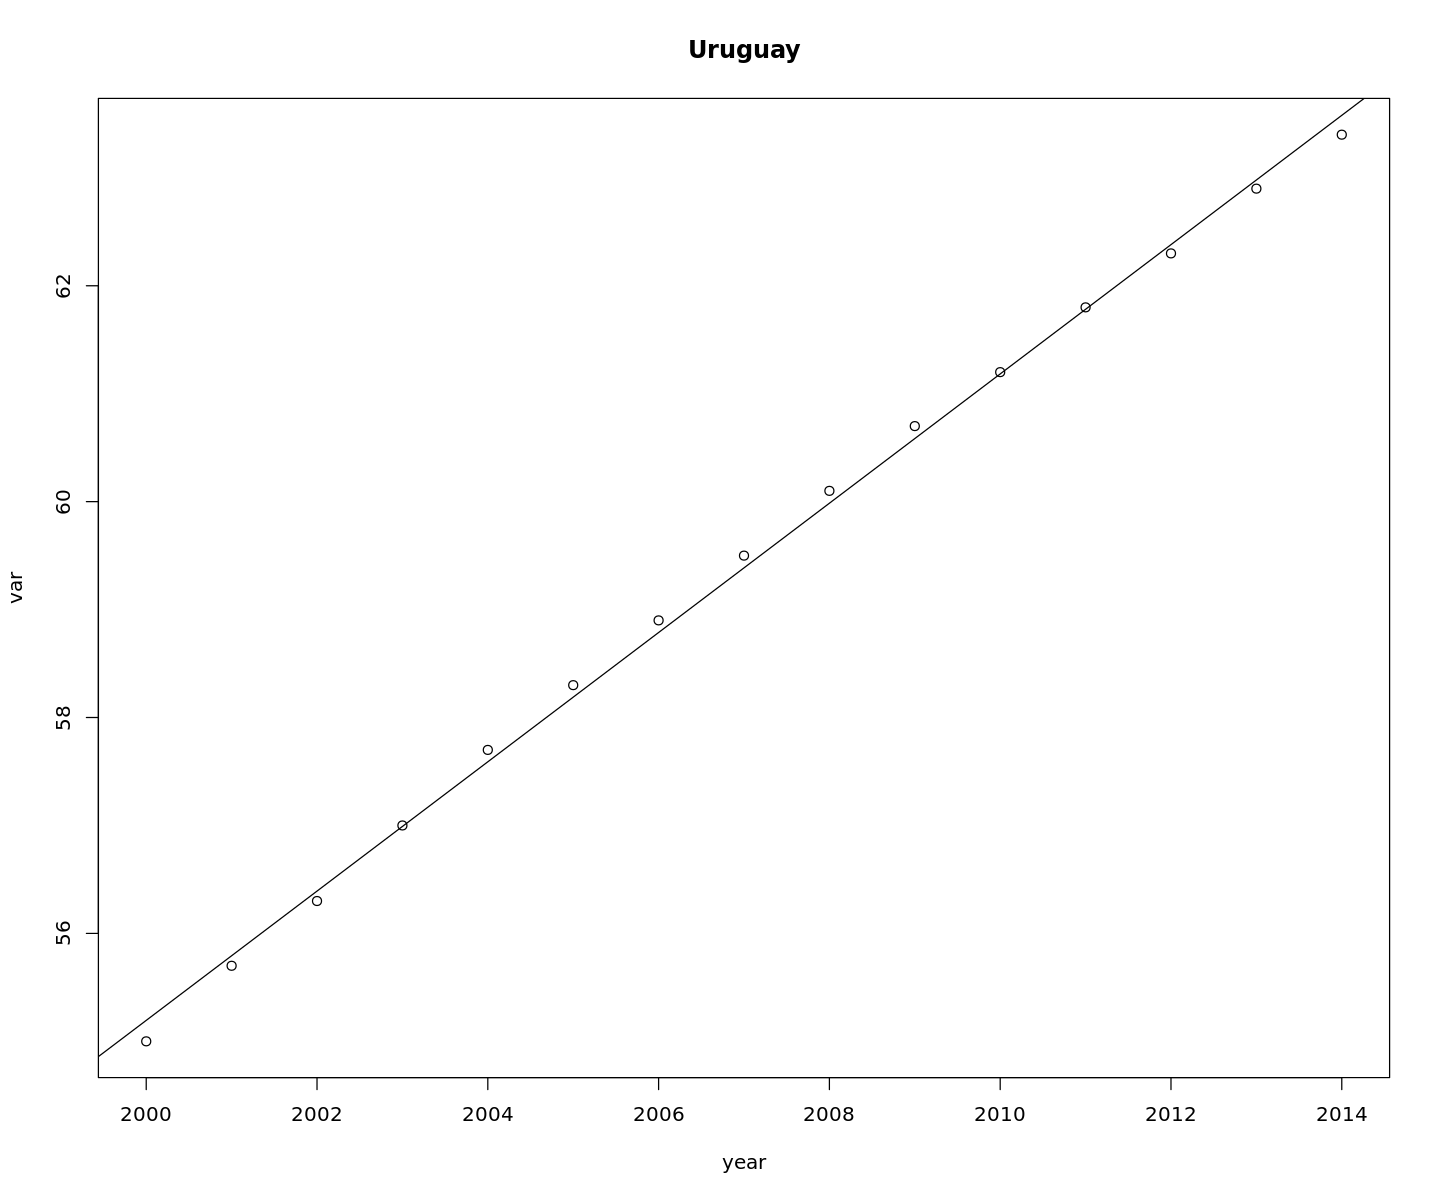

[1] "Vanuatu"


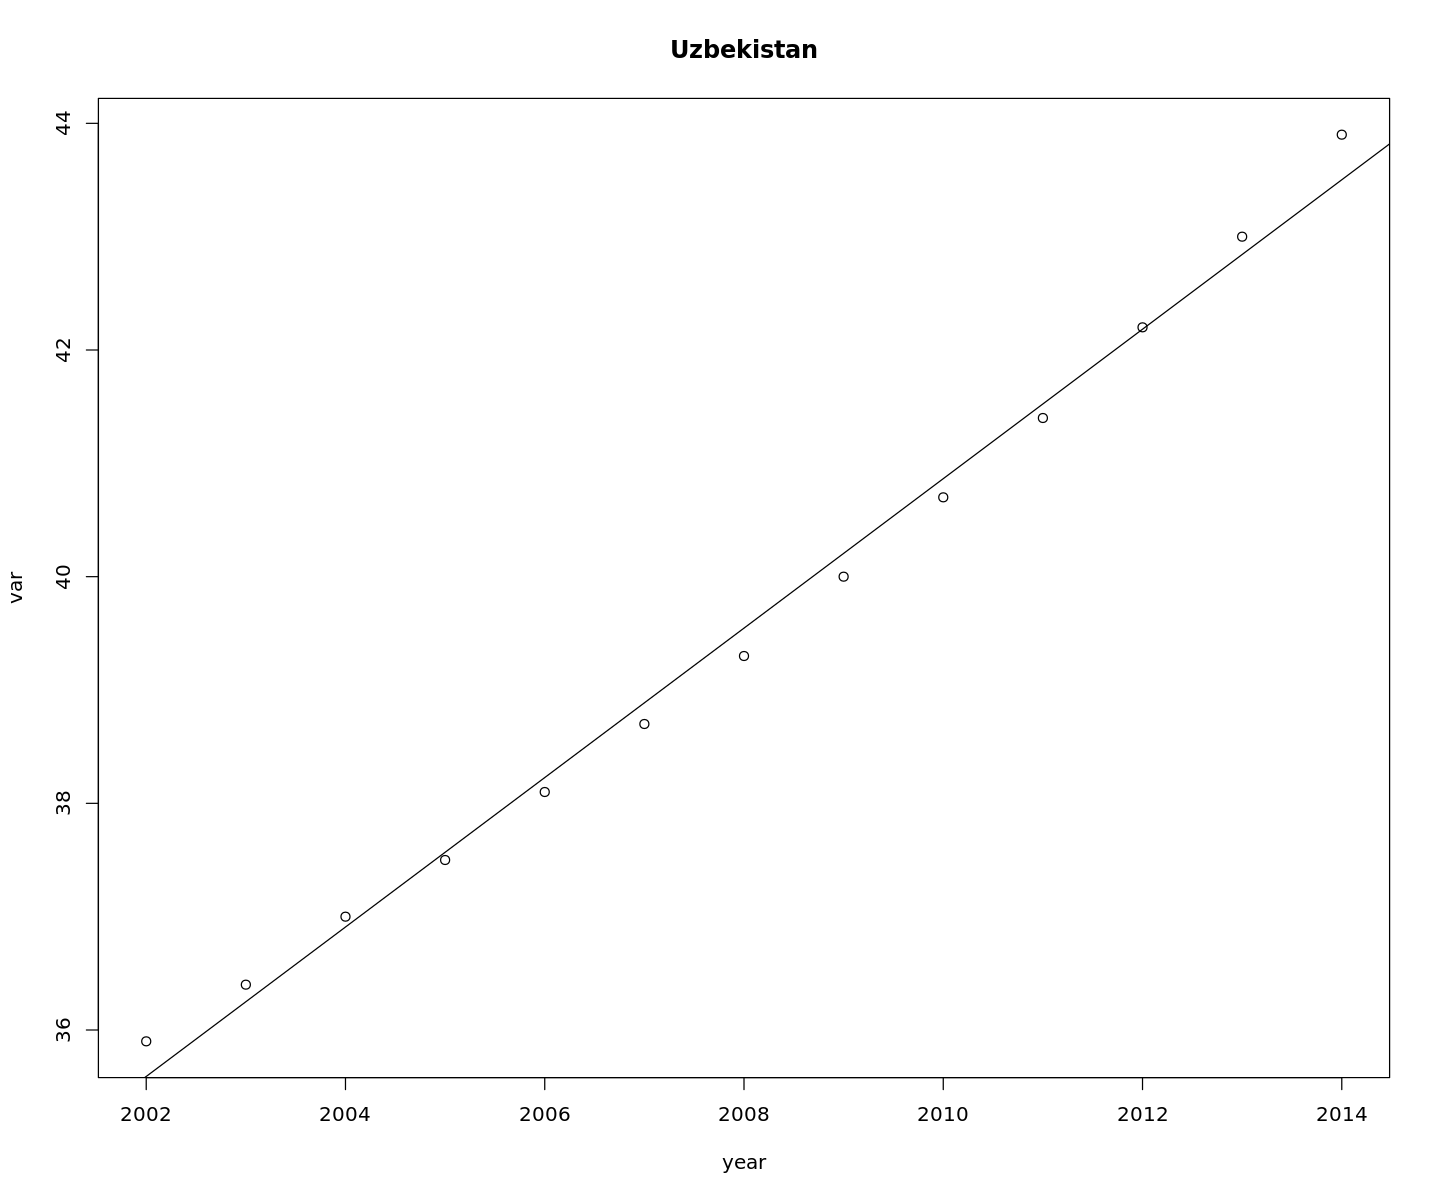

[1] "Zambia"


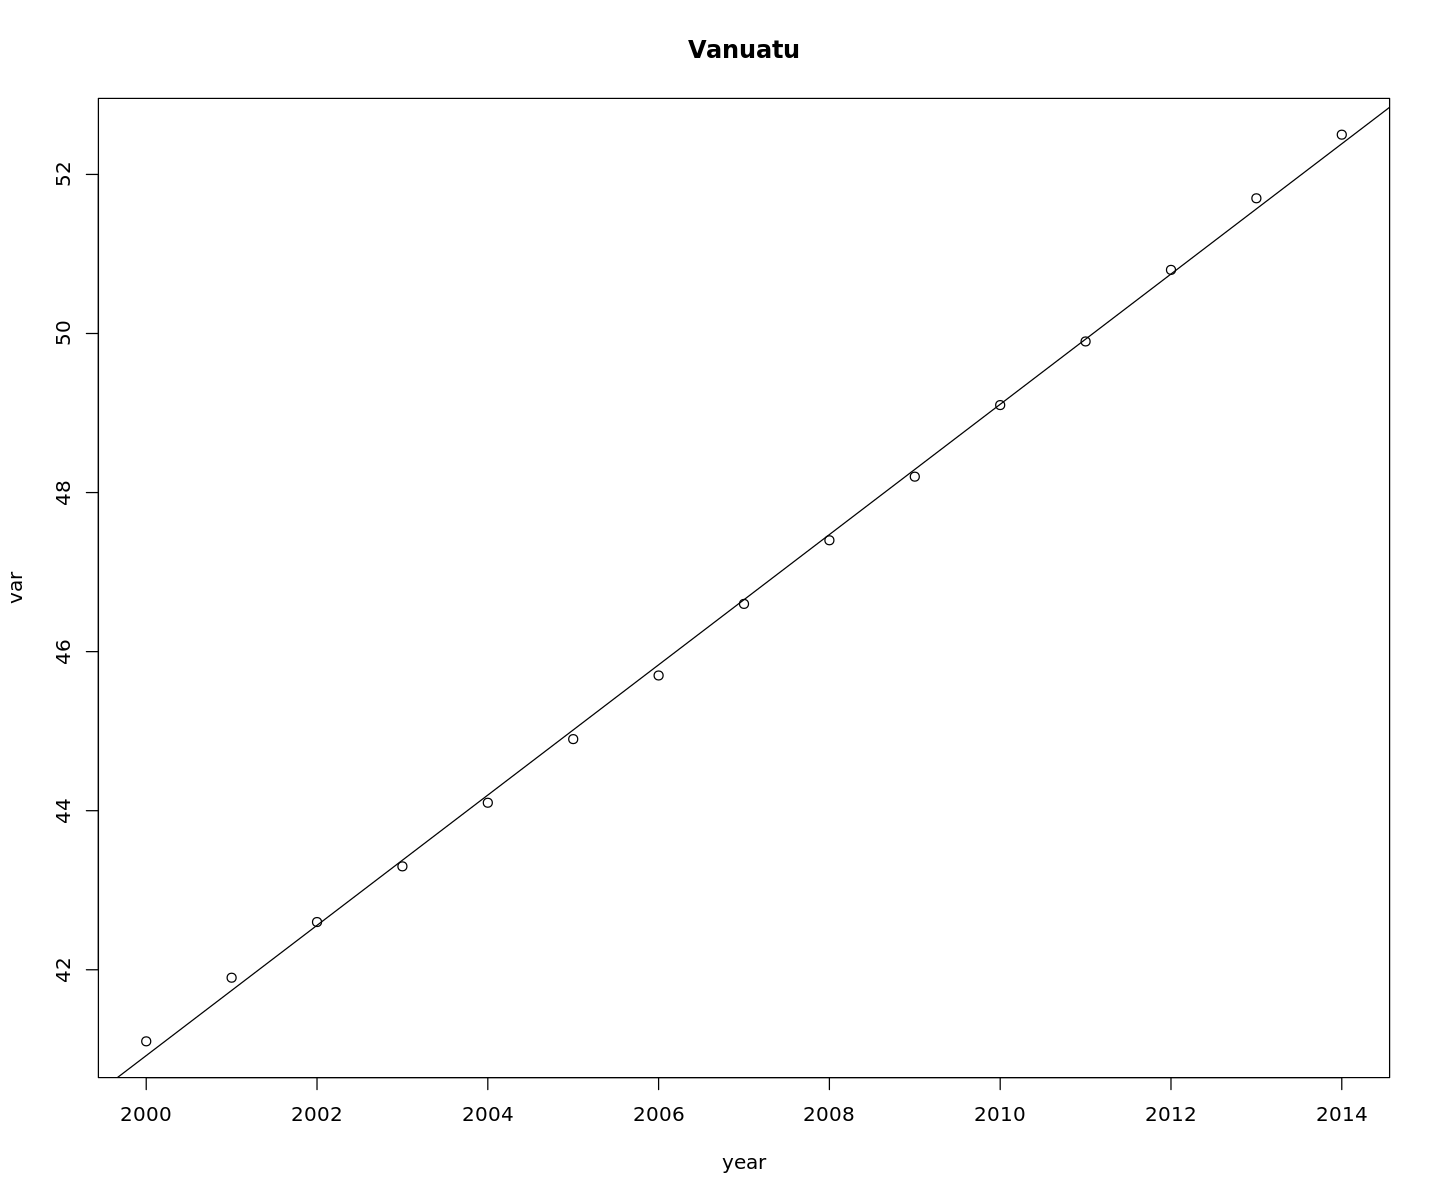

[1] "Zimbabwe"


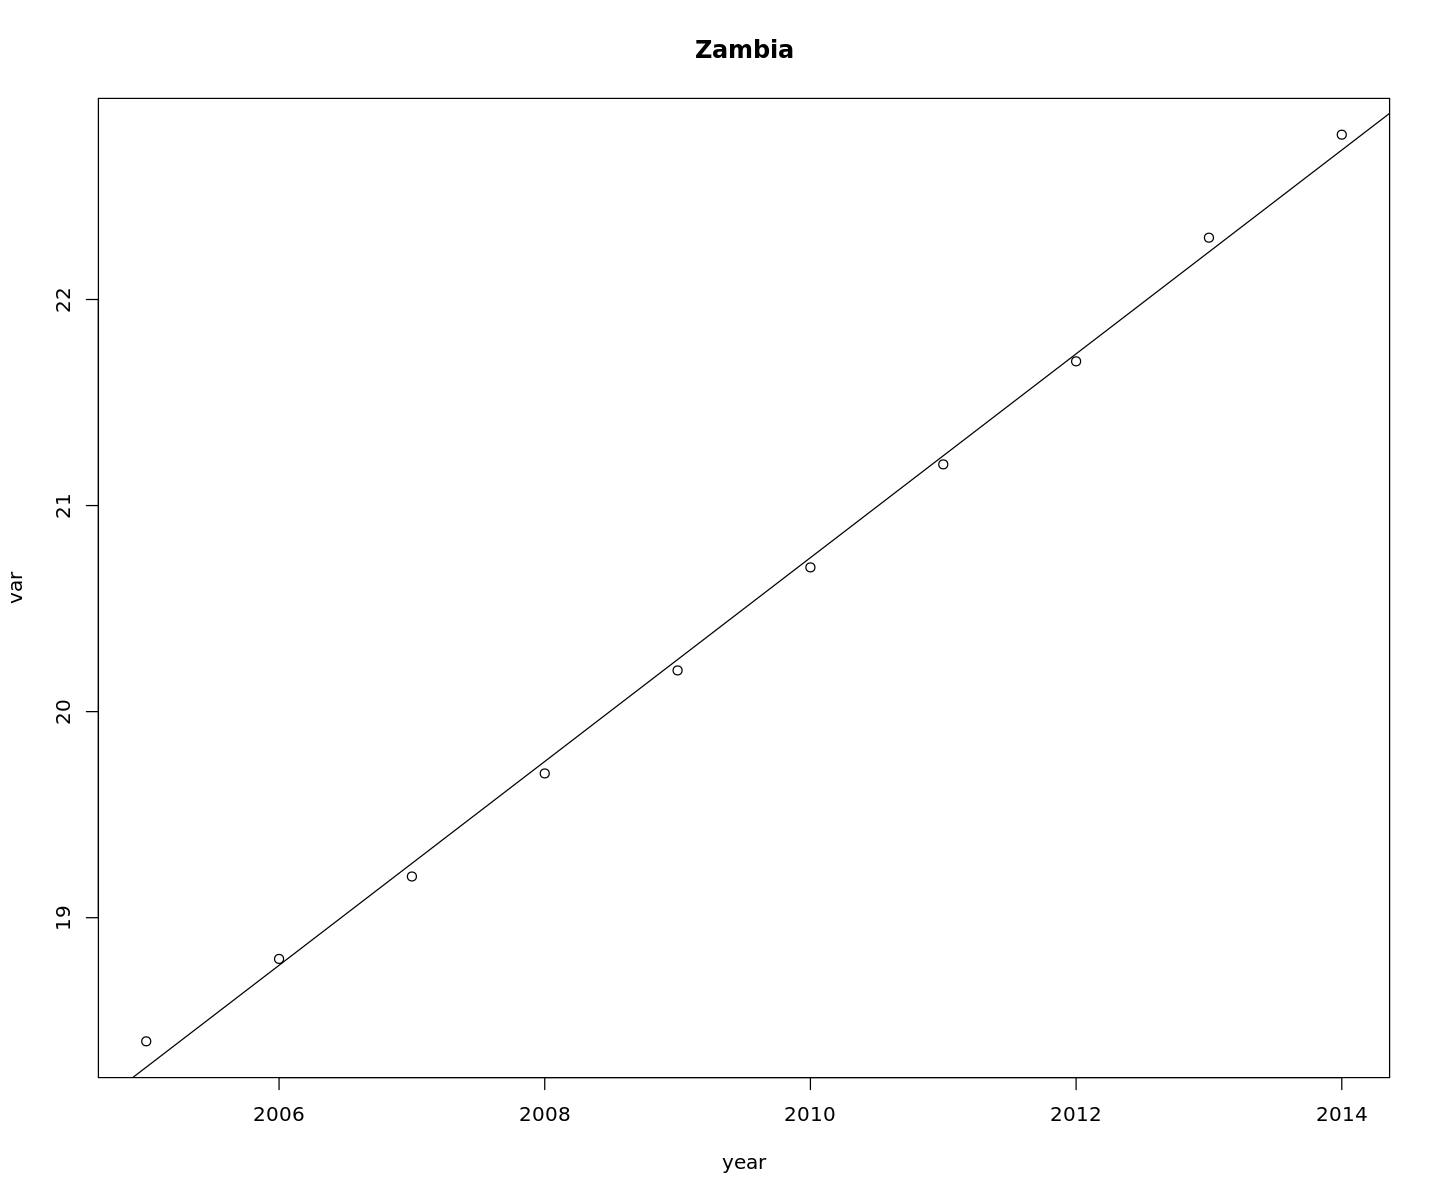

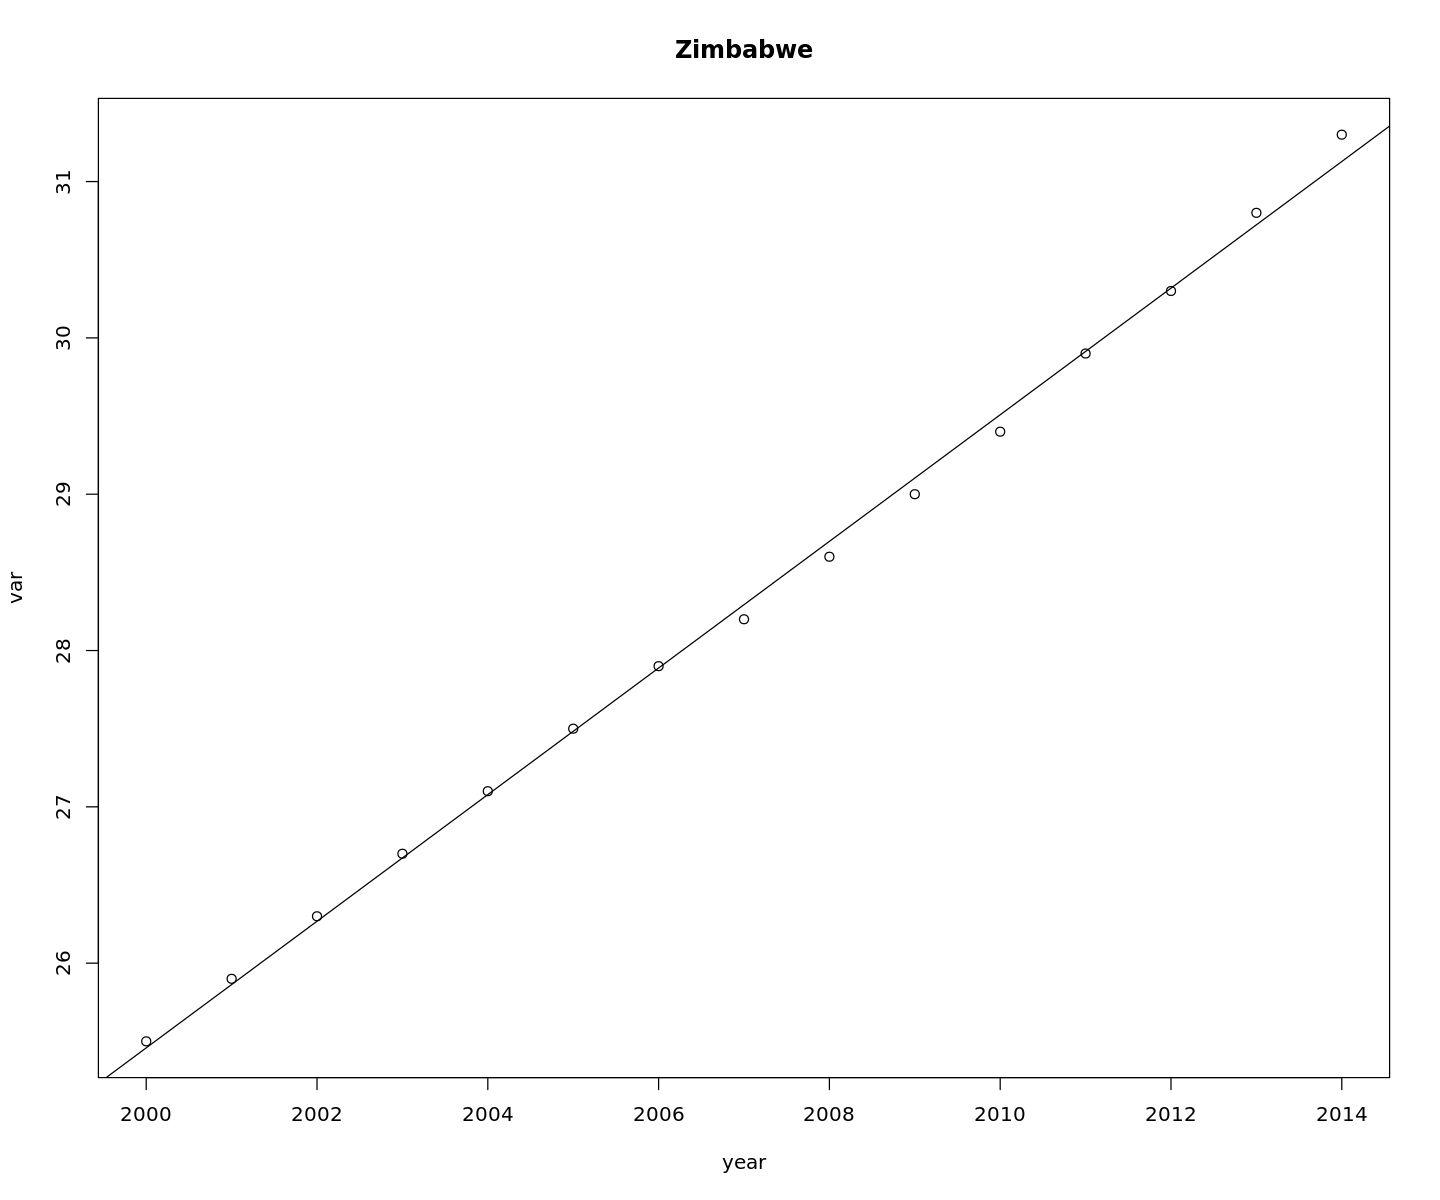

In [ ]:
# Régréssion linéraire en ignorant les valeurs erronées dans les données

optiR=function(nb2out, baseData) {
    nb2out = nb2out - 1
    rmax = 0
    for (i in 1:length(baseData$year)) {
        testData = baseData[-i,]
        if (nb2out <= 0) {
            lmTest = lm(var~year, testData)
            if (summary(lmTest)$r.squared > rmax) {
                rmax = summary(lmTest)$r.squared<
                dataMax = testData
            }
        } else {
            retour = optiR(nb2out, testData)
            r = retour[[1]]
            dataTruc = retour[[2]]
            if (r > rmax) {
                rmax = r
                dataMax = dataTruc
            }
        }
    }
    return (list(rmax, dataMax))
}

correctedData = data.frame(data)
V = "BMI"
countries = unique(data$Country)

for (country in countries) {
    print(country)
    copyData <- data[data$Country == country,]
    vec1 = as.vector(copyData$Year)
    vec2 = as.vector(copyData[V])
    colnames(vec2) = "var"
    if (length(vec1) <= 2) {
        print("skipped")
        next
    }
    oldData = data.frame(year = vec1, var = vec2)
    lmVar = lm(var~year, oldData)
    rmax = summary(lmVar)$r.squared
    dataMax = oldData
    nb2out = 0
    while (rmax < 0.9 & nb2out < length(vec1)/2) {
        nb2out = nb2out + 1
        retour = optiR(nb2out, oldData)
        r = retour[[1]]
        newData = retour[[2]]
        if (r > rmax) {
            rmax = r
            dataMax = newData
        }
    }

    lmVar = lm(var~year, dataMax)
    plot(oldData, main=country)
    abline(lmVar)
    err = as.data.frame(oldData[!oldData[,1] %in% dataMax[,1],1])
    colnames(err) = "year"
    pred = as.vector(predict(lmVar, err))
    points(err$year, pred, col=3)
    copyData[copyData$Year %in% err$year,V] = round(pred, digits = 1)
    correctedData[data$Country == country,] = copyData
}


In [ ]:
correctedData[correctedData$Country == "China", "BMI"]

ERROR: Error in eval(expr, envir, enclos): object 'correctedData' not found


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=845d5810-fd73-4f55-94e4-1f1fa5fa5d8c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>